In [1]:
!wget https://raw.githubusercontent.com/ecmwf/climetlab/main/docs/examples/test.grib

--2023-12-18 12:07:21--  https://raw.githubusercontent.com/ecmwf/climetlab/main/docs/examples/test.grib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1052 (1.0K) [application/octet-stream]
Saving to: 'test.grib'

100%[======================================>] 1,052       --.-K/s   in 0s      

2023-12-18 12:07:21 (27.7 MB/s) - 'test.grib' saved [1052/1052]



In [1]:
!pip install cdsapi
!pip install geopy
!pip install geopandas
!pip install xarray
!pip install pooch

In [1]:
import cdsapi
import climetlab as cml
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import geopy
import xarray as xr

import csv

In [3]:
CMI = geopandas.tools.geocode("Champaign, IL")
PDX = geopandas.tools.geocode("Portland, OR")

wash = geopandas.tools.geocode("Washington County, OR")

print(CMI)
print(PDX)
print(wash)

                     geometry                             address
0  POINT (-88.24309 40.11648)  Champaign, Illinois, United States
                      geometry                          address
0  POINT (-122.67419 45.52025)  Portland, Oregon, United States
                      geometry                            address
0  POINT (-123.05879 45.56019)  Washington, Oregon, United States


In [7]:
power_data = []

with open('PowerOutageTimeseriesCleaned.csv', mode='r') as file:
    csvFile = csv.DictReader(file)
    for lines in csvFile:
        power_data.append(lines)


recent_data = []
for d in power_data:
    # print(d)
    if ("2023" in d['Date']):
        recent_data.append(d)
for lines in recent_data:
    print(lines)

{'Date': '2023-03-28 00:00:00', 'Time': '18:03:00', 'Area Affected': 'Texas: Cameron County;', 'Event Type': 'Suspicious Activity'}
{'Date': '2023-05-01 00:00:00', 'Time': '05:16:00', 'Area Affected': 'Connecticut: Massachusetts: Rhode Island: Maine: New Hampshire: Vermont:', 'Event Type': 'Severe Weather'}
{'Date': '2023-05-02 00:00:00', 'Time': '10:00:00', 'Area Affected': 'Texas:', 'Event Type': 'Actual Physical Attack/Vandalism'}
{'Date': '2023-05-02 00:00:00', 'Time': '11:29:00', 'Area Affected': 'Ohio: Kentucky:', 'Event Type': 'Suspicious Activity'}
{'Date': '2023-05-04 00:00:00', 'Time': '18:00:00', 'Area Affected': 'Texas: San Patricio County;', 'Event Type': 'Vandalism'}
{'Date': '2023-05-11 00:00:00', 'Time': '00:15:00', 'Area Affected': 'Michigan: Eaton County;', 'Event Type': 'Suspicious Activity'}
{'Date': '2023-05-11 00:00:00', 'Time': '12:00:00', 'Area Affected': 'Texas: Tarrant County;', 'Event Type': 'Vandalism'}
{'Date': '2023-05-12 00:00:00', 'Time': '13:00:00', 'Ar

In [10]:
weather_related = []
for line in power_data:
    if ("Vandalism" not in line['Event Type'] and "attack" not in line['Event Type'] ):
        weather_related.append(line)

dates = []

c = cdsapi.Client()

check = "2008-05-30"
b = False

for line in weather_related:
    print(line['Date'])
    if line['Date'][0:4] == "2008" and line['Date'][5:7] == "05" and line['Date'][8:10] == "30":
        b = True
        
    if line['Date'] not in dates and b == True:
        dates.append(line['Date'])
        year = line['Date'][0:4]
        month = line['Date'][5:7]
        day = line['Date'][8:10]
        # print(year)
        # print(month)
        # print(day)
        c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis', 'format': 'grib',
            'year': [
            str(year),
            ],
            'month': [
            str(month)
            ],
            'day': [
            str(day)
            ],
            'time': [
            '00:00', '04:00', '08:00',
            '12:00', '16:00', '20:00',
            ],
            'variable': [
            '2t', 'msl',
            ],
            },
            str(year) + "-" + str(month) + "-" + str(day) + '.grib')

        

2002-01-30 00:00:00
2002-01-29 00:00:00
2002-01-30 00:00:00
2002-02-27 00:00:00
2002-03-09 00:00:00
2002-07-09 00:00:00
2002-07-19 00:00:00
2002-07-20 00:00:00
2002-08-02 00:00:00
2002-08-09 00:00:00
2002-08-25 00:00:00
2002-08-28 00:00:00
2002-10-03 00:00:00
2002-11-06 00:00:00
2002-11-17 00:00:00
2002-11-17 00:00:00
2002-12-03 00:00:00
2002-12-11 00:00:00
2002-12-14 00:00:00
2002-12-19 00:00:00
2002-12-25 00:00:00
2002-12-25 00:00:00
2003-01-25 00:00:00
2003-02-27 00:00:00
2003-04-03 00:00:00
2003-04-04 00:00:00
2003-04-15 00:00:00
2003-05-02 00:00:00
2003-05-02 00:00:00
2003-05-15 00:00:00
2003-05-15 00:00:00
2003-06-15 00:00:00
2003-06-30 00:00:00
2003-07-01 00:00:00
2003-07-02 00:00:00
2003-07-04 00:00:00
2003-07-04 00:00:00
2003-07-04 00:00:00
2003-07-05 00:00:00
2003-07-07 00:00:00
2003-07-08 00:00:00
2003-07-09 00:00:00
2003-07-15 00:00:00
2003-07-21 00:00:00
2003-07-28 00:00:00
2003-08-14 00:00:00
2003-08-14 00:00:00
2003-08-14 00:00:00
2003-08-14 00:00:00
2003-08-14 00:00:00


2024-01-04 22:50:40,596 INFO Welcome to the CDS
2024-01-04 22:50:40,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-01-04 22:50:40,963 INFO Request is completed
2024-01-04 22:50:40,964 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data2/adaptor.mars.internal-1704409555.6512456-28636-12-38978a9b-9b2b-4d7d-b5c6-c9ac7d672555.grib to 2008-05-30.grib (23.8M)
2024-01-04 22:50:44,172 INFO Download rate 7.4M/s   
2024-01-04 22:50:44,440 INFO Welcome to the CDS
2024-01-04 22:50:44,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-05-30 00:00:00
2008-05-30 00:00:00
2008-06-03 00:00:00


2024-01-04 22:50:44,735 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/adaptor.mars.internal-1704409561.8545284-28150-6-1eef04d1-baa6-49a2-82fa-75e98906bd93.grib to 2008-06-03.grib (23.8M)
2024-01-04 22:50:57,329 INFO Download rate 1.9M/s   
2024-01-04 22:50:57,596 INFO Welcome to the CDS
2024-01-04 22:50:57,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-04 00:00:00


2024-01-04 22:50:57,736 INFO Request is queued
2024-01-04 22:50:58,872 INFO Request is running
2024-01-04 22:51:00,542 INFO Request is completed
2024-01-04 22:51:00,543 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/adaptor.mars.internal-1704430258.1781728-20395-14-1d95f3a0-7db8-4094-9879-32acfee15ae7.grib to 2008-06-04.grib (23.8M)
2024-01-04 22:51:03,403 INFO Download rate 8.3M/s   
2024-01-04 22:51:03,678 INFO Welcome to the CDS
2024-01-04 22:51:03,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-04 00:00:00
2008-06-04 00:00:00
2008-06-04 00:00:00
2008-06-06 00:00:00


2024-01-04 22:51:03,818 INFO Request is queued
2024-01-04 22:51:04,953 INFO Request is running
2024-01-04 22:51:06,589 INFO Request is completed
2024-01-04 22:51:06,590 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704430264.1003819-27556-8-0b754f5f-52df-41ed-af93-0e138f88a6d8.grib to 2008-06-06.grib (23.8M)
2024-01-04 22:51:12,775 INFO Download rate 3.8M/s   
2024-01-04 22:51:13,045 INFO Welcome to the CDS
2024-01-04 22:51:13,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-08 00:00:00


2024-01-04 22:51:13,186 INFO Request is queued
2024-01-04 22:51:14,322 INFO Request is running
2024-01-04 22:51:15,957 INFO Request is completed
2024-01-04 22:51:15,959 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/adaptor.mars.internal-1704430273.4703262-30752-7-98181a30-db54-4877-9901-a55438b26337.grib to 2008-06-08.grib (23.8M)
2024-01-04 22:51:18,775 INFO Download rate 8.4M/s   
2024-01-04 22:51:19,043 INFO Welcome to the CDS
2024-01-04 22:51:19,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-08 00:00:00
2008-06-09 00:00:00


2024-01-04 22:51:19,206 INFO Request is queued
2024-01-04 22:51:27,870 INFO Request is completed
2024-01-04 22:51:27,871 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/adaptor.mars.internal-1704430285.4205878-28490-3-ba16f151-273a-439d-9140-aca64fa988f2.grib to 2008-06-09.grib (23.8M)
2024-01-04 22:51:33,342 INFO Download rate 4.3M/s   
2024-01-04 22:51:33,608 INFO Welcome to the CDS
2024-01-04 22:51:33,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-09 00:00:00
2008-06-10 00:00:00


2024-01-04 22:51:33,839 INFO Request is queued
2024-01-04 22:51:34,974 INFO Request is running
2024-01-04 22:51:36,609 INFO Request is completed
2024-01-04 22:51:36,610 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/adaptor.mars.internal-1704430294.6695418-4137-10-2a4c28fa-c9ef-40b5-b14c-3e8a38465669.grib to 2008-06-10.grib (23.8M)
2024-01-04 22:51:39,485 INFO Download rate 8.3M/s   
2024-01-04 22:51:39,750 INFO Welcome to the CDS
2024-01-04 22:51:39,752 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-10 00:00:00
2008-06-10 00:00:00
2008-06-10 00:00:00
2008-06-10 00:00:00
2008-06-11 00:00:00


2024-01-04 22:51:39,903 INFO Request is queued
2024-01-04 22:51:42,673 INFO Request is running
2024-01-04 22:51:45,059 INFO Request is completed
2024-01-04 22:51:45,061 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/adaptor.mars.internal-1704430302.5954146-10259-3-0a29a410-5168-4225-997c-38d446f934f0.grib to 2008-06-11.grib (23.8M)
2024-01-04 22:51:50,258 INFO Download rate 4.6M/s   
2024-01-04 22:51:50,527 INFO Welcome to the CDS
2024-01-04 22:51:50,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-12 00:00:00


2024-01-04 22:51:50,700 INFO Request is queued
2024-01-04 22:51:51,837 INFO Request is running
2024-01-04 22:51:53,471 INFO Request is completed
2024-01-04 22:51:53,472 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704430310.9616516-17528-13-576024d6-2eac-45fa-a2c5-b5dd4de4ad00.grib to 2008-06-12.grib (23.8M)
2024-01-04 22:51:56,153 INFO Download rate 8.9M/s   
2024-01-04 22:51:56,419 INFO Welcome to the CDS
2024-01-04 22:51:56,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-15 00:00:00


2024-01-04 22:51:56,559 INFO Request is queued
2024-01-04 22:51:57,693 INFO Request is running
2024-01-04 22:51:59,329 INFO Request is completed
2024-01-04 22:51:59,330 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data9/adaptor.mars.internal-1704430317.080338-26202-16-e6fb9509-583e-4c7f-9d37-0883d42fd464.grib to 2008-06-15.grib (23.8M)
2024-01-04 22:52:01,343 INFO Download rate 11.8M/s  
2024-01-04 22:52:01,609 INFO Welcome to the CDS
2024-01-04 22:52:01,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-15 00:00:00
2008-06-16 00:00:00


2024-01-04 22:52:01,769 INFO Request is queued
2024-01-04 22:52:04,536 INFO Request is running
2024-01-04 22:52:06,922 INFO Request is completed
2024-01-04 22:52:06,923 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1704430323.6105337-32658-19-20ff80fe-35d7-47ec-b1e2-5b6143581baa.grib to 2008-06-16.grib (23.8M)
2024-01-04 22:52:09,972 INFO Download rate 7.8M/s   
2024-01-04 22:52:10,239 INFO Welcome to the CDS
2024-01-04 22:52:10,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-17 00:00:00


2024-01-04 22:52:10,394 INFO Request is queued
2024-01-04 22:52:11,527 INFO Request is running
2024-01-04 22:52:13,162 INFO Request is completed
2024-01-04 22:52:13,164 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/adaptor.mars.internal-1704430331.1620069-24849-13-caba85d7-b7e7-4e53-b7a9-fa51459df5fd.grib to 2008-06-17.grib (23.8M)
2024-01-04 22:52:22,798 INFO Download rate 2.5M/s   
2024-01-04 22:52:23,066 INFO Welcome to the CDS
2024-01-04 22:52:23,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-17 00:00:00
2008-06-17 00:00:00
2008-06-21 00:00:00


2024-01-04 22:52:23,220 INFO Request is queued
2024-01-04 22:52:24,357 INFO Request is running
2024-01-04 22:52:25,991 INFO Request is completed
2024-01-04 22:52:25,993 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data8/adaptor.mars.internal-1704430343.6155672-1218-15-17afd082-3500-45aa-b6ab-1ae09c5a01b9.grib to 2008-06-21.grib (23.8M)
2024-01-04 22:52:28,734 INFO Download rate 8.7M/s   
2024-01-04 22:52:29,001 INFO Welcome to the CDS
2024-01-04 22:52:29,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-22 00:00:00


2024-01-04 22:52:29,160 INFO Request is queued
2024-01-04 22:52:30,295 INFO Request is running
2024-01-04 22:52:31,929 INFO Request is completed
2024-01-04 22:52:31,931 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data5/adaptor.mars.internal-1704430349.5153522-28978-2-f2d3c1b4-93d6-45c3-bddb-6c2c4c1fe836.grib to 2008-06-22.grib (23.8M)
2024-01-04 22:52:43,226 INFO Download rate 2.1M/s   
2024-01-04 22:52:43,496 INFO Welcome to the CDS
2024-01-04 22:52:43,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-23 00:00:00


2024-01-04 22:52:43,669 INFO Request is queued
2024-01-04 22:52:44,815 INFO Request is running
2024-01-04 22:52:46,449 INFO Request is completed
2024-01-04 22:52:46,451 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704430363.9199255-906-3-c9abdbee-2100-4795-873c-eef1ff6503d4.grib to 2008-06-23.grib (23.8M)
2024-01-04 22:52:50,055 INFO Download rate 6.6M/s   
2024-01-04 22:52:50,321 INFO Welcome to the CDS
2024-01-04 22:52:50,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-23 00:00:00
2008-06-26 00:00:00


2024-01-04 22:52:50,529 INFO Request is queued
2024-01-04 22:52:51,663 INFO Request is running
2024-01-04 22:52:53,298 INFO Request is completed
2024-01-04 22:52:53,299 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data9/adaptor.mars.internal-1704430371.017472-30749-17-f6acae9a-39cc-4cba-833b-2120ac548f4f.grib to 2008-06-26.grib (23.8M)
2024-01-04 22:53:16,180 INFO Download rate 1M/s     
2024-01-04 22:53:16,447 INFO Welcome to the CDS
2024-01-04 22:53:16,448 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-06-27 00:00:00


2024-01-04 22:53:16,616 INFO Request is queued
2024-01-04 22:53:17,750 INFO Request is running
2024-01-04 22:53:19,385 INFO Request is completed
2024-01-04 22:53:19,387 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704430396.9099207-409-1-ec516489-9f18-4d44-bbc8-f30ad568941f.grib to 2008-06-27.grib (23.8M)
2024-01-04 22:53:22,134 INFO Download rate 8.7M/s   
2024-01-04 22:53:22,400 INFO Welcome to the CDS
2024-01-04 22:53:22,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-07-01 00:00:00


2024-01-04 22:53:22,576 INFO Request is queued
2024-01-04 22:53:23,711 INFO Request is running
2024-01-04 22:53:25,346 INFO Request is completed
2024-01-04 22:53:25,348 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704430402.9363432-6641-15-9b9723e6-ce5d-4f07-ae35-640edab58861.grib to 2008-07-01.grib (23.8M)
2024-01-04 22:53:28,428 INFO Download rate 7.7M/s   
2024-01-04 22:53:28,693 INFO Welcome to the CDS
2024-01-04 22:53:28,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-07-02 00:00:00


2024-01-04 22:53:28,834 INFO Request is queued
2024-01-04 22:53:29,969 INFO Request is running
2024-01-04 22:53:31,604 INFO Request is completed
2024-01-04 22:53:31,606 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data3/adaptor.mars.internal-1704430409.1734643-14776-14-d37e92be-b1fe-4e82-9582-f7fe5f64e229.grib to 2008-07-02.grib (23.8M)
2024-01-04 22:53:34,212 INFO Download rate 9.1M/s   
2024-01-04 22:53:34,478 INFO Welcome to the CDS
2024-01-04 22:53:34,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-07-02 00:00:00
2008-07-02 00:00:00
2008-07-02 00:00:00
2008-07-02 00:00:00
2008-07-07 00:00:00


2024-01-04 22:53:34,619 INFO Request is queued
2024-01-04 22:53:35,753 INFO Request is running
2024-01-04 22:53:37,387 INFO Request is completed
2024-01-04 22:53:37,389 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/adaptor.mars.internal-1704430414.900492-24531-7-c0a642d9-e758-43c8-83ef-bd7052a0ef18.grib to 2008-07-07.grib (23.8M)
2024-01-04 22:53:40,198 INFO Download rate 8.5M/s   


2008-07-10 00:00:00


2024-01-04 22:53:40,935 INFO Welcome to the CDS
2024-01-04 22:53:40,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-01-04 22:53:41,112 INFO Request is queued
2024-01-04 22:53:42,248 INFO Request is running
2024-01-04 22:53:43,885 INFO Request is completed
2024-01-04 22:53:43,887 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data1/adaptor.mars.internal-1704430421.6356297-23658-12-830c947b-b3cb-421f-ae9c-522bd65f02be.grib to 2008-07-10.grib (23.8M)
2024-01-04 22:53:46,928 INFO Download rate 7.8M/s   
2024-01-04 22:53:47,198 INFO Welcome to the CDS
2024-01-04 22:53:47,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-07-21 00:00:00


2024-01-04 22:53:47,347 INFO Request is queued
2024-01-04 22:53:48,482 INFO Request is running
2024-01-04 22:53:50,117 INFO Request is completed
2024-01-04 22:53:50,119 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/adaptor.mars.internal-1704430427.7951941-26061-2-800db56c-508e-428b-b428-86b6551d0483.grib to 2008-07-21.grib (23.8M)
2024-01-04 22:53:56,651 INFO Download rate 3.6M/s   
2024-01-04 22:53:56,918 INFO Welcome to the CDS
2024-01-04 22:53:56,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-07-22 00:00:00


2024-01-04 22:53:57,058 INFO Request is queued
2024-01-04 22:53:58,192 INFO Request is running
2024-01-04 22:53:59,826 INFO Request is completed
2024-01-04 22:53:59,828 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data9/adaptor.mars.internal-1704430437.4641707-12411-18-fc871529-1222-4d86-bb4e-3d416f7c9b64.grib to 2008-07-22.grib (23.8M)
2024-01-04 22:54:11,429 INFO Download rate 2M/s     
2024-01-04 22:54:11,698 INFO Welcome to the CDS
2024-01-04 22:54:11,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-07-22 00:00:00
2008-07-22 00:00:00
2008-07-23 00:00:00


2024-01-04 22:54:11,859 INFO Request is queued
2024-01-04 22:54:12,994 INFO Request is running
2024-01-04 22:54:14,634 INFO Request is completed
2024-01-04 22:54:14,639 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data3/adaptor.mars.internal-1704430452.1591382-23645-16-96ffecd4-1788-4e3c-9874-6134ab135603.grib to 2008-07-23.grib (23.8M)
2024-01-04 22:54:16,542 INFO Download rate 12.5M/s  
2024-01-04 22:54:16,808 INFO Welcome to the CDS
2024-01-04 22:54:16,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-07-24 00:00:00


2024-01-04 22:54:16,948 INFO Request is queued
2024-01-04 22:54:18,083 INFO Request is running
2024-01-04 22:54:19,717 INFO Request is completed
2024-01-04 22:54:19,718 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/adaptor.mars.internal-1704430457.142067-2890-9-c68f2872-67ee-45c6-8a08-e4632e9cd9e8.grib to 2008-07-24.grib (23.8M)
2024-01-04 22:54:24,335 INFO Download rate 5.1M/s   
2024-01-04 22:54:24,600 INFO Welcome to the CDS
2024-01-04 22:54:24,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-02 00:00:00


2024-01-04 22:54:24,741 INFO Request is queued
2024-01-04 22:54:25,875 INFO Request is running
2024-01-04 22:54:27,509 INFO Request is completed
2024-01-04 22:54:27,511 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data8/adaptor.mars.internal-1704430465.0805912-339-4-e5bc9ed7-0788-47ff-b4d3-87e2d816cbde.grib to 2008-08-02.grib (23.8M)
2024-01-04 22:54:30,167 INFO Download rate 9M/s     
2024-01-04 22:54:30,433 INFO Welcome to the CDS
2024-01-04 22:54:30,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-03 00:00:00


2024-01-04 22:54:30,573 INFO Request is queued
2024-01-04 22:54:31,707 INFO Request is running
2024-01-04 22:54:33,342 INFO Request is completed
2024-01-04 22:54:33,344 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/adaptor.mars.internal-1704430470.8182008-9279-7-6d3d27fd-6a2e-4cc1-bf84-6ca249b46d6e.grib to 2008-08-03.grib (23.8M)
2024-01-04 22:54:35,845 INFO Download rate 9.5M/s   
2024-01-04 22:54:36,112 INFO Welcome to the CDS
2024-01-04 22:54:36,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-04 00:00:00


2024-01-04 22:54:36,270 INFO Request is queued
2024-01-04 22:54:37,404 INFO Request is running
2024-01-04 22:54:39,039 INFO Request is completed
2024-01-04 22:54:39,041 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/adaptor.mars.internal-1704430476.6047482-19240-10-59b30574-6ac1-4b42-b77e-6f259950d10d.grib to 2008-08-04.grib (23.8M)
2024-01-04 22:55:04,760 INFO Download rate 946.2K/s 
2024-01-04 22:55:05,039 INFO Welcome to the CDS
2024-01-04 22:55:05,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-05 00:00:00


2024-01-04 22:55:05,196 INFO Request is queued
2024-01-04 22:55:06,330 INFO Request is running
2024-01-04 22:55:07,966 INFO Request is completed
2024-01-04 22:55:07,967 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data6/adaptor.mars.internal-1704430505.538135-11472-15-64d94cf8-dc0d-473b-9d16-984574a49f9a.grib to 2008-08-05.grib (23.8M)
2024-01-04 22:55:10,725 INFO Download rate 8.6M/s   
2024-01-04 22:55:10,989 INFO Welcome to the CDS
2024-01-04 22:55:10,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-09 00:00:00


2024-01-04 22:55:11,204 INFO Request is queued
2024-01-04 22:55:12,339 INFO Request is running
2024-01-04 22:55:13,973 INFO Request is completed
2024-01-04 22:55:13,974 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/adaptor.mars.internal-1704430511.4432898-23645-19-23431e5a-a855-49df-baa5-bdccd52e8d8b.grib to 2008-08-09.grib (23.8M)
2024-01-04 22:55:15,968 INFO Download rate 11.9M/s  
2024-01-04 22:55:16,235 INFO Welcome to the CDS
2024-01-04 22:55:16,237 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-15 00:00:00


2024-01-04 22:55:16,377 INFO Request is queued
2024-01-04 22:55:17,510 INFO Request is running
2024-01-04 22:55:19,147 INFO Request is completed
2024-01-04 22:55:19,148 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data8/adaptor.mars.internal-1704430516.7247984-21876-1-7094b4a2-0d1f-4c54-a005-e2a101d22f29.grib to 2008-08-15.grib (23.8M)
2024-01-04 22:55:21,852 INFO Download rate 8.8M/s   
2024-01-04 22:55:22,116 INFO Welcome to the CDS
2024-01-04 22:55:22,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-16 00:00:00


2024-01-04 22:55:22,293 INFO Request is queued
2024-01-04 22:55:23,427 INFO Request is running
2024-01-04 22:55:25,062 INFO Request is completed
2024-01-04 22:55:25,064 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/adaptor.mars.internal-1704430522.5806074-11394-2-11f56de6-1c9a-4ad8-b536-3c6c50fc0aac.grib to 2008-08-16.grib (23.8M)
2024-01-04 22:55:29,158 INFO Download rate 5.8M/s   
2024-01-04 22:55:29,425 INFO Welcome to the CDS
2024-01-04 22:55:29,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-16 00:00:00
2008-08-18 00:00:00


2024-01-04 22:55:29,610 INFO Request is queued
2024-01-04 22:55:30,744 INFO Request is running
2024-01-04 22:55:32,379 INFO Request is completed
2024-01-04 22:55:32,380 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1704430529.9945803-20308-9-7ee19856-0a05-4b1f-8a8f-b0560a0b771d.grib to 2008-08-18.grib (23.8M)
2024-01-04 22:55:35,183 INFO Download rate 8.5M/s   
2024-01-04 22:55:35,449 INFO Welcome to the CDS
2024-01-04 22:55:35,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-19 00:00:00


2024-01-04 22:55:35,589 INFO Request is queued
2024-01-04 22:55:36,723 INFO Request is running
2024-01-04 22:55:38,357 INFO Request is completed
2024-01-04 22:55:38,359 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data9/adaptor.mars.internal-1704430535.8782718-28318-9-a3e98294-c412-48a6-863f-e54ac49df1a2.grib to 2008-08-19.grib (23.8M)
2024-01-04 22:55:41,498 INFO Download rate 7.6M/s   
2024-01-04 22:55:41,763 INFO Welcome to the CDS
2024-01-04 22:55:41,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-21 00:00:00


2024-01-04 22:55:42,042 INFO Request is queued
2024-01-04 22:55:43,177 INFO Request is running
2024-01-04 22:55:44,812 INFO Request is completed
2024-01-04 22:55:44,814 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/adaptor.mars.internal-1704430542.2099214-906-12-b3935a34-d1ea-4fb5-90cd-62fae7817073.grib to 2008-08-21.grib (23.8M)
2024-01-04 22:55:47,597 INFO Download rate 8.5M/s   
2024-01-04 22:55:47,864 INFO Welcome to the CDS
2024-01-04 22:55:47,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-22 00:00:00


2024-01-04 22:55:48,022 INFO Request is queued
2024-01-04 22:55:49,157 INFO Request is running
2024-01-04 22:55:51,121 INFO Request is completed
2024-01-04 22:55:51,123 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/adaptor.mars.internal-1704430548.3450902-9930-4-1afd9209-2840-48e0-8666-067359fbf843.grib to 2008-08-22.grib (23.8M)
2024-01-04 22:55:53,684 INFO Download rate 9.3M/s   
2024-01-04 22:55:53,947 INFO Welcome to the CDS
2024-01-04 22:55:53,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-24 00:00:00


2024-01-04 22:55:54,083 INFO Request is queued
2024-01-04 22:55:55,218 INFO Request is running
2024-01-04 22:55:56,856 INFO Request is completed
2024-01-04 22:55:56,857 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/adaptor.mars.internal-1704430554.550731-20675-19-ef951bff-514c-4960-bc45-abdd402c3c8c.grib to 2008-08-24.grib (23.8M)
2024-01-04 22:56:00,635 INFO Download rate 6.3M/s   
2024-01-04 22:56:00,901 INFO Welcome to the CDS
2024-01-04 22:56:00,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-31 00:00:00


2024-01-04 22:56:01,051 INFO Request is queued
2024-01-04 22:56:02,185 INFO Request is running
2024-01-04 22:56:03,821 INFO Request is completed
2024-01-04 22:56:03,822 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/adaptor.mars.internal-1704430561.7058535-24531-14-4ce081f7-6434-432d-b726-2aa3fc66e55d.grib to 2008-08-31.grib (23.8M)
2024-01-04 22:56:05,782 INFO Download rate 12.1M/s  
2024-01-04 22:56:06,049 INFO Welcome to the CDS
2024-01-04 22:56:06,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-08-31 00:00:00
2008-09-01 00:00:00


2024-01-04 22:56:06,192 INFO Request is queued
2024-01-04 22:56:07,325 INFO Request is running
2024-01-04 22:56:08,960 INFO Request is completed
2024-01-04 22:56:08,962 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/adaptor.mars.internal-1704430566.5949678-16209-9-e8bde8b4-00be-44ea-89c0-3059335f379d.grib to 2008-09-01.grib (23.8M)
2024-01-04 22:56:11,615 INFO Download rate 9M/s     
2024-01-04 22:56:11,882 INFO Welcome to the CDS
2024-01-04 22:56:11,883 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-09-01 00:00:00
2008-09-06 00:00:00


2024-01-04 22:56:12,033 INFO Request is queued
2024-01-04 22:56:13,167 INFO Request is running
2024-01-04 22:56:14,802 INFO Request is completed
2024-01-04 22:56:14,803 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1704430572.6031592-9930-5-f2398dea-d35e-4eac-ac7d-237a4d7cb9ba.grib to 2008-09-06.grib (23.8M)
2024-01-04 22:56:16,916 INFO Download rate 11.3M/s  


2008-09-06 00:00:00
2008-09-08 00:00:00


2024-01-04 22:56:17,657 INFO Welcome to the CDS
2024-01-04 22:56:17,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-01-04 22:56:17,800 INFO Request is queued
2024-01-04 22:56:18,934 INFO Request is running
2024-01-04 22:56:20,571 INFO Request is completed
2024-01-04 22:56:20,572 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/adaptor.mars.internal-1704430577.973846-16017-9-b9833a34-3721-4079-a304-eb7a31bd0573.grib to 2008-09-08.grib (23.8M)
2024-01-04 22:56:29,535 INFO Download rate 2.7M/s   
2024-01-04 22:56:29,801 INFO Welcome to the CDS
2024-01-04 22:56:29,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-09-12 00:00:00


2024-01-04 22:56:29,942 INFO Request is queued
2024-01-04 22:56:31,078 INFO Request is running
2024-01-04 22:56:32,715 INFO Request is completed
2024-01-04 22:56:32,716 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704430590.2716913-20986-2-1a4a846f-9808-47dd-8225-b9e85b1231ea.grib to 2008-09-12.grib (23.8M)
2024-01-04 22:56:52,664 INFO Download rate 1.2M/s   
2024-01-04 22:56:52,932 INFO Welcome to the CDS
2024-01-04 22:56:52,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-09-12 00:00:00
2008-09-12 00:00:00
2008-09-12 00:00:00
2008-09-13 00:00:00


2024-01-04 22:56:53,088 INFO Request is queued
2024-01-04 22:56:54,223 INFO Request is running
2024-01-04 22:56:55,858 INFO Request is completed
2024-01-04 22:56:55,860 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.internal-1704430613.348084-17067-4-06a57dd4-2915-4580-80c9-ad102fc99706.grib to 2008-09-13.grib (23.8M)
2024-01-04 22:56:58,342 INFO Download rate 9.6M/s   
2024-01-04 22:56:58,619 INFO Welcome to the CDS
2024-01-04 22:56:58,620 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-09-13 00:00:00
2008-09-13 00:00:00
2008-09-14 00:00:00


2024-01-04 22:56:58,759 INFO Request is queued
2024-01-04 22:56:59,894 INFO Request is running
2024-01-04 22:57:01,527 INFO Request is completed
2024-01-04 22:57:01,529 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/adaptor.mars.internal-1704430618.98671-12264-2-05452a58-0ff4-41de-9e75-2eec7267440d.grib to 2008-09-14.grib (23.8M)
2024-01-04 22:57:07,215 INFO Download rate 4.2M/s   
2024-01-04 22:57:07,484 INFO Welcome to the CDS
2024-01-04 22:57:07,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-09-14 00:00:00
2008-09-14 00:00:00
2008-09-14 00:00:00
2008-09-14 00:00:00
2008-09-14 00:00:00
2008-09-14 00:00:00
2008-09-14 00:00:00
2008-09-14 00:00:00
2008-09-14 00:00:00
2008-09-15 00:00:00


2024-01-04 22:57:07,655 INFO Request is queued
2024-01-04 22:57:08,789 INFO Request is running
2024-01-04 22:57:10,423 INFO Request is completed
2024-01-04 22:57:10,425 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1704430627.8379388-19491-9-19583c37-776e-4a22-832e-b1a2fa8c772d.grib to 2008-09-15.grib (23.8M)
2024-01-04 22:57:13,042 INFO Download rate 9.1M/s   
2024-01-04 22:57:13,308 INFO Welcome to the CDS
2024-01-04 22:57:13,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-09-22 00:00:00


2024-01-04 22:57:13,449 INFO Request is queued
2024-01-04 22:57:14,583 INFO Request is running
2024-01-04 22:57:16,217 INFO Request is completed
2024-01-04 22:57:16,219 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/adaptor.mars.internal-1704430634.1442504-1587-6-d51eb915-c11e-4c0d-819d-d83640664de9.grib to 2008-09-22.grib (23.8M)
2024-01-04 22:57:18,916 INFO Download rate 8.8M/s   
2024-01-04 22:57:19,185 INFO Welcome to the CDS
2024-01-04 22:57:19,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-09-30 00:00:00


2024-01-04 22:57:19,333 INFO Request is queued
2024-01-04 22:57:20,467 INFO Request is running
2024-01-04 22:57:22,102 INFO Request is completed
2024-01-04 22:57:22,104 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1704430639.6110542-20308-12-187c75ca-4a01-4e43-aedb-abd2bff3333f.grib to 2008-09-30.grib (23.8M)
2024-01-04 22:57:24,161 INFO Download rate 11.6M/s  
2024-01-04 22:57:24,427 INFO Welcome to the CDS
2024-01-04 22:57:24,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-10-02 00:00:00


2024-01-04 22:57:24,567 INFO Request is queued
2024-01-04 22:57:25,702 INFO Request is running
2024-01-04 22:57:27,336 INFO Request is completed
2024-01-04 22:57:27,338 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704430644.9260566-21150-15-691ea3f3-2856-4436-81bd-a0e38fbdba84.grib to 2008-10-02.grib (23.8M)
2024-01-04 22:57:30,037 INFO Download rate 8.8M/s   
2024-01-04 22:57:30,306 INFO Welcome to the CDS
2024-01-04 22:57:30,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-10-25 00:00:00


2024-01-04 22:57:30,447 INFO Request is queued
2024-01-04 22:57:31,581 INFO Request is running
2024-01-04 22:57:33,218 INFO Request is completed
2024-01-04 22:57:33,219 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704430650.72088-2313-17-66beea2f-1ed4-43f3-a245-d98deada9051.grib to 2008-10-25.grib (23.8M)
2024-01-04 22:57:35,898 INFO Download rate 8.9M/s   
2024-01-04 22:57:36,164 INFO Welcome to the CDS
2024-01-04 22:57:36,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-11-07 00:00:00


2024-01-04 22:57:36,312 INFO Request is queued
2024-01-04 22:57:37,446 INFO Request is running
2024-01-04 22:57:39,081 INFO Request is completed
2024-01-04 22:57:39,082 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/adaptor.mars.internal-1704430656.7682402-17035-6-e619822e-ca49-4bd8-9c45-2d420dff9ea9.grib to 2008-11-07.grib (23.8M)
2024-01-04 22:57:41,718 INFO Download rate 9M/s     
2024-01-04 22:57:41,985 INFO Welcome to the CDS
2024-01-04 22:57:41,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-11-07 00:00:00
2008-11-11 00:00:00


2024-01-04 22:57:42,156 INFO Request is queued
2024-01-04 22:57:43,291 INFO Request is running
2024-01-04 22:57:44,924 INFO Request is completed
2024-01-04 22:57:44,926 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1704430662.470312-24276-15-449c3c97-e571-4a59-bb6d-02672e3ab4c4.grib to 2008-11-11.grib (23.8M)
2024-01-04 22:57:47,701 INFO Download rate 8.6M/s   
2024-01-04 22:57:47,970 INFO Welcome to the CDS
2024-01-04 22:57:47,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-11-15 00:00:00


2024-01-04 22:57:48,128 INFO Request is queued
2024-01-04 22:57:49,262 INFO Request is running
2024-01-04 22:57:50,896 INFO Request is completed
2024-01-04 22:57:50,898 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/adaptor.mars.internal-1704430668.5382965-19491-10-d31a165b-ec75-4abb-b87f-f8593f4627a9.grib to 2008-11-15.grib (23.8M)
2024-01-04 22:57:53,036 INFO Download rate 11.1M/s  
2024-01-04 22:57:53,304 INFO Welcome to the CDS
2024-01-04 22:57:53,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-02 00:00:00


2024-01-04 22:57:53,453 INFO Request is queued
2024-01-04 22:57:54,588 INFO Request is running
2024-01-04 22:57:56,223 INFO Request is completed
2024-01-04 22:57:56,224 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/adaptor.mars.internal-1704430673.789651-2608-15-dc2ada5a-4e2a-4f12-af62-040fe1ca87dd.grib to 2008-12-02.grib (23.8M)
2024-01-04 22:57:58,802 INFO Download rate 9.2M/s   
2024-01-04 22:57:59,068 INFO Welcome to the CDS
2024-01-04 22:57:59,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-09 00:00:00


2024-01-04 22:57:59,228 INFO Request is queued
2024-01-04 22:58:00,362 INFO Request is running
2024-01-04 22:58:01,997 INFO Request is completed
2024-01-04 22:58:01,999 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704430679.540875-1646-15-770066e2-71ee-47b1-84c0-a4456edd83c4.grib to 2008-12-09.grib (23.8M)
2024-01-04 22:58:27,145 INFO Download rate 967.8K/s 
2024-01-04 22:58:27,410 INFO Welcome to the CDS
2024-01-04 22:58:27,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-10 00:00:00


2024-01-04 22:58:27,549 INFO Request is queued
2024-01-04 22:58:28,683 INFO Request is running
2024-01-04 22:58:30,318 INFO Request is completed
2024-01-04 22:58:30,319 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704430707.9602375-26549-7-ae073157-4a41-498a-9212-c622f7a1d12b.grib to 2008-12-10.grib (23.8M)
2024-01-04 22:58:33,075 INFO Download rate 8.6M/s   
2024-01-04 22:58:33,342 INFO Welcome to the CDS
2024-01-04 22:58:33,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-11 00:00:00


2024-01-04 22:58:33,483 INFO Request is queued
2024-01-04 22:58:34,617 INFO Request is running
2024-01-04 22:58:36,251 INFO Request is completed
2024-01-04 22:58:36,253 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704430713.7781854-10650-16-7d3783d7-0c16-4ba6-9c14-89f5fdd85e0a.grib to 2008-12-11.grib (23.8M)
2024-01-04 22:58:38,788 INFO Download rate 9.4M/s   
2024-01-04 22:58:39,054 INFO Welcome to the CDS
2024-01-04 22:58:39,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-11 00:00:00
2008-12-12 00:00:00


2024-01-04 22:58:39,194 INFO Request is queued
2024-01-04 22:58:40,328 INFO Request is running
2024-01-04 22:58:41,963 INFO Request is completed
2024-01-04 22:58:41,964 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/adaptor.mars.internal-1704430719.5009959-2540-1-66dfe09a-c1a7-4d5c-afbd-59228406ac04.grib to 2008-12-12.grib (23.8M)
2024-01-04 22:58:44,475 INFO Download rate 9.5M/s   
2024-01-04 22:58:44,741 INFO Welcome to the CDS
2024-01-04 22:58:44,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-12 00:00:00
2008-12-12 00:00:00
2008-12-13 00:00:00


2024-01-04 22:58:44,882 INFO Request is queued
2024-01-04 22:58:46,016 INFO Request is running
2024-01-04 22:58:47,651 INFO Request is completed
2024-01-04 22:58:47,653 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/adaptor.mars.internal-1704430725.6156516-12264-7-f2e54196-bb50-4e9e-b433-2cbd5bfa038e.grib to 2008-12-13.grib (23.8M)
2024-01-04 22:58:49,836 INFO Download rate 10.9M/s  
2024-01-04 22:58:50,102 INFO Welcome to the CDS
2024-01-04 22:58:50,103 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-19 00:00:00


2024-01-04 22:58:50,242 INFO Request is queued
2024-01-04 22:58:51,376 INFO Request is running
2024-01-04 22:58:53,011 INFO Request is completed
2024-01-04 22:58:53,013 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/adaptor.mars.internal-1704430730.626538-12285-11-2e161a77-8b1f-4d28-86d1-168d2042ae48.grib to 2008-12-19.grib (23.8M)
2024-01-04 22:58:57,342 INFO Download rate 5.5M/s   
2024-01-04 22:58:57,610 INFO Welcome to the CDS
2024-01-04 22:58:57,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-19 00:00:00
2008-12-19 00:00:00
2008-12-26 00:00:00


2024-01-04 22:58:57,751 INFO Request is queued
2024-01-04 22:58:58,885 INFO Request is running
2024-01-04 22:59:00,520 INFO Request is completed
2024-01-04 22:59:00,522 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704430737.94014-31682-5-1d6ebbe5-3385-4e33-a10f-8180ed1f45a6.grib to 2008-12-26.grib (23.8M)
2024-01-04 22:59:03,650 INFO Download rate 7.6M/s   


2008-12-26 00:00:00
2008-12-27 00:00:00


2024-01-04 22:59:04,384 INFO Welcome to the CDS
2024-01-04 22:59:04,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-01-04 22:59:04,540 INFO Request is queued
2024-01-04 22:59:05,674 INFO Request is running
2024-01-04 22:59:07,309 INFO Request is completed
2024-01-04 22:59:07,310 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data0/adaptor.mars.internal-1704430744.7991352-2774-8-3ec389b6-5385-41c5-8419-e0eebeb8df31.grib to 2008-12-27.grib (23.8M)
2024-01-04 22:59:19,660 INFO Download rate 1.9M/s   
2024-01-04 22:59:19,928 INFO Welcome to the CDS
2024-01-04 22:59:19,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-28 00:00:00


2024-01-04 22:59:20,091 INFO Request is queued
2024-01-04 22:59:21,226 INFO Request is running
2024-01-04 22:59:22,862 INFO Request is completed
2024-01-04 22:59:22,863 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/adaptor.mars.internal-1704430760.3386617-16209-17-fe637007-8830-4d58-a7d7-235ffaa63f9f.grib to 2008-12-28.grib (23.8M)
2024-01-04 22:59:33,929 INFO Download rate 2.1M/s   
2024-01-04 22:59:34,198 INFO Welcome to the CDS
2024-01-04 22:59:34,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2008-12-28 00:00:00
2008-12-30 00:00:00


2024-01-04 22:59:34,339 INFO Request is queued
2024-01-04 22:59:35,474 INFO Request is running
2024-01-04 22:59:37,109 INFO Request is completed
2024-01-04 22:59:37,110 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/adaptor.mars.internal-1704430774.7365055-7889-1-6a4ed43c-482b-45fb-a773-4a51b59df632.grib to 2008-12-30.grib (23.8M)
2024-01-04 22:59:39,674 INFO Download rate 9.3M/s   
2024-01-04 22:59:39,939 INFO Welcome to the CDS
2024-01-04 22:59:39,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-01-05 00:00:00


2024-01-04 22:59:40,125 INFO Request is queued
2024-01-04 22:59:41,260 INFO Request is running
2024-01-04 22:59:42,894 INFO Request is completed
2024-01-04 22:59:42,896 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/adaptor.mars.internal-1704430780.382888-30301-17-05f9ca0d-75c8-42ba-9db2-947529699a86.grib to 2009-01-05.grib (23.8M)
2024-01-04 22:59:45,581 INFO Download rate 8.9M/s   
2024-01-04 22:59:45,846 INFO Welcome to the CDS
2024-01-04 22:59:45,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-01-07 00:00:00


2024-01-04 22:59:46,005 INFO Request is queued
2024-01-04 22:59:47,139 INFO Request is running
2024-01-04 22:59:48,774 INFO Request is completed
2024-01-04 22:59:48,775 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/adaptor.mars.internal-1704430786.310208-18036-3-0af1dbd1-8f87-4e0e-9e89-cc9640781483.grib to 2009-01-07.grib (23.8M)
2024-01-04 22:59:51,503 INFO Download rate 8.7M/s   
2024-01-04 22:59:51,769 INFO Welcome to the CDS
2024-01-04 22:59:51,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-01-08 00:00:00


2024-01-04 22:59:51,928 INFO Request is queued
2024-01-04 22:59:53,062 INFO Request is running
2024-01-04 22:59:54,697 INFO Request is completed
2024-01-04 22:59:54,699 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/adaptor.mars.internal-1704430792.3058121-5625-8-b6971bf8-3cec-4ffe-8cc0-1bcdbc558193.grib to 2009-01-08.grib (23.8M)
2024-01-04 22:59:58,934 INFO Download rate 5.6M/s   
2024-01-04 22:59:59,201 INFO Welcome to the CDS
2024-01-04 22:59:59,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-01-17 00:00:00


2024-01-04 22:59:59,340 INFO Request is queued
2024-01-04 23:00:00,475 INFO Request is running
2024-01-04 23:00:02,109 INFO Request is completed
2024-01-04 23:00:02,111 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/adaptor.mars.internal-1704430799.5944607-25435-19-c876f2c7-d7b3-404e-8b83-256314a83d94.grib to 2009-01-17.grib (23.8M)
2024-01-04 23:00:04,108 INFO Download rate 11.9M/s  
2024-01-04 23:00:04,375 INFO Welcome to the CDS
2024-01-04 23:00:04,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-01-22 00:00:00


2024-01-04 23:00:04,516 INFO Request is queued
2024-01-04 23:00:05,650 INFO Request is running
2024-01-04 23:00:07,285 INFO Request is completed
2024-01-04 23:00:07,287 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data8/adaptor.mars.internal-1704430804.9244008-17717-12-cc2ce224-a77a-476a-ae28-73ec56a7726d.grib to 2009-01-22.grib (23.8M)
2024-01-04 23:00:22,490 INFO Download rate 1.6M/s   
2024-01-04 23:00:22,759 INFO Welcome to the CDS
2024-01-04 23:00:22,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-01-27 00:00:00


2024-01-04 23:00:22,899 INFO Request is queued
2024-01-04 23:00:24,034 INFO Request is running
2024-01-04 23:00:25,669 INFO Request is completed
2024-01-04 23:00:25,670 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704430823.8218455-26963-6-8d3adbdc-b1cf-4db2-9da3-17223501e187.grib to 2009-01-27.grib (23.8M)
2024-01-04 23:00:38,040 INFO Download rate 1.9M/s   
2024-01-04 23:00:38,311 INFO Welcome to the CDS
2024-01-04 23:00:38,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-01-27 00:00:00
2009-01-27 00:00:00
2009-01-27 00:00:00
2009-01-27 00:00:00
2009-01-27 00:00:00
2009-01-27 00:00:00
2009-01-27 00:00:00
2009-01-28 00:00:00


2024-01-04 23:00:38,451 INFO Request is queued
2024-01-04 23:00:39,586 INFO Request is running
2024-01-04 23:00:41,220 INFO Request is completed
2024-01-04 23:00:41,222 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.internal-1704430838.67063-7674-10-9af06804-f2fd-4e91-a724-21a7ba0e199a.grib to 2009-01-28.grib (23.8M)
2024-01-04 23:00:43,204 INFO Download rate 12M/s    
2024-01-04 23:00:43,470 INFO Welcome to the CDS
2024-01-04 23:00:43,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-01-28 00:00:00
2009-01-28 00:00:00
2009-01-28 00:00:00
2009-01-28 00:00:00
2009-01-28 00:00:00
2009-01-28 00:00:00
2009-02-11 00:00:00


2024-01-04 23:00:43,611 INFO Request is queued
2024-01-04 23:00:44,745 INFO Request is running
2024-01-04 23:00:46,380 INFO Request is completed
2024-01-04 23:00:46,381 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/adaptor.mars.internal-1704430844.0297363-31574-9-a9b58dc0-71c4-458a-9055-0ebe4fc0778c.grib to 2009-02-11.grib (23.8M)
2024-01-04 23:00:49,193 INFO Download rate 8.5M/s   
2024-01-04 23:00:49,461 INFO Welcome to the CDS
2024-01-04 23:00:49,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-02-11 00:00:00
2009-02-11 00:00:00
2009-02-11 00:00:00
2009-02-11 00:00:00
2009-02-12 00:00:00


2024-01-04 23:00:49,600 INFO Request is queued
2024-01-04 23:00:50,734 INFO Request is running
2024-01-04 23:00:52,370 INFO Request is completed
2024-01-04 23:00:52,372 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/adaptor.mars.internal-1704430849.891432-13237-15-a1f0c8d4-afe7-470d-be8f-32a5a9330753.grib to 2009-02-12.grib (23.8M)
2024-01-04 23:00:55,252 INFO Download rate 8.3M/s   
2024-01-04 23:00:55,516 INFO Welcome to the CDS
2024-01-04 23:00:55,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-02-12 00:00:00
2009-02-13 00:00:00


2024-01-04 23:00:55,692 INFO Request is queued
2024-01-04 23:00:56,836 INFO Request is running
2024-01-04 23:00:58,469 INFO Request is completed
2024-01-04 23:00:58,471 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/adaptor.mars.internal-1704430855.9725065-30470-19-a8cca2b0-6c48-40f6-9e46-540e84faedd1.grib to 2009-02-13.grib (23.8M)
2024-01-04 23:01:00,898 INFO Download rate 9.8M/s   
2024-01-04 23:01:01,168 INFO Welcome to the CDS
2024-01-04 23:01:01,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-02-23 00:00:00


2024-01-04 23:01:01,307 INFO Request is queued
2024-01-04 23:01:02,442 INFO Request is running
2024-01-04 23:01:04,077 INFO Request is completed
2024-01-04 23:01:04,078 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data4/adaptor.mars.internal-1704430862.2319417-30058-18-17ef77cc-0f68-4cbd-92bd-4895cc0a21c3.grib to 2009-02-23.grib (23.8M)
2024-01-04 23:01:06,054 INFO Download rate 12M/s    
2024-01-04 23:01:06,320 INFO Welcome to the CDS
2024-01-04 23:01:06,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-03-01 00:00:00


2024-01-04 23:01:06,488 INFO Request is queued
2024-01-04 23:01:07,622 INFO Request is running
2024-01-04 23:01:09,257 INFO Request is completed
2024-01-04 23:01:09,259 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704430866.862695-1667-15-92394e78-5a7c-4816-8719-00a357cdc69d.grib to 2009-03-01.grib (23.8M)
2024-01-04 23:01:11,761 INFO Download rate 9.5M/s   
2024-01-04 23:01:12,026 INFO Welcome to the CDS
2024-01-04 23:01:12,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-03-01 00:00:00
2009-03-01 00:00:00
2009-03-01 00:00:00
2009-03-03 00:00:00


2024-01-04 23:01:12,220 INFO Request is queued
2024-01-04 23:01:13,354 INFO Request is running
2024-01-04 23:01:20,885 INFO Request is completed
2024-01-04 23:01:20,887 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/adaptor.mars.internal-1704430873.3931327-3541-1-97136fda-6f60-46c6-b19a-e2cdadbe6853.grib to 2009-03-03.grib (23.8M)
2024-01-04 23:01:23,572 INFO Download rate 8.9M/s   
2024-01-04 23:01:23,837 INFO Welcome to the CDS
2024-01-04 23:01:23,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-03-03 00:00:00
2009-03-08 00:00:00


2024-01-04 23:01:24,007 INFO Request is queued
2024-01-04 23:01:25,142 INFO Request is running
2024-01-04 23:01:26,778 INFO Request is completed
2024-01-04 23:01:26,779 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/adaptor.mars.internal-1704430884.2280762-14420-17-bed02c50-e249-43d4-aed8-953eb8725df3.grib to 2009-03-08.grib (23.8M)
2024-01-04 23:01:29,387 INFO Download rate 9.1M/s   
2024-01-04 23:01:29,654 INFO Welcome to the CDS
2024-01-04 23:01:29,655 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-04-06 00:00:00


2024-01-04 23:01:29,822 INFO Request is queued
2024-01-04 23:01:30,957 INFO Request is running
2024-01-04 23:01:32,593 INFO Request is completed
2024-01-04 23:01:32,594 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/adaptor.mars.internal-1704430890.234509-18297-2-342465c4-7567-4821-92fb-c95b561765a0.grib to 2009-04-06.grib (23.8M)
2024-01-04 23:01:36,266 INFO Download rate 6.5M/s   
2024-01-04 23:01:36,534 INFO Welcome to the CDS
2024-01-04 23:01:36,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-04-10 00:00:00


2024-01-04 23:01:36,676 INFO Request is queued
2024-01-04 23:01:37,811 INFO Request is running
2024-01-04 23:01:39,448 INFO Request is completed
2024-01-04 23:01:39,450 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/adaptor.mars.internal-1704430897.0559328-11195-18-8230b2cc-7ffa-4585-b5c0-aa17b6e8714a.grib to 2009-04-10.grib (23.8M)
2024-01-04 23:01:41,446 INFO Download rate 11.9M/s  
2024-01-04 23:01:41,713 INFO Welcome to the CDS
2024-01-04 23:01:41,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-04-23 00:00:00


2024-01-04 23:01:41,875 INFO Request is queued
2024-01-04 23:01:43,011 INFO Request is running
2024-01-04 23:01:45,112 INFO Request is completed
2024-01-04 23:01:45,114 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data4/adaptor.mars.internal-1704430902.2669644-27025-10-3ea49ba8-dc2e-4bd7-9de5-17c217652290.grib to 2009-04-23.grib (23.8M)
2024-01-04 23:01:47,592 INFO Download rate 9.6M/s   
2024-01-04 23:01:47,860 INFO Welcome to the CDS
2024-01-04 23:01:47,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-04-23 00:00:00
2009-04-23 00:00:00
2009-04-24 00:00:00


2024-01-04 23:01:48,021 INFO Request is queued
2024-01-04 23:01:49,156 INFO Request is running
2024-01-04 23:01:50,791 INFO Request is completed
2024-01-04 23:01:50,793 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704430908.25727-9607-9-499e60e3-b9c5-458a-b4c7-858dfdfe1789.grib to 2009-04-24.grib (23.8M)
2024-01-04 23:01:52,778 INFO Download rate 12M/s    
2024-01-04 23:01:53,045 INFO Welcome to the CDS
2024-01-04 23:01:53,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-04-25 00:00:00


2024-01-04 23:01:53,203 INFO Request is queued
2024-01-04 23:01:54,339 INFO Request is running
2024-01-04 23:01:55,975 INFO Request is completed
2024-01-04 23:01:55,976 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data9/adaptor.mars.internal-1704430913.676647-28923-9-4752bbc8-b687-4893-97b6-ec172c81b34e.grib to 2009-04-25.grib (23.8M)
2024-01-04 23:01:59,994 INFO Download rate 5.9M/s   
2024-01-04 23:02:00,262 INFO Welcome to the CDS
2024-01-04 23:02:00,263 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-04-27 00:00:00


2024-01-04 23:02:00,402 INFO Request is queued
2024-01-04 23:02:01,537 INFO Request is running
2024-01-04 23:02:03,172 INFO Request is completed
2024-01-04 23:02:03,173 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data5/adaptor.mars.internal-1704430920.6781502-17453-14-7e6ef972-356c-4c16-bb69-429f8d7cad07.grib to 2009-04-27.grib (23.8M)
2024-01-04 23:02:16,986 INFO Download rate 1.7M/s   
2024-01-04 23:02:17,252 INFO Welcome to the CDS
2024-01-04 23:02:17,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-05-08 00:00:00


2024-01-04 23:02:17,391 INFO Request is queued
2024-01-04 23:02:18,525 INFO Request is running
2024-01-04 23:02:20,161 INFO Request is completed
2024-01-04 23:02:20,163 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data7/adaptor.mars.internal-1704430938.0287778-21143-4-f2e06060-e128-460b-82f2-b952ed555f06.grib to 2009-05-08.grib (23.8M)
2024-01-04 23:02:22,918 INFO Download rate 8.6M/s   
2024-01-04 23:02:23,204 INFO Welcome to the CDS
2024-01-04 23:02:23,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-05-08 00:00:00
2009-05-29 00:00:00


2024-01-04 23:02:23,344 INFO Request is queued
2024-01-04 23:02:24,479 INFO Request is running
2024-01-04 23:02:26,115 INFO Request is completed
2024-01-04 23:02:26,117 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/adaptor.mars.internal-1704430943.6939147-19412-1-1a8e5f5b-9e2c-4e8e-acb5-339ffd79734d.grib to 2009-05-29.grib (23.8M)
2024-01-04 23:02:44,842 INFO Download rate 1.3M/s   
2024-01-04 23:02:45,115 INFO Welcome to the CDS
2024-01-04 23:02:45,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-05 00:00:00


2024-01-04 23:02:45,274 INFO Request is queued
2024-01-04 23:02:48,042 INFO Request is running
2024-01-04 23:02:50,431 INFO Request is completed
2024-01-04 23:02:50,432 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/adaptor.mars.internal-1704430967.1165483-13055-10-ebfb310d-6f67-4978-9fc3-bf4537869af3.grib to 2009-06-05.grib (23.8M)
2024-01-04 23:02:53,111 INFO Download rate 8.9M/s   
2024-01-04 23:02:53,379 INFO Welcome to the CDS
2024-01-04 23:02:53,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-09 00:00:00


2024-01-04 23:02:53,541 INFO Request is queued
2024-01-04 23:02:54,676 INFO Request is running
2024-01-04 23:02:56,318 INFO Request is completed
2024-01-04 23:02:56,320 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/adaptor.mars.internal-1704430973.866948-32154-14-eb84e77e-7644-4157-b235-5212c9829e64.grib to 2009-06-09.grib (23.8M)
2024-01-04 23:02:58,775 INFO Download rate 9.7M/s   
2024-01-04 23:02:59,045 INFO Welcome to the CDS
2024-01-04 23:02:59,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-10 00:00:00


2024-01-04 23:02:59,206 INFO Request is queued
2024-01-04 23:03:01,975 INFO Request is running
2024-01-04 23:03:04,362 INFO Request is completed
2024-01-04 23:03:04,363 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704430980.3361912-21260-15-d6164fa9-a07f-4b9f-9b81-8d1959d01244.grib to 2009-06-10.grib (23.8M)
2024-01-04 23:03:07,113 INFO Download rate 8.6M/s   
2024-01-04 23:03:07,379 INFO Welcome to the CDS
2024-01-04 23:03:07,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-12 00:00:00


2024-01-04 23:03:07,519 INFO Request is queued
2024-01-04 23:03:08,654 INFO Request is running
2024-01-04 23:03:10,289 INFO Request is completed
2024-01-04 23:03:10,291 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/adaptor.mars.internal-1704430988.228257-13811-2-cca62e12-d66f-4611-9fbe-2feb2d41266e.grib to 2009-06-12.grib (23.8M)
2024-01-04 23:03:12,890 INFO Download rate 9.1M/s   
2024-01-04 23:03:13,157 INFO Welcome to the CDS
2024-01-04 23:03:13,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-12 00:00:00
2009-06-12 00:00:00
2009-06-16 00:00:00


2024-01-04 23:03:13,297 INFO Request is queued
2024-01-04 23:03:14,432 INFO Request is running
2024-01-04 23:03:16,069 INFO Request is completed
2024-01-04 23:03:16,070 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1704430994.0846255-26791-17-208ae47b-773e-4bb0-8182-cd0b6378286d.grib to 2009-06-16.grib (23.8M)
2024-01-04 23:03:19,664 INFO Download rate 6.6M/s   
2024-01-04 23:03:19,932 INFO Welcome to the CDS
2024-01-04 23:03:19,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-19 00:00:00


2024-01-04 23:03:20,081 INFO Request is queued
2024-01-04 23:03:21,217 INFO Request is running
2024-01-04 23:03:22,852 INFO Request is completed
2024-01-04 23:03:22,854 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704431000.5230892-22147-17-d1e877ae-be6d-4584-8151-0649b2eb21f7.grib to 2009-06-19.grib (23.8M)
2024-01-04 23:03:25,504 INFO Download rate 9M/s     
2024-01-04 23:03:25,773 INFO Welcome to the CDS
2024-01-04 23:03:25,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-19 00:00:00
2009-06-24 00:00:00


2024-01-04 23:03:25,954 INFO Request is queued
2024-01-04 23:03:31,107 INFO Request is completed
2024-01-04 23:03:31,109 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1704431009.3696675-19700-17-512c3987-a9dc-42a1-b7ef-22fb874b7b15.grib to 2009-06-24.grib (23.8M)
2024-01-04 23:03:35,779 INFO Download rate 5.1M/s   
2024-01-04 23:03:36,045 INFO Welcome to the CDS
2024-01-04 23:03:36,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-25 00:00:00


2024-01-04 23:03:36,206 INFO Request is queued
2024-01-04 23:03:38,974 INFO Request is running
2024-01-04 23:03:41,359 INFO Request is completed
2024-01-04 23:03:41,361 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/adaptor.mars.internal-1704431018.2239425-30933-14-a6a9767e-1ff7-4533-b93d-721346fdd21e.grib to 2009-06-25.grib (23.8M)
2024-01-04 23:03:43,845 INFO Download rate 9.6M/s   
2024-01-04 23:03:44,112 INFO Welcome to the CDS
2024-01-04 23:03:44,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-25 00:00:00
2009-06-26 00:00:00


2024-01-04 23:03:44,253 INFO Request is queued
2024-01-04 23:03:45,389 INFO Request is running
2024-01-04 23:03:47,024 INFO Request is completed
2024-01-04 23:03:47,025 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data0/adaptor.mars.internal-1704431024.6162343-32642-12-512b3f47-8b7a-4305-afa5-57298e47ba8a.grib to 2009-06-26.grib (23.8M)
2024-01-04 23:03:49,604 INFO Download rate 9.2M/s   
2024-01-04 23:03:49,871 INFO Welcome to the CDS
2024-01-04 23:03:49,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-06-26 00:00:00
2009-07-02 00:00:00


2024-01-04 23:03:50,011 INFO Request is queued
2024-01-04 23:03:51,147 INFO Request is running
2024-01-04 23:03:52,782 INFO Request is completed
2024-01-04 23:03:52,784 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data8/adaptor.mars.internal-1704431030.4072742-25100-6-4d6ed41c-0d1b-4c23-896f-0896041f25f4.grib to 2009-07-02.grib (23.8M)
2024-01-04 23:03:57,217 INFO Download rate 5.4M/s   
2024-01-04 23:03:57,484 INFO Welcome to the CDS
2024-01-04 23:03:57,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-07 00:00:00


2024-01-04 23:03:57,661 INFO Request is queued
2024-01-04 23:04:00,431 INFO Request is running
2024-01-04 23:04:02,817 INFO Request is completed
2024-01-04 23:04:02,819 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/adaptor.mars.internal-1704431039.1553416-4516-15-64944f02-1662-41fb-be89-27fa633e9209.grib to 2009-07-07.grib (23.8M)
2024-01-04 23:04:06,537 INFO Download rate 6.4M/s   
2024-01-04 23:04:06,804 INFO Welcome to the CDS
2024-01-04 23:04:06,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-08 00:00:00


2024-01-04 23:04:06,963 INFO Request is queued
2024-01-04 23:04:09,732 INFO Request is completed
2024-01-04 23:04:09,734 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/adaptor.mars.internal-1704431048.1340663-28923-14-9ccd07e2-8ad0-403c-b0f3-5199cb982e6a.grib to 2009-07-08.grib (23.8M)
2024-01-04 23:04:12,791 INFO Download rate 7.8M/s   
2024-01-04 23:04:13,058 INFO Welcome to the CDS
2024-01-04 23:04:13,059 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-14 00:00:00


2024-01-04 23:04:13,198 INFO Request is queued
2024-01-04 23:04:14,333 INFO Request is running
2024-01-04 23:04:15,967 INFO Request is completed
2024-01-04 23:04:15,969 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/adaptor.mars.internal-1704431053.589647-24009-4-8360ca02-237a-4746-bf56-fe7304888541.grib to 2009-07-14.grib (23.8M)
2024-01-04 23:04:19,500 INFO Download rate 6.7M/s   
2024-01-04 23:04:19,768 INFO Welcome to the CDS
2024-01-04 23:04:19,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-15 00:00:00


2024-01-04 23:04:20,173 INFO Request is queued
2024-01-04 23:04:21,308 INFO Request is running
2024-01-04 23:04:23,409 INFO Request is completed
2024-01-04 23:04:23,411 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data1/adaptor.mars.internal-1704431061.2964892-29032-1-658ffe24-c0f3-4f11-bde2-5e5d5010771c.grib to 2009-07-15.grib (23.8M)
2024-01-04 23:04:26,592 INFO Download rate 7.5M/s   
2024-01-04 23:04:26,859 INFO Welcome to the CDS
2024-01-04 23:04:26,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-16 00:00:00


2024-01-04 23:04:27,000 INFO Request is queued
2024-01-04 23:04:28,134 INFO Request is running
2024-01-04 23:04:29,771 INFO Request is completed
2024-01-04 23:04:29,772 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/adaptor.mars.internal-1704431067.2769296-12922-19-65841b48-0d51-4ba2-b3a4-f912d86d281a.grib to 2009-07-16.grib (23.8M)
2024-01-04 23:04:35,719 INFO Download rate 4M/s     
2024-01-04 23:04:35,986 INFO Welcome to the CDS
2024-01-04 23:04:35,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-18 00:00:00


2024-01-04 23:04:36,191 INFO Request is queued
2024-01-04 23:04:37,325 INFO Request is running
2024-01-04 23:04:38,960 INFO Request is completed
2024-01-04 23:04:38,962 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/adaptor.mars.internal-1704431076.5501962-1635-20-ad56e1f0-59f7-4d82-9427-cee219d47b8f.grib to 2009-07-18.grib (23.8M)
2024-01-04 23:04:41,575 INFO Download rate 9.1M/s   
2024-01-04 23:04:41,841 INFO Welcome to the CDS
2024-01-04 23:04:41,842 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-20 00:00:00


2024-01-04 23:04:41,981 INFO Request is queued
2024-01-04 23:04:43,116 INFO Request is running
2024-01-04 23:04:44,751 INFO Request is completed
2024-01-04 23:04:44,752 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/adaptor.mars.internal-1704431082.2474008-18297-16-1b27879a-25aa-4401-814b-adda88d769ad.grib to 2009-07-20.grib (23.8M)
2024-01-04 23:04:47,437 INFO Download rate 8.9M/s   
2024-01-04 23:04:47,705 INFO Welcome to the CDS
2024-01-04 23:04:47,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-21 00:00:00


2024-01-04 23:04:47,854 INFO Request is queued
2024-01-04 23:04:50,621 INFO Request is completed
2024-01-04 23:04:50,623 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/adaptor.mars.internal-1704431089.073812-31050-17-40ff529a-4553-4c91-beaa-d5f9b80f8c61.grib to 2009-07-21.grib (23.8M)
2024-01-04 23:04:53,084 INFO Download rate 9.7M/s   
2024-01-04 23:04:53,350 INFO Welcome to the CDS
2024-01-04 23:04:53,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-27 00:00:00


2024-01-04 23:04:53,491 INFO Request is queued
2024-01-04 23:04:54,627 INFO Request is running
2024-01-04 23:04:56,263 INFO Request is completed
2024-01-04 23:04:56,265 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data4/adaptor.mars.internal-1704431094.6175025-9067-1-967b97af-a74a-42fd-a83b-e6036df7e22e.grib to 2009-07-27.grib (23.8M)
2024-01-04 23:05:01,101 INFO Download rate 4.9M/s   
2024-01-04 23:05:01,366 INFO Welcome to the CDS
2024-01-04 23:05:01,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-07-28 00:00:00


2024-01-04 23:05:01,515 INFO Request is queued
2024-01-04 23:05:06,668 INFO Request is completed
2024-01-04 23:05:06,669 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704431105.162146-892-4-d390ee55-ee0e-4c13-80b2-d87f1e5a90d1.grib to 2009-07-28.grib (23.8M)
2024-01-04 23:05:09,297 INFO Download rate 9M/s     
2024-01-04 23:05:09,563 INFO Welcome to the CDS
2024-01-04 23:05:09,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-08-02 00:00:00


2024-01-04 23:05:09,734 INFO Request is queued
2024-01-04 23:05:12,502 INFO Request is running
2024-01-04 23:05:14,887 INFO Request is completed
2024-01-04 23:05:14,888 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/adaptor.mars.internal-1704431111.9496837-31050-19-ac2e326f-1fca-4a3c-99f9-6f22414507cc.grib to 2009-08-02.grib (23.8M)
2024-01-04 23:05:18,718 INFO Download rate 6.2M/s   
2024-01-04 23:05:18,983 INFO Welcome to the CDS
2024-01-04 23:05:18,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-08-04 00:00:00


2024-01-04 23:05:19,161 INFO Request is queued
2024-01-04 23:05:20,295 INFO Request is running
2024-01-04 23:05:21,930 INFO Request is completed
2024-01-04 23:05:21,932 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/adaptor.mars.internal-1704431119.5144649-316-4-ae614f1f-776e-41bf-af4d-f99f450552d1.grib to 2009-08-04.grib (23.8M)
2024-01-04 23:05:25,056 INFO Download rate 7.6M/s   
2024-01-04 23:05:25,322 INFO Welcome to the CDS
2024-01-04 23:05:25,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-08-05 00:00:00


2024-01-04 23:05:25,473 INFO Request is queued
2024-01-04 23:05:26,608 INFO Request is running
2024-01-04 23:05:28,244 INFO Request is completed
2024-01-04 23:05:28,245 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data2/adaptor.mars.internal-1704431125.702587-18977-12-fd51f6d9-c739-496a-bd5b-2423eaebc0b2.grib to 2009-08-05.grib (23.8M)
2024-01-04 23:05:52,742 INFO Download rate 993.5K/s 
2024-01-04 23:05:53,011 INFO Welcome to the CDS
2024-01-04 23:05:53,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-08-07 00:00:00


2024-01-04 23:05:53,152 INFO Request is queued
2024-01-04 23:05:54,286 INFO Request is running
2024-01-04 23:05:55,921 INFO Request is completed
2024-01-04 23:05:55,923 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/adaptor.mars.internal-1704431153.4748816-3733-15-82700916-2533-4f03-9780-2995261c56b5.grib to 2009-08-07.grib (23.8M)
2024-01-04 23:05:58,824 INFO Download rate 8.2M/s   
2024-01-04 23:05:59,094 INFO Welcome to the CDS
2024-01-04 23:05:59,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-08-09 00:00:00


2024-01-04 23:05:59,249 INFO Request is queued
2024-01-04 23:06:00,384 INFO Request is running
2024-01-04 23:06:02,020 INFO Request is completed
2024-01-04 23:06:02,021 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704431159.5832608-6079-8-c8430d43-7a21-4e48-92eb-3c206b538d1b.grib to 2009-08-09.grib (23.8M)
2024-01-04 23:06:04,884 INFO Download rate 8.3M/s   
2024-01-04 23:06:05,150 INFO Welcome to the CDS
2024-01-04 23:06:05,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-08-12 00:00:00


2024-01-04 23:06:05,293 INFO Request is queued
2024-01-04 23:06:06,427 INFO Request is running
2024-01-04 23:06:08,061 INFO Request is completed
2024-01-04 23:06:08,063 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704431165.6140928-32110-6-7d5c4374-ec9f-4eb2-8722-94601078bd95.grib to 2009-08-12.grib (23.8M)
2024-01-04 23:06:09,998 INFO Download rate 12.3M/s  
2024-01-04 23:06:10,266 INFO Welcome to the CDS
2024-01-04 23:06:10,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-08-21 00:00:00


2024-01-04 23:06:10,417 INFO Request is queued
2024-01-04 23:06:11,552 INFO Request is running
2024-01-04 23:06:13,187 INFO Request is completed
2024-01-04 23:06:13,188 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/adaptor.mars.internal-1704431171.019711-29562-17-302830fe-b110-442b-aff2-0c456ac1ce24.grib to 2009-08-21.grib (23.8M)
2024-01-04 23:06:15,499 INFO Download rate 10.3M/s  
2024-01-04 23:06:15,763 INFO Welcome to the CDS
2024-01-04 23:06:15,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-08-29 00:00:00


2024-01-04 23:06:15,980 INFO Request is queued
2024-01-04 23:06:17,113 INFO Request is running
2024-01-04 23:06:18,747 INFO Request is completed
2024-01-04 23:06:18,748 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704431176.316709-13744-19-1fc99250-5b14-480b-b309-c11b4515cada.grib to 2009-08-29.grib (23.8M)
2024-01-04 23:06:21,367 INFO Download rate 9.1M/s   
2024-01-04 23:06:21,635 INFO Welcome to the CDS
2024-01-04 23:06:21,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-08-29 00:00:00
2009-08-31 00:00:00


2024-01-04 23:06:21,775 INFO Request is queued
2024-01-04 23:06:22,910 INFO Request is running
2024-01-04 23:06:24,548 INFO Request is completed
2024-01-04 23:06:24,549 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/adaptor.mars.internal-1704431182.0824006-1169-12-22899633-e34d-4736-916f-c4119163c941.grib to 2009-08-31.grib (23.8M)
2024-01-04 23:06:27,364 INFO Download rate 8.4M/s   
2024-01-04 23:06:27,630 INFO Welcome to the CDS
2024-01-04 23:06:27,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-10-07 00:00:00


2024-01-04 23:06:27,770 INFO Request is queued
2024-01-04 23:06:28,904 INFO Request is running
2024-01-04 23:06:30,540 INFO Request is completed
2024-01-04 23:06:30,541 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1704431188.2176847-21871-2-7c307b3c-e527-4d4a-bbd8-5ed5e0320737.grib to 2009-10-07.grib (23.8M)
2024-01-04 23:06:41,764 INFO Download rate 2.1M/s   
2024-01-04 23:06:42,030 INFO Welcome to the CDS
2024-01-04 23:06:42,031 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-10-09 00:00:00


2024-01-04 23:06:42,170 INFO Request is queued
2024-01-04 23:06:43,305 INFO Request is running
2024-01-04 23:06:44,940 INFO Request is completed
2024-01-04 23:06:44,941 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/adaptor.mars.internal-1704431202.4063725-1916-9-428b6a64-ab4b-47f4-9519-03ff59a30ba6.grib to 2009-10-09.grib (23.8M)
2024-01-04 23:06:46,965 INFO Download rate 11.7M/s  
2024-01-04 23:06:47,232 INFO Welcome to the CDS
2024-01-04 23:06:47,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-10-09 00:00:00
2009-10-13 00:00:00


2024-01-04 23:06:47,373 INFO Request is queued
2024-01-04 23:06:48,508 INFO Request is running
2024-01-04 23:06:50,143 INFO Request is completed
2024-01-04 23:06:50,144 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704431208.1394742-14446-16-e20c66bb-4dac-4051-b457-e2e2dbe2fcfb.grib to 2009-10-13.grib (23.8M)
2024-01-04 23:06:52,034 INFO Download rate 12.6M/s  
2024-01-04 23:06:52,298 INFO Welcome to the CDS
2024-01-04 23:06:52,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-10-13 00:00:00
2009-10-13 00:00:00
2009-11-12 00:00:00


2024-01-04 23:06:52,483 INFO Request is queued
2024-01-04 23:06:53,620 INFO Request is running
2024-01-04 23:08:47,881 INFO Request is completed
2024-01-04 23:08:47,882 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/adaptor.mars.internal-1704431232.8048816-2189-5-57882e18-1f02-4acd-831a-25a00cd07ba2.grib to 2009-11-12.grib (23.8M)
2024-01-04 23:08:51,159 INFO Download rate 7.3M/s   
2024-01-04 23:08:51,427 INFO Welcome to the CDS
2024-01-04 23:08:51,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-11-18 00:00:00


2024-01-04 23:08:51,569 INFO Request is queued
2024-01-04 23:08:52,704 INFO Request is running
2024-01-04 23:08:54,340 INFO Request is completed
2024-01-04 23:08:54,341 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/adaptor.mars.internal-1704431332.451448-11497-10-e8d68c34-9751-40ba-800f-e19723218387.grib to 2009-11-18.grib (23.8M)
2024-01-04 23:08:57,506 INFO Download rate 7.5M/s   
2024-01-04 23:08:57,775 INFO Welcome to the CDS
2024-01-04 23:08:57,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-12-07 00:00:00


2024-01-04 23:08:57,915 INFO Request is queued
2024-01-04 23:08:59,052 INFO Request is running
2024-01-04 23:09:00,687 INFO Request is completed
2024-01-04 23:09:00,689 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/adaptor.mars.internal-1704431338.7227473-23614-8-00373f2e-1d1c-44f3-b927-8048d55109a4.grib to 2009-12-07.grib (23.8M)
2024-01-04 23:09:03,655 INFO Download rate 8M/s     
2024-01-04 23:09:03,921 INFO Welcome to the CDS
2024-01-04 23:09:03,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-12-08 00:00:00


2024-01-04 23:09:04,093 INFO Request is queued
2024-01-04 23:09:06,863 INFO Request is completed
2024-01-04 23:09:06,864 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1704431345.2122602-14526-10-03b3a3e3-58ae-4467-811a-086ba8ef8ba6.grib to 2009-12-08.grib (23.8M)
2024-01-04 23:09:09,697 INFO Download rate 8.4M/s   
2024-01-04 23:09:09,967 INFO Welcome to the CDS
2024-01-04 23:09:09,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-12-08 00:00:00
2009-12-09 00:00:00


2024-01-04 23:09:10,107 INFO Request is queued
2024-01-04 23:09:11,242 INFO Request is running
2024-01-04 23:09:12,878 INFO Request is completed
2024-01-04 23:09:12,879 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/adaptor.mars.internal-1704431350.5620782-6388-5-a66d7fb3-4768-4d4a-8131-4fe6500a8407.grib to 2009-12-09.grib (23.8M)
2024-01-04 23:09:15,656 INFO Download rate 8.6M/s   
2024-01-04 23:09:15,923 INFO Welcome to the CDS
2024-01-04 23:09:15,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-12-10 00:00:00


2024-01-04 23:09:16,105 INFO Request is queued
2024-01-04 23:09:17,241 INFO Request is running
2024-01-04 23:09:18,876 INFO Request is completed
2024-01-04 23:09:18,877 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/adaptor.mars.internal-1704431356.418541-11497-12-3766ed87-6ea3-4569-9415-cd65627d2e07.grib to 2009-12-10.grib (23.8M)
2024-01-04 23:09:21,879 INFO Download rate 7.9M/s   
2024-01-04 23:09:22,145 INFO Welcome to the CDS
2024-01-04 23:09:22,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-12-18 00:00:00


2024-01-04 23:09:22,321 INFO Request is queued
2024-01-04 23:09:23,455 INFO Request is running
2024-01-04 23:09:25,090 INFO Request is completed
2024-01-04 23:09:25,092 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/adaptor.mars.internal-1704431362.5772593-20983-8-58e72a8a-ca31-48ba-b67d-7cebf6eec48b.grib to 2009-12-18.grib (23.8M)
2024-01-04 23:09:28,892 INFO Download rate 6.3M/s   
2024-01-04 23:09:29,159 INFO Welcome to the CDS
2024-01-04 23:09:29,160 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2009-12-18 00:00:00
2010-01-06 00:00:00


2024-01-04 23:09:29,327 INFO Request is queued
2024-01-04 23:09:30,462 INFO Request is running
2024-01-04 23:09:32,098 INFO Request is completed
2024-01-04 23:09:32,099 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/adaptor.mars.internal-1704431369.5591133-20007-13-0b8e90b3-4a68-4653-8e1a-d97c36bc2608.grib to 2010-01-06.grib (23.8M)
2024-01-04 23:09:36,663 INFO Download rate 5.2M/s   
2024-01-04 23:09:36,931 INFO Welcome to the CDS
2024-01-04 23:09:36,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-01-11 00:00:00


2024-01-04 23:09:37,109 INFO Request is queued
2024-01-04 23:09:38,244 INFO Request is running
2024-01-04 23:09:39,878 INFO Request is completed
2024-01-04 23:09:39,879 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/adaptor.mars.internal-1704431377.345593-11497-14-fd7c6b65-cc60-4a97-a0c2-6499e57817e4.grib to 2010-01-11.grib (23.8M)
2024-01-04 23:09:54,413 INFO Download rate 1.6M/s   
2024-01-04 23:09:54,696 INFO Welcome to the CDS
2024-01-04 23:09:54,697 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-01-18 00:00:00


2024-01-04 23:09:54,837 INFO Request is queued
2024-01-04 23:09:55,974 INFO Request is running
2024-01-04 23:09:57,610 INFO Request is completed
2024-01-04 23:09:57,611 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/adaptor.mars.internal-1704431395.235625-15663-11-51e10562-f07b-46d5-9446-21fab01977bb.grib to 2010-01-18.grib (23.8M)
2024-01-04 23:10:01,132 INFO Download rate 6.8M/s   
2024-01-04 23:10:01,399 INFO Welcome to the CDS
2024-01-04 23:10:01,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-01-19 00:00:00


2024-01-04 23:10:01,581 INFO Request is queued
2024-01-04 23:10:02,717 INFO Request is running
2024-01-04 23:10:04,353 INFO Request is completed
2024-01-04 23:10:04,355 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/adaptor.mars.internal-1704431401.9402382-29198-10-45b48e9e-286d-432c-815b-7eda317e04ca.grib to 2010-01-19.grib (23.8M)
2024-01-04 23:10:08,326 INFO Download rate 6M/s     
2024-01-04 23:10:08,592 INFO Welcome to the CDS
2024-01-04 23:10:08,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-01-19 00:00:00
2010-01-20 00:00:00


2024-01-04 23:10:08,775 INFO Request is queued
2024-01-04 23:10:09,911 INFO Request is running
2024-01-04 23:10:11,547 INFO Request is completed
2024-01-04 23:10:11,549 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data5/adaptor.mars.internal-1704431409.0612946-20318-14-ba1a3619-a484-4a99-9c70-9c2ee7692212.grib to 2010-01-20.grib (23.8M)
2024-01-04 23:10:16,872 INFO Download rate 4.5M/s   
2024-01-04 23:10:17,141 INFO Welcome to the CDS
2024-01-04 23:10:17,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-01-28 00:00:00


2024-01-04 23:10:17,292 INFO Request is queued
2024-01-04 23:10:18,428 INFO Request is running
2024-01-04 23:10:20,064 INFO Request is completed
2024-01-04 23:10:20,066 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/adaptor.mars.internal-1704431417.5665789-30286-11-704540a6-e6b0-4981-93a9-4732fe02c519.grib to 2010-01-28.grib (23.8M)
2024-01-04 23:10:24,400 INFO Download rate 5.5M/s   
2024-01-04 23:10:24,671 INFO Welcome to the CDS
2024-01-04 23:10:24,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-01 00:00:00


2024-01-04 23:10:24,840 INFO Request is queued
2024-01-04 23:10:25,975 INFO Request is running
2024-01-04 23:10:27,613 INFO Request is completed
2024-01-04 23:10:27,614 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1704431425.1861327-32119-3-dbef9c4a-1801-4bd7-803f-7295a5e063b7.grib to 2010-02-01.grib (23.8M)
2024-01-04 23:10:30,308 INFO Download rate 8.8M/s   
2024-01-04 23:10:30,574 INFO Welcome to the CDS
2024-01-04 23:10:30,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-05 00:00:00


2024-01-04 23:10:30,772 INFO Request is queued
2024-01-04 23:10:31,907 INFO Request is running
2024-01-04 23:10:33,542 INFO Request is completed
2024-01-04 23:10:33,544 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/adaptor.mars.internal-1704431431.1578236-32623-18-7e3ac5d9-b5c7-4354-a7f0-0fdc2a8da401.grib to 2010-02-05.grib (23.8M)
2024-01-04 23:10:35,851 INFO Download rate 10.3M/s  
2024-01-04 23:10:36,118 INFO Welcome to the CDS
2024-01-04 23:10:36,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-05 00:00:00
2010-02-05 00:00:00
2010-02-05 00:00:00
2010-02-05 00:00:00
2010-02-06 00:00:00


2024-01-04 23:10:36,289 INFO Request is queued
2024-01-04 23:10:37,424 INFO Request is running
2024-01-04 23:10:39,059 INFO Request is completed
2024-01-04 23:10:39,061 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data0/adaptor.mars.internal-1704431436.5348408-3436-3-c624031a-44e6-4849-98f9-2323e4270a85.grib to 2010-02-06.grib (23.8M)
2024-01-04 23:10:49,157 INFO Download rate 2.4M/s   
2024-01-04 23:10:49,424 INFO Welcome to the CDS
2024-01-04 23:10:49,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-06 00:00:00
2010-02-09 00:00:00


2024-01-04 23:10:49,580 INFO Request is queued
2024-01-04 23:10:50,714 INFO Request is running
2024-01-04 23:10:52,351 INFO Request is completed
2024-01-04 23:10:52,352 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data3/adaptor.mars.internal-1704431450.0216622-14732-13-cc730d4b-b9d7-44a5-b86f-9a9208d08a41.grib to 2010-02-09.grib (23.8M)
2024-01-04 23:10:59,065 INFO Download rate 3.5M/s   
2024-01-04 23:10:59,333 INFO Welcome to the CDS
2024-01-04 23:10:59,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-11 00:00:00


2024-01-04 23:10:59,472 INFO Request is queued
2024-01-04 23:11:00,606 INFO Request is running
2024-01-04 23:11:02,243 INFO Request is completed
2024-01-04 23:11:02,244 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1704431460.0547898-27198-13-46de1ff4-35df-4e1f-b92e-3005c72d4f5a.grib to 2010-02-11.grib (23.8M)
2024-01-04 23:11:04,348 INFO Download rate 11.3M/s  
2024-01-04 23:11:04,616 INFO Welcome to the CDS
2024-01-04 23:11:04,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-12 00:00:00


2024-01-04 23:11:04,792 INFO Request is queued
2024-01-04 23:11:05,928 INFO Request is running
2024-01-04 23:11:07,565 INFO Request is completed
2024-01-04 23:11:07,567 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1704431465.2517438-32139-6-aca4e108-c9cf-433f-a478-c9aa3a9cdfb4.grib to 2010-02-12.grib (23.8M)
2024-01-04 23:11:09,561 INFO Download rate 11.9M/s  
2024-01-04 23:11:09,828 INFO Welcome to the CDS
2024-01-04 23:11:09,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-14 00:00:00


2024-01-04 23:11:09,981 INFO Request is queued
2024-01-04 23:11:11,116 INFO Request is running
2024-01-04 23:11:13,222 INFO Request is completed
2024-01-04 23:11:13,223 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/adaptor.mars.internal-1704431470.3279314-1169-19-824cf8c6-8ff8-4f76-8fa2-004ff59e4eb6.grib to 2010-02-14.grib (23.8M)
2024-01-04 23:11:16,901 INFO Download rate 6.5M/s   
2024-01-04 23:11:17,168 INFO Welcome to the CDS
2024-01-04 23:11:17,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-19 00:00:00


2024-01-04 23:11:17,356 INFO Request is queued
2024-01-04 23:11:18,490 INFO Request is running
2024-01-04 23:11:20,126 INFO Request is completed
2024-01-04 23:11:20,127 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704431477.6538332-31968-6-8eb44a00-e520-49c2-8ff6-df9ff6cac36b.grib to 2010-02-19.grib (23.8M)
2024-01-04 23:11:59,976 INFO Download rate 610.7K/s 
2024-01-04 23:12:00,326 INFO Welcome to the CDS
2024-01-04 23:12:00,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-23 00:00:00


2024-01-04 23:12:00,466 INFO Request is queued
2024-01-04 23:12:01,603 INFO Request is running
2024-01-04 23:12:03,238 INFO Request is completed
2024-01-04 23:12:03,239 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data0/adaptor.mars.internal-1704431520.7659075-7973-4-7f51113b-88be-4f60-988c-8be37b987a23.grib to 2010-02-23.grib (23.8M)
2024-01-04 23:12:05,876 INFO Download rate 9M/s     
2024-01-04 23:12:06,143 INFO Welcome to the CDS
2024-01-04 23:12:06,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-25 00:00:00


2024-01-04 23:12:06,296 INFO Request is queued
2024-01-04 23:12:07,430 INFO Request is running
2024-01-04 23:12:09,065 INFO Request is completed
2024-01-04 23:12:09,067 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/adaptor.mars.internal-1704431526.6011708-1765-1-788a361f-a5ce-4e7f-9d0e-56c7d0509086.grib to 2010-02-25.grib (23.8M)
2024-01-04 23:12:14,987 INFO Download rate 4M/s     
2024-01-04 23:12:15,255 INFO Welcome to the CDS
2024-01-04 23:12:15,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-02-25 00:00:00
2010-02-25 00:00:00
2010-03-13 00:00:00


2024-01-04 23:12:15,398 INFO Request is queued
2024-01-04 23:12:16,532 INFO Request is running
2024-01-04 23:12:18,168 INFO Request is completed
2024-01-04 23:12:18,169 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/adaptor.mars.internal-1704431535.761173-13358-1-e4618dc3-3894-4bf5-896c-ba5becbb0e22.grib to 2010-03-13.grib (23.8M)
2024-01-04 23:12:20,667 INFO Download rate 9.5M/s   
2024-01-04 23:12:20,932 INFO Welcome to the CDS
2024-01-04 23:12:20,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-03-13 00:00:00
2010-03-13 00:00:00
2010-03-13 00:00:00
2010-03-13 00:00:00
2010-03-13 00:00:00
2010-03-31 00:00:00


2024-01-04 23:12:21,132 INFO Request is queued
2024-01-04 23:12:22,267 INFO Request is running
2024-01-04 23:12:23,902 INFO Request is completed
2024-01-04 23:12:23,903 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/adaptor.mars.internal-1704431541.648385-2488-9-0d7c4965-4b5a-4792-9b6a-898d100720b6.grib to 2010-03-31.grib (23.8M)
2024-01-04 23:12:26,560 INFO Download rate 8.9M/s   
2024-01-04 23:12:26,826 INFO Welcome to the CDS
2024-01-04 23:12:26,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-03-31 00:00:00
2010-04-16 00:00:00


2024-01-04 23:12:26,965 INFO Request is queued
2024-01-04 23:12:28,099 INFO Request is running
2024-01-04 23:12:29,735 INFO Request is completed
2024-01-04 23:12:29,736 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1704431547.3987944-27764-15-f1daf8a7-97f9-44ee-8811-c50f40a422b0.grib to 2010-04-16.grib (23.8M)
2024-01-04 23:12:39,308 INFO Download rate 2.5M/s   
2024-01-04 23:12:39,575 INFO Welcome to the CDS
2024-01-04 23:12:39,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-04-21 00:00:00


2024-01-04 23:12:39,731 INFO Request is queued
2024-01-04 23:12:40,868 INFO Request is running
2024-01-04 23:12:42,509 INFO Request is completed
2024-01-04 23:12:42,510 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.internal-1704431560.1401522-7493-11-efc73915-c5a8-48a7-ab54-a7f8ca8110a3.grib to 2010-04-21.grib (23.8M)
2024-01-04 23:12:44,525 INFO Download rate 11.8M/s  
2024-01-04 23:12:44,792 INFO Welcome to the CDS
2024-01-04 23:12:44,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-04-27 00:00:00


2024-01-04 23:12:44,941 INFO Request is queued
2024-01-04 23:12:46,076 INFO Request is running
2024-01-04 23:12:47,712 INFO Request is completed
2024-01-04 23:12:47,714 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data1/adaptor.mars.internal-1704431565.3823097-32335-1-10b40888-b323-4a3b-9ecb-132a1437eba6.grib to 2010-04-27.grib (23.8M)
2024-01-04 23:12:50,432 INFO Download rate 8.7M/s   
2024-01-04 23:12:50,698 INFO Welcome to the CDS
2024-01-04 23:12:50,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-05-02 00:00:00


2024-01-04 23:12:50,856 INFO Request is queued
2024-01-04 23:12:51,990 INFO Request is running
2024-01-04 23:12:53,625 INFO Request is completed
2024-01-04 23:12:53,627 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data3/adaptor.mars.internal-1704431571.0894215-26705-14-5edd23c9-867e-4a98-8d9d-462c54fb1a23.grib to 2010-05-02.grib (23.8M)
2024-01-04 23:12:57,301 INFO Download rate 6.5M/s   
2024-01-04 23:12:57,568 INFO Welcome to the CDS
2024-01-04 23:12:57,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-05-18 00:00:00


2024-01-04 23:12:57,707 INFO Request is queued
2024-01-04 23:12:58,841 INFO Request is running
2024-01-04 23:13:00,477 INFO Request is completed
2024-01-04 23:13:00,479 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data3/adaptor.mars.internal-1704431578.0064154-10487-13-8d0a2cfc-11fb-4568-ab59-16c77bf92204.grib to 2010-05-18.grib (23.8M)
2024-01-04 23:13:04,684 INFO Download rate 5.7M/s   
2024-01-04 23:13:04,950 INFO Welcome to the CDS
2024-01-04 23:13:04,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-05-26 00:00:00


2024-01-04 23:13:05,091 INFO Request is queued
2024-01-04 23:13:06,226 INFO Request is running
2024-01-04 23:13:07,860 INFO Request is completed
2024-01-04 23:13:07,862 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/adaptor.mars.internal-1704431585.4012058-21871-17-18bc365e-8c23-4a0e-87a9-d21062f0df7b.grib to 2010-05-26.grib (23.8M)
2024-01-04 23:13:36,305 INFO Download rate 855.6K/s 
2024-01-04 23:13:36,576 INFO Welcome to the CDS
2024-01-04 23:13:36,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-01 00:00:00


2024-01-04 23:13:36,776 INFO Request is queued
2024-01-04 23:13:37,938 INFO Request is running
2024-01-04 23:13:39,573 INFO Request is completed
2024-01-04 23:13:39,574 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data4/adaptor.mars.internal-1704431617.117697-1765-5-a8f26669-c62a-4250-a4bd-199fba969ce1.grib to 2010-06-01.grib (23.8M)
2024-01-04 23:13:45,702 INFO Download rate 3.9M/s   
2024-01-04 23:13:45,970 INFO Welcome to the CDS
2024-01-04 23:13:45,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-02 00:00:00


2024-01-04 23:13:46,123 INFO Request is queued
2024-01-04 23:13:47,257 INFO Request is running
2024-01-04 23:13:48,892 INFO Request is completed
2024-01-04 23:13:48,894 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data1/adaptor.mars.internal-1704431626.5894928-4568-12-92e6ba9f-7ef2-49df-941e-f83aab28503f.grib to 2010-06-02.grib (23.8M)
2024-01-04 23:13:51,516 INFO Download rate 9.1M/s   
2024-01-04 23:13:51,783 INFO Welcome to the CDS
2024-01-04 23:13:51,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-06 00:00:00


2024-01-04 23:13:51,923 INFO Request is queued
2024-01-04 23:13:53,058 INFO Request is running
2024-01-04 23:13:54,693 INFO Request is completed
2024-01-04 23:13:54,694 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/adaptor.mars.internal-1704431632.467324-338-19-6813b01a-021c-47d8-a2f6-cffdc5534c3c.grib to 2010-06-06.grib (23.8M)
2024-01-04 23:13:58,744 INFO Download rate 5.9M/s   
2024-01-04 23:13:59,011 INFO Welcome to the CDS
2024-01-04 23:13:59,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-07 00:00:00


2024-01-04 23:13:59,158 INFO Request is queued
2024-01-04 23:14:00,292 INFO Request is running
2024-01-04 23:14:01,928 INFO Request is completed
2024-01-04 23:14:01,930 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data8/adaptor.mars.internal-1704431639.6231084-29210-1-6af1f3a5-8b46-4bd1-842f-79a5783b5994.grib to 2010-06-07.grib (23.8M)
2024-01-04 23:14:05,386 INFO Download rate 6.9M/s   
2024-01-04 23:14:05,654 INFO Welcome to the CDS
2024-01-04 23:14:05,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-08 00:00:00


2024-01-04 23:14:05,794 INFO Request is queued
2024-01-04 23:14:06,928 INFO Request is running
2024-01-04 23:14:08,561 INFO Request is completed
2024-01-04 23:14:08,562 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/adaptor.mars.internal-1704431646.3554547-18721-2-04254050-9f15-4735-b325-cab9452b20d7.grib to 2010-06-08.grib (23.8M)
2024-01-04 23:14:11,243 INFO Download rate 8.9M/s   
2024-01-04 23:14:11,510 INFO Welcome to the CDS
2024-01-04 23:14:11,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-09 00:00:00


2024-01-04 23:14:11,650 INFO Request is queued
2024-01-04 23:14:12,785 INFO Request is running
2024-01-04 23:14:14,421 INFO Request is completed
2024-01-04 23:14:14,422 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/adaptor.mars.internal-1704431652.040753-6180-1-5dbf0dd9-3de7-4983-afc6-22a1e3ed7143.grib to 2010-06-09.grib (23.8M)
2024-01-04 23:14:16,405 INFO Download rate 12M/s    
2024-01-04 23:14:16,672 INFO Welcome to the CDS
2024-01-04 23:14:16,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-16 00:00:00


2024-01-04 23:14:16,811 INFO Request is queued
2024-01-04 23:14:17,945 INFO Request is running
2024-01-04 23:14:19,581 INFO Request is completed
2024-01-04 23:14:19,582 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/adaptor.mars.internal-1704431657.0316777-1642-13-c4d25725-91a7-4a3b-a7af-08f3bdda1f3b.grib to 2010-06-16.grib (23.8M)
2024-01-04 23:14:22,401 INFO Download rate 8.4M/s   
2024-01-04 23:14:22,666 INFO Welcome to the CDS
2024-01-04 23:14:22,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-17 00:00:00


2024-01-04 23:14:22,830 INFO Request is queued
2024-01-04 23:14:23,964 INFO Request is running
2024-01-04 23:14:25,598 INFO Request is completed
2024-01-04 23:14:25,599 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/adaptor.mars.internal-1704431663.0993462-18479-4-ef6bf845-ad5e-4716-8f7d-bfb382279984.grib to 2010-06-17.grib (23.8M)
2024-01-04 23:14:28,216 INFO Download rate 9.1M/s   
2024-01-04 23:14:28,486 INFO Welcome to the CDS
2024-01-04 23:14:28,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-17 00:00:00
2010-06-17 00:00:00
2010-06-17 00:00:00
2010-06-17 00:00:00
2010-06-18 00:00:00


2024-01-04 23:14:28,625 INFO Request is queued
2024-01-04 23:14:29,760 INFO Request is running
2024-01-04 23:14:31,874 INFO Request is completed
2024-01-04 23:14:31,876 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1704431668.9665818-1146-2-5ab716fb-a11e-41b0-8e3d-7bd5b72c2359.grib to 2010-06-18.grib (23.8M)
2024-01-04 23:14:34,593 INFO Download rate 8.7M/s   
2024-01-04 23:14:34,862 INFO Welcome to the CDS
2024-01-04 23:14:34,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-18 00:00:00
2010-06-18 00:00:00
2010-06-18 00:00:00
2010-06-18 00:00:00
2010-06-21 00:00:00


2024-01-04 23:14:35,004 INFO Request is queued
2024-01-04 23:14:36,139 INFO Request is running
2024-01-04 23:14:37,779 INFO Request is completed
2024-01-04 23:14:37,780 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data2/adaptor.mars.internal-1704431675.3605604-6180-2-f6460a66-afb4-40f9-a9bd-ef83e579f785.grib to 2010-06-21.grib (23.8M)
2024-01-04 23:14:42,617 INFO Download rate 4.9M/s   
2024-01-04 23:14:42,886 INFO Welcome to the CDS
2024-01-04 23:14:42,887 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-22 00:00:00


2024-01-04 23:14:43,044 INFO Request is queued
2024-01-04 23:14:44,179 INFO Request is running
2024-01-04 23:14:45,815 INFO Request is completed
2024-01-04 23:14:45,817 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/adaptor.mars.internal-1704431683.3312514-22158-10-d3e02d52-c584-49d3-8e14-0bd7ff9e6381.grib to 2010-06-22.grib (23.8M)
2024-01-04 23:14:48,528 INFO Download rate 8.8M/s   
2024-01-04 23:14:48,796 INFO Welcome to the CDS
2024-01-04 23:14:48,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-23 00:00:00


2024-01-04 23:14:48,966 INFO Request is queued
2024-01-04 23:14:50,101 INFO Request is running
2024-01-04 23:14:51,737 INFO Request is completed
2024-01-04 23:14:51,738 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/adaptor.mars.internal-1704431689.3053732-3032-10-c2af3877-2210-4756-ac44-5101f5df1c22.grib to 2010-06-23.grib (23.8M)
2024-01-04 23:14:57,305 INFO Download rate 4.3M/s   
2024-01-04 23:14:57,570 INFO Welcome to the CDS
2024-01-04 23:14:57,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-23 00:00:00
2010-06-24 00:00:00


2024-01-04 23:14:57,803 INFO Request is queued
2024-01-04 23:14:58,939 INFO Request is running
2024-01-04 23:15:00,573 INFO Request is completed
2024-01-04 23:15:00,575 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/adaptor.mars.internal-1704431698.2836027-4629-13-2fa320b0-2108-44d0-8a04-49f37e665b39.grib to 2010-06-24.grib (23.8M)
2024-01-04 23:15:10,795 INFO Download rate 2.3M/s   
2024-01-04 23:15:11,062 INFO Welcome to the CDS
2024-01-04 23:15:11,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-06-24 00:00:00
2010-06-25 00:00:00


2024-01-04 23:15:11,203 INFO Request is queued
2024-01-04 23:15:12,340 INFO Request is running
2024-01-04 23:15:13,977 INFO Request is completed
2024-01-04 23:15:13,978 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704431711.5114837-25607-12-04f4a6ec-ff31-4c17-b0e4-658777f61eb3.grib to 2010-06-25.grib (23.8M)
2024-01-04 23:15:18,130 INFO Download rate 5.7M/s   
2024-01-04 23:15:18,399 INFO Welcome to the CDS
2024-01-04 23:15:18,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-07-06 00:00:00


2024-01-04 23:15:18,557 INFO Request is queued
2024-01-04 23:15:19,692 INFO Request is running
2024-01-04 23:15:21,328 INFO Request is completed
2024-01-04 23:15:21,329 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/adaptor.mars.internal-1704431718.8072305-22625-10-202acdcd-2874-4f99-b0e8-04978bb2af52.grib to 2010-07-06.grib (23.8M)
2024-01-04 23:15:24,543 INFO Download rate 7.4M/s   
2024-01-04 23:15:24,810 INFO Welcome to the CDS
2024-01-04 23:15:24,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-07-07 00:00:00


2024-01-04 23:15:24,981 INFO Request is queued
2024-01-04 23:15:26,118 INFO Request is running
2024-01-04 23:15:27,754 INFO Request is completed
2024-01-04 23:15:27,755 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1704431725.4116611-26711-16-d04248a5-df81-465a-b519-fa8adb57b9f9.grib to 2010-07-07.grib (23.8M)
2024-01-04 23:15:29,800 INFO Download rate 11.6M/s  
2024-01-04 23:15:30,070 INFO Welcome to the CDS
2024-01-04 23:15:30,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-07-15 00:00:00


2024-01-04 23:15:30,222 INFO Request is queued
2024-01-04 23:15:31,356 INFO Request is running
2024-01-04 23:15:32,993 INFO Request is completed
2024-01-04 23:15:32,995 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/adaptor.mars.internal-1704431730.467171-19275-16-24fa7e4b-3865-44f1-ad1f-d306a3e5c439.grib to 2010-07-15.grib (23.8M)
2024-01-04 23:15:38,940 INFO Download rate 4M/s     
2024-01-04 23:15:39,208 INFO Welcome to the CDS
2024-01-04 23:15:39,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-07-17 00:00:00


2024-01-04 23:15:39,383 INFO Request is queued
2024-01-04 23:15:40,518 INFO Request is running
2024-01-04 23:15:42,155 INFO Request is completed
2024-01-04 23:15:42,157 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704431739.7935562-30572-15-cf6c08cd-fbd2-4d86-a201-66d557894db5.grib to 2010-07-17.grib (23.8M)
2024-01-04 23:15:46,408 INFO Download rate 5.6M/s   
2024-01-04 23:15:46,677 INFO Welcome to the CDS
2024-01-04 23:15:46,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-07-21 00:00:00


2024-01-04 23:15:46,879 INFO Request is queued
2024-01-04 23:15:48,014 INFO Request is running
2024-01-04 23:15:49,651 INFO Request is completed
2024-01-04 23:15:49,652 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704431747.6124318-8466-8-938062ab-1dd4-4d08-91f5-18f413422252.grib to 2010-07-21.grib (23.8M)
2024-01-04 23:15:52,828 INFO Download rate 7.5M/s   
2024-01-04 23:15:53,095 INFO Welcome to the CDS
2024-01-04 23:15:53,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-07-23 00:00:00


2024-01-04 23:15:53,235 INFO Request is queued
2024-01-04 23:15:54,371 INFO Request is running
2024-01-04 23:16:01,902 INFO Request is completed
2024-01-04 23:16:01,903 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/adaptor.mars.internal-1704431754.2609932-18987-3-fbd57321-e42e-48c6-82e3-80fb7620716b.grib to 2010-07-23.grib (23.8M)
2024-01-04 23:16:09,370 INFO Download rate 3.2M/s   
2024-01-04 23:16:09,638 INFO Welcome to the CDS
2024-01-04 23:16:09,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-07-23 00:00:00
2010-07-25 00:00:00


2024-01-04 23:16:09,777 INFO Request is queued
2024-01-04 23:16:10,911 INFO Request is running
2024-01-04 23:16:12,547 INFO Request is completed
2024-01-04 23:16:12,548 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704431770.1734834-27313-17-303f3bcf-a762-4ffe-99a4-358ec37176e9.grib to 2010-07-25.grib (23.8M)
2024-01-04 23:16:15,985 INFO Download rate 6.9M/s   
2024-01-04 23:16:16,255 INFO Welcome to the CDS
2024-01-04 23:16:16,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-07-25 00:00:00
2010-07-25 00:00:00
2010-07-29 00:00:00


2024-01-04 23:16:16,425 INFO Request is queued
2024-01-04 23:16:17,583 INFO Request is running
2024-01-04 23:16:19,219 INFO Request is completed
2024-01-04 23:16:19,221 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/adaptor.mars.internal-1704431776.7772388-8735-9-c734296a-ce19-4f4a-a3ff-d7b38fb2af0d.grib to 2010-07-29.grib (23.8M)
2024-01-04 23:16:21,944 INFO Download rate 8.7M/s   
2024-01-04 23:16:22,211 INFO Welcome to the CDS
2024-01-04 23:16:22,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-07-29 00:00:00
2010-07-29 00:00:00
2010-08-02 00:00:00


2024-01-04 23:16:22,351 INFO Request is queued
2024-01-04 23:16:23,485 INFO Request is running
2024-01-04 23:16:25,122 INFO Request is completed
2024-01-04 23:16:25,123 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/adaptor.mars.internal-1704431782.7167695-25654-1-cc4f182f-1f38-42e7-98e1-65bd7d7eec9a.grib to 2010-08-02.grib (23.8M)
2024-01-04 23:16:28,062 INFO Download rate 8.1M/s   
2024-01-04 23:16:28,329 INFO Welcome to the CDS
2024-01-04 23:16:28,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-08-02 00:00:00
2010-08-02 00:00:00
2010-08-02 00:00:00
2010-08-02 00:00:00
2010-08-04 00:00:00


2024-01-04 23:16:28,493 INFO Request is queued
2024-01-04 23:16:29,627 INFO Request is running
2024-01-04 23:16:31,264 INFO Request is completed
2024-01-04 23:16:31,265 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data9/adaptor.mars.internal-1704431788.8145928-7534-10-004e69b9-0513-4b63-a26b-bb70b305f7d5.grib to 2010-08-04.grib (23.8M)
2024-01-04 23:16:33,472 INFO Download rate 10.8M/s  
2024-01-04 23:16:33,740 INFO Welcome to the CDS
2024-01-04 23:16:33,741 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-08-04 00:00:00
2010-08-04 00:00:00
2010-08-05 00:00:00


2024-01-04 23:16:33,880 INFO Request is queued
2024-01-04 23:16:35,015 INFO Request is running
2024-01-04 23:16:36,652 INFO Request is completed
2024-01-04 23:16:36,653 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data5/adaptor.mars.internal-1704431794.285234-22754-12-0a83259c-b8e8-490a-95d6-59fa2cb39f20.grib to 2010-08-05.grib (23.8M)
2024-01-04 23:17:12,265 INFO Download rate 683.4K/s 
2024-01-04 23:17:12,533 INFO Welcome to the CDS
2024-01-04 23:17:12,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-08-05 00:00:00
2010-08-09 00:00:00


2024-01-04 23:17:12,675 INFO Request is queued
2024-01-04 23:17:13,811 INFO Request is running
2024-01-04 23:17:15,447 INFO Request is completed
2024-01-04 23:17:15,448 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data6/adaptor.mars.internal-1704431833.1565337-22158-17-f3fcdf77-4eaa-4e76-9d9c-1413e848b64f.grib to 2010-08-09.grib (23.8M)
2024-01-04 23:17:17,907 INFO Download rate 9.7M/s   
2024-01-04 23:17:18,175 INFO Welcome to the CDS
2024-01-04 23:17:18,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-08-11 00:00:00


2024-01-04 23:17:18,319 INFO Request is queued
2024-01-04 23:17:19,454 INFO Request is running
2024-01-04 23:17:21,089 INFO Request is completed
2024-01-04 23:17:21,090 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704431838.6072009-6210-13-eac50787-954d-47e7-a5ef-3ec339f6c4d0.grib to 2010-08-11.grib (23.8M)
2024-01-04 23:17:23,751 INFO Download rate 8.9M/s   
2024-01-04 23:17:24,019 INFO Welcome to the CDS
2024-01-04 23:17:24,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-08-12 00:00:00


2024-01-04 23:17:24,202 INFO Request is queued
2024-01-04 23:17:25,337 INFO Request is running
2024-01-04 23:17:26,971 INFO Request is completed
2024-01-04 23:17:26,973 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704431844.5974634-10284-1-ed4baf7d-7bfc-4ed0-921c-ff6792ac5cd6.grib to 2010-08-12.grib (23.8M)
2024-01-04 23:17:29,719 INFO Download rate 8.7M/s   
2024-01-04 23:17:29,990 INFO Welcome to the CDS
2024-01-04 23:17:29,991 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-08-12 00:00:00
2010-08-12 00:00:00
2010-08-19 00:00:00


2024-01-04 23:17:30,617 INFO Request is queued
2024-01-04 23:17:33,387 INFO Request is completed
2024-01-04 23:17:33,389 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/adaptor.mars.internal-1704431852.0429356-8115-16-b84509b2-294f-4d1e-8fa1-9668169203a7.grib to 2010-08-19.grib (23.8M)
2024-01-04 23:17:38,074 INFO Download rate 5.1M/s   
2024-01-04 23:17:38,342 INFO Welcome to the CDS
2024-01-04 23:17:38,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-08-23 00:00:00


2024-01-04 23:17:38,506 INFO Request is queued
2024-01-04 23:17:39,640 INFO Request is running
2024-01-04 23:17:41,275 INFO Request is completed
2024-01-04 23:17:41,277 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data2/adaptor.mars.internal-1704431858.88806-3459-9-4af11aad-6b41-4a15-8706-8d00d78f07a8.grib to 2010-08-23.grib (23.8M)
2024-01-04 23:17:43,772 INFO Download rate 9.5M/s   
2024-01-04 23:17:44,040 INFO Welcome to the CDS
2024-01-04 23:17:44,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-09-01 00:00:00


2024-01-04 23:17:44,236 INFO Request is queued
2024-01-04 23:17:45,373 INFO Request is running
2024-01-04 23:17:47,009 INFO Request is completed
2024-01-04 23:17:47,011 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/adaptor.mars.internal-1704431864.571084-18721-13-9993b2f2-388b-4f65-aa94-1e21f64c09ee.grib to 2010-09-01.grib (23.8M)
2024-01-04 23:17:51,194 INFO Download rate 5.7M/s   
2024-01-04 23:17:51,460 INFO Welcome to the CDS
2024-01-04 23:17:51,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-09-07 00:00:00


2024-01-04 23:17:51,614 INFO Request is queued
2024-01-04 23:17:52,748 INFO Request is running
2024-01-04 23:17:54,383 INFO Request is completed
2024-01-04 23:17:54,385 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/adaptor.mars.internal-1704431872.0512545-7131-3-628aa5c7-6b63-42d6-afd0-f19cfb38143a.grib to 2010-09-07.grib (23.8M)
2024-01-04 23:17:57,341 INFO Download rate 8M/s     
2024-01-04 23:17:57,610 INFO Welcome to the CDS
2024-01-04 23:17:57,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-09-20 00:00:00


2024-01-04 23:17:57,775 INFO Request is queued
2024-01-04 23:18:00,555 INFO Request is running
2024-01-04 23:18:02,947 INFO Request is completed
2024-01-04 23:18:02,949 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704431879.7853744-24299-5-ea345bf6-805b-4d90-9d54-2f0e5d4e4d18.grib to 2010-09-20.grib (23.8M)
2024-01-04 23:18:47,393 INFO Download rate 547.6K/s 
2024-01-04 23:18:47,662 INFO Welcome to the CDS
2024-01-04 23:18:47,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-09-21 00:00:00


2024-01-04 23:18:47,825 INFO Request is queued
2024-01-04 23:18:48,960 INFO Request is running
2024-01-04 23:18:50,598 INFO Request is completed
2024-01-04 23:18:50,599 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1704431927.946879-7598-19-9b149014-54e4-4859-841a-78afffabb010.grib to 2010-09-21.grib (23.8M)
2024-01-04 23:18:53,285 INFO Download rate 8.9M/s   
2024-01-04 23:18:53,554 INFO Welcome to the CDS
2024-01-04 23:18:53,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-09-22 00:00:00


2024-01-04 23:18:53,696 INFO Request is queued
2024-01-04 23:18:54,831 INFO Request is running
2024-01-04 23:18:56,468 INFO Request is completed
2024-01-04 23:18:56,469 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data1/adaptor.mars.internal-1704431933.7845674-20043-6-b1d23c29-8ea8-42a8-84b4-602b09db7736.grib to 2010-09-22.grib (23.8M)
2024-01-04 23:19:11,634 INFO Download rate 1.6M/s   
2024-01-04 23:19:11,928 INFO Welcome to the CDS
2024-01-04 23:19:11,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-09-22 00:00:00
2010-09-22 00:00:00
2010-09-27 00:00:00


2024-01-04 23:19:12,082 INFO Request is queued
2024-01-04 23:19:13,217 INFO Request is running
2024-01-04 23:19:14,853 INFO Request is completed
2024-01-04 23:19:14,854 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704431952.2055545-778-9-1f8d3530-5e5f-4c49-aa80-e0daa1eeea87.grib to 2010-09-27.grib (23.8M)
2024-01-04 23:19:17,714 INFO Download rate 8.3M/s   
2024-01-04 23:19:17,980 INFO Welcome to the CDS
2024-01-04 23:19:17,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-10-05 00:00:00


2024-01-04 23:19:18,135 INFO Request is queued
2024-01-04 23:19:19,269 INFO Request is running
2024-01-04 23:19:20,908 INFO Request is completed
2024-01-04 23:19:20,909 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data2/adaptor.mars.internal-1704431958.207461-25933-2-f896ae9f-fc22-4fe8-82ee-daaa5f7b9913.grib to 2010-10-05.grib (23.8M)
2024-01-04 23:19:23,523 INFO Download rate 9.1M/s   
2024-01-04 23:19:23,809 INFO Welcome to the CDS
2024-01-04 23:19:23,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-10-26 00:00:00


2024-01-04 23:19:23,961 INFO Request is queued
2024-01-04 23:19:25,096 INFO Request is running
2024-01-04 23:19:26,732 INFO Request is completed
2024-01-04 23:19:26,733 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1704431964.0596125-32019-7-a9c988d4-9b86-42cb-a027-45461b5f3d65.grib to 2010-10-26.grib (23.8M)
2024-01-04 23:19:34,781 INFO Download rate 3M/s     
2024-01-04 23:19:35,049 INFO Welcome to the CDS
2024-01-04 23:19:35,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-10-26 00:00:00
2010-10-27 00:00:00


2024-01-04 23:19:35,204 INFO Request is queued
2024-01-04 23:19:36,338 INFO Request is running
2024-01-04 23:19:37,972 INFO Request is completed
2024-01-04 23:19:37,973 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704431975.310694-22953-15-bc3134ca-057c-4b3f-bf5f-8b6d9df5a87c.grib to 2010-10-27.grib (23.8M)
2024-01-04 23:20:25,340 INFO Download rate 513.8K/s 
2024-01-04 23:20:25,608 INFO Welcome to the CDS
2024-01-04 23:20:25,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-10-27 00:00:00
2010-10-27 00:00:00
2010-10-27 00:00:00
2010-10-31 00:00:00


2024-01-04 23:20:25,792 INFO Request is queued
2024-01-04 23:20:26,927 INFO Request is running
2024-01-04 23:20:28,563 INFO Request is completed
2024-01-04 23:20:28,564 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data7/adaptor.mars.internal-1704432026.0220304-8103-10-cab85a84-aee1-4a6e-a451-76172135f560.grib to 2010-10-31.grib (23.8M)
2024-01-04 23:20:31,331 INFO Download rate 8.6M/s   
2024-01-04 23:20:31,598 INFO Welcome to the CDS
2024-01-04 23:20:31,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-11-04 00:00:00


2024-01-04 23:20:31,761 INFO Request is queued
2024-01-04 23:20:32,895 INFO Request is running
2024-01-04 23:20:34,530 INFO Request is completed
2024-01-04 23:20:34,532 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/adaptor.mars.internal-1704432031.8846626-7863-19-b6c93cce-7a92-4052-88d1-ba9b84ddc46a.grib to 2010-11-04.grib (23.8M)
2024-01-04 23:21:09,691 INFO Download rate 692.2K/s 
2024-01-04 23:21:09,957 INFO Welcome to the CDS
2024-01-04 23:21:09,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-11-06 00:00:00


2024-01-04 23:21:10,136 INFO Request is queued
2024-01-04 23:21:11,274 INFO Request is running
2024-01-04 23:21:12,915 INFO Request is completed
2024-01-04 23:21:12,917 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1704432070.2360804-2304-9-a79a7094-869b-450b-b613-a1b4472a4be5.grib to 2010-11-06.grib (23.8M)
2024-01-04 23:21:15,643 INFO Download rate 8.7M/s   
2024-01-04 23:21:15,910 INFO Welcome to the CDS
2024-01-04 23:21:15,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-11-08 00:00:00


2024-01-04 23:21:16,091 INFO Request is queued
2024-01-04 23:21:17,226 INFO Request is running
2024-01-04 23:21:18,861 INFO Request is completed
2024-01-04 23:21:18,863 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/adaptor.mars.internal-1704432076.1900396-27045-18-9a820723-909c-45d8-877e-22d45e35f0ee.grib to 2010-11-08.grib (23.8M)
2024-01-04 23:21:22,366 INFO Download rate 6.8M/s   
2024-01-04 23:21:22,632 INFO Welcome to the CDS
2024-01-04 23:21:22,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-11-13 00:00:00


2024-01-04 23:21:22,804 INFO Request is queued
2024-01-04 23:21:23,938 INFO Request is running
2024-01-04 23:21:25,578 INFO Request is completed
2024-01-04 23:21:25,579 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data2/adaptor.mars.internal-1704432082.9140341-8103-13-0e129b57-46fb-4dd8-88b3-11dbc29e2dcd.grib to 2010-11-13.grib (23.8M)
2024-01-04 23:21:32,032 INFO Download rate 3.7M/s   
2024-01-04 23:21:32,298 INFO Welcome to the CDS
2024-01-04 23:21:32,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-11-15 00:00:00


2024-01-04 23:21:32,438 INFO Request is queued
2024-01-04 23:21:33,573 INFO Request is running
2024-01-04 23:21:35,208 INFO Request is completed
2024-01-04 23:21:35,209 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/adaptor.mars.internal-1704432092.5794425-20043-15-30d1e4a5-9a60-4c3e-a817-a810b531b797.grib to 2010-11-15.grib (23.8M)
2024-01-04 23:21:38,798 INFO Download rate 6.6M/s   
2024-01-04 23:21:39,063 INFO Welcome to the CDS
2024-01-04 23:21:39,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-11-21 00:00:00


2024-01-04 23:21:39,203 INFO Request is queued
2024-01-04 23:21:40,337 INFO Request is running
2024-01-04 23:21:41,975 INFO Request is completed
2024-01-04 23:21:41,977 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/adaptor.mars.internal-1704432099.3194075-18785-15-20e0798b-eb0f-49b8-955e-fa35c116224a.grib to 2010-11-21.grib (23.8M)
2024-01-04 23:21:55,074 INFO Download rate 1.8M/s   
2024-01-04 23:21:55,345 INFO Welcome to the CDS
2024-01-04 23:21:55,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-11-22 00:00:00


2024-01-04 23:21:55,486 INFO Request is queued
2024-01-04 23:21:56,621 INFO Request is running
2024-01-04 23:21:58,256 INFO Request is completed
2024-01-04 23:21:58,258 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/adaptor.mars.internal-1704432115.6228008-21563-3-568e5458-9a25-4053-be2c-970337c33b27.grib to 2010-11-22.grib (23.8M)
2024-01-04 23:22:28,407 INFO Download rate 807.2K/s 
2024-01-04 23:22:28,675 INFO Welcome to the CDS
2024-01-04 23:22:28,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-11-23 00:00:00


2024-01-04 23:22:28,816 INFO Request is queued
2024-01-04 23:22:29,950 INFO Request is running
2024-01-04 23:22:31,586 INFO Request is completed
2024-01-04 23:22:31,588 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704432148.9375508-32391-4-1cf467a7-6f12-4021-b384-c7889df12fb7.grib to 2010-11-23.grib (23.8M)
2024-01-04 23:22:35,998 INFO Download rate 5.4M/s   


2010-12-03 00:00:00


2024-01-04 23:22:36,947 INFO Welcome to the CDS
2024-01-04 23:22:36,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-01-04 23:22:37,123 INFO Request is queued
2024-01-04 23:22:38,258 INFO Request is running
2024-01-04 23:22:39,894 INFO Request is completed
2024-01-04 23:22:39,895 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1704432158.1858532-18987-17-2168ac13-2143-4653-9346-84c001f4e06d.grib to 2010-12-03.grib (23.8M)
2024-01-04 23:22:42,990 INFO Download rate 7.7M/s   
2024-01-04 23:22:43,260 INFO Welcome to the CDS
2024-01-04 23:22:43,262 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-12-12 00:00:00


2024-01-04 23:22:43,416 INFO Request is queued
2024-01-04 23:22:44,551 INFO Request is running
2024-01-04 23:22:46,187 INFO Request is completed
2024-01-04 23:22:46,189 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/adaptor.mars.internal-1704432163.5652947-18401-9-4a613575-3d87-416d-96cf-bb539b4fad27.grib to 2010-12-12.grib (23.8M)
2024-01-04 23:22:56,532 INFO Download rate 2.3M/s   
2024-01-04 23:22:56,802 INFO Welcome to the CDS
2024-01-04 23:22:56,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-12-14 00:00:00


2024-01-04 23:22:56,954 INFO Request is queued
2024-01-04 23:22:58,089 INFO Request is running
2024-01-04 23:22:59,725 INFO Request is completed
2024-01-04 23:22:59,726 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data9/adaptor.mars.internal-1704432177.0426364-14992-16-753ce9f6-ea5a-4198-932c-5f7e8623f9bc.grib to 2010-12-14.grib (23.8M)
2024-01-04 23:23:02,418 INFO Download rate 8.8M/s   
2024-01-04 23:23:02,685 INFO Welcome to the CDS
2024-01-04 23:23:02,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-12-14 00:00:00
2010-12-18 00:00:00


2024-01-04 23:23:02,863 INFO Request is queued
2024-01-04 23:23:03,998 INFO Request is running
2024-01-04 23:23:05,634 INFO Request is completed
2024-01-04 23:23:05,636 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/adaptor.mars.internal-1704432182.9491732-10137-10-1c5d2f84-5458-491e-b1c7-1bd599d13169.grib to 2010-12-18.grib (23.8M)
2024-01-04 23:23:08,495 INFO Download rate 8.3M/s   
2024-01-04 23:23:08,762 INFO Welcome to the CDS
2024-01-04 23:23:08,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-12-26 00:00:00


2024-01-04 23:23:08,903 INFO Request is queued
2024-01-04 23:23:10,039 INFO Request is running
2024-01-04 23:23:11,674 INFO Request is completed
2024-01-04 23:23:11,676 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/adaptor.mars.internal-1704432188.9763453-11749-6-299ec2e0-ba2a-4fbc-879a-23cc6e101413.grib to 2010-12-26.grib (23.8M)
2024-01-04 23:23:15,846 INFO Download rate 5.7M/s   
2024-01-04 23:23:16,117 INFO Welcome to the CDS
2024-01-04 23:23:16,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2010-12-30 00:00:00


2024-01-04 23:23:16,272 INFO Request is queued
2024-01-04 23:23:17,407 INFO Request is running
2024-01-04 23:23:19,043 INFO Request is completed
2024-01-04 23:23:19,044 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704432196.4321473-11867-4-180c43e3-6fbd-4689-b606-ec59a4643ddc.grib to 2010-12-30.grib (23.8M)
2024-01-04 23:23:45,573 INFO Download rate 917.4K/s 
2024-01-04 23:23:45,854 INFO Welcome to the CDS
2024-01-04 23:23:45,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-01-11 00:00:00


2024-01-04 23:23:46,017 INFO Request is queued
2024-01-04 23:23:47,153 INFO Request is running
2024-01-04 23:23:48,788 INFO Request is completed
2024-01-04 23:23:48,789 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704432226.1983347-25933-4-59c702ad-9347-42a7-81e8-8cba850ebdb1.grib to 2011-01-11.grib (23.8M)
2024-01-04 23:23:52,514 INFO Download rate 6.4M/s   
2024-01-04 23:23:52,781 INFO Welcome to the CDS
2024-01-04 23:23:52,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-01-12 00:00:00


2024-01-04 23:23:52,951 INFO Request is queued
2024-01-04 23:23:54,086 INFO Request is running
2024-01-04 23:23:55,722 INFO Request is completed
2024-01-04 23:23:55,723 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/adaptor.mars.internal-1704432233.0652537-25105-14-78aaa901-8816-45ec-8dba-ae96c0d1edae.grib to 2011-01-12.grib (23.8M)
2024-01-04 23:23:58,390 INFO Download rate 8.9M/s   


2011-01-13 00:00:00


2024-01-04 23:23:58,992 INFO Welcome to the CDS
2024-01-04 23:23:58,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-01-04 23:23:59,150 INFO Request is queued
2024-01-04 23:24:00,286 INFO Request is running
2024-01-04 23:24:01,920 INFO Request is completed
2024-01-04 23:24:01,922 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704432239.2217307-6375-11-25c73a9b-e123-43ae-9082-93d4938bf2cc.grib to 2011-01-13.grib (23.8M)
2024-01-04 23:24:07,708 INFO Download rate 4.1M/s   
2024-01-04 23:24:07,976 INFO Welcome to the CDS
2024-01-04 23:24:07,977 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-01-24 00:00:00


2024-01-04 23:24:08,162 INFO Request is queued
2024-01-04 23:24:09,297 INFO Request is running
2024-01-04 23:24:10,932 INFO Request is completed
2024-01-04 23:24:10,933 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.internal-1704432248.323345-32178-6-dd13ef3a-6ab2-4cb5-b28e-e1ddeda38de4.grib to 2011-01-24.grib (23.8M)
2024-01-04 23:24:15,586 INFO Download rate 5.1M/s   
2024-01-04 23:24:15,855 INFO Welcome to the CDS
2024-01-04 23:24:15,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-01-26 00:00:00


2024-01-04 23:24:16,026 INFO Request is queued
2024-01-04 23:24:17,160 INFO Request is running
2024-01-04 23:24:18,794 INFO Request is completed
2024-01-04 23:24:18,796 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/adaptor.mars.internal-1704432256.2937047-28533-7-aa105ac1-2319-4389-94e0-e8691d63c8b2.grib to 2011-01-26.grib (23.8M)
2024-01-04 23:24:20,883 INFO Download rate 11.4M/s  
2024-01-04 23:24:21,150 INFO Welcome to the CDS
2024-01-04 23:24:21,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-01-26 00:00:00
2011-01-26 00:00:00
2011-01-26 00:00:00
2011-01-27 00:00:00


2024-01-04 23:24:21,304 INFO Request is queued
2024-01-04 23:24:22,438 INFO Request is running
2024-01-04 23:24:24,074 INFO Request is completed
2024-01-04 23:24:24,075 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/adaptor.mars.internal-1704432261.407241-8846-10-d3ab97b3-5ea1-44eb-b8ee-dfec896254ba.grib to 2011-01-27.grib (23.8M)
2024-01-04 23:24:30,759 INFO Download rate 3.6M/s   
2024-01-04 23:24:31,025 INFO Welcome to the CDS
2024-01-04 23:24:31,026 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-01-31 00:00:00


2024-01-04 23:24:31,217 INFO Request is queued
2024-01-04 23:24:32,352 INFO Request is running
2024-01-04 23:24:34,323 INFO Request is completed
2024-01-04 23:24:34,325 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704432271.360479-31722-1-1ffb1a15-ffa9-435d-b9ac-bb3abb480daf.grib to 2011-01-31.grib (23.8M)
2024-01-04 23:24:37,305 INFO Download rate 8M/s     
2024-01-04 23:24:37,572 INFO Welcome to the CDS
2024-01-04 23:24:37,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-01 00:00:00


2024-01-04 23:24:37,711 INFO Request is queued
2024-01-04 23:24:38,846 INFO Request is running
2024-01-04 23:24:40,481 INFO Request is completed
2024-01-04 23:24:40,483 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704432277.8600128-12588-8-85712d6a-37f5-4649-92e1-8d9a3f43e426.grib to 2011-02-01.grib (23.8M)
2024-01-04 23:24:43,590 INFO Download rate 7.7M/s   
2024-01-04 23:24:43,857 INFO Welcome to the CDS
2024-01-04 23:24:43,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-01 00:00:00
2011-02-02 00:00:00


2024-01-04 23:24:44,006 INFO Request is queued
2024-01-04 23:24:45,140 INFO Request is running
2024-01-04 23:24:46,777 INFO Request is completed
2024-01-04 23:24:46,779 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/adaptor.mars.internal-1704432284.09985-22683-10-778e59e5-ab49-497a-af86-a57459c5dd06.grib to 2011-02-02.grib (23.8M)
2024-01-04 23:24:54,997 INFO Download rate 2.9M/s   
2024-01-04 23:24:55,263 INFO Welcome to the CDS
2024-01-04 23:24:55,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-02 00:00:00
2011-02-02 00:00:00
2011-02-02 00:00:00
2011-02-02 00:00:00
2011-02-03 00:00:00


2024-01-04 23:24:55,434 INFO Request is queued
2024-01-04 23:24:56,569 INFO Request is running
2024-01-04 23:24:58,205 INFO Request is completed
2024-01-04 23:24:58,207 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704432295.6179879-29892-12-2b6b4cf1-945a-47ec-9c08-ac4bb5473ece.grib to 2011-02-03.grib (23.8M)
2024-01-04 23:25:00,913 INFO Download rate 8.8M/s   
2024-01-04 23:25:01,181 INFO Welcome to the CDS
2024-01-04 23:25:01,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-03 00:00:00
2011-02-03 00:00:00
2011-02-09 00:00:00


2024-01-04 23:25:01,390 INFO Request is queued
2024-01-04 23:25:02,526 INFO Request is running
2024-01-04 23:25:04,161 INFO Request is completed
2024-01-04 23:25:04,163 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/adaptor.mars.internal-1704432301.5212195-25243-13-7f78123b-d245-409d-b89e-55517e488a72.grib to 2011-02-09.grib (23.8M)
2024-01-04 23:25:15,490 INFO Download rate 2.1M/s   
2024-01-04 23:25:15,762 INFO Welcome to the CDS
2024-01-04 23:25:15,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-09 00:00:00
2011-02-17 00:00:00


2024-01-04 23:25:15,988 INFO Request is queued
2024-01-04 23:25:17,123 INFO Request is completed
2024-01-04 23:25:17,124 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data7/adaptor.mars.internal-1704432316.1245716-25654-18-c07686b0-97f7-4b82-99af-67b953ea37de.grib to 2011-02-17.grib (23.8M)
2024-01-04 23:25:19,868 INFO Download rate 8.7M/s   
2024-01-04 23:25:20,467 INFO Welcome to the CDS
2024-01-04 23:25:20,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-17 00:00:00
2011-02-19 00:00:00


2024-01-04 23:25:20,648 INFO Request is queued
2024-01-04 23:25:21,783 INFO Request is running
2024-01-04 23:25:23,418 INFO Request is completed
2024-01-04 23:25:23,419 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704432320.7968283-31425-16-aa026190-fc24-4957-9a69-e94d9984722f.grib to 2011-02-19.grib (23.8M)
2024-01-04 23:25:26,947 INFO Download rate 6.7M/s   
2024-01-04 23:25:27,216 INFO Welcome to the CDS
2024-01-04 23:25:27,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-20 00:00:00


2024-01-04 23:25:27,358 INFO Request is queued
2024-01-04 23:25:28,493 INFO Request is running
2024-01-04 23:25:30,128 INFO Request is completed
2024-01-04 23:25:30,130 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data4/adaptor.mars.internal-1704432327.5970118-28469-13-2c80a575-9e03-401e-9233-ef7fb0035106.grib to 2011-02-20.grib (23.8M)
2024-01-04 23:25:33,232 INFO Download rate 7.7M/s   
2024-01-04 23:25:33,500 INFO Welcome to the CDS
2024-01-04 23:25:33,501 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-24 00:00:00


2024-01-04 23:25:34,130 INFO Request is queued
2024-01-04 23:25:35,264 INFO Request is running
2024-01-04 23:25:36,899 INFO Request is completed
2024-01-04 23:25:36,901 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/adaptor.mars.internal-1704432334.2729495-1300-3-2f4a5a49-ed3f-4dfa-9fc3-f8d3420c07aa.grib to 2011-02-24.grib (23.8M)
2024-01-04 23:25:39,024 INFO Download rate 11.2M/s  
2024-01-04 23:25:39,291 INFO Welcome to the CDS
2024-01-04 23:25:39,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-25 00:00:00


2024-01-04 23:25:39,488 INFO Request is queued
2024-01-04 23:25:40,622 INFO Request is running
2024-01-04 23:25:42,257 INFO Request is completed
2024-01-04 23:25:42,258 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data2/adaptor.mars.internal-1704432339.6024077-32391-12-898c6bb4-4a64-4b76-a83a-3c7528891f92.grib to 2011-02-25.grib (23.8M)
2024-01-04 23:25:46,597 INFO Download rate 5.5M/s   
2024-01-04 23:25:46,865 INFO Welcome to the CDS
2024-01-04 23:25:46,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-02-25 00:00:00
2011-02-25 00:00:00
2011-03-01 00:00:00


2024-01-04 23:25:47,032 INFO Request is queued
2024-01-04 23:25:48,166 INFO Request is running
2024-01-04 23:25:49,800 INFO Request is completed
2024-01-04 23:25:49,802 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/adaptor.mars.internal-1704432347.2251241-5521-11-0b87225f-4eff-4faa-ba24-79820acdde7b.grib to 2011-03-01.grib (23.8M)
2024-01-04 23:26:13,232 INFO Download rate 1M/s     
2024-01-04 23:26:13,499 INFO Welcome to the CDS
2024-01-04 23:26:13,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-08 00:00:00


2024-01-04 23:26:13,674 INFO Request is queued
2024-01-04 23:26:14,811 INFO Request is running
2024-01-04 23:26:16,446 INFO Request is completed
2024-01-04 23:26:16,447 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1704432373.7575753-15061-16-bd7e8650-8ce7-42c2-955b-ea470e2cc223.grib to 2011-03-08.grib (23.8M)
2024-01-04 23:26:19,353 INFO Download rate 8.2M/s   
2024-01-04 23:26:19,620 INFO Welcome to the CDS
2024-01-04 23:26:19,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-10 00:00:00


2024-01-04 23:26:19,800 INFO Request is queued
2024-01-04 23:26:20,934 INFO Request is running
2024-01-04 23:26:22,570 INFO Request is completed
2024-01-04 23:26:22,572 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data0/adaptor.mars.internal-1704432379.9624667-12675-6-6b69fed0-a76d-4371-acc5-d7b53d617ee8.grib to 2011-03-10.grib (23.8M)
2024-01-04 23:26:25,134 INFO Download rate 9.3M/s   
2024-01-04 23:26:25,399 INFO Welcome to the CDS
2024-01-04 23:26:25,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-11 00:00:00


2024-01-04 23:26:25,558 INFO Request is queued
2024-01-04 23:26:26,692 INFO Request is running
2024-01-04 23:26:28,328 INFO Request is completed
2024-01-04 23:26:28,329 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/adaptor.mars.internal-1704432385.6903806-9683-17-c2321710-e89c-4933-bfd2-80f28f21b691.grib to 2011-03-11.grib (23.8M)
2024-01-04 23:26:33,196 INFO Download rate 4.9M/s   
2024-01-04 23:26:33,462 INFO Welcome to the CDS
2024-01-04 23:26:33,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-13 00:00:00


2024-01-04 23:26:33,601 INFO Request is queued
2024-01-04 23:26:34,736 INFO Request is completed
2024-01-04 23:26:34,737 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/adaptor.mars.internal-1704432393.695634-13684-13-094357d3-92b7-4ae7-ab62-756ffabdf816.grib to 2011-03-13.grib (23.8M)
2024-01-04 23:26:44,959 INFO Download rate 2.3M/s   
2024-01-04 23:26:45,226 INFO Welcome to the CDS
2024-01-04 23:26:45,227 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-14 00:00:00


2024-01-04 23:26:45,393 INFO Request is queued
2024-01-04 23:26:46,527 INFO Request is running
2024-01-04 23:26:48,165 INFO Request is completed
2024-01-04 23:26:48,166 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/adaptor.mars.internal-1704432405.5059037-11438-11-a9b41aaa-4265-46ad-a58c-6c6b16db35d9.grib to 2011-03-14.grib (23.8M)
2024-01-04 23:27:01,265 INFO Download rate 1.8M/s   
2024-01-04 23:27:01,534 INFO Welcome to the CDS
2024-01-04 23:27:01,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-15 00:00:00


2024-01-04 23:27:01,674 INFO Request is queued
2024-01-04 23:27:02,809 INFO Request is running
2024-01-04 23:27:04,443 INFO Request is completed
2024-01-04 23:27:04,444 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/adaptor.mars.internal-1704432421.8546603-23980-16-a392905b-482c-4dc5-a7e2-c779558d9f89.grib to 2011-03-15.grib (23.8M)
2024-01-04 23:27:24,744 INFO Download rate 1.2M/s   
2024-01-04 23:27:25,011 INFO Welcome to the CDS
2024-01-04 23:27:25,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-19 00:00:00


2024-01-04 23:27:25,171 INFO Request is queued
2024-01-04 23:27:26,305 INFO Request is completed
2024-01-04 23:27:26,306 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704432445.2720332-6991-4-d99b97ce-1621-4898-ac98-5bd3861daabf.grib to 2011-03-19.grib (23.8M)
2024-01-04 23:27:29,595 INFO Download rate 7.2M/s   
2024-01-04 23:27:29,862 INFO Welcome to the CDS
2024-01-04 23:27:29,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-20 00:00:00


2024-01-04 23:27:30,002 INFO Request is queued
2024-01-04 23:27:31,136 INFO Request is running
2024-01-04 23:27:32,771 INFO Request is completed
2024-01-04 23:27:32,773 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1704432450.1124961-10844-14-3622dd87-567c-4df3-9269-da1670e91170.grib to 2011-03-20.grib (23.8M)
2024-01-04 23:27:35,327 INFO Download rate 9.3M/s   
2024-01-04 23:27:35,595 INFO Welcome to the CDS
2024-01-04 23:27:35,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-21 00:00:00


2024-01-04 23:27:35,744 INFO Request is queued
2024-01-04 23:27:36,878 INFO Request is running
2024-01-04 23:27:38,514 INFO Request is completed
2024-01-04 23:27:38,516 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data2/adaptor.mars.internal-1704432455.8678133-17667-13-9ff17d4c-98d0-4e31-86eb-9e3b3d95581e.grib to 2011-03-21.grib (23.8M)
2024-01-04 23:27:41,116 INFO Download rate 9.1M/s   
2024-01-04 23:27:41,386 INFO Welcome to the CDS
2024-01-04 23:27:41,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-23 00:00:00


2024-01-04 23:27:41,541 INFO Request is queued
2024-01-04 23:27:42,678 INFO Request is running
2024-01-04 23:27:44,315 INFO Request is completed
2024-01-04 23:27:44,317 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704432461.6320329-28111-4-8588a93a-0ee1-4265-a251-c36a9d3e7ffe.grib to 2011-03-23.grib (23.8M)
2024-01-04 23:27:46,916 INFO Download rate 9.1M/s   
2024-01-04 23:27:47,183 INFO Welcome to the CDS
2024-01-04 23:27:47,184 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-27 00:00:00


2024-01-04 23:27:47,336 INFO Request is queued
2024-01-04 23:27:48,476 INFO Request is running
2024-01-04 23:27:50,111 INFO Request is completed
2024-01-04 23:27:50,112 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1704432467.4530227-24108-12-e72e7514-dc21-4a2e-9506-10868d768e31.grib to 2011-03-27.grib (23.8M)
2024-01-04 23:27:53,200 INFO Download rate 7.7M/s   
2024-01-04 23:27:53,466 INFO Welcome to the CDS
2024-01-04 23:27:53,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-31 00:00:00


2024-01-04 23:27:53,606 INFO Request is queued
2024-01-04 23:27:54,741 INFO Request is running
2024-01-04 23:27:56,377 INFO Request is completed
2024-01-04 23:27:56,378 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/adaptor.mars.internal-1704432473.7795997-19172-1-3f198a12-6c12-4ac3-bfce-21e92e4f571d.grib to 2011-03-31.grib (23.8M)
2024-01-04 23:27:58,985 INFO Download rate 9.1M/s   
2024-01-04 23:27:59,253 INFO Welcome to the CDS
2024-01-04 23:27:59,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-03-31 00:00:00
2011-04-03 00:00:00


2024-01-04 23:27:59,402 INFO Request is queued
2024-01-04 23:28:00,536 INFO Request is running
2024-01-04 23:28:02,169 INFO Request is completed
2024-01-04 23:28:02,171 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704432479.5137856-12675-11-76e304c1-fcd8-4ba6-93ed-58003f858cfd.grib to 2011-04-03.grib (23.8M)
2024-01-04 23:28:07,871 INFO Download rate 4.2M/s   
2024-01-04 23:28:08,137 INFO Welcome to the CDS
2024-01-04 23:28:08,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-04 00:00:00


2024-01-04 23:28:08,294 INFO Request is queued
2024-01-04 23:28:09,428 INFO Request is running
2024-01-04 23:28:11,064 INFO Request is completed
2024-01-04 23:28:11,065 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704432488.3569837-5953-1-3bc44920-9bf0-4ce5-99e7-214969b6a680.grib to 2011-04-04.grib (23.8M)
2024-01-04 23:28:15,540 INFO Download rate 5.3M/s   
2024-01-04 23:28:15,807 INFO Welcome to the CDS
2024-01-04 23:28:15,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-04 00:00:00
2011-04-04 00:00:00
2011-04-04 00:00:00
2011-04-04 00:00:00
2011-04-04 00:00:00
2011-04-05 00:00:00


2024-01-04 23:28:15,947 INFO Request is queued
2024-01-04 23:28:17,081 INFO Request is running
2024-01-04 23:28:18,716 INFO Request is completed
2024-01-04 23:28:18,718 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/adaptor.mars.internal-1704432496.0957513-16150-4-7fb8ec5a-d69c-4cd4-8b80-cecf481e2e99.grib to 2011-04-05.grib (23.8M)
2024-01-04 23:28:21,305 INFO Download rate 9.2M/s   
2024-01-04 23:28:21,570 INFO Welcome to the CDS
2024-01-04 23:28:21,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-11 00:00:00


2024-01-04 23:28:21,712 INFO Request is queued
2024-01-04 23:28:22,846 INFO Request is running
2024-01-04 23:28:24,483 INFO Request is completed
2024-01-04 23:28:24,485 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data6/adaptor.mars.internal-1704432501.810519-8156-5-f044af9b-af1f-44ce-a13b-91485920b28c.grib to 2011-04-11.grib (23.8M)
2024-01-04 23:28:28,426 INFO Download rate 6M/s     
2024-01-04 23:28:28,692 INFO Welcome to the CDS
2024-01-04 23:28:28,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-16 00:00:00


2024-01-04 23:28:28,833 INFO Request is queued
2024-01-04 23:28:29,968 INFO Request is running
2024-01-04 23:28:31,604 INFO Request is completed
2024-01-04 23:28:31,605 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data1/adaptor.mars.internal-1704432508.948339-14687-8-99f532b5-8f21-42f4-a0ef-30da46eb013e.grib to 2011-04-16.grib (23.8M)
2024-01-04 23:28:39,282 INFO Download rate 3.1M/s   
2024-01-04 23:28:39,547 INFO Welcome to the CDS
2024-01-04 23:28:39,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-19 00:00:00


2024-01-04 23:28:39,686 INFO Request is queued
2024-01-04 23:28:40,820 INFO Request is running
2024-01-04 23:28:42,904 INFO Request is completed
2024-01-04 23:28:42,906 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/adaptor.mars.internal-1704432519.8073547-25933-17-94d10795-0b27-4ff2-a4cb-868734dbbf24.grib to 2011-04-19.grib (23.8M)
2024-01-04 23:28:46,002 INFO Download rate 7.7M/s   
2024-01-04 23:28:46,272 INFO Welcome to the CDS
2024-01-04 23:28:46,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-19 00:00:00
2011-04-19 00:00:00
2011-04-19 00:00:00
2011-04-20 00:00:00


2024-01-04 23:28:46,428 INFO Request is queued
2024-01-04 23:28:47,562 INFO Request is running
2024-01-04 23:28:49,198 INFO Request is completed
2024-01-04 23:28:49,199 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data8/adaptor.mars.internal-1704432526.5445838-25215-8-8eec91c3-dc30-415d-b715-dd5ed71b8c33.grib to 2011-04-20.grib (23.8M)
2024-01-04 23:29:22,890 INFO Download rate 722.3K/s 
2024-01-04 23:29:23,158 INFO Welcome to the CDS
2024-01-04 23:29:23,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-20 00:00:00
2011-04-21 00:00:00


2024-01-04 23:29:23,299 INFO Request is queued
2024-01-04 23:29:24,433 INFO Request is running
2024-01-04 23:29:26,069 INFO Request is completed
2024-01-04 23:29:26,070 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704432563.4607227-18510-8-ed3074ba-d996-4cbd-9538-a71a84312efa.grib to 2011-04-21.grib (23.8M)
2024-01-04 23:29:28,901 INFO Download rate 8.4M/s   
2024-01-04 23:29:29,167 INFO Welcome to the CDS
2024-01-04 23:29:29,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-22 00:00:00


2024-01-04 23:29:29,388 INFO Request is queued
2024-01-04 23:29:30,523 INFO Request is running
2024-01-04 23:29:32,158 INFO Request is completed
2024-01-04 23:29:32,159 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data9/adaptor.mars.internal-1704432569.5233552-21812-16-33a726ce-522a-4dfa-aad8-e814b8a333b4.grib to 2011-04-22.grib (23.8M)
2024-01-04 23:29:34,862 INFO Download rate 8.8M/s   
2024-01-04 23:29:35,142 INFO Welcome to the CDS
2024-01-04 23:29:35,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-25 00:00:00


2024-01-04 23:29:35,295 INFO Request is queued
2024-01-04 23:29:36,430 INFO Request is running
2024-01-04 23:29:38,065 INFO Request is completed
2024-01-04 23:29:38,067 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data7/adaptor.mars.internal-1704432575.381409-14248-11-ef9f7f76-789a-402f-9319-f4742c7a8fe2.grib to 2011-04-25.grib (23.8M)
2024-01-04 23:29:50,278 INFO Download rate 1.9M/s   
2024-01-04 23:29:50,547 INFO Welcome to the CDS
2024-01-04 23:29:50,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-25 00:00:00
2011-04-26 00:00:00


2024-01-04 23:29:50,686 INFO Request is queued
2024-01-04 23:29:51,820 INFO Request is running
2024-01-04 23:29:53,455 INFO Request is completed
2024-01-04 23:29:53,457 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1704432590.820864-12147-6-ef6b2c68-4d5a-4a4c-a713-4017ef7d4a25.grib to 2011-04-26.grib (23.8M)
2024-01-04 23:29:58,446 INFO Download rate 4.8M/s   
2024-01-04 23:29:58,713 INFO Welcome to the CDS
2024-01-04 23:29:58,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-26 00:00:00
2011-04-26 00:00:00
2011-04-27 00:00:00


2024-01-04 23:29:58,888 INFO Request is queued
2024-01-04 23:30:00,022 INFO Request is running
2024-01-04 23:30:01,662 INFO Request is completed
2024-01-04 23:30:01,663 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data4/adaptor.mars.internal-1704432599.0637336-9116-2-7ff7e3bd-96d5-4588-931d-ecb15c53b805.grib to 2011-04-27.grib (23.8M)
2024-01-04 23:30:06,846 INFO Download rate 4.6M/s   
2024-01-04 23:30:07,112 INFO Welcome to the CDS
2024-01-04 23:30:07,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-27 00:00:00
2011-04-27 00:00:00
2011-04-28 00:00:00


2024-01-04 23:30:07,265 INFO Request is queued
2024-01-04 23:30:08,400 INFO Request is running
2024-01-04 23:30:10,034 INFO Request is completed
2024-01-04 23:30:10,036 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/adaptor.mars.internal-1704432607.4297566-12223-15-be59614f-af7f-4856-bad3-271e16c04bff.grib to 2011-04-28.grib (23.8M)
2024-01-04 23:30:18,115 INFO Download rate 2.9M/s   
2024-01-04 23:30:18,384 INFO Welcome to the CDS
2024-01-04 23:30:18,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-04-28 00:00:00
2011-05-02 00:00:00


2024-01-04 23:30:18,633 INFO Request is queued
2024-01-04 23:30:19,768 INFO Request is running
2024-01-04 23:30:21,402 INFO Request is completed
2024-01-04 23:30:21,404 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data2/adaptor.mars.internal-1704432618.8791573-9116-3-70a75351-ccb7-444e-ac6d-308072b7df10.grib to 2011-05-02.grib (23.8M)
2024-01-04 23:30:35,269 INFO Download rate 1.7M/s   
2024-01-04 23:30:35,536 INFO Welcome to the CDS
2024-01-04 23:30:35,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-02 00:00:00
2011-05-03 00:00:00


2024-01-04 23:30:35,676 INFO Request is queued
2024-01-04 23:30:36,810 INFO Request is running
2024-01-04 23:30:38,446 INFO Request is completed
2024-01-04 23:30:38,448 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/adaptor.mars.internal-1704432635.876384-2089-1-3068c1bd-5cb7-4e1e-97af-c2ce415aecfb.grib to 2011-05-03.grib (23.8M)
2024-01-04 23:30:41,546 INFO Download rate 7.7M/s   
2024-01-04 23:30:41,812 INFO Welcome to the CDS
2024-01-04 23:30:41,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-04 00:00:00


2024-01-04 23:30:41,962 INFO Request is queued
2024-01-04 23:30:43,101 INFO Request is running
2024-01-04 23:30:44,735 INFO Request is completed
2024-01-04 23:30:44,736 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/adaptor.mars.internal-1704432642.0951095-16943-4-a8f78201-31a8-415e-b8e5-bf643ecefcfc.grib to 2011-05-04.grib (23.8M)
2024-01-04 23:30:47,635 INFO Download rate 8.2M/s   
2024-01-04 23:30:47,901 INFO Welcome to the CDS
2024-01-04 23:30:47,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-04 00:00:00
2011-05-09 00:00:00


2024-01-04 23:30:48,040 INFO Request is queued
2024-01-04 23:30:49,174 INFO Request is running
2024-01-04 23:30:50,810 INFO Request is completed
2024-01-04 23:30:50,812 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/adaptor.mars.internal-1704432648.2863977-3016-3-4c50a4b8-ffaf-4f84-8297-9585999f9b49.grib to 2011-05-09.grib (23.8M)
2024-01-04 23:30:53,834 INFO Download rate 7.9M/s   
2024-01-04 23:30:54,099 INFO Welcome to the CDS
2024-01-04 23:30:54,101 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-10 00:00:00


2024-01-04 23:30:54,239 INFO Request is queued
2024-01-04 23:30:55,373 INFO Request is running
2024-01-04 23:30:57,009 INFO Request is completed
2024-01-04 23:30:57,010 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/adaptor.mars.internal-1704432654.4112117-2089-2-c833ff69-9661-4365-a6a0-09844d53d324.grib to 2011-05-10.grib (23.8M)
2024-01-04 23:31:00,718 INFO Download rate 6.4M/s   
2024-01-04 23:31:00,984 INFO Welcome to the CDS
2024-01-04 23:31:00,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-10 00:00:00
2011-05-11 00:00:00


2024-01-04 23:31:01,144 INFO Request is queued
2024-01-04 23:31:02,279 INFO Request is running
2024-01-04 23:31:03,915 INFO Request is completed
2024-01-04 23:31:03,917 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/adaptor.mars.internal-1704432661.4831228-2332-10-4abb3686-490e-4896-b561-d8ac0e144449.grib to 2011-05-11.grib (23.8M)
2024-01-04 23:31:06,756 INFO Download rate 8.4M/s   
2024-01-04 23:31:07,021 INFO Welcome to the CDS
2024-01-04 23:31:07,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-21 00:00:00


2024-01-04 23:31:07,182 INFO Request is queued
2024-01-04 23:31:08,316 INFO Request is running
2024-01-04 23:31:09,951 INFO Request is completed
2024-01-04 23:31:09,952 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/adaptor.mars.internal-1704432667.3667855-18859-12-9008c244-7ac0-42b4-a8c2-0e387d18b0b3.grib to 2011-05-21.grib (23.8M)
2024-01-04 23:31:16,859 INFO Download rate 3.4M/s   
2024-01-04 23:31:17,126 INFO Welcome to the CDS
2024-01-04 23:31:17,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-22 00:00:00


2024-01-04 23:31:17,289 INFO Request is queued
2024-01-04 23:31:18,422 INFO Request is running
2024-01-04 23:31:20,058 INFO Request is completed
2024-01-04 23:31:20,059 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data2/adaptor.mars.internal-1704432677.624752-1323-20-52af06d2-84b9-4b55-bb56-05b4deb618fb.grib to 2011-05-22.grib (23.8M)
2024-01-04 23:31:22,077 INFO Download rate 11.8M/s  
2024-01-04 23:31:22,344 INFO Welcome to the CDS
2024-01-04 23:31:22,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-23 00:00:00


2024-01-04 23:31:22,497 INFO Request is queued
2024-01-04 23:31:23,631 INFO Request is completed
2024-01-04 23:31:23,632 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data9/adaptor.mars.internal-1704432682.567573-11580-18-4cc79250-3d16-42f2-a2e5-f9a26083c6c9.grib to 2011-05-23.grib (23.8M)
2024-01-04 23:31:26,597 INFO Download rate 8M/s     
2024-01-04 23:31:26,862 INFO Welcome to the CDS
2024-01-04 23:31:26,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-23 00:00:00
2011-05-24 00:00:00


2024-01-04 23:31:27,023 INFO Request is queued
2024-01-04 23:31:28,156 INFO Request is running
2024-01-04 23:31:29,792 INFO Request is completed
2024-01-04 23:31:29,793 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704432687.1865804-12642-15-c8855aec-0871-4b23-81e1-af531e71ddc4.grib to 2011-05-24.grib (23.8M)
2024-01-04 23:31:59,631 INFO Download rate 815.6K/s 
2024-01-04 23:31:59,901 INFO Welcome to the CDS
2024-01-04 23:31:59,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-24 00:00:00
2011-05-24 00:00:00
2011-05-25 00:00:00


2024-01-04 23:32:00,054 INFO Request is queued
2024-01-04 23:32:01,189 INFO Request is running
2024-01-04 23:32:02,824 INFO Request is completed
2024-01-04 23:32:02,825 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/adaptor.mars.internal-1704432720.2513769-2332-13-74bc5d7f-94c1-4d50-98f9-1055c186a3a4.grib to 2011-05-25.grib (23.8M)
2024-01-04 23:32:04,801 INFO Download rate 12M/s    
2024-01-04 23:32:05,066 INFO Welcome to the CDS
2024-01-04 23:32:05,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-26 00:00:00


2024-01-04 23:32:05,230 INFO Request is queued
2024-01-04 23:32:06,366 INFO Request is running
2024-01-04 23:32:08,002 INFO Request is completed
2024-01-04 23:32:08,004 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1704432725.4216444-29380-7-bf53f133-7ef1-4c46-bcbc-5c48fdff77eb.grib to 2011-05-26.grib (23.8M)
2024-01-04 23:32:11,990 INFO Download rate 6M/s     
2024-01-04 23:32:12,267 INFO Welcome to the CDS
2024-01-04 23:32:12,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-05-26 00:00:00
2011-05-26 00:00:00
2011-05-29 00:00:00


2024-01-04 23:32:12,420 INFO Request is queued
2024-01-04 23:32:13,555 INFO Request is running
2024-01-04 23:32:15,191 INFO Request is completed
2024-01-04 23:32:15,192 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/adaptor.mars.internal-1704432732.6480584-28262-11-0ea0d529-e792-441b-9060-cbf99249cdc9.grib to 2011-05-29.grib (23.8M)
2024-01-04 23:32:17,977 INFO Download rate 8.5M/s   
2024-01-04 23:32:18,714 INFO Welcome to the CDS
2024-01-04 23:32:18,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-02 00:00:00


2024-01-04 23:32:18,887 INFO Request is queued
2024-01-04 23:32:20,021 INFO Request is running
2024-01-04 23:32:21,657 INFO Request is completed
2024-01-04 23:32:21,658 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data3/adaptor.mars.internal-1704432739.0244598-16350-11-41f049d8-35e3-4df9-b508-baca13cba41f.grib to 2011-06-02.grib (23.8M)
2024-01-04 23:32:24,619 INFO Download rate 8M/s     
2024-01-04 23:32:24,886 INFO Welcome to the CDS
2024-01-04 23:32:24,887 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-05 00:00:00


2024-01-04 23:32:25,041 INFO Request is queued
2024-01-04 23:32:26,175 INFO Request is running
2024-01-04 23:32:27,812 INFO Request is completed
2024-01-04 23:32:27,813 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data5/adaptor.mars.internal-1704432745.3483648-5529-1-c75f96fd-4fcb-44ba-9d68-ef32213dd6e8.grib to 2011-06-05.grib (23.8M)
2024-01-04 23:32:45,299 INFO Download rate 1.4M/s   
2024-01-04 23:32:45,585 INFO Welcome to the CDS
2024-01-04 23:32:45,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-05 00:00:00
2011-06-06 00:00:00


2024-01-04 23:32:45,762 INFO Request is queued
2024-01-04 23:32:46,896 INFO Request is running
2024-01-04 23:32:48,531 INFO Request is completed
2024-01-04 23:32:48,532 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/adaptor.mars.internal-1704432765.9890032-19294-12-d44fae58-8915-473c-bf88-8f2268923e20.grib to 2011-06-06.grib (23.8M)
2024-01-04 23:33:19,509 INFO Download rate 785.6K/s 
2024-01-04 23:33:19,778 INFO Welcome to the CDS
2024-01-04 23:33:19,780 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-06 00:00:00
2011-06-07 00:00:00


2024-01-04 23:33:19,946 INFO Request is queued
2024-01-04 23:33:21,080 INFO Request is running
2024-01-04 23:33:22,716 INFO Request is completed
2024-01-04 23:33:22,717 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704432800.0678682-17120-6-85c09aa5-ad51-49e5-9a7e-d24e0a9b206e.grib to 2011-06-07.grib (23.8M)
2024-01-04 23:33:28,540 INFO Download rate 4.1M/s   
2024-01-04 23:33:28,808 INFO Welcome to the CDS
2024-01-04 23:33:28,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-09 00:00:00


2024-01-04 23:33:28,969 INFO Request is queued
2024-01-04 23:33:30,103 INFO Request is running
2024-01-04 23:33:31,739 INFO Request is completed
2024-01-04 23:33:31,740 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704432809.127378-2722-5-87ff0fe1-7b9a-4d60-b33d-7eaf5cebc3a8.grib to 2011-06-09.grib (23.8M)
2024-01-04 23:33:59,702 INFO Download rate 870.3K/s 
2024-01-04 23:34:00,299 INFO Welcome to the CDS
2024-01-04 23:34:00,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-09 00:00:00
2011-06-09 00:00:00
2011-06-12 00:00:00


2024-01-04 23:34:00,472 INFO Request is queued
2024-01-04 23:34:01,606 INFO Request is running
2024-01-04 23:34:03,242 INFO Request is completed
2024-01-04 23:34:03,243 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data2/adaptor.mars.internal-1704432840.637185-15523-14-17105b02-0e7c-47c5-8fb5-2c63dc1d9528.grib to 2011-06-12.grib (23.8M)
2024-01-04 23:34:09,440 INFO Download rate 3.8M/s   
2024-01-04 23:34:09,708 INFO Welcome to the CDS
2024-01-04 23:34:09,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-15 00:00:00


2024-01-04 23:34:09,883 INFO Request is queued
2024-01-04 23:34:11,017 INFO Request is running
2024-01-04 23:34:12,652 INFO Request is completed
2024-01-04 23:34:12,654 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704432850.0310075-8693-2-3b25e593-a725-44a8-98fa-d06cd0f265c2.grib to 2011-06-15.grib (23.8M)
2024-01-04 23:34:15,272 INFO Download rate 9.1M/s   
2024-01-04 23:34:15,538 INFO Welcome to the CDS
2024-01-04 23:34:15,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-15 00:00:00
2011-06-18 00:00:00


2024-01-04 23:34:15,698 INFO Request is queued
2024-01-04 23:34:16,833 INFO Request is running
2024-01-04 23:34:18,468 INFO Request is completed
2024-01-04 23:34:18,469 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/adaptor.mars.internal-1704432856.0295556-14936-9-223e768a-0e72-4ad2-9140-05ccfeb7934c.grib to 2011-06-18.grib (23.8M)
2024-01-04 23:34:23,429 INFO Download rate 4.8M/s   
2024-01-04 23:34:23,696 INFO Welcome to the CDS
2024-01-04 23:34:23,697 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-18 00:00:00
2011-06-18 00:00:00
2011-06-21 00:00:00


2024-01-04 23:34:23,867 INFO Request is queued
2024-01-04 23:34:25,001 INFO Request is running
2024-01-04 23:34:26,636 INFO Request is completed
2024-01-04 23:34:26,638 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/adaptor.mars.internal-1704432864.0538633-16479-15-59e20f11-e759-4a85-a976-ad90096da797.grib to 2011-06-21.grib (23.8M)
2024-01-04 23:34:42,371 INFO Download rate 1.5M/s   
2024-01-04 23:34:42,636 INFO Welcome to the CDS
2024-01-04 23:34:42,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-21 00:00:00
2011-06-22 00:00:00


2024-01-04 23:34:42,952 INFO Request is queued
2024-01-04 23:34:44,086 INFO Request is running
2024-01-04 23:34:45,723 INFO Request is completed
2024-01-04 23:34:45,724 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1704432883.1281335-21032-19-a7ee2213-6c77-4c98-b733-b3e3bd4f7d09.grib to 2011-06-22.grib (23.8M)
2024-01-04 23:34:48,556 INFO Download rate 8.4M/s   
2024-01-04 23:34:48,823 INFO Welcome to the CDS
2024-01-04 23:34:48,824 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-22 00:00:00
2011-06-24 00:00:00


2024-01-04 23:34:49,031 INFO Request is queued
2024-01-04 23:34:50,191 INFO Request is running
2024-01-04 23:34:51,827 INFO Request is completed
2024-01-04 23:34:51,828 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.internal-1704432889.1388266-13252-20-7b63ef16-bbe6-4590-b1e9-f4a1ac5aeccf.grib to 2011-06-24.grib (23.8M)
2024-01-04 23:34:57,599 INFO Download rate 4.1M/s   
2024-01-04 23:34:57,865 INFO Welcome to the CDS
2024-01-04 23:34:57,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-26 00:00:00


2024-01-04 23:34:58,029 INFO Request is queued
2024-01-04 23:34:59,163 INFO Request is running
2024-01-04 23:35:00,798 INFO Request is completed
2024-01-04 23:35:00,800 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/adaptor.mars.internal-1704432898.2384548-18387-5-086f8cb3-62d5-406d-8656-2fbea5d87f9a.grib to 2011-06-26.grib (23.8M)
2024-01-04 23:35:03,548 INFO Download rate 8.7M/s   
2024-01-04 23:35:03,814 INFO Welcome to the CDS
2024-01-04 23:35:03,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-26 00:00:00
2011-06-27 00:00:00


2024-01-04 23:35:03,955 INFO Request is queued
2024-01-04 23:35:05,090 INFO Request is running
2024-01-04 23:35:06,726 INFO Request is completed
2024-01-04 23:35:06,727 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data4/adaptor.mars.internal-1704432904.1967883-25387-1-78515877-bbc2-4582-8139-ad8ea043eaaf.grib to 2011-06-27.grib (23.8M)
2024-01-04 23:35:08,748 INFO Download rate 11.8M/s  
2024-01-04 23:35:09,014 INFO Welcome to the CDS
2024-01-04 23:35:09,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-27 00:00:00
2011-06-29 00:00:00


2024-01-04 23:35:09,200 INFO Request is queued
2024-01-04 23:35:10,334 INFO Request is running
2024-01-04 23:35:11,969 INFO Request is completed
2024-01-04 23:35:11,971 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1704432909.3946667-14558-3-704ff1bc-ad84-4520-be1b-60a043aa584a.grib to 2011-06-29.grib (23.8M)
2024-01-04 23:35:14,455 INFO Download rate 9.6M/s   
2024-01-04 23:35:14,721 INFO Welcome to the CDS
2024-01-04 23:35:14,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-30 00:00:00


2024-01-04 23:35:14,879 INFO Request is queued
2024-01-04 23:35:16,014 INFO Request is running
2024-01-04 23:35:17,650 INFO Request is completed
2024-01-04 23:35:17,651 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1704432915.007597-15629-3-40a99cac-e8e5-4de7-884e-fbdc2e73c711.grib to 2011-06-30.grib (23.8M)
2024-01-04 23:35:25,605 INFO Download rate 3M/s     
2024-01-04 23:35:25,873 INFO Welcome to the CDS
2024-01-04 23:35:25,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-06-30 00:00:00
2011-07-01 00:00:00


2024-01-04 23:35:26,043 INFO Request is queued
2024-01-04 23:35:27,176 INFO Request is running
2024-01-04 23:35:28,811 INFO Request is completed
2024-01-04 23:35:28,813 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data8/adaptor.mars.internal-1704432926.2108605-18680-2-23d3c8e1-58f5-455d-87b1-f4c10c1aee3f.grib to 2011-07-01.grib (23.8M)
2024-01-04 23:35:31,028 INFO Download rate 10.7M/s  
2024-01-04 23:35:31,294 INFO Welcome to the CDS
2024-01-04 23:35:31,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-02 00:00:00


2024-01-04 23:35:31,462 INFO Request is queued
2024-01-04 23:35:32,596 INFO Request is running
2024-01-04 23:35:34,230 INFO Request is completed
2024-01-04 23:35:34,232 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/adaptor.mars.internal-1704432931.6558506-18991-3-6b3ad7c9-fcd2-4459-af92-bc5ba5b23482.grib to 2011-07-02.grib (23.8M)
2024-01-04 23:35:40,297 INFO Download rate 3.9M/s   
2024-01-04 23:35:40,580 INFO Welcome to the CDS
2024-01-04 23:35:40,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-04 00:00:00


2024-01-04 23:35:40,742 INFO Request is queued
2024-01-04 23:35:41,877 INFO Request is running
2024-01-04 23:35:43,512 INFO Request is completed
2024-01-04 23:35:43,513 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/adaptor.mars.internal-1704432940.9203453-17122-14-05da6a7b-e478-440d-94f2-afa2c91dd881.grib to 2011-07-04.grib (23.8M)
2024-01-04 23:35:53,102 INFO Download rate 2.5M/s   
2024-01-04 23:35:53,369 INFO Welcome to the CDS
2024-01-04 23:35:53,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-08 00:00:00


2024-01-04 23:35:53,510 INFO Request is queued
2024-01-04 23:35:54,644 INFO Request is running
2024-01-04 23:35:56,281 INFO Request is completed
2024-01-04 23:35:56,283 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/adaptor.mars.internal-1704432953.5862496-4039-17-a1f62379-2ca7-4d99-91ef-5a59664860c7.grib to 2011-07-08.grib (23.8M)
2024-01-04 23:35:58,977 INFO Download rate 8.8M/s   
2024-01-04 23:35:59,244 INFO Welcome to the CDS
2024-01-04 23:35:59,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-11 00:00:00


2024-01-04 23:35:59,403 INFO Request is queued
2024-01-04 23:36:00,537 INFO Request is running
2024-01-04 23:36:02,172 INFO Request is completed
2024-01-04 23:36:02,174 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/adaptor.mars.internal-1704432959.4971817-5227-7-49cde4fc-6c13-4886-b826-a3564749b8bf.grib to 2011-07-11.grib (23.8M)
2024-01-04 23:36:04,264 INFO Download rate 11.4M/s  
2024-01-04 23:36:04,995 INFO Welcome to the CDS
2024-01-04 23:36:04,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-11 00:00:00
2011-07-11 00:00:00
2011-07-11 00:00:00
2011-07-12 00:00:00


2024-01-04 23:36:05,137 INFO Request is queued
2024-01-04 23:36:06,271 INFO Request is running
2024-01-04 23:36:07,906 INFO Request is completed
2024-01-04 23:36:07,908 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data2/adaptor.mars.internal-1704432965.307547-8572-18-87b66f5f-df7e-4741-b22c-18ea75d47730.grib to 2011-07-12.grib (23.8M)
2024-01-04 23:36:11,331 INFO Download rate 6.9M/s   
2024-01-04 23:36:11,598 INFO Welcome to the CDS
2024-01-04 23:36:11,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-13 00:00:00


2024-01-04 23:36:11,760 INFO Request is queued
2024-01-04 23:36:12,911 INFO Request is running
2024-01-04 23:36:14,547 INFO Request is completed
2024-01-04 23:36:14,548 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data8/adaptor.mars.internal-1704432971.8798373-16150-17-cdb1df11-fbe0-4d62-afa2-24af21a11c05.grib to 2011-07-13.grib (23.8M)
2024-01-04 23:36:19,739 INFO Download rate 4.6M/s   
2024-01-04 23:36:20,005 INFO Welcome to the CDS
2024-01-04 23:36:20,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-14 00:00:00


2024-01-04 23:36:20,166 INFO Request is queued
2024-01-04 23:36:21,301 INFO Request is running
2024-01-04 23:36:22,938 INFO Request is completed
2024-01-04 23:36:22,939 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704432980.4012456-17294-20-31dc6271-f3d0-417e-81ec-08d4f42c2c55.grib to 2011-07-14.grib (23.8M)
2024-01-04 23:36:27,002 INFO Download rate 5.9M/s   
2024-01-04 23:36:27,270 INFO Welcome to the CDS
2024-01-04 23:36:27,271 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-18 00:00:00


2024-01-04 23:36:27,412 INFO Request is queued
2024-01-04 23:36:28,545 INFO Request is running
2024-01-04 23:36:49,012 INFO Request is completed
2024-01-04 23:36:49,013 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/adaptor.mars.internal-1704432987.5594652-4228-8-9e95c8ea-ed0b-4e25-a3b5-b57e8d58b9bf.grib to 2011-07-18.grib (23.8M)
2024-01-04 23:37:04,389 INFO Download rate 1.5M/s   
2024-01-04 23:37:04,656 INFO Welcome to the CDS
2024-01-04 23:37:04,657 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-21 00:00:00


2024-01-04 23:37:04,816 INFO Request is queued
2024-01-04 23:37:05,954 INFO Request is running
2024-01-04 23:37:07,587 INFO Request is completed
2024-01-04 23:37:07,589 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704433025.4413722-18263-17-0ba2e00b-b225-48cc-a46f-d182ff8f6cdd.grib to 2011-07-21.grib (23.8M)
2024-01-04 23:37:11,060 INFO Download rate 6.8M/s   
2024-01-04 23:37:11,326 INFO Welcome to the CDS
2024-01-04 23:37:11,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-21 00:00:00
2011-07-22 00:00:00


2024-01-04 23:37:11,468 INFO Request is queued
2024-01-04 23:37:12,602 INFO Request is running
2024-01-04 23:37:14,238 INFO Request is completed
2024-01-04 23:37:14,239 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data0/adaptor.mars.internal-1704433031.5994058-16497-5-ddaa57d7-a8fd-4cca-97a7-80f3dacbb99d.grib to 2011-07-22.grib (23.8M)
2024-01-04 23:37:28,515 INFO Download rate 1.7M/s   
2024-01-04 23:37:28,783 INFO Welcome to the CDS
2024-01-04 23:37:28,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-22 00:00:00
2011-07-23 00:00:00


2024-01-04 23:37:29,030 INFO Request is queued
2024-01-04 23:37:30,164 INFO Request is running
2024-01-04 23:37:31,873 INFO Request is completed
2024-01-04 23:37:31,875 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1704433049.2322843-31211-7-81f65d29-7df2-44f9-9ffb-a502062d7ffe.grib to 2011-07-23.grib (23.8M)
2024-01-04 23:37:34,470 INFO Download rate 9.2M/s   
2024-01-04 23:37:34,736 INFO Welcome to the CDS
2024-01-04 23:37:34,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-28 00:00:00


2024-01-04 23:37:34,926 INFO Request is queued
2024-01-04 23:37:36,061 INFO Request is running
2024-01-04 23:37:37,695 INFO Request is completed
2024-01-04 23:37:37,697 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data1/adaptor.mars.internal-1704433055.1427152-17166-1-ca2d53b3-06e4-472a-8cf7-4bbed594ee92.grib to 2011-07-28.grib (23.8M)
2024-01-04 23:38:31,758 INFO Download rate 450.1K/s 
2024-01-04 23:38:32,029 INFO Welcome to the CDS
2024-01-04 23:38:32,031 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-07-28 00:00:00
2011-07-29 00:00:00


2024-01-04 23:38:32,184 INFO Request is queued
2024-01-04 23:38:33,319 INFO Request is running
2024-01-04 23:38:34,955 INFO Request is completed
2024-01-04 23:38:34,957 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/adaptor.mars.internal-1704433112.3637137-14975-6-ec9f95bb-a6c3-40bf-a047-e962cd8b5f48.grib to 2011-07-29.grib (23.8M)
2024-01-04 23:38:37,574 INFO Download rate 9.1M/s   
2024-01-04 23:38:37,839 INFO Welcome to the CDS
2024-01-04 23:38:37,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-01 00:00:00


2024-01-04 23:38:38,028 INFO Request is queued
2024-01-04 23:38:39,165 INFO Request is running
2024-01-04 23:38:40,799 INFO Request is completed
2024-01-04 23:38:40,801 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data9/adaptor.mars.internal-1704433118.2779853-20804-6-cd3786f2-9000-4ba3-a330-d26a245bd8ff.grib to 2011-08-01.grib (23.8M)
2024-01-04 23:38:43,607 INFO Download rate 8.5M/s   
2024-01-04 23:38:43,872 INFO Welcome to the CDS
2024-01-04 23:38:43,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-02 00:00:00


2024-01-04 23:38:44,097 INFO Request is queued
2024-01-04 23:38:45,231 INFO Request is completed
2024-01-04 23:38:45,232 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data1/adaptor.mars.internal-1704433124.170666-31271-6-ef921d33-8ba9-4fc4-abf4-6dbbf4222323.grib to 2011-08-02.grib (23.8M)
2024-01-04 23:39:08,101 INFO Download rate 1M/s     
2024-01-04 23:39:08,368 INFO Welcome to the CDS
2024-01-04 23:39:08,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-02 00:00:00
2011-08-03 00:00:00


2024-01-04 23:39:08,520 INFO Request is queued
2024-01-04 23:39:09,654 INFO Request is running
2024-01-04 23:39:11,290 INFO Request is completed
2024-01-04 23:39:11,291 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704433148.7677696-17131-6-7da7f475-9b4f-4dc6-afd7-fa7a241212d7.grib to 2011-08-03.grib (23.8M)
2024-01-04 23:39:48,489 INFO Download rate 654.2K/s 
2024-01-04 23:39:48,757 INFO Welcome to the CDS
2024-01-04 23:39:48,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-03 00:00:00
2011-08-03 00:00:00
2011-08-04 00:00:00


2024-01-04 23:39:48,940 INFO Request is queued
2024-01-04 23:39:50,074 INFO Request is running
2024-01-04 23:39:51,709 INFO Request is completed
2024-01-04 23:39:51,710 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/adaptor.mars.internal-1704433189.455659-21052-13-672b60a1-d1ae-4a74-9b38-aba203f3fb1e.grib to 2011-08-04.grib (23.8M)
2024-01-04 23:39:54,434 INFO Download rate 8.7M/s   
2024-01-04 23:39:54,700 INFO Welcome to the CDS
2024-01-04 23:39:54,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-08 00:00:00


2024-01-04 23:39:54,839 INFO Request is queued
2024-01-04 23:39:55,973 INFO Request is running
2024-01-04 23:39:57,607 INFO Request is completed
2024-01-04 23:39:57,608 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1704433194.9665282-16212-4-513f8447-6230-4931-aecd-64d39a8b6e3f.grib to 2011-08-08.grib (23.8M)
2024-01-04 23:40:00,399 INFO Download rate 8.5M/s   
2024-01-04 23:40:00,666 INFO Welcome to the CDS
2024-01-04 23:40:00,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-08 00:00:00
2011-08-08 00:00:00
2011-08-13 00:00:00


2024-01-04 23:40:00,858 INFO Request is queued
2024-01-04 23:40:01,991 INFO Request is running
2024-01-04 23:40:03,626 INFO Request is completed
2024-01-04 23:40:03,628 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.internal-1704433201.0687912-6995-6-c05c0080-0381-4d7e-9685-f47180c4bbaf.grib to 2011-08-13.grib (23.8M)
2024-01-04 23:40:06,630 INFO Download rate 7.9M/s   
2024-01-04 23:40:06,896 INFO Welcome to the CDS
2024-01-04 23:40:06,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-18 00:00:00


2024-01-04 23:40:07,085 INFO Request is queued
2024-01-04 23:40:08,219 INFO Request is running
2024-01-04 23:40:09,855 INFO Request is completed
2024-01-04 23:40:09,856 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/adaptor.mars.internal-1704433207.2619681-26352-11-976f73b3-4b85-4bbc-bd1a-6101fb58e2af.grib to 2011-08-18.grib (23.8M)
2024-01-04 23:40:12,579 INFO Download rate 8.7M/s   
2024-01-04 23:40:12,845 INFO Welcome to the CDS
2024-01-04 23:40:12,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-20 00:00:00


2024-01-04 23:40:13,118 INFO Request is queued
2024-01-04 23:40:14,252 INFO Request is running
2024-01-04 23:40:15,887 INFO Request is completed
2024-01-04 23:40:15,888 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/adaptor.mars.internal-1704433213.244416-20668-16-a664b359-f1e2-4a09-afed-ce6c06c37071.grib to 2011-08-20.grib (23.8M)
2024-01-04 23:40:19,544 INFO Download rate 6.5M/s   
2024-01-04 23:40:19,814 INFO Welcome to the CDS
2024-01-04 23:40:19,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-21 00:00:00


2024-01-04 23:40:20,007 INFO Request is queued
2024-01-04 23:40:21,142 INFO Request is running
2024-01-04 23:40:22,778 INFO Request is completed
2024-01-04 23:40:22,779 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data9/adaptor.mars.internal-1704433220.224514-12119-16-b2a57da2-229f-43a0-8a77-fb87796f0507.grib to 2011-08-21.grib (23.8M)
2024-01-04 23:40:24,767 INFO Download rate 12M/s    
2024-01-04 23:40:25,034 INFO Welcome to the CDS
2024-01-04 23:40:25,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-22 00:00:00


2024-01-04 23:40:25,211 INFO Request is queued
2024-01-04 23:40:26,377 INFO Request is running
2024-01-04 23:40:28,012 INFO Request is completed
2024-01-04 23:40:28,013 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704433225.376169-19581-4-aaaf7aab-0e53-4657-80f8-1d7bb3f3971f.grib to 2011-08-22.grib (23.8M)
2024-01-04 23:40:30,924 INFO Download rate 8.2M/s   
2024-01-04 23:40:31,191 INFO Welcome to the CDS
2024-01-04 23:40:31,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-23 00:00:00


2024-01-04 23:40:31,906 INFO Request is queued
2024-01-04 23:40:33,040 INFO Request is running
2024-01-04 23:40:34,676 INFO Request is completed
2024-01-04 23:40:34,677 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/adaptor.mars.internal-1704433232.109637-29332-14-259357a0-2914-4cbb-afaf-eb8480518c23.grib to 2011-08-23.grib (23.8M)
2024-01-04 23:40:37,279 INFO Download rate 9.1M/s   
2024-01-04 23:40:37,543 INFO Welcome to the CDS
2024-01-04 23:40:37,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-23 00:00:00
2011-08-23 00:00:00
2011-08-24 00:00:00


2024-01-04 23:40:37,722 INFO Request is queued
2024-01-04 23:40:38,857 INFO Request is running
2024-01-04 23:40:40,492 INFO Request is completed
2024-01-04 23:40:40,493 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/adaptor.mars.internal-1704433237.9714177-20801-20-ff126142-7131-4d7b-a3c9-a110594c53df.grib to 2011-08-24.grib (23.8M)
2024-01-04 23:40:42,498 INFO Download rate 11.9M/s  
2024-01-04 23:40:42,763 INFO Welcome to the CDS
2024-01-04 23:40:42,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-24 00:00:00
2011-08-24 00:00:00
2011-08-25 00:00:00


2024-01-04 23:40:42,923 INFO Request is queued
2024-01-04 23:40:44,058 INFO Request is running
2024-01-04 23:40:45,693 INFO Request is completed
2024-01-04 23:40:45,695 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data0/adaptor.mars.internal-1704433243.090637-25257-6-4c37ffdb-2794-4e23-9ab4-4f5e147b70e6.grib to 2011-08-25.grib (23.8M)
2024-01-04 23:40:48,325 INFO Download rate 9M/s     
2024-01-04 23:40:48,592 INFO Welcome to the CDS
2024-01-04 23:40:48,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-25 00:00:00
2011-08-26 00:00:00


2024-01-04 23:40:48,783 INFO Request is queued
2024-01-04 23:40:49,918 INFO Request is running
2024-01-04 23:40:51,554 INFO Request is completed
2024-01-04 23:40:51,555 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data0/adaptor.mars.internal-1704433248.9129853-5306-19-170006f1-9baf-4038-8982-b4499ffe97bf.grib to 2011-08-26.grib (23.8M)
2024-01-04 23:40:54,347 INFO Download rate 8.5M/s   
2024-01-04 23:40:54,613 INFO Welcome to the CDS
2024-01-04 23:40:54,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-27 00:00:00


2024-01-04 23:40:54,814 INFO Request is queued
2024-01-04 23:40:55,949 INFO Request is running
2024-01-04 23:40:57,583 INFO Request is completed
2024-01-04 23:40:57,585 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data2/adaptor.mars.internal-1704433255.0069947-18815-2-c3d0cee8-de8e-4859-b2af-9910ed90c369.grib to 2011-08-27.grib (23.8M)
2024-01-04 23:41:32,940 INFO Download rate 688.3K/s 
2024-01-04 23:41:33,211 INFO Welcome to the CDS
2024-01-04 23:41:33,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-27 00:00:00
2011-08-27 00:00:00
2011-08-27 00:00:00
2011-08-27 00:00:00
2011-08-27 00:00:00
2011-08-27 00:00:00
2011-08-27 00:00:00
2011-08-27 00:00:00
2011-08-27 00:00:00
2011-08-28 00:00:00


2024-01-04 23:41:33,547 INFO Request is queued
2024-01-04 23:41:34,682 INFO Request is running
2024-01-04 23:41:36,317 INFO Request is completed
2024-01-04 23:41:36,318 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data4/adaptor.mars.internal-1704433293.7243292-12627-15-069db5b0-f21e-4ac0-9b41-d89f357a0279.grib to 2011-08-28.grib (23.8M)
2024-01-04 23:41:40,764 INFO Download rate 5.3M/s   
2024-01-04 23:41:41,032 INFO Welcome to the CDS
2024-01-04 23:41:41,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-28 00:00:00
2011-08-31 00:00:00


2024-01-04 23:41:41,215 INFO Request is queued
2024-01-04 23:41:42,349 INFO Request is running
2024-01-04 23:41:43,984 INFO Request is completed
2024-01-04 23:41:43,985 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704433301.4623396-16685-13-1485b803-7b7d-4840-8246-574156ce9282.grib to 2011-08-31.grib (23.8M)
2024-01-04 23:41:46,946 INFO Download rate 8M/s     
2024-01-04 23:41:47,213 INFO Welcome to the CDS
2024-01-04 23:41:47,214 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-09-03 00:00:00


2024-01-04 23:41:47,354 INFO Request is queued
2024-01-04 23:41:48,489 INFO Request is running
2024-01-04 23:41:50,127 INFO Request is completed
2024-01-04 23:41:50,128 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/adaptor.mars.internal-1704433307.545452-26201-15-00db6c64-01c9-445c-a8de-be31bce782b4.grib to 2011-09-03.grib (23.8M)
2024-01-04 23:41:53,240 INFO Download rate 7.6M/s   
2024-01-04 23:41:53,507 INFO Welcome to the CDS
2024-01-04 23:41:53,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-09-05 00:00:00


2024-01-04 23:41:53,772 INFO Request is queued
2024-01-04 23:41:54,906 INFO Request is running
2024-01-04 23:41:56,541 INFO Request is completed
2024-01-04 23:41:56,542 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data2/adaptor.mars.internal-1704433313.9234715-8310-2-3ad4b091-b02c-46b5-b424-9ceaf8543ca4.grib to 2011-09-05.grib (23.8M)
2024-01-04 23:41:59,628 INFO Download rate 7.7M/s   
2024-01-04 23:41:59,893 INFO Welcome to the CDS
2024-01-04 23:41:59,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-09-07 00:00:00


2024-01-04 23:42:00,102 INFO Request is queued
2024-01-04 23:42:01,237 INFO Request is running
2024-01-04 23:42:02,872 INFO Request is completed
2024-01-04 23:42:02,874 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/adaptor.mars.internal-1704433320.2270925-24549-5-0a1eb5c5-e0db-487f-9a10-9fd32a0aa561.grib to 2011-09-07.grib (23.8M)
2024-01-04 23:42:05,380 INFO Download rate 9.5M/s   
2024-01-04 23:42:05,658 INFO Welcome to the CDS
2024-01-04 23:42:05,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-09-08 00:00:00


2024-01-04 23:42:05,926 INFO Request is queued
2024-01-04 23:42:07,061 INFO Request is running
2024-01-04 23:42:08,696 INFO Request is completed
2024-01-04 23:42:08,697 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704433326.3089085-19483-14-d47713b5-d8d0-44ea-91e8-87e9f5fe2df0.grib to 2011-09-08.grib (23.8M)
2024-01-04 23:42:22,644 INFO Download rate 1.7M/s   
2024-01-04 23:42:22,910 INFO Welcome to the CDS
2024-01-04 23:42:22,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-09-21 00:00:00


2024-01-04 23:42:23,078 INFO Request is queued
2024-01-04 23:42:24,212 INFO Request is running
2024-01-04 23:42:25,848 INFO Request is completed
2024-01-04 23:42:25,849 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/adaptor.mars.internal-1704433343.2770305-13082-20-40eb19dc-055f-4ea7-9057-627ca3818a72.grib to 2011-09-21.grib (23.8M)
2024-01-04 23:42:28,769 INFO Download rate 8.1M/s   
2024-01-04 23:42:29,035 INFO Welcome to the CDS
2024-01-04 23:42:29,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-09-21 00:00:00
2011-09-29 00:00:00


2024-01-04 23:42:29,234 INFO Request is queued
2024-01-04 23:42:30,370 INFO Request is running
2024-01-04 23:42:32,005 INFO Request is completed
2024-01-04 23:42:32,006 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/adaptor.mars.internal-1704433349.4544947-28465-1-7107f6ca-80e3-4327-b712-ee177a361758.grib to 2011-09-29.grib (23.8M)
2024-01-04 23:42:34,876 INFO Download rate 8.3M/s   
2024-01-04 23:42:35,140 INFO Welcome to the CDS
2024-01-04 23:42:35,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-09-28 00:00:00


2024-01-04 23:42:35,365 INFO Request is queued
2024-01-04 23:42:36,500 INFO Request is running
2024-01-04 23:42:38,136 INFO Request is completed
2024-01-04 23:42:38,138 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/adaptor.mars.internal-1704433355.5826688-20804-15-71d9272a-9400-4f1b-a582-bf0dae2bcd3f.grib to 2011-09-28.grib (23.8M)
2024-01-04 23:42:48,443 INFO Download rate 2.3M/s   
2024-01-04 23:42:48,716 INFO Welcome to the CDS
2024-01-04 23:42:48,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-09-30 00:00:00


2024-01-04 23:42:48,910 INFO Request is queued
2024-01-04 23:42:50,045 INFO Request is running
2024-01-04 23:43:02,773 INFO Request is completed
2024-01-04 23:43:02,775 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data2/adaptor.mars.internal-1704433377.2460659-19153-14-79484445-2544-4247-84c8-59213f108fd4.grib to 2011-09-30.grib (23.8M)
2024-01-04 23:43:05,368 INFO Download rate 9.2M/s   
2024-01-04 23:43:05,634 INFO Welcome to the CDS
2024-01-04 23:43:05,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-10-07 00:00:00


2024-01-04 23:43:05,793 INFO Request is queued
2024-01-04 23:43:06,928 INFO Request is running
2024-01-04 23:43:08,562 INFO Request is completed
2024-01-04 23:43:08,564 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704433385.9597487-21200-2-b6423318-d267-4a29-8e98-862f22a76b59.grib to 2011-10-07.grib (23.8M)
2024-01-04 23:43:10,645 INFO Download rate 11.4M/s  
2024-01-04 23:43:10,910 INFO Welcome to the CDS
2024-01-04 23:43:10,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-10-18 00:00:00


2024-01-04 23:43:11,152 INFO Request is queued
2024-01-04 23:43:12,286 INFO Request is running
2024-01-04 23:43:13,922 INFO Request is completed
2024-01-04 23:43:13,923 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1704433391.3511462-12329-17-c8c6e040-43de-4782-8f39-661dab9ab8cb.grib to 2011-10-18.grib (23.8M)
2024-01-04 23:43:21,055 INFO Download rate 3.3M/s   
2024-01-04 23:43:21,321 INFO Welcome to the CDS
2024-01-04 23:43:21,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-10-24 00:00:00


2024-01-04 23:43:21,500 INFO Request is queued
2024-01-04 23:43:22,635 INFO Request is running
2024-01-04 23:43:24,270 INFO Request is completed
2024-01-04 23:43:24,271 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/adaptor.mars.internal-1704433401.6413014-14936-18-2acab88c-bfb1-42db-9b66-9a2cbb267c33.grib to 2011-10-24.grib (23.8M)
2024-01-04 23:43:27,278 INFO Download rate 7.9M/s   
2024-01-04 23:43:27,545 INFO Welcome to the CDS
2024-01-04 23:43:27,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-10-26 00:00:00


2024-01-04 23:43:27,731 INFO Request is queued
2024-01-04 23:43:28,865 INFO Request is running
2024-01-04 23:43:30,500 INFO Request is completed
2024-01-04 23:43:30,502 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/adaptor.mars.internal-1704433407.8515232-18184-2-6426338f-b68a-4a1f-9330-1bfb3e8c2d07.grib to 2011-10-26.grib (23.8M)
2024-01-04 23:43:32,989 INFO Download rate 9.6M/s   
2024-01-04 23:43:33,254 INFO Welcome to the CDS
2024-01-04 23:43:33,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-10-29 00:00:00


2024-01-04 23:43:33,433 INFO Request is queued
2024-01-04 23:43:34,568 INFO Request is running
2024-01-04 23:43:36,667 INFO Request is completed
2024-01-04 23:43:36,668 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/adaptor.mars.internal-1704433413.6067877-8047-14-cda258bd-8963-4c82-94c4-21e223543b75.grib to 2011-10-29.grib (23.8M)
2024-01-04 23:43:39,258 INFO Download rate 9.2M/s   
2024-01-04 23:43:39,523 INFO Welcome to the CDS
2024-01-04 23:43:39,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-10-29 00:00:00
2011-10-29 00:00:00
2011-10-29 00:00:00
2011-10-29 00:00:00
2011-10-29 00:00:00
2011-10-29 00:00:00
2011-10-29 00:00:00
2011-10-29 00:00:00
2011-10-29 00:00:00
2011-10-29 00:00:00
2011-11-22 00:00:00


2024-01-04 23:43:39,726 INFO Request is queued
2024-01-04 23:43:40,861 INFO Request is running
2024-01-04 23:43:42,496 INFO Request is completed
2024-01-04 23:43:42,498 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data3/adaptor.mars.internal-1704433419.9210052-19483-18-4ba515df-369e-458d-9070-a5c92e517e09.grib to 2011-11-22.grib (23.8M)
2024-01-04 23:44:10,578 INFO Download rate 866.7K/s 
2024-01-04 23:44:10,847 INFO Welcome to the CDS
2024-01-04 23:44:10,848 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-11-30 00:00:00


2024-01-04 23:44:11,020 INFO Request is queued
2024-01-04 23:44:12,154 INFO Request is running
2024-01-04 23:44:13,790 INFO Request is completed
2024-01-04 23:44:13,791 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data3/adaptor.mars.internal-1704433451.2313435-600-8-f2aaed1f-777c-4672-a8fb-54a4397acf17.grib to 2011-11-30.grib (23.8M)
2024-01-04 23:44:16,400 INFO Download rate 9.1M/s   
2024-01-04 23:44:16,664 INFO Welcome to the CDS
2024-01-04 23:44:16,666 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-01 00:00:00


2024-01-04 23:44:16,842 INFO Request is queued
2024-01-04 23:44:17,976 INFO Request is running
2024-01-04 23:44:19,611 INFO Request is completed
2024-01-04 23:44:19,612 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/adaptor.mars.internal-1704433457.0786774-17796-8-6537b4f2-c397-49c0-9d81-ac24fc82272f.grib to 2011-12-01.grib (23.8M)
2024-01-04 23:44:22,081 INFO Download rate 9.6M/s   
2024-01-04 23:44:22,347 INFO Welcome to the CDS
2024-01-04 23:44:22,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-01 00:00:00
2011-12-01 00:00:00
2011-12-02 00:00:00


2024-01-04 23:44:22,538 INFO Request is queued
2024-01-04 23:44:23,671 INFO Request is running
2024-01-04 23:44:25,306 INFO Request is completed
2024-01-04 23:44:25,308 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data3/adaptor.mars.internal-1704433462.771058-8935-10-bd8343d7-936b-44ff-a11d-08b7632c0025.grib to 2011-12-02.grib (23.8M)
2024-01-04 23:44:27,299 INFO Download rate 11.9M/s  
2024-01-04 23:44:27,565 INFO Welcome to the CDS
2024-01-04 23:44:27,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-05 00:00:00


2024-01-04 23:44:27,754 INFO Request is queued
2024-01-04 23:44:28,887 INFO Request is running
2024-01-04 23:44:30,522 INFO Request is completed
2024-01-04 23:44:30,523 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/adaptor.mars.internal-1704433467.9294271-17315-16-accaa79a-21d5-4f56-bba2-97d35a393755.grib to 2011-12-05.grib (23.8M)
2024-01-04 23:44:43,833 INFO Download rate 1.8M/s   
2024-01-04 23:44:44,098 INFO Welcome to the CDS
2024-01-04 23:44:44,099 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-06 00:00:00


2024-01-04 23:44:44,251 INFO Request is queued
2024-01-04 23:44:45,386 INFO Request is running
2024-01-04 23:44:47,021 INFO Request is completed
2024-01-04 23:44:47,022 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/adaptor.mars.internal-1704433484.4189255-980-11-fba76366-edd8-4f6f-b99a-6a4dfb15c90e.grib to 2011-12-06.grib (23.8M)
2024-01-04 23:44:49,735 INFO Download rate 8.8M/s   
2024-01-04 23:44:50,002 INFO Welcome to the CDS
2024-01-04 23:44:50,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-06 00:00:00
2011-12-07 00:00:00


2024-01-04 23:44:50,212 INFO Request is queued
2024-01-04 23:44:51,346 INFO Request is running
2024-01-04 23:44:52,980 INFO Request is completed
2024-01-04 23:44:52,982 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/adaptor.mars.internal-1704433490.474719-19425-20-5b8d820e-18cc-4789-91f9-c5fbe7172cf3.grib to 2011-12-07.grib (23.8M)
2024-01-04 23:44:55,845 INFO Download rate 8.3M/s   
2024-01-04 23:44:56,110 INFO Welcome to the CDS
2024-01-04 23:44:56,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-08 00:00:00


2024-01-04 23:44:56,297 INFO Request is queued
2024-01-04 23:44:57,432 INFO Request is running
2024-01-04 23:44:59,067 INFO Request is completed
2024-01-04 23:44:59,068 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/adaptor.mars.internal-1704433496.4876058-21375-5-67862f46-91bc-41e1-b150-28804ad080a5.grib to 2011-12-08.grib (23.8M)
2024-01-04 23:45:01,542 INFO Download rate 9.6M/s   
2024-01-04 23:45:01,808 INFO Welcome to the CDS
2024-01-04 23:45:01,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-13 00:00:00


2024-01-04 23:45:01,974 INFO Request is queued
2024-01-04 23:45:03,109 INFO Request is running
2024-01-04 23:45:04,743 INFO Request is completed
2024-01-04 23:45:04,745 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1704433502.1862571-16373-13-89130d44-f951-4c27-b4ec-5c1fea9048b2.grib to 2011-12-13.grib (23.8M)
2024-01-04 23:45:07,748 INFO Download rate 7.9M/s   
2024-01-04 23:45:08,014 INFO Welcome to the CDS
2024-01-04 23:45:08,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-19 00:00:00


2024-01-04 23:45:08,186 INFO Request is queued
2024-01-04 23:45:09,320 INFO Request is running
2024-01-04 23:45:10,956 INFO Request is completed
2024-01-04 23:45:10,957 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/adaptor.mars.internal-1704433508.3680892-22558-1-81328255-e62e-4cc6-a253-93beef09028a.grib to 2011-12-19.grib (23.8M)
2024-01-04 23:45:13,932 INFO Download rate 8M/s     
2024-01-04 23:45:14,197 INFO Welcome to the CDS
2024-01-04 23:45:14,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-20 00:00:00


2024-01-04 23:45:14,376 INFO Request is queued
2024-01-04 23:45:15,511 INFO Request is running
2024-01-04 23:45:17,146 INFO Request is completed
2024-01-04 23:45:17,147 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/adaptor.mars.internal-1704433514.5440576-6430-4-1affd434-228c-4151-a36d-4c54e3604920.grib to 2011-12-20.grib (23.8M)
2024-01-04 23:45:20,119 INFO Download rate 8M/s     
2024-01-04 23:45:20,385 INFO Welcome to the CDS
2024-01-04 23:45:20,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-20 00:00:00
2011-12-21 00:00:00


2024-01-04 23:45:20,637 INFO Request is queued
2024-01-04 23:45:21,771 INFO Request is running
2024-01-04 23:45:23,406 INFO Request is completed
2024-01-04 23:45:23,408 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/adaptor.mars.internal-1704433520.830767-25163-11-03c40443-c210-453c-98ad-ec2c15769bd0.grib to 2011-12-21.grib (23.8M)
2024-01-04 23:45:28,106 INFO Download rate 5.1M/s   
2024-01-04 23:45:28,371 INFO Welcome to the CDS
2024-01-04 23:45:28,373 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2011-12-31 00:00:00


2024-01-04 23:45:28,584 INFO Request is queued
2024-01-04 23:45:29,718 INFO Request is running
2024-01-04 23:45:31,353 INFO Request is completed
2024-01-04 23:45:31,354 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1704433528.944041-2916-1-dad971cd-9595-4514-ace7-a6b8a2bee29c.grib to 2011-12-31.grib (23.8M)
2024-01-04 23:45:35,681 INFO Download rate 5.5M/s   
2024-01-04 23:45:35,947 INFO Welcome to the CDS
2024-01-04 23:45:35,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-01-05 00:00:00


2024-01-04 23:45:36,124 INFO Request is queued
2024-01-04 23:45:37,258 INFO Request is running
2024-01-04 23:45:38,891 INFO Request is completed
2024-01-04 23:45:38,893 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data1/adaptor.mars.internal-1704433536.259343-14975-15-72d4b45b-5e3d-42b6-a62b-8a60253b5f31.grib to 2012-01-05.grib (23.8M)
2024-01-04 23:46:05,591 INFO Download rate 911.5K/s 
2024-01-04 23:46:05,858 INFO Welcome to the CDS
2024-01-04 23:46:05,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-01-09 00:00:00


2024-01-04 23:46:06,057 INFO Request is queued
2024-01-04 23:46:07,190 INFO Request is running
2024-01-04 23:46:08,825 INFO Request is completed
2024-01-04 23:46:08,827 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/adaptor.mars.internal-1704433566.2554586-11528-13-9b888468-f72f-4e37-bee4-659da5623745.grib to 2012-01-09.grib (23.8M)
2024-01-04 23:46:11,552 INFO Download rate 8.7M/s   
2024-01-04 23:46:11,817 INFO Welcome to the CDS
2024-01-04 23:46:11,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-01-10 00:00:00


2024-01-04 23:46:11,997 INFO Request is queued
2024-01-04 23:46:13,131 INFO Request is running
2024-01-04 23:46:14,767 INFO Request is completed
2024-01-04 23:46:14,768 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/adaptor.mars.internal-1704433572.1896737-25984-6-dd32869c-05c2-494d-9da0-69c2c7d08e5b.grib to 2012-01-10.grib (23.8M)
2024-01-04 23:46:21,506 INFO Download rate 3.5M/s   
2024-01-04 23:46:21,771 INFO Welcome to the CDS
2024-01-04 23:46:21,772 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-01-11 00:00:00


2024-01-04 23:46:22,053 INFO Request is queued
2024-01-04 23:46:23,188 INFO Request is running
2024-01-04 23:46:24,823 INFO Request is completed
2024-01-04 23:46:24,824 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/adaptor.mars.internal-1704433582.222726-23577-13-10efa38e-c42e-47ce-a421-6a1935bb7d97.grib to 2012-01-11.grib (23.8M)
2024-01-04 23:46:47,980 INFO Download rate 1M/s     
2024-01-04 23:46:48,245 INFO Welcome to the CDS
2024-01-04 23:46:48,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-01-12 00:00:00


2024-01-04 23:46:48,429 INFO Request is queued
2024-01-04 23:46:49,564 INFO Request is running
2024-01-04 23:46:51,201 INFO Request is completed
2024-01-04 23:46:51,202 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704433608.659815-20286-6-6cc3ca80-3019-4ac2-b34e-a5d2d69711cb.grib to 2012-01-12.grib (23.8M)
2024-01-04 23:47:20,627 INFO Download rate 827K/s   
2024-01-04 23:47:20,894 INFO Welcome to the CDS
2024-01-04 23:47:20,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-01-13 00:00:00


2024-01-04 23:47:21,046 INFO Request is queued
2024-01-04 23:47:22,181 INFO Request is running
2024-01-04 23:47:23,817 INFO Request is completed
2024-01-04 23:47:23,818 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704433641.3641694-27154-1-0f0e6336-1ac3-486c-af35-6cf53899db0b.grib to 2012-01-13.grib (23.8M)
2024-01-04 23:47:27,545 INFO Download rate 6.4M/s   
2024-01-04 23:47:27,813 INFO Welcome to the CDS
2024-01-04 23:47:27,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-01-17 00:00:00


2024-01-04 23:47:27,975 INFO Request is queued
2024-01-04 23:47:29,109 INFO Request is running
2024-01-04 23:47:31,248 INFO Request is completed
2024-01-04 23:47:31,249 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/adaptor.mars.internal-1704433648.2073524-10378-17-8ddc4b17-671a-45d2-9c5a-419fdc08f944.grib to 2012-01-17.grib (23.8M)
2024-01-04 23:47:33,926 INFO Download rate 8.9M/s   
2024-01-04 23:47:34,190 INFO Welcome to the CDS
2024-01-04 23:47:34,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-01-19 00:00:00


2024-01-04 23:47:34,381 INFO Request is queued
2024-01-04 23:47:35,514 INFO Request is running
2024-01-04 23:47:37,149 INFO Request is completed
2024-01-04 23:47:37,150 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1704433654.535251-17239-11-8781237c-e009-4744-8397-bb0c4f5458fd.grib to 2012-01-19.grib (23.8M)
2024-01-04 23:47:39,633 INFO Download rate 9.6M/s   
2024-01-04 23:47:39,899 INFO Welcome to the CDS
2024-01-04 23:47:39,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-11 00:00:00


2024-01-04 23:47:40,053 INFO Request is queued
2024-01-04 23:47:41,187 INFO Request is running
2024-01-04 23:47:42,820 INFO Request is completed
2024-01-04 23:47:42,821 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704433660.2297726-23969-7-098a25d1-e57a-444c-99ab-9b7fc16a8990.grib to 2012-02-11.grib (23.8M)
2024-01-04 23:47:47,775 INFO Download rate 4.8M/s   
2024-01-04 23:47:48,039 INFO Welcome to the CDS
2024-01-04 23:47:48,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-11 00:00:00
2012-02-13 00:00:00


2024-01-04 23:47:48,244 INFO Request is queued
2024-01-04 23:47:49,380 INFO Request is running
2024-01-04 23:47:51,014 INFO Request is completed
2024-01-04 23:47:51,015 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/adaptor.mars.internal-1704433668.5982094-7666-3-34eef73c-0616-475c-94d0-74ef61247eb1.grib to 2012-02-13.grib (23.8M)
2024-01-04 23:47:53,604 INFO Download rate 9.2M/s   
2024-01-04 23:47:53,873 INFO Welcome to the CDS
2024-01-04 23:47:53,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-14 00:00:00


2024-01-04 23:47:54,044 INFO Request is queued
2024-01-04 23:47:55,177 INFO Request is running
2024-01-04 23:47:56,810 INFO Request is completed
2024-01-04 23:47:56,811 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1704433674.379399-8847-6-e39d8f75-7d5a-4449-a25c-540a5bce7ff6.grib to 2012-02-14.grib (23.8M)
2024-01-04 23:47:59,537 INFO Download rate 8.7M/s   
2024-01-04 23:47:59,801 INFO Welcome to the CDS
2024-01-04 23:47:59,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-15 00:00:00


2024-01-04 23:47:59,949 INFO Request is queued
2024-01-04 23:48:01,083 INFO Request is running
2024-01-04 23:48:02,718 INFO Request is completed
2024-01-04 23:48:02,719 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/adaptor.mars.internal-1704433680.2064946-32694-9-0450ed64-b797-4073-a164-2ef93cd3dc36.grib to 2012-02-15.grib (23.8M)
2024-01-04 23:48:05,893 INFO Download rate 7.5M/s   
2024-01-04 23:48:06,157 INFO Welcome to the CDS
2024-01-04 23:48:06,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-17 00:00:00


2024-01-04 23:48:06,348 INFO Request is queued
2024-01-04 23:48:07,481 INFO Request is running
2024-01-04 23:48:09,115 INFO Request is completed
2024-01-04 23:48:09,117 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1704433686.6313329-13739-18-ee6d055b-37d9-4da2-aebe-c1803c45be5c.grib to 2012-02-17.grib (23.8M)
2024-01-04 23:48:11,205 INFO Download rate 11.4M/s  
2024-01-04 23:48:11,470 INFO Welcome to the CDS
2024-01-04 23:48:11,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-19 00:00:00


2024-01-04 23:48:11,674 INFO Request is queued
2024-01-04 23:48:12,817 INFO Request is running
2024-01-04 23:48:14,452 INFO Request is completed
2024-01-04 23:48:14,454 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/adaptor.mars.internal-1704433691.8731656-19810-19-726d6ba3-3dc8-4fcd-b003-e68c0a361ad3.grib to 2012-02-19.grib (23.8M)
2024-01-04 23:48:16,429 INFO Download rate 12M/s    
2024-01-04 23:48:16,693 INFO Welcome to the CDS
2024-01-04 23:48:16,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-23 00:00:00


2024-01-04 23:48:16,876 INFO Request is queued
2024-01-04 23:48:18,008 INFO Request is running
2024-01-04 23:48:19,642 INFO Request is completed
2024-01-04 23:48:19,644 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704433697.1705818-574-16-b13c3d79-8def-4db9-8487-d4e2b664a47e.grib to 2012-02-23.grib (23.8M)
2024-01-04 23:48:22,337 INFO Download rate 8.8M/s   
2024-01-04 23:48:22,615 INFO Welcome to the CDS
2024-01-04 23:48:22,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-23 00:00:00
2012-02-24 00:00:00


2024-01-04 23:48:22,962 INFO Request is queued
2024-01-04 23:48:24,094 INFO Request is running
2024-01-04 23:48:25,729 INFO Request is completed
2024-01-04 23:48:25,730 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1704433703.1818745-16719-16-fc040c31-71fd-4378-8b15-9020e8a24925.grib to 2012-02-24.grib (23.8M)
2024-01-04 23:48:27,832 INFO Download rate 11.3M/s  
2024-01-04 23:48:28,097 INFO Welcome to the CDS
2024-01-04 23:48:28,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-28 00:00:00


2024-01-04 23:48:28,301 INFO Request is queued
2024-01-04 23:48:29,433 INFO Request is running
2024-01-04 23:48:31,065 INFO Request is completed
2024-01-04 23:48:31,066 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/adaptor.mars.internal-1704433708.5242672-1177-12-1f12b2e2-326b-4ae9-9c9e-10472b423091.grib to 2012-02-28.grib (23.8M)
2024-01-04 23:48:33,289 INFO Download rate 10.7M/s  
2024-01-04 23:48:33,564 INFO Welcome to the CDS
2024-01-04 23:48:33,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-02-28 00:00:00
2012-03-02 00:00:00


2024-01-04 23:48:33,745 INFO Request is queued
2024-01-04 23:48:34,880 INFO Request is running
2024-01-04 23:48:36,515 INFO Request is completed
2024-01-04 23:48:36,516 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/adaptor.mars.internal-1704433713.9775686-10852-12-c06876fc-83de-48f4-bec8-365bcc06a3dc.grib to 2012-03-02.grib (23.8M)
2024-01-04 23:48:39,554 INFO Download rate 7.8M/s   
2024-01-04 23:48:39,819 INFO Welcome to the CDS
2024-01-04 23:48:39,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-03-02 00:00:00
2012-03-02 00:00:00
2012-03-02 00:00:00
2012-03-04 00:00:00


2024-01-04 23:48:39,990 INFO Request is queued
2024-01-04 23:48:41,123 INFO Request is running
2024-01-04 23:48:42,756 INFO Request is completed
2024-01-04 23:48:42,757 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data3/adaptor.mars.internal-1704433720.1371121-27223-7-c4692a90-252e-4c54-8504-991d16ec85b8.grib to 2012-03-04.grib (23.8M)
2024-01-04 23:48:45,733 INFO Download rate 8M/s     
2024-01-04 23:48:46,000 INFO Welcome to the CDS
2024-01-04 23:48:46,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-03-04 00:00:00
2012-03-16 00:00:00


2024-01-04 23:48:46,180 INFO Request is queued
2024-01-04 23:48:47,313 INFO Request is running
2024-01-04 23:48:48,947 INFO Request is completed
2024-01-04 23:48:48,948 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1704433726.4060493-4067-1-59457950-6edf-4973-ad56-126c5c1fdaf0.grib to 2012-03-16.grib (23.8M)
2024-01-04 23:48:52,404 INFO Download rate 6.9M/s   
2024-01-04 23:48:52,667 INFO Welcome to the CDS
2024-01-04 23:48:52,668 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-03-20 00:00:00


2024-01-04 23:48:52,858 INFO Request is queued
2024-01-04 23:48:53,990 INFO Request is running
2024-01-04 23:48:55,624 INFO Request is completed
2024-01-04 23:48:55,625 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data6/adaptor.mars.internal-1704433733.0231793-11270-3-b10d8a8d-d1fe-412a-838d-07ca60bc4f6e.grib to 2012-03-20.grib (23.8M)
2024-01-04 23:48:58,585 INFO Download rate 8M/s     
2024-01-04 23:48:58,849 INFO Welcome to the CDS
2024-01-04 23:48:58,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-03-23 00:00:00


2024-01-04 23:48:59,059 INFO Request is queued
2024-01-04 23:49:00,193 INFO Request is running
2024-01-04 23:49:01,827 INFO Request is completed
2024-01-04 23:49:01,828 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data7/adaptor.mars.internal-1704433739.3385484-11498-4-e7611000-901a-4021-823d-10c1e362c07d.grib to 2012-03-23.grib (23.8M)
2024-01-04 23:49:06,000 INFO Download rate 5.7M/s   
2024-01-04 23:49:06,880 INFO Welcome to the CDS
2024-01-04 23:49:06,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-03-26 00:00:00


2024-01-04 23:49:07,073 INFO Request is queued
2024-01-04 23:49:08,208 INFO Request is running
2024-01-04 23:49:10,043 INFO Request is completed
2024-01-04 23:49:10,044 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data5/adaptor.mars.internal-1704433747.2429094-22618-7-b4ba4370-4567-4e73-81ac-c5f693302098.grib to 2012-03-26.grib (23.8M)
2024-01-04 23:49:13,805 INFO Download rate 6.3M/s   
2024-01-04 23:49:14,144 INFO Welcome to the CDS
2024-01-04 23:49:14,145 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-03-28 00:00:00


2024-01-04 23:49:14,338 INFO Request is queued
2024-01-04 23:49:15,472 INFO Request is running
2024-01-04 23:49:17,108 INFO Request is completed
2024-01-04 23:49:17,109 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1704433754.5200038-17239-16-e196e3ce-10a2-4f1e-b732-71e63cfedeb4.grib to 2012-03-28.grib (23.8M)
2024-01-04 23:49:19,116 INFO Download rate 11.9M/s  
2024-01-04 23:49:19,381 INFO Welcome to the CDS
2024-01-04 23:49:19,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-03-29 00:00:00


2024-01-04 23:49:19,572 INFO Request is queued
2024-01-04 23:49:20,707 INFO Request is running
2024-01-04 23:49:22,342 INFO Request is completed
2024-01-04 23:49:22,344 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/adaptor.mars.internal-1704433759.8973703-25319-5-3868972c-5aca-48ef-8e3b-307fde44969f.grib to 2012-03-29.grib (23.8M)
2024-01-04 23:49:25,789 INFO Download rate 6.9M/s   
2024-01-04 23:49:26,056 INFO Welcome to the CDS
2024-01-04 23:49:26,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-03-30 00:00:00


2024-01-04 23:49:26,338 INFO Request is queued
2024-01-04 23:49:27,471 INFO Request is running
2024-01-04 23:49:29,106 INFO Request is completed
2024-01-04 23:49:29,108 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/adaptor.mars.internal-1704433766.5522544-16719-19-25d5e6f5-9ca8-48ff-b735-4a06699931e6.grib to 2012-03-30.grib (23.8M)
2024-01-04 23:49:31,248 INFO Download rate 11.1M/s  
2024-01-04 23:49:31,514 INFO Welcome to the CDS
2024-01-04 23:49:31,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-03 00:00:00


2024-01-04 23:49:31,694 INFO Request is queued
2024-01-04 23:49:32,831 INFO Request is running
2024-01-04 23:49:34,941 INFO Request is completed
2024-01-04 23:49:34,943 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/adaptor.mars.internal-1704433771.8991685-8036-16-4d04e3b1-6138-421d-8168-3ce41ecf0f71.grib to 2012-04-03.grib (23.8M)
2024-01-04 23:49:37,614 INFO Download rate 8.9M/s   
2024-01-04 23:49:37,881 INFO Welcome to the CDS
2024-01-04 23:49:37,882 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-04 00:00:00


2024-01-04 23:49:38,063 INFO Request is queued
2024-01-04 23:49:39,197 INFO Request is running
2024-01-04 23:49:40,832 INFO Request is completed
2024-01-04 23:49:40,834 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/adaptor.mars.internal-1704433778.3253908-8674-3-6ba1d314-1001-49d8-85f3-f2df760d433d.grib to 2012-04-04.grib (23.8M)
2024-01-04 23:49:48,477 INFO Download rate 3.1M/s   
2024-01-04 23:49:48,743 INFO Welcome to the CDS
2024-01-04 23:49:48,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-07 00:00:00


2024-01-04 23:49:48,913 INFO Request is queued
2024-01-04 23:49:50,049 INFO Request is running
2024-01-04 23:49:51,685 INFO Request is completed
2024-01-04 23:49:51,686 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data2/adaptor.mars.internal-1704433789.0802376-16005-11-c4e883b7-7182-45fc-b6e9-d0b96cea0578.grib to 2012-04-07.grib (23.8M)
2024-01-04 23:49:57,483 INFO Download rate 4.1M/s   
2024-01-04 23:49:57,749 INFO Welcome to the CDS
2024-01-04 23:49:57,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-07 00:00:00
2012-04-07 00:00:00
2012-04-12 00:00:00


2024-01-04 23:49:57,941 INFO Request is queued
2024-01-04 23:49:59,075 INFO Request is running
2024-01-04 23:50:00,711 INFO Request is completed
2024-01-04 23:50:00,712 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data2/adaptor.mars.internal-1704433798.1010413-16827-11-9948154b-ac91-4e97-9d8c-87cd7dc60fe9.grib to 2012-04-12.grib (23.8M)
2024-01-04 23:50:29,502 INFO Download rate 845.3K/s 
2024-01-04 23:50:29,768 INFO Welcome to the CDS
2024-01-04 23:50:29,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-15 00:00:00


2024-01-04 23:50:29,974 INFO Request is queued
2024-01-04 23:50:31,109 INFO Request is running
2024-01-04 23:50:32,744 INFO Request is completed
2024-01-04 23:50:32,746 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1704433830.2456367-10487-6-f299a064-1c78-465f-8347-9a69deef2747.grib to 2012-04-15.grib (23.8M)
2024-01-04 23:50:34,937 INFO Download rate 10.8M/s  
2024-01-04 23:50:35,202 INFO Welcome to the CDS
2024-01-04 23:50:35,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-16 00:00:00


2024-01-04 23:50:35,341 INFO Request is queued
2024-01-04 23:50:36,475 INFO Request is running
2024-01-04 23:50:38,109 INFO Request is completed
2024-01-04 23:50:38,111 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704433835.554421-17297-8-815674b6-d955-4d13-adc4-90083217781a.grib to 2012-04-16.grib (23.8M)
2024-01-04 23:50:50,458 INFO Download rate 1.9M/s   
2024-01-04 23:50:50,724 INFO Welcome to the CDS
2024-01-04 23:50:50,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-17 00:00:00


2024-01-04 23:50:50,899 INFO Request is queued
2024-01-04 23:50:52,033 INFO Request is running
2024-01-04 23:50:53,668 INFO Request is completed
2024-01-04 23:50:53,669 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/adaptor.mars.internal-1704433851.1118243-11857-5-6d2dd86a-60f5-47cd-be10-ad1f49604198.grib to 2012-04-17.grib (23.8M)
2024-01-04 23:50:56,395 INFO Download rate 8.7M/s   
2024-01-04 23:50:56,659 INFO Welcome to the CDS
2024-01-04 23:50:56,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-19 00:00:00


2024-01-04 23:50:56,880 INFO Request is queued
2024-01-04 23:50:58,013 INFO Request is running
2024-01-04 23:50:59,649 INFO Request is completed
2024-01-04 23:50:59,650 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/adaptor.mars.internal-1704433857.1250181-23714-5-f181fae9-7e12-41b7-b4fd-a9a75cbbe9db.grib to 2012-04-19.grib (23.8M)
2024-01-04 23:51:02,516 INFO Download rate 8.3M/s   
2024-01-04 23:51:02,783 INFO Welcome to the CDS
2024-01-04 23:51:02,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-20 00:00:00


2024-01-04 23:51:02,957 INFO Request is queued
2024-01-04 23:51:04,092 INFO Request is running
2024-01-04 23:51:05,729 INFO Request is completed
2024-01-04 23:51:05,730 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/adaptor.mars.internal-1704433863.168044-1887-8-3a7d2a9e-b69b-40b5-84d5-551e40eae35e.grib to 2012-04-20.grib (23.8M)
2024-01-04 23:51:08,350 INFO Download rate 9.1M/s   
2024-01-04 23:51:08,615 INFO Welcome to the CDS
2024-01-04 23:51:08,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-21 00:00:00


2024-01-04 23:51:08,790 INFO Request is queued
2024-01-04 23:51:09,925 INFO Request is running
2024-01-04 23:51:11,559 INFO Request is completed
2024-01-04 23:51:11,561 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data5/adaptor.mars.internal-1704433868.9339142-7161-20-4d903995-785d-43f0-a36d-c7c39c3d5495.grib to 2012-04-21.grib (23.8M)
2024-01-04 23:51:14,287 INFO Download rate 8.7M/s   
2024-01-04 23:51:14,553 INFO Welcome to the CDS
2024-01-04 23:51:14,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-21 00:00:00
2012-04-23 00:00:00


2024-01-04 23:51:14,826 INFO Request is queued
2024-01-04 23:51:15,959 INFO Request is running
2024-01-04 23:51:17,596 INFO Request is completed
2024-01-04 23:51:17,597 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1704433875.1169822-2454-19-9c5de473-a50f-400b-aab3-10e3b921f39c.grib to 2012-04-23.grib (23.8M)
2024-01-04 23:51:20,311 INFO Download rate 8.8M/s   
2024-01-04 23:51:20,579 INFO Welcome to the CDS
2024-01-04 23:51:20,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-04-23 00:00:00
2012-05-07 00:00:00


2024-01-04 23:51:20,757 INFO Request is queued
2024-01-04 23:51:21,891 INFO Request is running
2024-01-04 23:51:23,527 INFO Request is completed
2024-01-04 23:51:23,528 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704433880.979455-16008-2-9d291b7a-172b-4b2b-8b7d-fb6d2935aa9e.grib to 2012-05-07.grib (23.8M)
2024-01-04 23:51:27,966 INFO Download rate 5.4M/s   
2024-01-04 23:51:28,232 INFO Welcome to the CDS
2024-01-04 23:51:28,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-05-24 00:00:00


2024-01-04 23:51:28,428 INFO Request is queued
2024-01-04 23:51:29,562 INFO Request is running
2024-01-04 23:51:31,199 INFO Request is completed
2024-01-04 23:51:31,200 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704433888.647278-23689-11-b5261bd8-3d9e-446c-83a0-79ef0a3de47f.grib to 2012-05-24.grib (23.8M)
2024-01-04 23:51:48,011 INFO Download rate 1.4M/s   
2024-01-04 23:51:48,278 INFO Welcome to the CDS
2024-01-04 23:51:48,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-05-29 00:00:00


2024-01-04 23:51:48,521 INFO Request is queued
2024-01-04 23:51:49,655 INFO Request is running
2024-01-04 23:51:51,291 INFO Request is completed
2024-01-04 23:51:51,292 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1704433908.7433093-20315-2-9f34653e-8010-40bc-bdb3-cdff3d8b823c.grib to 2012-05-29.grib (23.8M)
2024-01-04 23:51:56,206 INFO Download rate 4.8M/s   
2024-01-04 23:51:56,472 INFO Welcome to the CDS
2024-01-04 23:51:56,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-05-29 00:00:00
2012-05-31 00:00:00


2024-01-04 23:51:56,656 INFO Request is queued
2024-01-04 23:51:57,790 INFO Request is running
2024-01-04 23:51:59,425 INFO Request is completed
2024-01-04 23:51:59,426 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704433916.8637376-24608-6-fb3b5e61-0914-4f33-a068-cc74765f4382.grib to 2012-05-31.grib (23.8M)
2024-01-04 23:52:32,836 INFO Download rate 728.4K/s 
2024-01-04 23:52:33,105 INFO Welcome to the CDS
2024-01-04 23:52:33,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-06-08 00:00:00


2024-01-04 23:52:33,275 INFO Request is queued
2024-01-04 23:52:34,409 INFO Request is running
2024-01-04 23:52:36,043 INFO Request is completed
2024-01-04 23:52:36,045 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/adaptor.mars.internal-1704433953.5148056-13825-8-e43b2ddf-c6de-4ece-860d-09ac30f7e6e3.grib to 2012-06-08.grib (23.8M)
2024-01-04 23:52:38,773 INFO Download rate 8.7M/s   
2024-01-04 23:52:39,040 INFO Welcome to the CDS
2024-01-04 23:52:39,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-06-11 00:00:00


2024-01-04 23:52:39,214 INFO Request is queued
2024-01-04 23:52:40,352 INFO Request is running
2024-01-04 23:52:41,986 INFO Request is completed
2024-01-04 23:52:41,988 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1704433959.4028144-14552-5-99404f67-d592-4e3c-b283-d384b147b0d5.grib to 2012-06-11.grib (23.8M)
2024-01-04 23:52:56,355 INFO Download rate 1.7M/s   
2024-01-04 23:52:56,622 INFO Welcome to the CDS
2024-01-04 23:52:56,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-06-12 00:00:00


2024-01-04 23:52:56,807 INFO Request is queued
2024-01-04 23:52:57,941 INFO Request is running
2024-01-04 23:52:59,578 INFO Request is completed
2024-01-04 23:52:59,579 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/adaptor.mars.internal-1704433977.010518-15207-9-240869a5-5d88-40e4-a888-f323933fbe77.grib to 2012-06-12.grib (23.8M)
2024-01-04 23:53:31,328 INFO Download rate 766.5K/s 
2024-01-04 23:53:31,596 INFO Welcome to the CDS
2024-01-04 23:53:31,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-06-19 00:00:00


2024-01-04 23:53:31,785 INFO Request is queued
2024-01-04 23:53:32,919 INFO Request is running
2024-01-04 23:53:34,556 INFO Request is completed
2024-01-04 23:53:34,557 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/adaptor.mars.internal-1704434012.0668085-25491-9-46f11dc6-d3e1-4427-8271-a4fd36561670.grib to 2012-06-19.grib (23.8M)
2024-01-04 23:53:57,476 INFO Download rate 1M/s     
2024-01-04 23:53:57,743 INFO Welcome to the CDS
2024-01-04 23:53:57,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-06-19 00:00:00
2012-06-23 00:00:00


2024-01-04 23:53:57,932 INFO Request is queued
2024-01-04 23:53:59,066 INFO Request is running
2024-01-04 23:54:00,701 INFO Request is completed
2024-01-04 23:54:00,703 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/adaptor.mars.internal-1704434038.2190354-2369-2-5eef2fb8-402f-40e4-8178-0c52ce7d79ab.grib to 2012-06-23.grib (23.8M)
2024-01-04 23:54:43,281 INFO Download rate 571.6K/s 
2024-01-04 23:54:43,548 INFO Welcome to the CDS
2024-01-04 23:54:43,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-06-25 00:00:00


2024-01-04 23:54:43,734 INFO Request is queued
2024-01-04 23:54:44,869 INFO Request is running
2024-01-04 23:54:46,973 INFO Request is completed
2024-01-04 23:54:46,974 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704434084.0321448-29775-11-becaecd8-63ad-4dbe-9473-e28a065f84d7.grib to 2012-06-25.grib (23.8M)
2024-01-04 23:55:02,042 INFO Download rate 1.6M/s   
2024-01-04 23:55:02,307 INFO Welcome to the CDS
2024-01-04 23:55:02,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-06-29 00:00:00


2024-01-04 23:55:02,481 INFO Request is queued
2024-01-04 23:55:03,615 INFO Request is running
2024-01-04 23:55:05,250 INFO Request is completed
2024-01-04 23:55:05,252 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/adaptor.mars.internal-1704434102.7810605-30727-3-c8fa39e5-bbf8-4fbf-8250-464a60fa9a31.grib to 2012-06-29.grib (23.8M)
2024-01-04 23:55:25,207 INFO Download rate 1.2M/s   
2024-01-04 23:55:25,476 INFO Welcome to the CDS
2024-01-04 23:55:25,477 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-29 00:00:00
2012-06-30 00:00:00


2024-01-04 23:55:25,632 INFO Request is queued
2024-01-04 23:55:26,767 INFO Request is running
2024-01-04 23:55:28,403 INFO Request is completed
2024-01-04 23:55:28,404 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/adaptor.mars.internal-1704434125.9157598-30034-5-2dfc7454-b64d-4abb-b19d-ec7813dc99ec.grib to 2012-06-30.grib (23.8M)
2024-01-04 23:55:52,286 INFO Download rate 1019K/s  
2024-01-04 23:55:52,555 INFO Welcome to the CDS
2024-01-04 23:55:52,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-06-30 00:00:00
2012-06-30 00:00:00
2012-06-30 00:00:00
2012-07-01 13:00:00


2024-01-04 23:55:52,777 INFO Request is queued
2024-01-04 23:55:53,912 INFO Request is running
2024-01-04 23:55:55,547 INFO Request is completed
2024-01-04 23:55:55,548 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/adaptor.mars.internal-1704434153.017212-5513-14-ca66cdeb-c2c1-4e35-b0e3-bb856429d38b.grib to 2012-07-01.grib (23.8M)
2024-01-04 23:55:58,784 INFO Download rate 7.3M/s   
2024-01-04 23:55:59,049 INFO Welcome to the CDS
2024-01-04 23:55:59,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-01 16:47:00


2024-01-04 23:55:59,243 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/adaptor.mars.internal-1704434153.017212-5513-14-ca66cdeb-c2c1-4e35-b0e3-bb856429d38b.grib to 2012-07-01.grib (23.8M)
2024-01-04 23:56:03,976 INFO Download rate 5M/s     
2024-01-04 23:56:04,243 INFO Welcome to the CDS
2024-01-04 23:56:04,244 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-01 17:45:00


2024-01-04 23:56:04,425 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/adaptor.mars.internal-1704434153.017212-5513-14-ca66cdeb-c2c1-4e35-b0e3-bb856429d38b.grib to 2012-07-01.grib (23.8M)
2024-01-04 23:56:26,733 INFO Download rate 1.1M/s   
2024-01-04 23:56:27,000 INFO Welcome to the CDS
2024-01-04 23:56:27,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-05 04:30:00


2024-01-04 23:56:27,172 INFO Request is queued
2024-01-04 23:56:28,307 INFO Request is running
2024-01-04 23:56:29,941 INFO Request is completed
2024-01-04 23:56:29,942 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/adaptor.mars.internal-1704434187.3763683-31296-9-3715dc25-ce57-45c6-937f-9a35602ba157.grib to 2012-07-05.grib (23.8M)
2024-01-04 23:56:39,274 INFO Download rate 2.5M/s   
2024-01-04 23:56:39,541 INFO Welcome to the CDS
2024-01-04 23:56:39,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-05 19:00:00


2024-01-04 23:56:39,744 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/adaptor.mars.internal-1704434187.3763683-31296-9-3715dc25-ce57-45c6-937f-9a35602ba157.grib to 2012-07-05.grib (23.8M)
2024-01-04 23:57:12,596 INFO Download rate 740.8K/s 
2024-01-04 23:57:12,863 INFO Welcome to the CDS
2024-01-04 23:57:12,864 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-07 04:00:00


2024-01-04 23:57:13,035 INFO Request is queued
2024-01-04 23:57:14,170 INFO Request is running
2024-01-04 23:57:15,806 INFO Request is completed
2024-01-04 23:57:15,807 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/adaptor.mars.internal-1704434233.203464-3046-16-36329605-2f0b-4b88-b06d-4f8e82857714.grib to 2012-07-07.grib (23.8M)
2024-01-04 23:57:18,979 INFO Download rate 7.5M/s   
2024-01-04 23:57:19,246 INFO Welcome to the CDS
2024-01-04 23:57:19,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-07 06:06:00


2024-01-04 23:57:19,415 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/adaptor.mars.internal-1704434233.203464-3046-16-36329605-2f0b-4b88-b06d-4f8e82857714.grib to 2012-07-07.grib (23.8M)
2024-01-04 23:57:22,148 INFO Download rate 8.7M/s   
2024-01-04 23:57:22,415 INFO Welcome to the CDS
2024-01-04 23:57:22,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-07 18:00:00


2024-01-04 23:57:22,739 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/adaptor.mars.internal-1704434233.203464-3046-16-36329605-2f0b-4b88-b06d-4f8e82857714.grib to 2012-07-07.grib (23.8M)
2024-01-04 23:57:38,607 INFO Download rate 1.5M/s   
2024-01-04 23:57:38,871 INFO Welcome to the CDS
2024-01-04 23:57:38,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-09 12:15:00


2024-01-04 23:57:39,012 INFO Request is queued
2024-01-04 23:57:40,146 INFO Request is running
2024-01-04 23:57:41,781 INFO Request is completed
2024-01-04 23:57:41,782 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/adaptor.mars.internal-1704434259.3248084-17152-9-f01cf295-ed3a-40bc-a3e0-5061b62cb679.grib to 2012-07-09.grib (23.8M)
2024-01-04 23:57:46,030 INFO Download rate 5.6M/s   
2024-01-04 23:57:46,296 INFO Welcome to the CDS
2024-01-04 23:57:46,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-16 11:27:00


2024-01-04 23:57:46,499 INFO Request is queued
2024-01-04 23:57:47,634 INFO Request is running
2024-01-04 23:57:49,273 INFO Request is completed
2024-01-04 23:57:49,275 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/adaptor.mars.internal-1704434266.7556732-27370-2-f3a9744d-a558-4dad-a2df-9065cf8869a2.grib to 2012-07-16.grib (23.8M)
2024-01-04 23:57:54,313 INFO Download rate 4.7M/s   
2024-01-04 23:57:54,580 INFO Welcome to the CDS
2024-01-04 23:57:54,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-18 14:16:00


2024-01-04 23:57:54,857 INFO Request is queued
2024-01-04 23:57:55,992 INFO Request is running
2024-01-04 23:57:57,628 INFO Request is completed
2024-01-04 23:57:57,630 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/adaptor.mars.internal-1704434275.0622823-30143-13-ba957057-a3a5-4068-b570-d0768a1445a2.grib to 2012-07-18.grib (23.8M)
2024-01-04 23:58:07,677 INFO Download rate 2.4M/s   
2024-01-04 23:58:07,943 INFO Welcome to the CDS
2024-01-04 23:58:07,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-18 16:20:00


2024-01-04 23:58:08,156 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/adaptor.mars.internal-1704434275.0622823-30143-13-ba957057-a3a5-4068-b570-d0768a1445a2.grib to 2012-07-18.grib (23.8M)
2024-01-04 23:58:30,253 INFO Download rate 1.1M/s   
2024-01-04 23:58:30,523 INFO Welcome to the CDS
2024-01-04 23:58:30,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-18 23:00:00


2024-01-04 23:58:30,956 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/adaptor.mars.internal-1704434275.0622823-30143-13-ba957057-a3a5-4068-b570-d0768a1445a2.grib to 2012-07-18.grib (23.8M)
2024-01-04 23:58:42,580 INFO Download rate 2M/s     
2024-01-04 23:58:42,847 INFO Welcome to the CDS
2024-01-04 23:58:42,848 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-19 10:30:00


2024-01-04 23:58:43,004 INFO Request is queued
2024-01-04 23:58:44,139 INFO Request is running
2024-01-04 23:58:48,159 INFO Request is completed
2024-01-04 23:58:48,161 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/adaptor.mars.internal-1704434326.3021414-30626-8-4b20d2d2-3c81-4ae9-83ba-6dd1cc157ff0.grib to 2012-07-19.grib (23.8M)
2024-01-04 23:58:50,984 INFO Download rate 8.4M/s   
2024-01-04 23:58:51,252 INFO Welcome to the CDS
2024-01-04 23:58:51,253 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-21 02:19:00


2024-01-04 23:58:51,478 INFO Request is queued
2024-01-04 23:58:52,615 INFO Request is running
2024-01-04 23:58:54,251 INFO Request is completed
2024-01-04 23:58:54,253 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704434331.7907505-20883-15-35cef05b-a2e8-471a-b862-7dcf5459f9cc.grib to 2012-07-21.grib (23.8M)
2024-01-04 23:59:02,869 INFO Download rate 2.8M/s   
2024-01-04 23:59:03,137 INFO Welcome to the CDS
2024-01-04 23:59:03,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-24 07:01:00


2024-01-04 23:59:03,313 INFO Request is queued
2024-01-04 23:59:04,447 INFO Request is running
2024-01-04 23:59:06,081 INFO Request is completed
2024-01-04 23:59:06,083 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1704434343.6207798-26161-15-b7a0ee9c-35f1-4fd1-95f2-95c4f6a2ec84.grib to 2012-07-24.grib (23.8M)
2024-01-04 23:59:09,266 INFO Download rate 7.5M/s   
2024-01-04 23:59:09,530 INFO Welcome to the CDS
2024-01-04 23:59:09,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-24 07:30:00


2024-01-04 23:59:09,789 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1704434343.6207798-26161-15-b7a0ee9c-35f1-4fd1-95f2-95c4f6a2ec84.grib to 2012-07-24.grib (23.8M)
2024-01-04 23:59:15,247 INFO Download rate 4.4M/s   
2024-01-04 23:59:15,513 INFO Welcome to the CDS
2024-01-04 23:59:15,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-26 18:14:00


2024-01-04 23:59:15,797 INFO Request is queued
2024-01-04 23:59:16,931 INFO Request is running
2024-01-04 23:59:18,566 INFO Request is completed
2024-01-04 23:59:18,567 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704434356.1656203-3046-17-569634a0-acd3-426a-a213-c4fb2bda86ef.grib to 2012-07-26.grib (23.8M)
2024-01-04 23:59:25,753 INFO Download rate 3.3M/s   
2024-01-04 23:59:26,019 INFO Welcome to the CDS
2024-01-04 23:59:26,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-26 18:21:00


2024-01-04 23:59:26,204 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704434356.1656203-3046-17-569634a0-acd3-426a-a213-c4fb2bda86ef.grib to 2012-07-26.grib (23.8M)
2024-01-04 23:59:38,690 INFO Download rate 1.9M/s   
2024-01-04 23:59:38,958 INFO Welcome to the CDS
2024-01-04 23:59:38,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-26 18:30:00


2024-01-04 23:59:39,193 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704434356.1656203-3046-17-569634a0-acd3-426a-a213-c4fb2bda86ef.grib to 2012-07-26.grib (23.8M)
2024-01-04 23:59:53,643 INFO Download rate 1.6M/s   
2024-01-04 23:59:53,910 INFO Welcome to the CDS
2024-01-04 23:59:53,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-07-27 17:19:00


2024-01-04 23:59:54,062 INFO Request is queued
2024-01-04 23:59:55,197 INFO Request is running
2024-01-04 23:59:56,833 INFO Request is completed
2024-01-04 23:59:56,835 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/adaptor.mars.internal-1704434394.368558-6034-13-46b829ea-0ff7-4bc5-8d67-ca798c187010.grib to 2012-07-27.grib (23.8M)
2024-01-05 00:00:00,158 INFO Download rate 7.2M/s   
2024-01-05 00:00:00,426 INFO Welcome to the CDS
2024-01-05 00:00:00,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-01 12:00:00


2024-01-05 00:00:00,593 INFO Request is queued
2024-01-05 00:00:02,213 INFO Request is completed
2024-01-05 00:00:02,215 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/adaptor.mars.internal-1704434400.8777318-7129-17-55487597-ddc3-48c3-b83b-64247ba8925c.grib to 2012-08-01.grib (23.8M)
2024-01-05 00:00:04,877 INFO Download rate 8.9M/s   
2024-01-05 00:00:05,143 INFO Welcome to the CDS
2024-01-05 00:00:05,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-04 03:55:00


2024-01-05 00:00:05,349 INFO Request is queued
2024-01-05 00:00:06,483 INFO Request is running
2024-01-05 00:00:08,118 INFO Request is completed
2024-01-05 00:00:08,119 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/adaptor.mars.internal-1704434405.5729828-19956-14-28c54427-0091-4c5f-b517-d424737620d7.grib to 2012-08-04.grib (23.8M)
2024-01-05 00:00:16,212 INFO Download rate 2.9M/s   
2024-01-05 00:00:16,479 INFO Welcome to the CDS
2024-01-05 00:00:16,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-04 04:00:00


2024-01-05 00:00:16,675 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/adaptor.mars.internal-1704434405.5729828-19956-14-28c54427-0091-4c5f-b517-d424737620d7.grib to 2012-08-04.grib (23.8M)
2024-01-05 00:00:23,391 INFO Download rate 3.5M/s   
2024-01-05 00:00:23,660 INFO Welcome to the CDS
2024-01-05 00:00:23,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-04 17:30:00


2024-01-05 00:00:23,842 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/adaptor.mars.internal-1704434405.5729828-19956-14-28c54427-0091-4c5f-b517-d424737620d7.grib to 2012-08-04.grib (23.8M)
2024-01-05 00:00:30,847 INFO Download rate 3.4M/s   
2024-01-05 00:00:31,112 INFO Welcome to the CDS
2024-01-05 00:00:31,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-11 12:45:00


2024-01-05 00:00:31,290 INFO Request is queued
2024-01-05 00:00:32,426 INFO Request is running
2024-01-05 00:00:34,062 INFO Request is completed
2024-01-05 00:00:34,063 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/adaptor.mars.internal-1704434431.5379012-26717-11-72f9cc66-dc32-4e10-b611-2bfe18847480.grib to 2012-08-11.grib (23.8M)
2024-01-05 00:00:38,756 INFO Download rate 5.1M/s   
2024-01-05 00:00:39,023 INFO Welcome to the CDS
2024-01-05 00:00:39,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-13 15:52:00


2024-01-05 00:00:39,182 INFO Request is queued
2024-01-05 00:00:40,318 INFO Request is running
2024-01-05 00:00:47,850 INFO Request is completed
2024-01-05 00:00:47,852 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/adaptor.mars.internal-1704434439.3623524-18742-5-8622427e-a7df-4cce-a561-566ee5357d7a.grib to 2012-08-13.grib (23.8M)
2024-01-05 00:00:53,639 INFO Download rate 4.1M/s   
2024-01-05 00:00:53,908 INFO Welcome to the CDS
2024-01-05 00:00:53,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-19 08:42:00


2024-01-05 00:00:54,049 INFO Request is queued
2024-01-05 00:00:55,184 INFO Request is running
2024-01-05 00:00:56,819 INFO Request is completed
2024-01-05 00:00:56,821 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data4/adaptor.mars.internal-1704434454.2839746-26157-13-01ad9241-7ce3-4dc8-aecc-042a8bddcb7b.grib to 2012-08-19.grib (23.8M)
2024-01-05 00:01:00,008 INFO Download rate 7.5M/s   
2024-01-05 00:01:00,276 INFO Welcome to the CDS
2024-01-05 00:01:00,278 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-26 22:04:00


2024-01-05 00:01:00,525 INFO Request is queued
2024-01-05 00:01:01,658 INFO Request is running
2024-01-05 00:01:03,294 INFO Request is completed
2024-01-05 00:01:03,295 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/adaptor.mars.internal-1704434460.7723608-26302-19-b3458cbf-2ea6-4fdb-8cfe-7d816306838f.grib to 2012-08-26.grib (23.8M)
2024-01-05 00:01:10,041 INFO Download rate 3.5M/s   
2024-01-05 00:01:10,309 INFO Welcome to the CDS
2024-01-05 00:01:10,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-28 06:00:00


2024-01-05 00:01:10,505 INFO Request is queued
2024-01-05 00:01:11,640 INFO Request is running
2024-01-05 00:01:13,276 INFO Request is completed
2024-01-05 00:01:13,277 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/adaptor.mars.internal-1704434471.284333-23499-9-39c44d8e-2fb7-4b91-b9f6-3ad457f5c799.grib to 2012-08-28.grib (23.8M)
2024-01-05 00:01:16,469 INFO Download rate 7.4M/s   
2024-01-05 00:01:16,737 INFO Welcome to the CDS
2024-01-05 00:01:16,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-29 06:53:00


2024-01-05 00:01:16,943 INFO Request is queued
2024-01-05 00:01:18,077 INFO Request is running
2024-01-05 00:01:19,713 INFO Request is completed
2024-01-05 00:01:19,714 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704434477.1645083-12745-4-cda4c912-1f65-411e-a32f-cb552930717b.grib to 2012-08-29.grib (23.8M)
2024-01-05 00:01:22,648 INFO Download rate 8.1M/s   
2024-01-05 00:01:22,914 INFO Welcome to the CDS
2024-01-05 00:01:22,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-29 09:00:00


2024-01-05 00:01:23,122 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704434477.1645083-12745-4-cda4c912-1f65-411e-a32f-cb552930717b.grib to 2012-08-29.grib (23.8M)
2024-01-05 00:01:28,559 INFO Download rate 4.4M/s   
2024-01-05 00:01:28,826 INFO Welcome to the CDS
2024-01-05 00:01:28,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-08-29 09:48:00


2024-01-05 00:01:29,139 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704434477.1645083-12745-4-cda4c912-1f65-411e-a32f-cb552930717b.grib to 2012-08-29.grib (23.8M)
2024-01-05 00:01:34,716 INFO Download rate 4.3M/s   
2024-01-05 00:01:34,983 INFO Welcome to the CDS
2024-01-05 00:01:34,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-09-05 10:56:00


2024-01-05 00:01:35,171 INFO Request is queued
2024-01-05 00:01:36,306 INFO Request is running
2024-01-05 00:01:37,942 INFO Request is completed
2024-01-05 00:01:37,944 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/adaptor.mars.internal-1704434495.3860033-2261-18-8e9d8ea3-e3c3-4603-aa74-3566f4140fc2.grib to 2012-09-05.grib (23.8M)
2024-01-05 00:01:40,520 INFO Download rate 9.2M/s   
2024-01-05 00:01:40,788 INFO Welcome to the CDS
2024-01-05 00:01:40,790 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-09-06 04:45:00


2024-01-05 00:01:40,941 INFO Request is queued
2024-01-05 00:01:42,076 INFO Request is running
2024-01-05 00:01:43,712 INFO Request is completed
2024-01-05 00:01:43,713 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1704434501.1762438-27043-12-22e5aae6-4b4f-4f98-8095-2f63c44088ee.grib to 2012-09-06.grib (23.8M)
2024-01-05 00:01:46,756 INFO Download rate 7.8M/s   
2024-01-05 00:01:47,023 INFO Welcome to the CDS
2024-01-05 00:01:47,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-09-07 21:30:00


2024-01-05 00:01:47,224 INFO Request is queued
2024-01-05 00:01:48,359 INFO Request is running
2024-01-05 00:01:49,994 INFO Request is completed
2024-01-05 00:01:49,996 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/adaptor.mars.internal-1704434507.497728-5333-15-1be18ddc-2c0d-4141-8460-5c9cc9e98c8a.grib to 2012-09-07.grib (23.8M)
2024-01-05 00:01:53,635 INFO Download rate 6.5M/s   
2024-01-05 00:01:53,903 INFO Welcome to the CDS
2024-01-05 00:01:53,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-09-08 15:40:00


2024-01-05 00:01:54,043 INFO Request is queued
2024-01-05 00:01:55,178 INFO Request is running
2024-01-05 00:01:56,813 INFO Request is completed
2024-01-05 00:01:56,814 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/adaptor.mars.internal-1704434514.3454156-14822-3-c149ff90-9d8b-4ff2-a79e-345e471f7524.grib to 2012-09-08.grib (23.8M)
2024-01-05 00:02:00,711 INFO Download rate 6.1M/s   
2024-01-05 00:02:00,977 INFO Welcome to the CDS
2024-01-05 00:02:00,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-09-08 15:53:00


2024-01-05 00:02:01,259 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/adaptor.mars.internal-1704434514.3454156-14822-3-c149ff90-9d8b-4ff2-a79e-345e471f7524.grib to 2012-09-08.grib (23.8M)
2024-01-05 00:02:07,372 INFO Download rate 3.9M/s   
2024-01-05 00:02:07,640 INFO Welcome to the CDS
2024-01-05 00:02:07,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-09-11 13:00:00


2024-01-05 00:02:07,809 INFO Request is queued
2024-01-05 00:02:08,944 INFO Request is running
2024-01-05 00:02:10,580 INFO Request is completed
2024-01-05 00:02:10,581 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/adaptor.mars.internal-1704434528.014521-20074-9-92e1ab14-0056-4404-9006-4dd80ffe3d78.grib to 2012-09-11.grib (23.8M)
2024-01-05 00:02:14,203 INFO Download rate 6.6M/s   
2024-01-05 00:02:14,471 INFO Welcome to the CDS
2024-01-05 00:02:14,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-09-24 00:00:00


2024-01-05 00:02:14,677 INFO Request is queued
2024-01-05 00:02:15,812 INFO Request is running
2024-01-05 00:02:17,448 INFO Request is completed
2024-01-05 00:02:17,450 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data0/adaptor.mars.internal-1704434535.0724566-17176-17-c740ad2b-1b3f-409c-b635-9906e228c070.grib to 2012-09-24.grib (23.8M)
2024-01-05 00:02:21,050 INFO Download rate 6.6M/s   
2024-01-05 00:02:21,318 INFO Welcome to the CDS
2024-01-05 00:02:21,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-09-26 21:16:00


2024-01-05 00:02:21,533 INFO Request is queued
2024-01-05 00:02:22,668 INFO Request is running
2024-01-05 00:02:24,303 INFO Request is completed
2024-01-05 00:02:24,305 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/adaptor.mars.internal-1704434541.745335-30368-5-717c832c-a037-4fdc-8198-a7ec875d4937.grib to 2012-09-26.grib (23.8M)
2024-01-05 00:02:26,936 INFO Download rate 9M/s     
2024-01-05 00:02:27,203 INFO Welcome to the CDS
2024-01-05 00:02:27,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-05 17:30:00


2024-01-05 00:02:27,364 INFO Request is queued
2024-01-05 00:02:28,499 INFO Request is running
2024-01-05 00:02:30,134 INFO Request is completed
2024-01-05 00:02:30,135 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/adaptor.mars.internal-1704434547.6962264-31468-8-721d13fd-b6be-43c4-8785-b31665218430.grib to 2012-10-05.grib (23.8M)
2024-01-05 00:02:32,876 INFO Download rate 8.7M/s   
2024-01-05 00:02:33,144 INFO Welcome to the CDS
2024-01-05 00:02:33,145 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-09 00:00:00


2024-01-05 00:02:33,295 INFO Request is queued
2024-01-05 00:02:34,429 INFO Request is running
2024-01-05 00:02:36,066 INFO Request is completed
2024-01-05 00:02:36,067 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/adaptor.mars.internal-1704434553.5214813-6293-18-34fa8763-c0d2-4452-9b38-2ca51d2c1e0f.grib to 2012-10-09.grib (23.8M)
2024-01-05 00:02:38,029 INFO Download rate 12.1M/s  
2024-01-05 00:02:38,295 INFO Welcome to the CDS
2024-01-05 00:02:38,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-11 00:00:00


2024-01-05 00:02:39,013 INFO Request is queued
2024-01-05 00:02:40,148 INFO Request is running
2024-01-05 00:02:41,785 INFO Request is completed
2024-01-05 00:02:41,786 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data3/adaptor.mars.internal-1704434559.1594257-32588-11-b963b810-dd21-49de-91e4-511a7bc7e10e.grib to 2012-10-11.grib (23.8M)
2024-01-05 00:02:45,008 INFO Download rate 7.4M/s   
2024-01-05 00:02:45,275 INFO Welcome to the CDS
2024-01-05 00:02:45,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-14 10:36:00


2024-01-05 00:02:45,464 INFO Request is queued
2024-01-05 00:02:46,599 INFO Request is running
2024-01-05 00:02:48,233 INFO Request is completed
2024-01-05 00:02:48,235 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data2/adaptor.mars.internal-1704434565.7371182-26363-18-b8b7de35-9f1f-42cd-861e-ca37b92c8b40.grib to 2012-10-14.grib (23.8M)
2024-01-05 00:02:52,432 INFO Download rate 5.7M/s   
2024-01-05 00:02:52,700 INFO Welcome to the CDS
2024-01-05 00:02:52,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-23 09:10:00


2024-01-05 00:02:52,889 INFO Request is queued
2024-01-05 00:02:54,023 INFO Request is running
2024-01-05 00:02:55,659 INFO Request is completed
2024-01-05 00:02:55,661 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/adaptor.mars.internal-1704434573.0968053-29267-6-30aee2ed-a043-4e04-979c-57506fcf2a32.grib to 2012-10-23.grib (23.8M)
2024-01-05 00:02:59,741 INFO Download rate 5.8M/s   
2024-01-05 00:03:00,006 INFO Welcome to the CDS
2024-01-05 00:03:00,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-24 00:00:00


2024-01-05 00:03:00,201 INFO Request is queued
2024-01-05 00:03:01,335 INFO Request is running
2024-01-05 00:03:02,971 INFO Request is completed
2024-01-05 00:03:02,972 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/adaptor.mars.internal-1704434580.4590936-2313-20-141e110f-1e38-4a37-8d01-dc8074f1bc83.grib to 2012-10-24.grib (23.8M)
2024-01-05 00:03:05,642 INFO Download rate 8.9M/s   
2024-01-05 00:03:05,909 INFO Welcome to the CDS
2024-01-05 00:03:05,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 00:00:00


2024-01-05 00:03:06,103 INFO Request is queued
2024-01-05 00:03:07,238 INFO Request is running
2024-01-05 00:03:08,874 INFO Request is completed
2024-01-05 00:03:08,875 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:11,560 INFO Download rate 8.9M/s   
2024-01-05 00:03:11,826 INFO Welcome to the CDS
2024-01-05 00:03:11,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 08:00:00


2024-01-05 00:03:12,002 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:13,134 INFO Download rate 21M/s    
2024-01-05 00:03:13,399 INFO Welcome to the CDS
2024-01-05 00:03:13,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 09:00:00


2024-01-05 00:03:13,608 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:14,720 INFO Download rate 21.4M/s  
2024-01-05 00:03:14,985 INFO Welcome to the CDS
2024-01-05 00:03:14,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 12:00:00


2024-01-05 00:03:15,188 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:16,213 INFO Download rate 23.2M/s  
2024-01-05 00:03:16,483 INFO Welcome to the CDS
2024-01-05 00:03:16,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 13:00:00


2024-01-05 00:03:16,674 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:17,861 INFO Download rate 20M/s    
2024-01-05 00:03:18,128 INFO Welcome to the CDS
2024-01-05 00:03:18,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 14:40:00


2024-01-05 00:03:18,284 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:19,318 INFO Download rate 23M/s    
2024-01-05 00:03:19,586 INFO Welcome to the CDS
2024-01-05 00:03:19,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 14:45:00


2024-01-05 00:03:19,797 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:20,947 INFO Download rate 20.7M/s  
2024-01-05 00:03:21,214 INFO Welcome to the CDS
2024-01-05 00:03:21,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 15:00:00


2024-01-05 00:03:21,368 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:22,596 INFO Download rate 19.4M/s  
2024-01-05 00:03:22,860 INFO Welcome to the CDS
2024-01-05 00:03:22,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 15:15:00


2024-01-05 00:03:23,074 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:24,303 INFO Download rate 19.4M/s  
2024-01-05 00:03:24,569 INFO Welcome to the CDS
2024-01-05 00:03:24,570 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 16:00:00


2024-01-05 00:03:24,769 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:26,134 INFO Download rate 17.4M/s  
2024-01-05 00:03:26,400 INFO Welcome to the CDS
2024-01-05 00:03:26,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 16:00:00
2012-10-29 16:00:00
2012-10-29 16:01:00


2024-01-05 00:03:26,630 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:28,210 INFO Download rate 15M/s    
2024-01-05 00:03:28,478 INFO Welcome to the CDS
2024-01-05 00:03:28,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 16:03:00


2024-01-05 00:03:28,680 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:30,530 INFO Download rate 12.8M/s  
2024-01-05 00:03:30,798 INFO Welcome to the CDS
2024-01-05 00:03:30,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 16:45:00


2024-01-05 00:03:31,021 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:32,870 INFO Download rate 12.9M/s  
2024-01-05 00:03:33,137 INFO Welcome to the CDS
2024-01-05 00:03:33,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 17:13:00


2024-01-05 00:03:33,291 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:35,139 INFO Download rate 12.9M/s  
2024-01-05 00:03:35,412 INFO Welcome to the CDS
2024-01-05 00:03:35,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 17:30:00


2024-01-05 00:03:35,612 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:37,566 INFO Download rate 12.2M/s  
2024-01-05 00:03:37,832 INFO Welcome to the CDS
2024-01-05 00:03:37,833 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 18:11:00


2024-01-05 00:03:38,048 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:40,014 INFO Download rate 12.1M/s  
2024-01-05 00:03:40,280 INFO Welcome to the CDS
2024-01-05 00:03:40,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 18:12:00


2024-01-05 00:03:40,440 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:42,278 INFO Download rate 12.9M/s  
2024-01-05 00:03:42,544 INFO Welcome to the CDS
2024-01-05 00:03:42,545 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 18:46:00


2024-01-05 00:03:42,737 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:45,044 INFO Download rate 10.3M/s  
2024-01-05 00:03:45,311 INFO Welcome to the CDS
2024-01-05 00:03:45,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 18:48:00


2024-01-05 00:03:45,509 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:48,576 INFO Download rate 7.8M/s   
2024-01-05 00:03:48,843 INFO Welcome to the CDS
2024-01-05 00:03:48,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 19:00:00


2024-01-05 00:03:49,015 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:51,989 INFO Download rate 8M/s     
2024-01-05 00:03:52,255 INFO Welcome to the CDS
2024-01-05 00:03:52,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-29 19:15:00


2024-01-05 00:03:52,427 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704434586.3655834-18006-15-1ad4a209-fb1e-4e42-83f1-489debdd6ab7.grib to 2012-10-29.grib (23.8M)
2024-01-05 00:03:57,028 INFO Download rate 5.2M/s   
2024-01-05 00:03:57,294 INFO Welcome to the CDS
2024-01-05 00:03:57,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-10-30 02:00:00


2024-01-05 00:03:57,499 INFO Request is queued
2024-01-05 00:03:58,634 INFO Request is running
2024-01-05 00:04:00,269 INFO Request is completed
2024-01-05 00:04:00,270 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704434637.736193-32333-4-3d4b085d-6ee3-401d-8df6-613c304034f8.grib to 2012-10-30.grib (23.8M)
2024-01-05 00:04:02,980 INFO Download rate 8.8M/s   
2024-01-05 00:04:03,246 INFO Welcome to the CDS
2024-01-05 00:04:03,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-11-15 00:00:00


2024-01-05 00:04:03,475 INFO Request is queued
2024-01-05 00:04:04,609 INFO Request is running
2024-01-05 00:04:06,245 INFO Request is completed
2024-01-05 00:04:06,246 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1704434643.772127-27538-9-4a17dc95-f08d-41c3-8d9c-e008220968ff.grib to 2012-11-15.grib (23.8M)
2024-01-05 00:04:08,725 INFO Download rate 9.6M/s   
2024-01-05 00:04:08,991 INFO Welcome to the CDS
2024-01-05 00:04:08,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-11-17 00:00:00


2024-01-05 00:04:09,176 INFO Request is queued
2024-01-05 00:04:10,310 INFO Request is running
2024-01-05 00:04:11,946 INFO Request is completed
2024-01-05 00:04:11,948 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/adaptor.mars.internal-1704434649.4320097-2257-16-9ba0d6e4-a7a6-4eed-8fb3-d4cabfd73b66.grib to 2012-11-17.grib (23.8M)
2024-01-05 00:04:15,499 INFO Download rate 6.7M/s   
2024-01-05 00:04:15,766 INFO Welcome to the CDS
2024-01-05 00:04:15,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-12-02 00:00:00


2024-01-05 00:04:16,408 INFO Request is queued
2024-01-05 00:04:17,544 INFO Request is running
2024-01-05 00:04:19,180 INFO Request is completed
2024-01-05 00:04:19,181 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704434656.7365277-9184-3-11e72ade-b15e-465f-92b2-e495584b2bff.grib to 2012-12-02.grib (23.8M)
2024-01-05 00:04:21,823 INFO Download rate 9M/s     
2024-01-05 00:04:22,091 INFO Welcome to the CDS
2024-01-05 00:04:22,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-12-03 00:00:00


2024-01-05 00:04:22,253 INFO Request is queued
2024-01-05 00:04:23,389 INFO Request is running
2024-01-05 00:04:25,024 INFO Request is completed
2024-01-05 00:04:25,025 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/adaptor.mars.internal-1704434662.580647-15806-3-a16813a3-5401-4284-9f06-ee9864908607.grib to 2012-12-03.grib (23.8M)
2024-01-05 00:04:29,116 INFO Download rate 5.8M/s   
2024-01-05 00:04:29,382 INFO Welcome to the CDS
2024-01-05 00:04:29,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-12-06 00:00:00


2024-01-05 00:04:29,537 INFO Request is queued
2024-01-05 00:04:30,671 INFO Request is running
2024-01-05 00:04:32,306 INFO Request is completed
2024-01-05 00:04:32,307 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data0/adaptor.mars.internal-1704434669.8043723-17015-19-f7d35d75-9851-446b-b3ea-277b852a2d0c.grib to 2012-12-06.grib (23.8M)
2024-01-05 00:04:36,352 INFO Download rate 5.9M/s   
2024-01-05 00:04:36,622 INFO Welcome to the CDS
2024-01-05 00:04:36,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-12-17 00:00:00


2024-01-05 00:04:36,791 INFO Request is queued
2024-01-05 00:04:37,924 INFO Request is running
2024-01-05 00:04:39,560 INFO Request is completed
2024-01-05 00:04:39,561 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/adaptor.mars.internal-1704434677.0222821-30434-10-223141a1-9e41-4b03-b236-014c7d6ca73f.grib to 2012-12-17.grib (23.8M)
2024-01-05 00:04:55,790 INFO Download rate 1.5M/s   
2024-01-05 00:04:56,058 INFO Welcome to the CDS
2024-01-05 00:04:56,059 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-12-25 00:00:00


2024-01-05 00:04:56,307 INFO Request is queued
2024-01-05 00:04:57,440 INFO Request is running
2024-01-05 00:04:59,074 INFO Request is completed
2024-01-05 00:04:59,076 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704434696.5379646-26040-16-9a3ee2e1-4450-45af-9520-bc0483128122.grib to 2012-12-25.grib (23.8M)
2024-01-05 00:05:07,012 INFO Download rate 3M/s     
2024-01-05 00:05:07,279 INFO Welcome to the CDS
2024-01-05 00:05:07,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-12-25 00:00:00
2012-12-26 00:00:00


2024-01-05 00:05:07,453 INFO Request is queued
2024-01-05 00:05:08,586 INFO Request is running
2024-01-05 00:05:10,222 INFO Request is completed
2024-01-05 00:05:10,223 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data5/adaptor.mars.internal-1704434707.7495143-26964-13-ddea9b10-d06f-4b1b-a165-b548c2ca67d0.grib to 2012-12-26.grib (23.8M)
2024-01-05 00:05:18,435 INFO Download rate 2.9M/s   
2024-01-05 00:05:18,701 INFO Welcome to the CDS
2024-01-05 00:05:18,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2012-12-31 00:00:00


2024-01-05 00:05:18,845 INFO Request is queued
2024-01-05 00:05:19,980 INFO Request is running
2024-01-05 00:05:21,614 INFO Request is completed
2024-01-05 00:05:21,616 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/adaptor.mars.internal-1704434719.18213-30636-6-5bcdf601-47b7-4e7a-a9eb-8193a3dac9b0.grib to 2012-12-31.grib (23.8M)
2024-01-05 00:05:52,097 INFO Download rate 798.4K/s 
2024-01-05 00:05:52,367 INFO Welcome to the CDS
2024-01-05 00:05:52,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-01-16 00:00:00


2024-01-05 00:05:52,579 INFO Request is queued
2024-01-05 00:05:53,714 INFO Request is running
2024-01-05 00:05:55,349 INFO Request is completed
2024-01-05 00:05:55,350 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.internal-1704434752.9519827-23568-6-79866b9b-5296-4dde-8c5b-76d880df43ab.grib to 2013-01-16.grib (23.8M)
2024-01-05 00:05:57,997 INFO Download rate 9M/s     
2024-01-05 00:05:58,265 INFO Welcome to the CDS
2024-01-05 00:05:58,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-01-16 00:00:00
2013-01-17 00:00:00


2024-01-05 00:05:58,504 INFO Request is queued
2024-01-05 00:05:59,638 INFO Request is running
2024-01-05 00:06:01,272 INFO Request is completed
2024-01-05 00:06:01,274 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1704434758.8579917-27974-11-3308ca38-e448-4c94-8a2e-f3b657b6e991.grib to 2013-01-17.grib (23.8M)
2024-01-05 00:06:17,766 INFO Download rate 1.4M/s   
2024-01-05 00:06:18,034 INFO Welcome to the CDS
2024-01-05 00:06:18,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-01-17 00:00:00
2013-01-17 00:00:00
2013-01-20 00:00:00


2024-01-05 00:06:18,229 INFO Request is queued
2024-01-05 00:06:19,363 INFO Request is running
2024-01-05 00:06:21,001 INFO Request is completed
2024-01-05 00:06:21,002 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/adaptor.mars.internal-1704434778.563381-21201-1-e745998b-c34b-4758-a824-096feabc5c7b.grib to 2013-01-20.grib (23.8M)
2024-01-05 00:06:42,361 INFO Download rate 1.1M/s   
2024-01-05 00:06:42,627 INFO Welcome to the CDS
2024-01-05 00:06:42,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-01-28 00:00:00


2024-01-05 00:06:42,828 INFO Request is queued
2024-01-05 00:06:43,961 INFO Request is running
2024-01-05 00:06:45,598 INFO Request is completed
2024-01-05 00:06:45,599 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704434803.1507952-6068-1-fa9b3333-85e3-4738-919c-54a75dcd2ed4.grib to 2013-01-28.grib (23.8M)
2024-01-05 00:06:48,486 INFO Download rate 8.2M/s   
2024-01-05 00:06:48,753 INFO Welcome to the CDS
2024-01-05 00:06:48,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-01-31 00:00:00


2024-01-05 00:06:48,915 INFO Request is queued
2024-01-05 00:06:50,049 INFO Request is running
2024-01-05 00:06:51,684 INFO Request is completed
2024-01-05 00:06:51,686 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704434809.235007-8950-8-52f69eaa-7f7b-4e57-9f15-d905f38bae9a.grib to 2013-01-31.grib (23.8M)
2024-01-05 00:07:13,505 INFO Download rate 1.1M/s   
2024-01-05 00:07:13,772 INFO Welcome to the CDS
2024-01-05 00:07:13,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-01-31 00:00:00
2013-02-08 00:00:00


2024-01-05 00:07:13,958 INFO Request is queued
2024-01-05 00:07:15,093 INFO Request is running
2024-01-05 00:07:16,728 INFO Request is completed
2024-01-05 00:07:16,729 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/adaptor.mars.internal-1704434834.3443387-32378-2-f00c9a81-d719-4bcf-a390-6324e8fa2469.grib to 2013-02-08.grib (23.8M)
2024-01-05 00:07:19,687 INFO Download rate 8M/s     
2024-01-05 00:07:19,954 INFO Welcome to the CDS
2024-01-05 00:07:19,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-02-08 00:00:00
2013-02-08 00:00:00
2013-02-10 00:00:00


2024-01-05 00:07:20,154 INFO Request is queued
2024-01-05 00:07:21,288 INFO Request is running
2024-01-05 00:07:22,922 INFO Request is completed
2024-01-05 00:07:22,924 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data7/adaptor.mars.internal-1704434840.4738123-23313-11-46989460-53e8-4262-b6ea-9686f59c7c1d.grib to 2013-02-10.grib (23.8M)
2024-01-05 00:07:25,957 INFO Download rate 7.8M/s   
2024-01-05 00:07:26,224 INFO Welcome to the CDS
2024-01-05 00:07:26,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-02-13 00:00:00


2024-01-05 00:07:26,437 INFO Request is queued
2024-01-05 00:07:27,571 INFO Request is running
2024-01-05 00:07:29,205 INFO Request is completed
2024-01-05 00:07:29,207 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/adaptor.mars.internal-1704434846.7920506-530-16-13221542-58cf-4ff7-acfd-2ba6b8f8e863.grib to 2013-02-13.grib (23.8M)
2024-01-05 00:07:35,424 INFO Download rate 3.8M/s   
2024-01-05 00:07:35,690 INFO Welcome to the CDS
2024-01-05 00:07:35,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-02-19 00:00:00


2024-01-05 00:07:35,876 INFO Request is queued
2024-01-05 00:07:37,010 INFO Request is running
2024-01-05 00:07:38,645 INFO Request is completed
2024-01-05 00:07:38,646 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data0/adaptor.mars.internal-1704434856.2118084-9925-4-68ddfdf6-5dba-4b3f-94c6-2c865118d4cc.grib to 2013-02-19.grib (23.8M)
2024-01-05 00:07:53,851 INFO Download rate 1.6M/s   
2024-01-05 00:07:54,117 INFO Welcome to the CDS
2024-01-05 00:07:54,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-02-26 00:00:00


2024-01-05 00:07:54,281 INFO Request is queued
2024-01-05 00:07:55,415 INFO Request is running
2024-01-05 00:07:57,050 INFO Request is completed
2024-01-05 00:07:57,052 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data2/adaptor.mars.internal-1704434874.6213264-22594-20-6e2a2950-4f45-4bc4-9f72-9616ede3cc92.grib to 2013-02-26.grib (23.8M)
2024-01-05 00:07:59,663 INFO Download rate 9.1M/s   
2024-01-05 00:07:59,931 INFO Welcome to the CDS
2024-01-05 00:07:59,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-03-03 00:00:00


2024-01-05 00:08:00,108 INFO Request is queued
2024-01-05 00:08:01,242 INFO Request is running
2024-01-05 00:08:02,877 INFO Request is completed
2024-01-05 00:08:02,879 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1704434880.3426635-30142-11-15c5d8b7-f1f9-4e68-9083-03181e82e320.grib to 2013-03-03.grib (23.8M)
2024-01-05 00:08:06,003 INFO Download rate 7.6M/s   
2024-01-05 00:08:06,270 INFO Welcome to the CDS
2024-01-05 00:08:06,271 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-03-04 00:00:00


2024-01-05 00:08:06,430 INFO Request is queued
2024-01-05 00:08:07,564 INFO Request is running
2024-01-05 00:08:09,201 INFO Request is completed
2024-01-05 00:08:09,202 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data4/adaptor.mars.internal-1704434886.7459505-14955-4-3b8dbc02-94e5-444b-8cc3-9d93df5eb055.grib to 2013-03-04.grib (23.8M)
2024-01-05 00:08:12,494 INFO Download rate 7.2M/s   
2024-01-05 00:08:12,760 INFO Welcome to the CDS
2024-01-05 00:08:12,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-03-06 00:00:00


2024-01-05 00:08:12,947 INFO Request is queued
2024-01-05 00:08:14,083 INFO Request is running
2024-01-05 00:08:15,717 INFO Request is completed
2024-01-05 00:08:15,718 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/adaptor.mars.internal-1704434893.203821-1786-11-a69206bd-38cf-4c8a-8551-ace778450d86.grib to 2013-03-06.grib (23.8M)
2024-01-05 00:08:26,072 INFO Download rate 2.3M/s   
2024-01-05 00:08:26,337 INFO Welcome to the CDS
2024-01-05 00:08:26,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-03-18 00:00:00


2024-01-05 00:08:27,011 INFO Request is queued
2024-01-05 00:08:28,145 INFO Request is running
2024-01-05 00:08:29,781 INFO Request is completed
2024-01-05 00:08:29,782 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data8/adaptor.mars.internal-1704434907.2114954-1353-12-ed148658-1cda-400a-864c-90c3f322411f.grib to 2013-03-18.grib (23.8M)
2024-01-05 00:08:32,504 INFO Download rate 8.7M/s   
2024-01-05 00:08:32,775 INFO Welcome to the CDS
2024-01-05 00:08:32,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-03-18 00:00:00
2013-03-18 00:00:00
2013-03-29 00:00:00


2024-01-05 00:08:32,944 INFO Request is queued
2024-01-05 00:08:34,080 INFO Request is running
2024-01-05 00:08:35,718 INFO Request is completed
2024-01-05 00:08:35,719 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/adaptor.mars.internal-1704434913.2125504-6860-13-5da58364-90cd-4a82-ab6b-2e7ace0e8120.grib to 2013-03-29.grib (23.8M)
2024-01-05 00:08:38,612 INFO Download rate 8.2M/s   
2024-01-05 00:08:38,880 INFO Welcome to the CDS
2024-01-05 00:08:38,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-04-16 00:00:00


2024-01-05 00:08:39,066 INFO Request is queued
2024-01-05 00:08:40,201 INFO Request is running
2024-01-05 00:08:41,836 INFO Request is completed
2024-01-05 00:08:41,838 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data8/adaptor.mars.internal-1704434919.38853-11109-11-9d4e6f21-7dfb-44cc-80c0-7c51af7c05fa.grib to 2013-04-16.grib (23.8M)
2024-01-05 00:08:44,850 INFO Download rate 7.9M/s   
2024-01-05 00:08:45,117 INFO Welcome to the CDS
2024-01-05 00:08:45,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-04-17 00:00:00


2024-01-05 00:08:45,301 INFO Request is queued
2024-01-05 00:08:46,435 INFO Request is running
2024-01-05 00:08:48,071 INFO Request is completed
2024-01-05 00:08:48,072 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data2/adaptor.mars.internal-1704434925.533712-23224-12-5f6bde07-cb8f-4248-a72f-6c9f3d96b308.grib to 2013-04-17.grib (23.8M)
2024-01-05 00:09:04,241 INFO Download rate 1.5M/s   
2024-01-05 00:09:04,508 INFO Welcome to the CDS
2024-01-05 00:09:04,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-04-18 00:00:00


2024-01-05 00:09:04,648 INFO Request is queued
2024-01-05 00:09:05,783 INFO Request is running
2024-01-05 00:09:07,417 INFO Request is completed
2024-01-05 00:09:07,419 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/adaptor.mars.internal-1704434944.9159262-21229-6-5c3527ab-f61e-40fc-b8df-60c45f391ef0.grib to 2013-04-18.grib (23.8M)
2024-01-05 00:09:31,926 INFO Download rate 993K/s   
2024-01-05 00:09:32,196 INFO Welcome to the CDS
2024-01-05 00:09:32,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-04-21 00:00:00


2024-01-05 00:09:32,433 INFO Request is queued
2024-01-05 00:09:33,567 INFO Request is running
2024-01-05 00:09:35,204 INFO Request is completed
2024-01-05 00:09:35,205 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1704434972.6828086-32561-11-f5ac9248-960c-418f-9e3e-bda6d294c148.grib to 2013-04-21.grib (23.8M)
2024-01-05 00:09:42,253 INFO Download rate 3.4M/s   
2024-01-05 00:09:42,519 INFO Welcome to the CDS
2024-01-05 00:09:42,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-04-23 00:00:00


2024-01-05 00:09:42,685 INFO Request is queued
2024-01-05 00:09:43,819 INFO Request is running
2024-01-05 00:09:45,455 INFO Request is completed
2024-01-05 00:09:45,456 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/adaptor.mars.internal-1704434982.8521473-4521-5-bfc47ce6-a7cd-4239-a031-c61fd4c6a600.grib to 2013-04-23.grib (23.8M)
2024-01-05 00:09:48,520 INFO Download rate 7.8M/s   
2024-01-05 00:09:48,786 INFO Welcome to the CDS
2024-01-05 00:09:48,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-05-01 00:00:00


2024-01-05 00:09:48,998 INFO Request is queued
2024-01-05 00:09:50,133 INFO Request is running
2024-01-05 00:09:51,769 INFO Request is completed
2024-01-05 00:09:51,771 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/adaptor.mars.internal-1704434989.3316042-12100-8-b8e0e04c-b85f-414c-92b5-ce3475dd959d.grib to 2013-05-01.grib (23.8M)
2024-01-05 00:09:54,737 INFO Download rate 8M/s     
2024-01-05 00:09:55,002 INFO Welcome to the CDS
2024-01-05 00:09:55,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-05-02 00:00:00


2024-01-05 00:09:55,228 INFO Request is queued
2024-01-05 00:09:56,363 INFO Request is running
2024-01-05 00:09:57,997 INFO Request is completed
2024-01-05 00:09:57,999 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1704434995.5208678-17000-11-30a90d19-fa46-4788-8f0d-445c6b3079f1.grib to 2013-05-02.grib (23.8M)
2024-01-05 00:10:13,608 INFO Download rate 1.5M/s   
2024-01-05 00:10:13,875 INFO Welcome to the CDS
2024-01-05 00:10:13,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-05-09 00:00:00


2024-01-05 00:10:14,040 INFO Request is queued
2024-01-05 00:10:15,175 INFO Request is running
2024-01-05 00:10:16,810 INFO Request is completed
2024-01-05 00:10:16,811 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/adaptor.mars.internal-1704435014.294276-4777-10-440ff8cb-ee4d-4207-b00a-e7e812d486ab.grib to 2013-05-09.grib (23.8M)
2024-01-05 00:10:21,135 INFO Download rate 5.5M/s   
2024-01-05 00:10:21,400 INFO Welcome to the CDS
2024-01-05 00:10:21,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-05-13 00:00:00


2024-01-05 00:10:21,710 INFO Request is queued
2024-01-05 00:10:22,846 INFO Request is running
2024-01-05 00:10:24,481 INFO Request is completed
2024-01-05 00:10:24,483 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/adaptor.mars.internal-1704435022.0037944-12085-10-7d159764-967c-495a-8eed-1ee4de20f57b.grib to 2013-05-13.grib (23.8M)
2024-01-05 00:10:26,821 INFO Download rate 10.2M/s  
2024-01-05 00:10:27,089 INFO Welcome to the CDS
2024-01-05 00:10:27,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-05-20 00:00:00


2024-01-05 00:10:27,271 INFO Request is queued
2024-01-05 00:10:28,406 INFO Request is running
2024-01-05 00:10:30,042 INFO Request is completed
2024-01-05 00:10:30,044 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/adaptor.mars.internal-1704435027.6479807-14512-18-a0791683-6254-4eaf-a1c1-8d7ee9c8dc18.grib to 2013-05-20.grib (23.8M)
2024-01-05 00:10:32,998 INFO Download rate 8M/s     
2024-01-05 00:10:33,268 INFO Welcome to the CDS
2024-01-05 00:10:33,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-05-20 00:00:00
2013-05-22 00:00:00


2024-01-05 00:10:33,424 INFO Request is queued
2024-01-05 00:10:34,558 INFO Request is running
2024-01-05 00:10:36,194 INFO Request is completed
2024-01-05 00:10:36,195 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data3/adaptor.mars.internal-1704435033.7327733-11155-18-737e2029-36bf-40be-93a6-5fa0726b9ea5.grib to 2013-05-22.grib (23.8M)
2024-01-05 00:10:39,308 INFO Download rate 7.6M/s   
2024-01-05 00:10:39,599 INFO Welcome to the CDS
2024-01-05 00:10:39,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-05-29 00:00:00


2024-01-05 00:10:39,771 INFO Request is queued
2024-01-05 00:10:40,906 INFO Request is running
2024-01-05 00:10:42,542 INFO Request is completed
2024-01-05 00:10:42,543 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/adaptor.mars.internal-1704435039.9514897-13671-19-f70329e8-412a-43ee-b253-66a5ba70b913.grib to 2013-05-29.grib (23.8M)
2024-01-05 00:10:46,239 INFO Download rate 6.4M/s   
2024-01-05 00:10:46,506 INFO Welcome to the CDS
2024-01-05 00:10:46,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-05-29 00:00:00
2013-05-31 00:00:00


2024-01-05 00:10:46,737 INFO Request is queued
2024-01-05 00:10:47,871 INFO Request is running
2024-01-05 00:10:49,507 INFO Request is completed
2024-01-05 00:10:49,508 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/adaptor.mars.internal-1704435046.9501388-21229-10-a60d13ad-ad35-419c-aa3c-4b0bfdb6a877.grib to 2013-05-31.grib (23.8M)
2024-01-05 00:10:58,671 INFO Download rate 2.6M/s   
2024-01-05 00:10:58,937 INFO Welcome to the CDS
2024-01-05 00:10:58,938 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-05-31 00:00:00
2013-05-31 00:00:00
2013-05-31 00:00:00
2013-06-03 00:00:00


2024-01-05 00:10:59,122 INFO Request is queued
2024-01-05 00:11:00,257 INFO Request is running
2024-01-05 00:11:01,892 INFO Request is completed
2024-01-05 00:11:01,894 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/adaptor.mars.internal-1704435059.3753033-25297-18-e26bf52d-0cb9-441d-8c22-a6594ede18af.grib to 2013-06-03.grib (23.8M)
2024-01-05 00:11:04,756 INFO Download rate 8.3M/s   
2024-01-05 00:11:05,024 INFO Welcome to the CDS
2024-01-05 00:11:05,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-13 00:00:00


2024-01-05 00:11:05,219 INFO Request is queued
2024-01-05 00:11:06,353 INFO Request is running
2024-01-05 00:11:07,989 INFO Request is completed
2024-01-05 00:11:07,990 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data8/adaptor.mars.internal-1704435065.646117-30331-17-aca4b1cf-d098-425d-b516-cf16fecaad2e.grib to 2013-06-13.grib (23.8M)
2024-01-05 00:11:11,079 INFO Download rate 7.7M/s   
2024-01-05 00:11:11,346 INFO Welcome to the CDS
2024-01-05 00:11:11,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-13 00:00:00
2013-06-13 00:00:00
2013-06-13 00:00:00
2013-06-13 00:00:00
2013-06-13 00:00:00
2013-06-17 00:00:00


2024-01-05 00:11:11,528 INFO Request is queued
2024-01-05 00:11:12,662 INFO Request is running
2024-01-05 00:11:14,297 INFO Request is completed
2024-01-05 00:11:14,298 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/adaptor.mars.internal-1704435071.8019807-26570-3-ddd1b835-ea88-42b0-a26f-4e8a00d96bdf.grib to 2013-06-17.grib (23.8M)
2024-01-05 00:11:17,311 INFO Download rate 7.9M/s   
2024-01-05 00:11:17,577 INFO Welcome to the CDS
2024-01-05 00:11:17,578 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-18 00:00:00


2024-01-05 00:11:17,721 INFO Request is queued
2024-01-05 00:11:18,856 INFO Request is running
2024-01-05 00:11:20,492 INFO Request is completed
2024-01-05 00:11:20,493 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data2/adaptor.mars.internal-1704435077.893418-2683-12-e7296f35-ff02-4c72-a30a-a9f81d19afa2.grib to 2013-06-18.grib (23.8M)
2024-01-05 00:11:25,588 INFO Download rate 4.7M/s   
2024-01-05 00:11:25,855 INFO Welcome to the CDS
2024-01-05 00:11:25,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-19 00:00:00


2024-01-05 00:11:26,148 INFO Request is queued
2024-01-05 00:11:27,282 INFO Request is running
2024-01-05 00:11:28,917 INFO Request is completed
2024-01-05 00:11:28,919 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data7/adaptor.mars.internal-1704435086.4649653-1475-20-c156fca5-c3f4-4417-84ac-91d06e22dde0.grib to 2013-06-19.grib (23.8M)
2024-01-05 00:11:31,958 INFO Download rate 7.8M/s   
2024-01-05 00:11:32,225 INFO Welcome to the CDS
2024-01-05 00:11:32,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-21 00:00:00


2024-01-05 00:11:32,874 INFO Request is queued
2024-01-05 00:11:34,011 INFO Request is running
2024-01-05 00:11:35,646 INFO Request is completed
2024-01-05 00:11:35,647 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data5/adaptor.mars.internal-1704435093.043611-498-7-f21d1e0f-45f3-43dd-bfb2-e016b1eab11e.grib to 2013-06-21.grib (23.8M)
2024-01-05 00:11:38,495 INFO Download rate 8.3M/s   
2024-01-05 00:11:38,763 INFO Welcome to the CDS
2024-01-05 00:11:38,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-21 00:00:00
2013-06-21 00:00:00
2013-06-22 00:00:00


2024-01-05 00:11:38,954 INFO Request is queued
2024-01-05 00:11:40,091 INFO Request is running
2024-01-05 00:11:41,726 INFO Request is completed
2024-01-05 00:11:41,728 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1704435099.186778-18243-7-85eec614-5c9f-4574-ac29-3c4ca72c0943.grib to 2013-06-22.grib (23.8M)
2024-01-05 00:11:46,783 INFO Download rate 4.7M/s   
2024-01-05 00:11:47,051 INFO Welcome to the CDS
2024-01-05 00:11:47,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-23 00:00:00


2024-01-05 00:11:47,222 INFO Request is queued
2024-01-05 00:11:48,356 INFO Request is running
2024-01-05 00:11:49,991 INFO Request is completed
2024-01-05 00:11:49,992 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/adaptor.mars.internal-1704435107.4897096-15180-13-a3fbec30-41cb-4069-b44c-68fb683b7616.grib to 2013-06-23.grib (23.8M)
2024-01-05 00:11:52,324 INFO Download rate 10.2M/s  
2024-01-05 00:11:52,592 INFO Welcome to the CDS
2024-01-05 00:11:52,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-24 00:00:00


2024-01-05 00:11:52,734 INFO Request is queued
2024-01-05 00:11:53,868 INFO Request is running
2024-01-05 00:11:55,503 INFO Request is completed
2024-01-05 00:11:55,504 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data9/adaptor.mars.internal-1704435113.090886-21019-16-efc31336-873d-42f5-9d31-93731b52569d.grib to 2013-06-24.grib (23.8M)
2024-01-05 00:11:58,227 INFO Download rate 8.7M/s   
2024-01-05 00:11:58,498 INFO Welcome to the CDS
2024-01-05 00:11:58,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-24 00:00:00
2013-06-27 00:00:00


2024-01-05 00:11:58,703 INFO Request is queued
2024-01-05 00:11:59,840 INFO Request is running
2024-01-05 00:12:01,475 INFO Request is completed
2024-01-05 00:12:01,476 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/adaptor.mars.internal-1704435118.9500263-28938-16-855a0229-4f5e-482f-b09e-9df0767f3949.grib to 2013-06-27.grib (23.8M)
2024-01-05 00:12:04,563 INFO Download rate 7.7M/s   
2024-01-05 00:12:04,829 INFO Welcome to the CDS
2024-01-05 00:12:04,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-06-28 00:00:00


2024-01-05 00:12:05,028 INFO Request is queued
2024-01-05 00:12:06,163 INFO Request is running
2024-01-05 00:12:07,798 INFO Request is completed
2024-01-05 00:12:07,800 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/adaptor.mars.internal-1704435125.330145-6534-6-9443b095-c6f6-42a7-b615-d07f9832378f.grib to 2013-06-28.grib (23.8M)
2024-01-05 00:12:10,753 INFO Download rate 8.1M/s   
2024-01-05 00:12:11,022 INFO Welcome to the CDS
2024-01-05 00:12:11,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-07-02 00:00:00


2024-01-05 00:12:11,223 INFO Request is queued
2024-01-05 00:12:12,358 INFO Request is running
2024-01-05 00:12:13,993 INFO Request is completed
2024-01-05 00:12:13,994 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/adaptor.mars.internal-1704435131.6431568-3596-10-342ae7d1-17f6-47b7-985c-97f32f3520b8.grib to 2013-07-02.grib (23.8M)
2024-01-05 00:12:16,577 INFO Download rate 9.2M/s   
2024-01-05 00:12:16,844 INFO Welcome to the CDS
2024-01-05 00:12:16,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-07-03 00:00:00


2024-01-05 00:12:17,010 INFO Request is queued
2024-01-05 00:12:18,145 INFO Request is running
2024-01-05 00:12:19,781 INFO Request is completed
2024-01-05 00:12:19,783 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704435137.196662-11797-3-7ea8ffaf-c63b-44e3-872f-e6b60c42ffdf.grib to 2013-07-03.grib (23.8M)
2024-01-05 00:12:22,529 INFO Download rate 8.7M/s   
2024-01-05 00:12:22,796 INFO Welcome to the CDS
2024-01-05 00:12:22,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-07-03 00:00:00
2013-07-10 00:00:00


2024-01-05 00:12:22,972 INFO Request is queued
2024-01-05 00:12:24,107 INFO Request is running
2024-01-05 00:12:25,742 INFO Request is completed
2024-01-05 00:12:25,744 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/adaptor.mars.internal-1704435143.263327-28258-5-eebfaebb-fc1f-4eb5-a7ba-19eb55609d42.grib to 2013-07-10.grib (23.8M)
2024-01-05 00:12:35,471 INFO Download rate 2.4M/s   
2024-01-05 00:12:35,738 INFO Welcome to the CDS
2024-01-05 00:12:35,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-07-10 00:00:00
2013-07-17 00:00:00


2024-01-05 00:12:35,901 INFO Request is queued
2024-01-05 00:12:37,035 INFO Request is running
2024-01-05 00:12:38,671 INFO Request is completed
2024-01-05 00:12:38,672 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/adaptor.mars.internal-1704435156.091264-9559-16-fef124ba-e191-43d0-9ae0-2ec68902e59d.grib to 2013-07-17.grib (23.8M)
2024-01-05 00:12:41,409 INFO Download rate 8.7M/s   
2024-01-05 00:12:41,676 INFO Welcome to the CDS
2024-01-05 00:12:41,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-07-18 00:00:00


2024-01-05 00:12:41,844 INFO Request is queued
2024-01-05 00:12:42,978 INFO Request is running
2024-01-05 00:12:44,613 INFO Request is completed
2024-01-05 00:12:44,614 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data8/adaptor.mars.internal-1704435162.2025871-6582-2-a5b86995-8d50-4711-93d6-ef0b076bf46a.grib to 2013-07-18.grib (23.8M)
2024-01-05 00:12:47,588 INFO Download rate 8M/s     
2024-01-05 00:12:47,855 INFO Welcome to the CDS
2024-01-05 00:12:47,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-07-18 00:00:00
2013-07-19 00:00:00


2024-01-05 00:12:48,006 INFO Request is queued
2024-01-05 00:12:49,140 INFO Request is running
2024-01-05 00:12:50,777 INFO Request is completed
2024-01-05 00:12:50,778 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/adaptor.mars.internal-1704435168.2808733-10068-3-c4878344-e907-4f63-99b2-af42d2fbf594.grib to 2013-07-19.grib (23.8M)
2024-01-05 00:12:53,216 INFO Download rate 9.8M/s   
2024-01-05 00:12:53,482 INFO Welcome to the CDS
2024-01-05 00:12:53,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-07-19 00:00:00
2013-07-23 00:00:00


2024-01-05 00:12:53,663 INFO Request is queued
2024-01-05 00:12:54,797 INFO Request is running
2024-01-05 00:12:56,432 INFO Request is completed
2024-01-05 00:12:56,433 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data9/adaptor.mars.internal-1704435173.9132216-32005-18-03abd513-eb25-4a3f-bec5-1f7dff2eddee.grib to 2013-07-23.grib (23.8M)
2024-01-05 00:13:05,648 INFO Download rate 2.6M/s   
2024-01-05 00:13:05,916 INFO Welcome to the CDS
2024-01-05 00:13:05,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-01 00:00:00


2024-01-05 00:13:06,092 INFO Request is queued
2024-01-05 00:13:07,227 INFO Request is running
2024-01-05 00:13:08,862 INFO Request is completed
2024-01-05 00:13:08,863 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data9/adaptor.mars.internal-1704435186.4756622-1439-9-417c95be-405f-41fd-869f-b87004feb283.grib to 2013-08-01.grib (23.8M)
2024-01-05 00:13:23,304 INFO Download rate 1.6M/s   
2024-01-05 00:13:23,570 INFO Welcome to the CDS
2024-01-05 00:13:23,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-01 00:00:00
2013-08-01 00:00:00
2013-08-05 00:00:00


2024-01-05 00:13:23,845 INFO Request is queued
2024-01-05 00:13:24,979 INFO Request is running
2024-01-05 00:13:26,613 INFO Request is completed
2024-01-05 00:13:26,615 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.internal-1704435204.0571952-23568-18-0fc37466-11ae-4eb1-9d88-bf930ea1b5a5.grib to 2013-08-05.grib (23.8M)
2024-01-05 00:13:38,911 INFO Download rate 1.9M/s   
2024-01-05 00:13:39,179 INFO Welcome to the CDS
2024-01-05 00:13:39,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-07 00:00:00


2024-01-05 00:13:39,383 INFO Request is queued
2024-01-05 00:13:40,518 INFO Request is running
2024-01-05 00:13:42,152 INFO Request is completed
2024-01-05 00:13:42,153 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1704435219.7171216-9985-19-282eae2c-11b0-4404-8a8c-b20c18eeefc3.grib to 2013-08-07.grib (23.8M)
2024-01-05 00:13:48,105 INFO Download rate 4M/s     
2024-01-05 00:13:48,370 INFO Welcome to the CDS
2024-01-05 00:13:48,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-07 00:00:00
2013-08-12 00:00:00


2024-01-05 00:13:48,537 INFO Request is queued
2024-01-05 00:13:49,672 INFO Request is running
2024-01-05 00:13:51,308 INFO Request is completed
2024-01-05 00:13:51,309 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/adaptor.mars.internal-1704435228.8467827-1596-13-7ee9a828-8677-4dea-80da-eb5cc1ee7ee3.grib to 2013-08-12.grib (23.8M)
2024-01-05 00:14:15,964 INFO Download rate 987.1K/s 
2024-01-05 00:14:16,230 INFO Welcome to the CDS
2024-01-05 00:14:16,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-16 00:00:00


2024-01-05 00:14:16,369 INFO Request is queued
2024-01-05 00:14:17,503 INFO Request is running
2024-01-05 00:14:19,138 INFO Request is completed
2024-01-05 00:14:19,140 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/adaptor.mars.internal-1704435256.6198008-10219-5-48d44126-ab69-4ca3-be61-78db26cd91f0.grib to 2013-08-16.grib (23.8M)
2024-01-05 00:14:21,873 INFO Download rate 8.7M/s   
2024-01-05 00:14:22,139 INFO Welcome to the CDS
2024-01-05 00:14:22,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-19 00:00:00


2024-01-05 00:14:22,306 INFO Request is queued
2024-01-05 00:14:23,440 INFO Request is running
2024-01-05 00:14:25,075 INFO Request is completed
2024-01-05 00:14:25,077 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data6/adaptor.mars.internal-1704435262.7349248-1374-5-079dbd6f-e32f-486e-aca8-057ccfe40c05.grib to 2013-08-19.grib (23.8M)
2024-01-05 00:14:28,253 INFO Download rate 7.5M/s   
2024-01-05 00:14:28,520 INFO Welcome to the CDS
2024-01-05 00:14:28,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-21 00:00:00


2024-01-05 00:14:28,713 INFO Request is queued
2024-01-05 00:14:29,848 INFO Request is running
2024-01-05 00:14:31,484 INFO Request is completed
2024-01-05 00:14:31,486 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/adaptor.mars.internal-1704435268.988079-27039-2-7fc22af6-7c75-4904-88f9-7c5ab0ff2052.grib to 2013-08-21.grib (23.8M)
2024-01-05 00:15:20,565 INFO Download rate 495.8K/s 
2024-01-05 00:15:20,833 INFO Welcome to the CDS
2024-01-05 00:15:20,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-22 00:00:00


2024-01-05 00:15:21,482 INFO Request is queued
2024-01-05 00:15:22,616 INFO Request is running
2024-01-05 00:15:24,253 INFO Request is completed
2024-01-05 00:15:24,254 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/adaptor.mars.internal-1704435321.8189943-19811-2-c5d5826e-5a12-4f38-98eb-8b63520070f0.grib to 2013-08-22.grib (23.8M)
2024-01-05 00:15:27,299 INFO Download rate 7.8M/s   
2024-01-05 00:15:27,567 INFO Welcome to the CDS
2024-01-05 00:15:27,568 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-29 00:00:00


2024-01-05 00:15:27,743 INFO Request is queued
2024-01-05 00:15:28,877 INFO Request is running
2024-01-05 00:15:30,511 INFO Request is completed
2024-01-05 00:15:30,513 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data4/adaptor.mars.internal-1704435328.0435703-2576-2-95adee77-01fd-4d9e-b9bd-328543dd4f89.grib to 2013-08-29.grib (23.8M)
2024-01-05 00:15:33,104 INFO Download rate 9.2M/s   
2024-01-05 00:15:33,372 INFO Welcome to the CDS
2024-01-05 00:15:33,373 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-08-30 00:00:00


2024-01-05 00:15:33,613 INFO Request is queued
2024-01-05 00:15:34,747 INFO Request is running
2024-01-05 00:15:36,382 INFO Request is completed
2024-01-05 00:15:36,383 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data2/adaptor.mars.internal-1704435333.9703689-32247-12-ca3ab1f5-82c4-4d81-969e-b7910577c506.grib to 2013-08-30.grib (23.8M)
2024-01-05 00:15:38,986 INFO Download rate 9.1M/s   
2024-01-05 00:15:39,253 INFO Welcome to the CDS
2024-01-05 00:15:39,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-09-10 00:00:00


2024-01-05 00:15:39,491 INFO Request is queued
2024-01-05 00:15:40,624 INFO Request is running
2024-01-05 00:15:42,260 INFO Request is completed
2024-01-05 00:15:42,261 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/adaptor.mars.internal-1704435339.7786825-14336-7-86eaa8fb-6f73-4317-8476-69e11f2eb3ee.grib to 2013-09-10.grib (23.8M)
2024-01-05 00:15:44,266 INFO Download rate 11.9M/s  
2024-01-05 00:15:44,531 INFO Welcome to the CDS
2024-01-05 00:15:44,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-09-11 00:00:00


2024-01-05 00:15:44,709 INFO Request is queued
2024-01-05 00:15:45,844 INFO Request is running
2024-01-05 00:15:47,479 INFO Request is completed
2024-01-05 00:15:47,481 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data0/adaptor.mars.internal-1704435345.0242171-27530-6-f8f37564-70a3-4cb7-83df-d04652c2b20a.grib to 2013-09-11.grib (23.8M)
2024-01-05 00:16:04,755 INFO Download rate 1.4M/s   
2024-01-05 00:16:05,022 INFO Welcome to the CDS
2024-01-05 00:16:05,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-09-29 00:00:00


2024-01-05 00:16:05,187 INFO Request is queued
2024-01-05 00:16:06,321 INFO Request is running
2024-01-05 00:16:07,956 INFO Request is completed
2024-01-05 00:16:07,958 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/adaptor.mars.internal-1704435365.3900971-8551-5-98d4009f-6d67-4cbb-a299-3cfedbed3c91.grib to 2013-09-29.grib (23.8M)
2024-01-05 00:16:11,498 INFO Download rate 6.7M/s   
2024-01-05 00:16:11,766 INFO Welcome to the CDS
2024-01-05 00:16:11,767 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-10-06 00:00:00


2024-01-05 00:16:11,958 INFO Request is queued
2024-01-05 00:16:13,092 INFO Request is running
2024-01-05 00:16:14,728 INFO Request is completed
2024-01-05 00:16:14,729 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704435372.3186514-9638-1-34f71730-396a-47e7-a4d3-a2a8dfa45608.grib to 2013-10-06.grib (23.8M)
2024-01-05 00:16:17,418 INFO Download rate 8.8M/s   
2024-01-05 00:16:17,683 INFO Welcome to the CDS
2024-01-05 00:16:17,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-10-11 00:00:00


2024-01-05 00:16:17,893 INFO Request is queued
2024-01-05 00:16:19,028 INFO Request is running
2024-01-05 00:16:20,663 INFO Request is completed
2024-01-05 00:16:20,665 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1704435378.1878214-32587-18-6f541857-7952-4d4b-8a6a-f6ea92e17a98.grib to 2013-10-11.grib (23.8M)
2024-01-05 00:16:23,383 INFO Download rate 8.7M/s   
2024-01-05 00:16:23,650 INFO Welcome to the CDS
2024-01-05 00:16:23,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-10-16 00:00:00


2024-01-05 00:16:23,835 INFO Request is queued
2024-01-05 00:16:24,970 INFO Request is running
2024-01-05 00:16:26,604 INFO Request is completed
2024-01-05 00:16:26,606 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data8/adaptor.mars.internal-1704435384.1457996-24118-15-c1b879f8-937d-4453-8ef6-f4721cd0a2e4.grib to 2013-10-16.grib (23.8M)
2024-01-05 00:16:31,680 INFO Download rate 4.7M/s   
2024-01-05 00:16:31,946 INFO Welcome to the CDS
2024-01-05 00:16:31,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-10-19 00:00:00


2024-01-05 00:16:32,117 INFO Request is queued
2024-01-05 00:16:33,252 INFO Request is running
2024-01-05 00:16:34,888 INFO Request is completed
2024-01-05 00:16:34,889 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data9/adaptor.mars.internal-1704435392.369793-3773-7-6b330e8d-4e9b-40f2-b1bd-b2754e9b8a8d.grib to 2013-10-19.grib (23.8M)
2024-01-05 00:16:38,996 INFO Download rate 5.8M/s   
2024-01-05 00:16:39,262 INFO Welcome to the CDS
2024-01-05 00:16:39,263 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-10-21 00:00:00


2024-01-05 00:16:39,427 INFO Request is queued
2024-01-05 00:16:40,561 INFO Request is running
2024-01-05 00:16:42,196 INFO Request is completed
2024-01-05 00:16:42,198 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/adaptor.mars.internal-1704435399.7272854-30694-4-c4e8ddb3-c18f-4556-8e88-d2282ae6551d.grib to 2013-10-21.grib (23.8M)
2024-01-05 00:16:45,421 INFO Download rate 7.4M/s   
2024-01-05 00:16:45,688 INFO Welcome to the CDS
2024-01-05 00:16:45,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-10-26 00:00:00


2024-01-05 00:16:45,842 INFO Request is queued
2024-01-05 00:16:46,976 INFO Request is running
2024-01-05 00:16:48,612 INFO Request is completed
2024-01-05 00:16:48,614 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/adaptor.mars.internal-1704435406.0131233-3111-12-3478fabf-178c-421f-b8e5-9a737c2e58bf.grib to 2013-10-26.grib (23.8M)
2024-01-05 00:16:51,637 INFO Download rate 7.9M/s   
2024-01-05 00:16:51,905 INFO Welcome to the CDS
2024-01-05 00:16:51,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-10-27 00:00:00


2024-01-05 00:16:52,095 INFO Request is queued
2024-01-05 00:16:53,229 INFO Request is running
2024-01-05 00:16:54,864 INFO Request is completed
2024-01-05 00:16:54,866 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data5/adaptor.mars.internal-1704435412.4703388-29050-1-29e917a5-0917-450a-bf45-e83cf64ada61.grib to 2013-10-27.grib (23.8M)
2024-01-05 00:17:26,072 INFO Download rate 779.9K/s 
2024-01-05 00:17:26,340 INFO Welcome to the CDS
2024-01-05 00:17:26,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-11-02 00:00:00


2024-01-05 00:17:26,571 INFO Request is queued
2024-01-05 00:17:27,706 INFO Request is running
2024-01-05 00:17:29,343 INFO Request is completed
2024-01-05 00:17:29,344 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data9/adaptor.mars.internal-1704435446.8317378-8147-13-959f643c-5774-40b5-b390-5bace28b5ea4.grib to 2013-11-02.grib (23.8M)
2024-01-05 00:17:33,275 INFO Download rate 6M/s     
2024-01-05 00:17:33,542 INFO Welcome to the CDS
2024-01-05 00:17:33,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-11-05 00:00:00


2024-01-05 00:17:33,722 INFO Request is queued
2024-01-05 00:17:34,855 INFO Request is running
2024-01-05 00:17:36,491 INFO Request is completed
2024-01-05 00:17:36,493 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/adaptor.mars.internal-1704435454.0536625-26570-15-414114cf-3a93-44c4-9df7-22b1c51107d8.grib to 2013-11-05.grib (23.8M)
2024-01-05 00:17:39,856 INFO Download rate 7.1M/s   
2024-01-05 00:17:40,122 INFO Welcome to the CDS
2024-01-05 00:17:40,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-11-12 00:00:00


2024-01-05 00:17:40,275 INFO Request is queued
2024-01-05 00:17:41,409 INFO Request is running
2024-01-05 00:17:43,044 INFO Request is completed
2024-01-05 00:17:43,046 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704435460.658652-32662-17-3eb33453-109f-45c6-afb8-ff0f14aee820.grib to 2013-11-12.grib (23.8M)
2024-01-05 00:18:00,835 INFO Download rate 1.3M/s   
2024-01-05 00:18:01,101 INFO Welcome to the CDS
2024-01-05 00:18:01,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-11-12 00:00:00
2013-11-17 00:00:00


2024-01-05 00:18:01,273 INFO Request is queued
2024-01-05 00:18:02,408 INFO Request is running
2024-01-05 00:18:04,043 INFO Request is completed
2024-01-05 00:18:04,044 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data3/adaptor.mars.internal-1704435481.523374-19304-11-c8cea3f5-af3d-4928-a57f-36482560ec69.grib to 2013-11-17.grib (23.8M)
2024-01-05 00:18:13,425 INFO Download rate 2.5M/s   
2024-01-05 00:18:13,692 INFO Welcome to the CDS
2024-01-05 00:18:13,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-11-17 00:00:00
2013-11-17 00:00:00
2013-11-17 00:00:00
2013-11-17 00:00:00
2013-11-17 00:00:00
2013-11-17 00:00:00
2013-11-17 00:00:00
2013-11-17 00:00:00
2013-11-21 00:00:00


2024-01-05 00:18:13,878 INFO Request is queued
2024-01-05 00:18:15,012 INFO Request is running
2024-01-05 00:18:16,647 INFO Request is completed
2024-01-05 00:18:16,649 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/adaptor.mars.internal-1704435494.2425308-8852-4-56a8f6aa-e09b-4216-9c4f-5310fda61b2d.grib to 2013-11-21.grib (23.8M)
2024-01-05 00:18:21,207 INFO Download rate 5.2M/s   
2024-01-05 00:18:21,474 INFO Welcome to the CDS
2024-01-05 00:18:21,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-04 00:00:00


2024-01-05 00:18:21,678 INFO Request is queued
2024-01-05 00:18:22,813 INFO Request is running
2024-01-05 00:18:24,449 INFO Request is completed
2024-01-05 00:18:24,450 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/adaptor.mars.internal-1704435501.9229457-13458-10-6b869b9c-2b9b-4d5c-8943-dd680d7bc806.grib to 2013-12-04.grib (23.8M)
2024-01-05 00:18:27,360 INFO Download rate 8.2M/s   
2024-01-05 00:18:27,628 INFO Welcome to the CDS
2024-01-05 00:18:27,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-06 00:00:00


2024-01-05 00:18:27,797 INFO Request is queued
2024-01-05 00:18:28,932 INFO Request is running
2024-01-05 00:18:30,568 INFO Request is completed
2024-01-05 00:18:30,569 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/adaptor.mars.internal-1704435508.0517476-16593-2-ee9469cd-b70d-4769-9615-9a65b8b86173.grib to 2013-12-06.grib (23.8M)
2024-01-05 00:18:38,748 INFO Download rate 2.9M/s   
2024-01-05 00:18:39,016 INFO Welcome to the CDS
2024-01-05 00:18:39,017 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-09 00:00:00


2024-01-05 00:18:39,725 INFO Request is queued
2024-01-05 00:18:40,860 INFO Request is running
2024-01-05 00:18:42,495 INFO Request is completed
2024-01-05 00:18:42,497 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data4/adaptor.mars.internal-1704435520.0301795-2794-9-9f650100-4d9d-45d2-8161-92150abc0ae3.grib to 2013-12-09.grib (23.8M)
2024-01-05 00:18:50,945 INFO Download rate 2.8M/s   
2024-01-05 00:18:51,213 INFO Welcome to the CDS
2024-01-05 00:18:51,214 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-10 00:00:00


2024-01-05 00:18:51,380 INFO Request is queued
2024-01-05 00:18:52,518 INFO Request is running
2024-01-05 00:18:54,155 INFO Request is completed
2024-01-05 00:18:54,156 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/adaptor.mars.internal-1704435531.6875136-3406-14-90bb5aef-76ad-42d5-ae8a-674977020ac8.grib to 2013-12-10.grib (23.8M)
2024-01-05 00:19:20,477 INFO Download rate 924.6K/s 
2024-01-05 00:19:20,747 INFO Welcome to the CDS
2024-01-05 00:19:20,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-13 00:00:00


2024-01-05 00:19:20,919 INFO Request is queued
2024-01-05 00:19:22,055 INFO Request is running
2024-01-05 00:19:23,691 INFO Request is completed
2024-01-05 00:19:23,693 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/adaptor.mars.internal-1704435561.2496614-7425-20-558d155c-43de-42d7-be64-782961c34c01.grib to 2013-12-13.grib (23.8M)
2024-01-05 00:19:26,580 INFO Download rate 8.2M/s   
2024-01-05 00:19:26,848 INFO Welcome to the CDS
2024-01-05 00:19:26,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-13 00:00:00
2013-12-22 00:00:00


2024-01-05 00:19:27,026 INFO Request is queued
2024-01-05 00:19:28,163 INFO Request is running
2024-01-05 00:19:29,799 INFO Request is completed
2024-01-05 00:19:29,800 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/adaptor.mars.internal-1704435567.3567517-3075-17-ad453b08-5e21-4b76-9625-b19c133e8696.grib to 2013-12-22.grib (23.8M)
2024-01-05 00:19:57,177 INFO Download rate 888.9K/s 
2024-01-05 00:19:57,445 INFO Welcome to the CDS
2024-01-05 00:19:57,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-22 00:00:00
2013-12-22 00:00:00
2013-12-23 00:00:00


2024-01-05 00:19:57,648 INFO Request is queued
2024-01-05 00:19:58,783 INFO Request is running
2024-01-05 00:20:00,419 INFO Request is completed
2024-01-05 00:20:00,420 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/adaptor.mars.internal-1704435598.4059896-31923-18-6cd06a2b-e0d5-413a-b503-f79955e94e4f.grib to 2013-12-23.grib (23.8M)
2024-01-05 00:20:08,887 INFO Download rate 2.8M/s   
2024-01-05 00:20:09,154 INFO Welcome to the CDS
2024-01-05 00:20:09,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-27 00:00:00


2024-01-05 00:20:09,340 INFO Request is queued
2024-01-05 00:20:10,475 INFO Request is running
2024-01-05 00:20:12,112 INFO Request is completed
2024-01-05 00:20:12,113 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/adaptor.mars.internal-1704435609.6538494-13083-17-c747b07c-d560-4d55-84c3-d50825626844.grib to 2013-12-27.grib (23.8M)
2024-01-05 00:20:26,862 INFO Download rate 1.6M/s   
2024-01-05 00:20:27,130 INFO Welcome to the CDS
2024-01-05 00:20:27,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-30 00:00:00


2024-01-05 00:20:27,344 INFO Request is queued
2024-01-05 00:20:28,480 INFO Request is running
2024-01-05 00:20:30,115 INFO Request is completed
2024-01-05 00:20:30,117 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704435627.8264377-12027-2-fbde1e69-52a2-4a5f-bb37-35e1beef2f42.grib to 2013-12-30.grib (23.8M)
2024-01-05 00:20:38,075 INFO Download rate 3M/s     
2024-01-05 00:20:38,341 INFO Welcome to the CDS
2024-01-05 00:20:38,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2013-12-30 00:00:00
2014-01-06 00:00:00


2024-01-05 00:20:38,528 INFO Request is queued
2024-01-05 00:20:39,663 INFO Request is running
2024-01-05 00:20:41,298 INFO Request is completed
2024-01-05 00:20:41,300 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1704435638.7339258-4368-18-8193c99e-c9b2-4335-845b-67660defcf9e.grib to 2014-01-06.grib (23.8M)
2024-01-05 00:20:49,601 INFO Download rate 2.9M/s   
2024-01-05 00:20:49,870 INFO Welcome to the CDS
2024-01-05 00:20:49,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-01-06 00:00:00
2014-01-06 00:00:00
2014-01-06 00:00:00
2014-01-06 00:00:00
2014-01-06 00:00:00
2014-01-06 00:00:00
2014-01-06 00:00:00
2014-01-07 00:00:00


2024-01-05 00:20:50,083 INFO Request is queued
2024-01-05 00:20:51,218 INFO Request is running
2024-01-05 00:20:52,855 INFO Request is completed
2024-01-05 00:20:52,856 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704435650.4422016-29606-12-f4c467c7-1581-41b5-80a3-ec9998dcf43b.grib to 2014-01-07.grib (23.8M)
2024-01-05 00:20:55,352 INFO Download rate 9.5M/s   
2024-01-05 00:20:55,620 INFO Welcome to the CDS
2024-01-05 00:20:55,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-01-07 00:00:00
2014-01-07 00:00:00
2014-01-07 00:00:00
2014-01-07 00:00:00
2014-01-07 00:00:00
2014-01-07 00:00:00
2014-01-07 00:00:00
2014-01-07 00:00:00
2014-01-08 00:00:00


2024-01-05 00:20:55,789 INFO Request is queued
2024-01-05 00:20:56,925 INFO Request is running
2024-01-05 00:20:58,560 INFO Request is completed
2024-01-05 00:20:58,561 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1704435656.1260145-6526-3-af4d5c69-9f96-40d9-ae42-f40e7386ecd3.grib to 2014-01-08.grib (23.8M)
2024-01-05 00:21:36,696 INFO Download rate 638.2K/s 
2024-01-05 00:21:36,964 INFO Welcome to the CDS
2024-01-05 00:21:36,965 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-01-08 00:00:00
2014-01-17 00:00:00


2024-01-05 00:21:37,503 INFO Request is queued
2024-01-05 00:21:38,638 INFO Request is running
2024-01-05 00:21:40,273 INFO Request is completed
2024-01-05 00:21:40,275 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1704435697.8383706-6806-4-781de909-8219-46d9-a192-a377da40496d.grib to 2014-01-17.grib (23.8M)
2024-01-05 00:22:01,505 INFO Download rate 1.1M/s   
2024-01-05 00:22:01,773 INFO Welcome to the CDS
2024-01-05 00:22:01,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-01-17 00:00:00
2014-01-18 00:00:00


2024-01-05 00:22:01,969 INFO Request is queued
2024-01-05 00:22:03,105 INFO Request is running
2024-01-05 00:22:04,742 INFO Request is completed
2024-01-05 00:22:04,743 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704435722.4298127-12531-4-4cc43088-b9e5-4041-9468-39d1236d5aec.grib to 2014-01-18.grib (23.8M)
2024-01-05 00:22:13,954 INFO Download rate 2.6M/s   
2024-01-05 00:22:14,222 INFO Welcome to the CDS
2024-01-05 00:22:14,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-01-18 00:00:00
2014-01-22 00:00:00


2024-01-05 00:22:14,365 INFO Request is queued
2024-01-05 00:22:15,501 INFO Request is running
2024-01-05 00:22:17,136 INFO Request is completed
2024-01-05 00:22:17,138 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/adaptor.mars.internal-1704435734.5988045-10474-4-ad5fee78-b060-4d8a-9222-4d4127f3801e.grib to 2014-01-22.grib (23.8M)
2024-01-05 00:22:22,319 INFO Download rate 4.6M/s   
2024-01-05 00:22:22,587 INFO Welcome to the CDS
2024-01-05 00:22:22,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-01-23 00:00:00


2024-01-05 00:22:22,790 INFO Request is queued
2024-01-05 00:22:23,925 INFO Request is running
2024-01-05 00:22:25,561 INFO Request is completed
2024-01-05 00:22:25,562 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704435743.1486444-31652-12-727a5472-5b97-48f1-bf52-14ebec7dd072.grib to 2014-01-23.grib (23.8M)
2024-01-05 00:22:29,689 INFO Download rate 5.8M/s   
2024-01-05 00:22:29,957 INFO Welcome to the CDS
2024-01-05 00:22:29,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-01-23 00:00:00
2014-01-23 00:00:00
2014-01-24 00:00:00


2024-01-05 00:22:30,158 INFO Request is queued
2024-01-05 00:22:31,292 INFO Request is running
2024-01-05 00:22:32,928 INFO Request is completed
2024-01-05 00:22:32,930 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1704435750.479042-3654-16-33e11707-1ef5-433b-925c-c1c6b4d42c7f.grib to 2014-01-24.grib (23.8M)
2024-01-05 00:22:36,135 INFO Download rate 7.4M/s   
2024-01-05 00:22:36,403 INFO Welcome to the CDS
2024-01-05 00:22:36,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-01-26 00:00:00


2024-01-05 00:22:36,582 INFO Request is queued
2024-01-05 00:22:37,717 INFO Request is running
2024-01-05 00:22:39,355 INFO Request is completed
2024-01-05 00:22:39,357 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704435756.937514-8135-10-6fa9b039-f4f3-4a57-ba22-9a28c4827d67.grib to 2014-01-26.grib (23.8M)
2024-01-05 00:22:42,573 INFO Download rate 7.4M/s   
2024-01-05 00:22:42,842 INFO Welcome to the CDS
2024-01-05 00:22:42,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-01-27 00:00:00


2024-01-05 00:22:43,137 INFO Request is queued
2024-01-05 00:22:44,275 INFO Request is running
2024-01-05 00:22:45,912 INFO Request is completed
2024-01-05 00:22:45,914 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/adaptor.mars.internal-1704435763.5286646-25495-3-0f670b4a-3004-4d7a-a950-a2bbcf16a29a.grib to 2014-01-27.grib (23.8M)
2024-01-05 00:22:52,355 INFO Download rate 3.7M/s   
2024-01-05 00:22:52,624 INFO Welcome to the CDS
2024-01-05 00:22:52,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-02-05 00:00:00


2024-01-05 00:22:52,827 INFO Request is queued
2024-01-05 00:22:53,961 INFO Request is running
2024-01-05 00:22:55,597 INFO Request is completed
2024-01-05 00:22:55,598 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/adaptor.mars.internal-1704435773.1556113-18036-1-f66d0e33-4417-4912-aed9-b9211fb8be4e.grib to 2014-02-05.grib (23.8M)
2024-01-05 00:23:21,138 INFO Download rate 952.9K/s 
2024-01-05 00:23:21,407 INFO Welcome to the CDS
2024-01-05 00:23:21,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-02-05 00:00:00
2014-02-05 00:00:00
2014-02-05 00:00:00
2014-02-05 00:00:00
2014-02-05 00:00:00
2014-02-06 00:00:00


2024-01-05 00:23:21,675 INFO Request is queued
2024-01-05 00:23:22,810 INFO Request is running
2024-01-05 00:23:24,447 INFO Request is completed
2024-01-05 00:23:24,449 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704435801.9906626-10474-7-3ff0c108-7bc8-4d2d-99ca-5374b3e761c1.grib to 2014-02-06.grib (23.8M)
2024-01-05 00:23:48,263 INFO Download rate 1021.9K/s
2024-01-05 00:23:48,532 INFO Welcome to the CDS
2024-01-05 00:23:48,533 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-02-06 00:00:00
2014-02-06 00:00:00
2014-02-06 00:00:00
2014-02-06 00:00:00
2014-02-07 00:00:00


2024-01-05 00:23:48,690 INFO Request is queued
2024-01-05 00:23:49,825 INFO Request is running
2024-01-05 00:23:51,461 INFO Request is completed
2024-01-05 00:23:51,463 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/adaptor.mars.internal-1704435829.0193982-19532-17-8834d3fe-94eb-4a0e-9486-18dbc6ecbe90.grib to 2014-02-07.grib (23.8M)
2024-01-05 00:23:54,338 INFO Download rate 8.3M/s   
2024-01-05 00:23:54,606 INFO Welcome to the CDS
2024-01-05 00:23:54,607 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-02-07 00:00:00
2014-02-07 00:00:00
2014-02-12 00:00:00


2024-01-05 00:23:55,331 INFO Request is queued
2024-01-05 00:23:56,466 INFO Request is running
2024-01-05 00:23:58,108 INFO Request is completed
2024-01-05 00:23:58,109 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704435835.8022375-11044-6-cd9e5053-79d0-45fc-a103-cd7a8b9ee6aa.grib to 2014-02-12.grib (23.8M)
2024-01-05 00:24:01,014 INFO Download rate 8.2M/s   
2024-01-05 00:24:01,297 INFO Welcome to the CDS
2024-01-05 00:24:01,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-02-12 00:00:00
2014-02-12 00:00:00
2014-02-20 00:00:00


2024-01-05 00:24:01,497 INFO Request is queued
2024-01-05 00:24:02,649 INFO Request is running
2024-01-05 00:24:04,286 INFO Request is completed
2024-01-05 00:24:04,287 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/adaptor.mars.internal-1704435841.8606038-32699-6-f7ecb450-550e-4cdc-867b-ce6582bc844f.grib to 2014-02-20.grib (23.8M)
2024-01-05 00:24:31,780 INFO Download rate 885.2K/s 
2024-01-05 00:24:32,049 INFO Welcome to the CDS
2024-01-05 00:24:32,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-02-21 00:00:00


2024-01-05 00:24:32,190 INFO Request is queued
2024-01-05 00:24:33,324 INFO Request is running
2024-01-05 00:24:34,960 INFO Request is completed
2024-01-05 00:24:34,962 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/adaptor.mars.internal-1704435872.4995453-1344-16-e11bc3e7-8eba-467a-b0e2-4b52a9372cad.grib to 2014-02-21.grib (23.8M)
2024-01-05 00:24:40,034 INFO Download rate 4.7M/s   
2024-01-05 00:24:40,300 INFO Welcome to the CDS
2024-01-05 00:24:40,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-02 00:00:00


2024-01-05 00:24:40,518 INFO Request is queued
2024-01-05 00:24:41,652 INFO Request is running
2024-01-05 00:24:43,287 INFO Request is completed
2024-01-05 00:24:43,289 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/adaptor.mars.internal-1704435880.812563-14422-12-5bcfa02a-73ce-45a0-a1f1-bd795b11fe58.grib to 2014-03-02.grib (23.8M)
2024-01-05 00:24:45,815 INFO Download rate 9.4M/s   
2024-01-05 00:24:46,081 INFO Welcome to the CDS
2024-01-05 00:24:46,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-03 00:00:00


2024-01-05 00:24:46,333 INFO Request is queued
2024-01-05 00:24:47,467 INFO Request is running
2024-01-05 00:24:49,104 INFO Request is completed
2024-01-05 00:24:49,105 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/adaptor.mars.internal-1704435886.7880054-18059-5-6e541faa-2e8c-4bd6-84ea-714cd5e3b24b.grib to 2014-03-03.grib (23.8M)
2024-01-05 00:24:51,728 INFO Download rate 9.1M/s   
2024-01-05 00:24:51,997 INFO Welcome to the CDS
2024-01-05 00:24:51,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-03 00:00:00
2014-03-03 00:00:00
2014-03-04 00:00:00


2024-01-05 00:24:52,179 INFO Request is queued
2024-01-05 00:24:53,314 INFO Request is running
2024-01-05 00:24:54,950 INFO Request is completed
2024-01-05 00:24:54,951 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data4/adaptor.mars.internal-1704435892.680277-11146-13-e6e5c084-a10e-41bc-8c52-0dee8e2dce93.grib to 2014-03-04.grib (23.8M)
2024-01-05 00:24:59,003 INFO Download rate 5.9M/s   
2024-01-05 00:24:59,270 INFO Welcome to the CDS
2024-01-05 00:24:59,271 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-05 00:00:00


2024-01-05 00:24:59,455 INFO Request is queued
2024-01-05 00:25:00,589 INFO Request is running
2024-01-05 00:25:02,226 INFO Request is completed
2024-01-05 00:25:02,227 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/adaptor.mars.internal-1704435899.7036936-32347-2-4df5702d-ced3-4cb0-901d-2fecbb3e77e7.grib to 2014-03-05.grib (23.8M)
2024-01-05 00:25:08,530 INFO Download rate 3.8M/s   
2024-01-05 00:25:08,796 INFO Welcome to the CDS
2024-01-05 00:25:08,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-07 00:00:00


2024-01-05 00:25:08,980 INFO Request is queued
2024-01-05 00:25:10,115 INFO Request is running
2024-01-05 00:25:11,750 INFO Request is completed
2024-01-05 00:25:11,752 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data6/adaptor.mars.internal-1704435909.4138238-30068-17-522c340c-dfff-4ecb-ac14-3d04fe9d84b3.grib to 2014-03-07.grib (23.8M)
2024-01-05 00:25:14,542 INFO Download rate 8.5M/s   
2024-01-05 00:25:14,808 INFO Welcome to the CDS
2024-01-05 00:25:14,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-11 00:00:00


2024-01-05 00:25:14,948 INFO Request is queued
2024-01-05 00:25:16,082 INFO Request is running
2024-01-05 00:25:17,717 INFO Request is completed
2024-01-05 00:25:17,719 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data6/adaptor.mars.internal-1704435915.179861-9607-15-5994faab-18ac-4a18-b8a4-980e34e5f70f.grib to 2014-03-11.grib (23.8M)
2024-01-05 00:25:22,037 INFO Download rate 5.5M/s   
2024-01-05 00:25:22,304 INFO Welcome to the CDS
2024-01-05 00:25:22,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-12 00:00:00


2024-01-05 00:25:22,461 INFO Request is queued
2024-01-05 00:25:23,597 INFO Request is running
2024-01-05 00:25:25,233 INFO Request is completed
2024-01-05 00:25:25,234 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/adaptor.mars.internal-1704435922.8417425-31530-2-da5bcaaf-0696-4e6d-9351-0d20527b813c.grib to 2014-03-12.grib (23.8M)
2024-01-05 00:25:27,419 INFO Download rate 10.9M/s  
2024-01-05 00:25:27,685 INFO Welcome to the CDS
2024-01-05 00:25:27,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-17 00:00:00


2024-01-05 00:25:27,882 INFO Request is queued
2024-01-05 00:25:29,016 INFO Request is running
2024-01-05 00:25:30,651 INFO Request is completed
2024-01-05 00:25:30,653 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/adaptor.mars.internal-1704435928.2871046-16823-15-9dcab85f-8484-452c-b156-bcac9e1e0e5d.grib to 2014-03-17.grib (23.8M)
2024-01-05 00:25:33,860 INFO Download rate 7.4M/s   
2024-01-05 00:25:34,128 INFO Welcome to the CDS
2024-01-05 00:25:34,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-20 00:00:00


2024-01-05 00:25:34,327 INFO Request is queued
2024-01-05 00:25:35,461 INFO Request is running
2024-01-05 00:25:37,096 INFO Request is completed
2024-01-05 00:25:37,097 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.internal-1704435934.7915676-13883-16-59db6c61-a214-4bdd-a995-6d12fda1b41c.grib to 2014-03-20.grib (23.8M)
2024-01-05 00:25:44,479 INFO Download rate 3.2M/s   
2024-01-05 00:25:44,759 INFO Welcome to the CDS
2024-01-05 00:25:44,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-26 00:00:00


2024-01-05 00:25:44,951 INFO Request is queued
2024-01-05 00:25:46,087 INFO Request is running
2024-01-05 00:25:47,723 INFO Request is completed
2024-01-05 00:25:47,725 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/adaptor.mars.internal-1704435945.2859223-17916-17-93fab426-ecc5-40d8-a1bc-c3dba6c2a904.grib to 2014-03-26.grib (23.8M)
2024-01-05 00:26:00,804 INFO Download rate 1.8M/s   
2024-01-05 00:26:01,071 INFO Welcome to the CDS
2024-01-05 00:26:01,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-03-26 00:00:00
2014-03-31 00:00:00


2024-01-05 00:26:01,251 INFO Request is queued
2024-01-05 00:26:02,385 INFO Request is running
2024-01-05 00:26:04,021 INFO Request is completed
2024-01-05 00:26:04,022 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704435961.8625653-17560-6-5194c371-37a8-4ad9-8384-40186fad38ea.grib to 2014-03-31.grib (23.8M)
2024-01-05 00:26:06,881 INFO Download rate 8.3M/s   
2024-01-05 00:26:07,148 INFO Welcome to the CDS
2024-01-05 00:26:07,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-04-03 00:00:00


2024-01-05 00:26:07,353 INFO Request is queued
2024-01-05 00:26:08,488 INFO Request is running
2024-01-05 00:26:10,124 INFO Request is completed
2024-01-05 00:26:10,126 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/adaptor.mars.internal-1704435967.6013381-18742-18-d8714f75-79c8-4019-97c7-2f9aa0050392.grib to 2014-04-03.grib (23.8M)
2024-01-05 00:26:12,167 INFO Download rate 11.6M/s  
2024-01-05 00:26:12,435 INFO Welcome to the CDS
2024-01-05 00:26:12,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-04-03 00:00:00
2014-04-04 00:00:00


2024-01-05 00:26:12,634 INFO Request is queued
2024-01-05 00:26:13,769 INFO Request is running
2024-01-05 00:26:15,404 INFO Request is completed
2024-01-05 00:26:15,406 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704435972.8701818-17809-5-1872aa42-3d82-42fd-9ea3-13edc3ed5d6a.grib to 2014-04-04.grib (23.8M)
2024-01-05 00:26:17,797 INFO Download rate 9.9M/s   
2024-01-05 00:26:18,067 INFO Welcome to the CDS
2024-01-05 00:26:18,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-04-08 00:00:00


2024-01-05 00:26:18,243 INFO Request is queued
2024-01-05 00:26:19,377 INFO Request is running
2024-01-05 00:26:21,012 INFO Request is completed
2024-01-05 00:26:21,014 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/adaptor.mars.internal-1704435978.5474215-31341-7-733c49b9-ab5b-4320-943e-57cacd91c0ff.grib to 2014-04-08.grib (23.8M)
2024-01-05 00:26:23,246 INFO Download rate 10.7M/s  
2024-01-05 00:26:23,513 INFO Welcome to the CDS
2024-01-05 00:26:23,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-04-12 00:00:00


2024-01-05 00:26:23,705 INFO Request is queued
2024-01-05 00:26:24,840 INFO Request is running
2024-01-05 00:26:26,475 INFO Request is completed
2024-01-05 00:26:26,476 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1704435983.9981368-4606-12-b41ebbd7-75f7-43e8-9038-6a8d1d99c461.grib to 2014-04-12.grib (23.8M)
2024-01-05 00:26:29,076 INFO Download rate 9.1M/s   
2024-01-05 00:26:29,342 INFO Welcome to the CDS
2024-01-05 00:26:29,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-04-12 00:00:00
2014-04-23 00:00:00


2024-01-05 00:26:29,522 INFO Request is queued
2024-01-05 00:26:30,656 INFO Request is running
2024-01-05 00:26:32,292 INFO Request is completed
2024-01-05 00:26:32,294 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/adaptor.mars.internal-1704435989.758925-29357-4-3137c4e9-7a1a-4129-9a26-3d85216b89ac.grib to 2014-04-23.grib (23.8M)
2024-01-05 00:26:36,893 INFO Download rate 5.2M/s   
2024-01-05 00:26:37,161 INFO Welcome to the CDS
2024-01-05 00:26:37,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-04-24 00:00:00


2024-01-05 00:26:37,331 INFO Request is queued
2024-01-05 00:26:38,466 INFO Request is running
2024-01-05 00:26:40,102 INFO Request is completed
2024-01-05 00:26:40,104 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/adaptor.mars.internal-1704435997.7088478-18223-3-434a705f-78c1-4450-b7f9-107525463fe0.grib to 2014-04-24.grib (23.8M)
2024-01-05 00:26:43,766 INFO Download rate 6.5M/s   
2024-01-05 00:26:44,033 INFO Welcome to the CDS
2024-01-05 00:26:44,034 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-04-27 00:00:00


2024-01-05 00:26:44,734 INFO Request is queued
2024-01-05 00:26:45,868 INFO Request is running
2024-01-05 00:26:47,504 INFO Request is completed
2024-01-05 00:26:47,506 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/adaptor.mars.internal-1704436005.0076258-11626-13-0e3689cb-7bed-4704-b686-27386fe8d223.grib to 2014-04-27.grib (23.8M)
2024-01-05 00:26:50,264 INFO Download rate 8.6M/s   
2024-01-05 00:26:50,542 INFO Welcome to the CDS
2024-01-05 00:26:50,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-04-29 00:00:00


2024-01-05 00:26:50,737 INFO Request is queued
2024-01-05 00:26:51,872 INFO Request is running
2024-01-05 00:26:53,507 INFO Request is completed
2024-01-05 00:26:53,508 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/adaptor.mars.internal-1704436011.0742936-14726-15-434eccf0-8eb3-487b-b876-2c90df1707f1.grib to 2014-04-29.grib (23.8M)
2024-01-05 00:26:56,002 INFO Download rate 9.5M/s   
2024-01-05 00:26:56,271 INFO Welcome to the CDS
2024-01-05 00:26:56,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-04-29 00:00:00
2014-04-30 00:00:00


2024-01-05 00:26:56,472 INFO Request is queued
2024-01-05 00:27:05,140 INFO Request is running
2024-01-05 00:27:10,342 INFO Request is completed
2024-01-05 00:27:10,344 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704436027.3897007-18763-18-3aa17760-3369-4c41-9655-6554aa789325.grib to 2014-04-30.grib (23.8M)
2024-01-05 00:27:14,858 INFO Download rate 5.3M/s   
2024-01-05 00:27:15,126 INFO Welcome to the CDS
2024-01-05 00:27:15,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-05-08 00:00:00


2024-01-05 00:27:15,266 INFO Request is queued
2024-01-05 00:27:16,401 INFO Request is running
2024-01-05 00:27:18,035 INFO Request is completed
2024-01-05 00:27:18,036 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704436035.5774949-23803-1-d5d58035-9f1f-467e-a5c5-292d8628a50f.grib to 2014-05-08.grib (23.8M)
2024-01-05 00:27:20,680 INFO Download rate 9M/s     
2024-01-05 00:27:20,947 INFO Welcome to the CDS
2024-01-05 00:27:20,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-05-08 00:00:00
2014-05-09 00:00:00


2024-01-05 00:27:21,110 INFO Request is queued
2024-01-05 00:27:22,244 INFO Request is running
2024-01-05 00:27:23,879 INFO Request is completed
2024-01-05 00:27:23,880 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/adaptor.mars.internal-1704436041.494862-11306-18-3762248e-a08b-4bf9-8ab0-a1b1ebdba018.grib to 2014-05-09.grib (23.8M)
2024-01-05 00:27:26,332 INFO Download rate 9.7M/s   
2024-01-05 00:27:26,599 INFO Welcome to the CDS
2024-01-05 00:27:26,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-05-14 00:00:00


2024-01-05 00:27:26,786 INFO Request is queued
2024-01-05 00:27:27,920 INFO Request is running
2024-01-05 00:27:29,555 INFO Request is completed
2024-01-05 00:27:29,557 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/adaptor.mars.internal-1704436047.1862512-28724-13-41aded39-16ff-4ab6-8c71-3a3c7002a2ba.grib to 2014-05-14.grib (23.8M)
2024-01-05 00:27:32,078 INFO Download rate 9.4M/s   
2024-01-05 00:27:32,373 INFO Welcome to the CDS
2024-01-05 00:27:32,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-05-15 00:00:00


2024-01-05 00:27:32,570 INFO Request is queued
2024-01-05 00:27:33,704 INFO Request is running
2024-01-05 00:27:35,340 INFO Request is completed
2024-01-05 00:27:35,341 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/adaptor.mars.internal-1704436052.8754892-12687-1-9c7afe74-e222-417f-ba98-52d65b249521.grib to 2014-05-15.grib (23.8M)
2024-01-05 00:27:38,368 INFO Download rate 7.9M/s   
2024-01-05 00:27:38,634 INFO Welcome to the CDS
2024-01-05 00:27:38,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-05-15 00:00:00
2014-05-16 00:00:00


2024-01-05 00:27:38,843 INFO Request is queued
2024-01-05 00:27:41,612 INFO Request is running
2024-01-05 00:27:43,998 INFO Request is completed
2024-01-05 00:27:43,999 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data3/adaptor.mars.internal-1704436060.3534477-12733-14-ab8436c4-130b-42fa-ab9b-34df2d6f4928.grib to 2014-05-16.grib (23.8M)
2024-01-05 00:27:47,174 INFO Download rate 7.5M/s   
2024-01-05 00:27:47,439 INFO Welcome to the CDS
2024-01-05 00:27:47,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-05-26 00:00:00


2024-01-05 00:27:47,652 INFO Request is queued
2024-01-05 00:27:48,786 INFO Request is running
2024-01-05 00:27:50,422 INFO Request is completed
2024-01-05 00:27:50,423 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704436068.3070655-16740-14-265f4c36-cd88-4078-90e7-2bc9a8767cd2.grib to 2014-05-26.grib (23.8M)
2024-01-05 00:27:53,106 INFO Download rate 8.9M/s   
2024-01-05 00:27:53,374 INFO Welcome to the CDS
2024-01-05 00:27:53,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-03 00:00:00


2024-01-05 00:27:53,649 INFO Request is queued
2024-01-05 00:27:54,784 INFO Request is running
2024-01-05 00:27:56,419 INFO Request is completed
2024-01-05 00:27:56,421 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/adaptor.mars.internal-1704436073.8793836-30585-15-533f9269-1cd9-4777-9c50-9dffa70c1423.grib to 2014-06-03.grib (23.8M)
2024-01-05 00:28:00,160 INFO Download rate 6.4M/s   
2024-01-05 00:28:00,427 INFO Welcome to the CDS
2024-01-05 00:28:00,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-05 00:00:00


2024-01-05 00:28:00,594 INFO Request is queued
2024-01-05 00:28:01,731 INFO Request is running
2024-01-05 00:28:03,366 INFO Request is completed
2024-01-05 00:28:03,367 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.internal-1704436081.0029554-5553-6-a8fe3167-22e5-444e-9e98-297b339c812e.grib to 2014-06-05.grib (23.8M)
2024-01-05 00:28:06,488 INFO Download rate 7.6M/s   
2024-01-05 00:28:06,757 INFO Welcome to the CDS
2024-01-05 00:28:06,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-06 00:00:00


2024-01-05 00:28:06,919 INFO Request is queued
2024-01-05 00:28:08,053 INFO Request is running
2024-01-05 00:28:09,689 INFO Request is completed
2024-01-05 00:28:09,691 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/adaptor.mars.internal-1704436087.5114398-23838-3-b9fa7168-e42e-4003-a8e8-ccd4c824e950.grib to 2014-06-06.grib (23.8M)
2024-01-05 00:28:11,619 INFO Download rate 12.3M/s  
2024-01-05 00:28:11,884 INFO Welcome to the CDS
2024-01-05 00:28:11,885 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-05 00:00:00
2014-06-07 00:00:00


2024-01-05 00:28:12,074 INFO Request is queued
2024-01-05 00:28:13,209 INFO Request is running
2024-01-05 00:28:14,844 INFO Request is completed
2024-01-05 00:28:14,845 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1704436092.3542297-22150-20-8620ed81-b3dd-49b9-858b-29c694a0c55f.grib to 2014-06-07.grib (23.8M)
2024-01-05 00:28:17,719 INFO Download rate 8.3M/s   
2024-01-05 00:28:17,984 INFO Welcome to the CDS
2024-01-05 00:28:17,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-09 00:00:00


2024-01-05 00:28:18,223 INFO Request is queued
2024-01-05 00:28:19,358 INFO Request is running
2024-01-05 00:28:20,993 INFO Request is completed
2024-01-05 00:28:20,994 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/adaptor.mars.internal-1704436098.530244-32699-9-c91fb457-019c-4706-a99a-c3c97dfd280c.grib to 2014-06-09.grib (23.8M)
2024-01-05 00:28:25,336 INFO Download rate 5.5M/s   
2024-01-05 00:28:25,602 INFO Welcome to the CDS
2024-01-05 00:28:25,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-11 00:00:00


2024-01-05 00:28:25,757 INFO Request is queued
2024-01-05 00:28:26,892 INFO Request is running
2024-01-05 00:28:28,527 INFO Request is completed
2024-01-05 00:28:28,528 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1704436106.2225077-12233-12-bb72c089-c556-45bf-b4c7-f602bbd8a5e5.grib to 2014-06-11.grib (23.8M)
2024-01-05 00:28:31,126 INFO Download rate 9.2M/s   
2024-01-05 00:28:31,392 INFO Welcome to the CDS
2024-01-05 00:28:31,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-10 00:00:00


2024-01-05 00:28:31,569 INFO Request is queued
2024-01-05 00:28:32,705 INFO Request is running
2024-01-05 00:28:34,340 INFO Request is completed
2024-01-05 00:28:34,342 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/adaptor.mars.internal-1704436111.8487487-5570-6-3b519342-fa1c-4bb2-a60c-d48da49a0023.grib to 2014-06-10.grib (23.8M)
2024-01-05 00:28:38,795 INFO Download rate 5.3M/s   
2024-01-05 00:28:39,062 INFO Welcome to the CDS
2024-01-05 00:28:39,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-12 00:00:00


2024-01-05 00:28:39,253 INFO Request is queued
2024-01-05 00:28:40,387 INFO Request is running
2024-01-05 00:28:42,022 INFO Request is completed
2024-01-05 00:28:42,024 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data0/adaptor.mars.internal-1704436119.7657506-9145-17-f2d2a778-aab0-49b2-a6c7-8b74ada690f3.grib to 2014-06-12.grib (23.8M)
2024-01-05 00:28:44,815 INFO Download rate 8.5M/s   
2024-01-05 00:28:45,086 INFO Welcome to the CDS
2024-01-05 00:28:45,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-15 00:00:00


2024-01-05 00:28:45,301 INFO Request is queued
2024-01-05 00:28:46,436 INFO Request is running
2024-01-05 00:28:48,072 INFO Request is completed
2024-01-05 00:28:48,073 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/adaptor.mars.internal-1704436125.5799425-11869-7-79454232-cb0b-4f3d-9511-8ccb344c04a3.grib to 2014-06-15.grib (23.8M)
2024-01-05 00:28:50,815 INFO Download rate 8.7M/s   
2024-01-05 00:28:51,082 INFO Welcome to the CDS
2024-01-05 00:28:51,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-18 00:00:00


2024-01-05 00:28:51,240 INFO Request is queued
2024-01-05 00:28:52,374 INFO Request is running
2024-01-05 00:28:54,010 INFO Request is completed
2024-01-05 00:28:54,012 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/adaptor.mars.internal-1704436131.674502-21944-15-239b7fc5-58cf-4f32-9119-e9ef3553de09.grib to 2014-06-18.grib (23.8M)
2024-01-05 00:28:57,379 INFO Download rate 7.1M/s   
2024-01-05 00:28:57,646 INFO Welcome to the CDS
2024-01-05 00:28:57,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-27 00:00:00


2024-01-05 00:28:57,813 INFO Request is queued
2024-01-05 00:28:59,430 INFO Request is running
2024-01-05 00:29:01,066 INFO Request is completed
2024-01-05 00:29:01,068 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data4/adaptor.mars.internal-1704436138.2239573-13019-14-7a24f470-f5e5-4c0f-9665-e8762230c8ab.grib to 2014-06-27.grib (23.8M)
2024-01-05 00:29:03,121 INFO Download rate 11.6M/s  
2024-01-05 00:29:03,398 INFO Welcome to the CDS
2024-01-05 00:29:03,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-30 00:00:00


2024-01-05 00:29:03,598 INFO Request is queued
2024-01-05 00:29:04,734 INFO Request is running
2024-01-05 00:29:06,368 INFO Request is completed
2024-01-05 00:29:06,370 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/adaptor.mars.internal-1704436143.9956512-17885-5-48d09ede-2905-423d-a77e-afacfeccfc8d.grib to 2014-06-30.grib (23.8M)
2024-01-05 00:29:09,308 INFO Download rate 8.1M/s   
2024-01-05 00:29:09,575 INFO Welcome to the CDS
2024-01-05 00:29:09,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-06-30 00:00:00
2014-06-30 00:00:00
2014-07-01 00:00:00


2024-01-05 00:29:09,856 INFO Request is queued
2024-01-05 00:29:10,990 INFO Request is running
2024-01-05 00:29:12,627 INFO Request is completed
2024-01-05 00:29:12,628 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/adaptor.mars.internal-1704436150.0728226-4174-6-569b8236-f7b6-4678-85f3-8700b0762905.grib to 2014-07-01.grib (23.8M)
2024-01-05 00:29:15,187 INFO Download rate 9.3M/s   
2024-01-05 00:29:15,454 INFO Welcome to the CDS
2024-01-05 00:29:15,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-07-02 00:00:00


2024-01-05 00:29:15,628 INFO Request is queued
2024-01-05 00:29:16,763 INFO Request is running
2024-01-05 00:29:18,397 INFO Request is completed
2024-01-05 00:29:18,399 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/adaptor.mars.internal-1704436155.916599-31530-14-0098dd85-c7d1-4569-b7ea-9d0f56c0f0e9.grib to 2014-07-02.grib (23.8M)
2024-01-05 00:29:21,723 INFO Download rate 7.2M/s   


2014-07-01 00:00:00
2014-07-01 00:00:00
2014-07-03 00:00:00


2024-01-05 00:29:22,321 INFO Welcome to the CDS
2024-01-05 00:29:22,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-01-05 00:29:22,535 INFO Request is queued
2024-01-05 00:29:23,669 INFO Request is running
2024-01-05 00:29:25,303 INFO Request is completed
2024-01-05 00:29:25,304 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/adaptor.mars.internal-1704436163.1083462-5286-10-1684b5ee-b787-4ab0-9f36-bafe25f0798c.grib to 2014-07-03.grib (23.8M)
2024-01-05 00:29:27,906 INFO Download rate 9.1M/s   
2024-01-05 00:29:28,173 INFO Welcome to the CDS
2024-01-05 00:29:28,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-07-03 00:00:00
2014-07-08 00:00:00


2024-01-05 00:29:28,407 INFO Request is queued
2024-01-05 00:29:29,542 INFO Request is running
2024-01-05 00:29:31,176 INFO Request is completed
2024-01-05 00:29:31,178 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/adaptor.mars.internal-1704436168.6992323-11794-5-c1578c79-0d28-4d8a-87d7-d563ccc7aef8.grib to 2014-07-08.grib (23.8M)
2024-01-05 00:29:39,314 INFO Download rate 2.9M/s   
2024-01-05 00:29:39,581 INFO Welcome to the CDS
2024-01-05 00:29:39,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-07-08 00:00:00
2014-07-08 00:00:00
2014-07-08 00:00:00
2014-07-08 00:00:00
2014-07-08 00:00:00
2014-07-08 00:00:00
2014-07-14 00:00:00


2024-01-05 00:29:39,752 INFO Request is queued
2024-01-05 00:29:40,886 INFO Request is running
2024-01-05 00:29:42,521 INFO Request is completed
2024-01-05 00:29:42,522 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data7/adaptor.mars.internal-1704436180.2879608-5003-18-aa4ab4bf-6e4b-4ec0-aade-84e5515d8faa.grib to 2014-07-14.grib (23.8M)
2024-01-05 00:29:44,629 INFO Download rate 11.3M/s  
2024-01-05 00:29:44,896 INFO Welcome to the CDS
2024-01-05 00:29:44,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-07-23 00:00:00


2024-01-05 00:29:45,076 INFO Request is queued
2024-01-05 00:29:47,844 INFO Request is running
2024-01-05 00:29:53,742 INFO Request is completed
2024-01-05 00:29:53,743 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/adaptor.mars.internal-1704436189.9794953-26028-4-774cf21e-36cc-44ac-84c7-87b5cd2cf274.grib to 2014-07-23.grib (23.8M)
2024-01-05 00:29:57,303 INFO Download rate 6.7M/s   
2024-01-05 00:29:57,569 INFO Welcome to the CDS
2024-01-05 00:29:57,570 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-07-24 00:00:00


2024-01-05 00:29:57,732 INFO Request is queued
2024-01-05 00:30:00,501 INFO Request is running
2024-01-05 00:30:02,885 INFO Request is completed
2024-01-05 00:30:02,887 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/adaptor.mars.internal-1704436199.734877-11757-17-8115c49c-0e79-401f-be7c-47c111379be9.grib to 2014-07-24.grib (23.8M)
2024-01-05 00:30:05,852 INFO Download rate 8M/s     
2024-01-05 00:30:06,119 INFO Welcome to the CDS
2024-01-05 00:30:06,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-07-27 00:00:00


2024-01-05 00:30:06,313 INFO Request is queued
2024-01-05 00:30:07,447 INFO Request is running
2024-01-05 00:30:09,082 INFO Request is completed
2024-01-05 00:30:09,083 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1704436206.6543634-13587-9-e36eba32-2cbe-41a4-889a-d80940ebf12b.grib to 2014-07-27.grib (23.8M)
2024-01-05 00:30:11,543 INFO Download rate 9.7M/s   
2024-01-05 00:30:11,810 INFO Welcome to the CDS
2024-01-05 00:30:11,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-07-27 00:00:00
2014-08-01 00:00:00


2024-01-05 00:30:11,975 INFO Request is queued
2024-01-05 00:30:13,110 INFO Request is running
2024-01-05 00:30:14,745 INFO Request is completed
2024-01-05 00:30:14,746 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data3/adaptor.mars.internal-1704436212.421468-5454-14-3193d782-9537-4d61-809c-aa89b74fcc75.grib to 2014-08-01.grib (23.8M)
2024-01-05 00:30:17,465 INFO Download rate 8.7M/s   
2024-01-05 00:30:17,732 INFO Welcome to the CDS
2024-01-05 00:30:17,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-08-13 00:00:00


2024-01-05 00:30:17,949 INFO Request is queued
2024-01-05 00:30:19,083 INFO Request is running
2024-01-05 00:30:20,719 INFO Request is completed
2024-01-05 00:30:20,720 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/adaptor.mars.internal-1704436218.6956048-21943-6-e9e4be7a-2e84-4fca-a902-f6d6ff5691f5.grib to 2014-08-13.grib (23.8M)
2024-01-05 00:30:23,509 INFO Download rate 8.5M/s   
2024-01-05 00:30:23,776 INFO Welcome to the CDS
2024-01-05 00:30:23,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-08-20 00:00:00


2024-01-05 00:30:23,981 INFO Request is queued
2024-01-05 00:30:25,115 INFO Request is running
2024-01-05 00:30:26,751 INFO Request is completed
2024-01-05 00:30:26,752 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data9/adaptor.mars.internal-1704436224.4431038-17767-7-6622c38d-1de6-4c1e-899c-a28d41beb354.grib to 2014-08-20.grib (23.8M)
2024-01-05 00:30:28,841 INFO Download rate 11.4M/s  
2024-01-05 00:30:29,108 INFO Welcome to the CDS
2024-01-05 00:30:29,109 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-08-23 00:00:00


2024-01-05 00:30:29,295 INFO Request is queued
2024-01-05 00:30:30,430 INFO Request is running
2024-01-05 00:30:32,065 INFO Request is completed
2024-01-05 00:30:32,067 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data4/adaptor.mars.internal-1704436229.813281-18345-2-63891498-a5c8-4b62-be30-2613e8fc38a1.grib to 2014-08-23.grib (23.8M)
2024-01-05 00:30:34,153 INFO Download rate 11.4M/s  
2024-01-05 00:30:34,418 INFO Welcome to the CDS
2024-01-05 00:30:34,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-08-24 00:00:00


2024-01-05 00:30:34,597 INFO Request is queued
2024-01-05 00:30:39,750 INFO Request is running
2024-01-05 00:30:43,263 INFO Request is completed
2024-01-05 00:30:43,264 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data6/adaptor.mars.internal-1704436239.6384418-5553-12-3514d671-1180-44ef-9355-84b5be7554c7.grib to 2014-08-24.grib (23.8M)
2024-01-05 00:30:45,764 INFO Download rate 9.5M/s   
2024-01-05 00:30:46,034 INFO Welcome to the CDS
2024-01-05 00:30:46,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-08-26 00:00:00


2024-01-05 00:30:46,220 INFO Request is queued
2024-01-05 00:30:48,990 INFO Request is running
2024-01-05 00:30:51,376 INFO Request is completed
2024-01-05 00:30:51,377 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704436248.080422-19098-1-fe4cf42d-58f1-4859-89bd-2ac6573cef03.grib to 2014-08-26.grib (23.8M)
2024-01-05 00:30:54,224 INFO Download rate 8.4M/s   
2024-01-05 00:30:54,491 INFO Welcome to the CDS
2024-01-05 00:30:54,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-08-27 00:00:00


2024-01-05 00:30:54,670 INFO Request is queued
2024-01-05 00:30:55,804 INFO Request is running
2024-01-05 00:30:57,439 INFO Request is completed
2024-01-05 00:30:57,441 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/adaptor.mars.internal-1704436254.9366727-19631-2-17405aa0-4650-4b80-8701-f1288ad1a060.grib to 2014-08-27.grib (23.8M)
2024-01-05 00:31:00,029 INFO Download rate 9.2M/s   
2024-01-05 00:31:00,297 INFO Welcome to the CDS
2024-01-05 00:31:00,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-08-30 00:00:00


2024-01-05 00:31:00,504 INFO Request is queued
2024-01-05 00:31:05,656 INFO Request is completed
2024-01-05 00:31:05,657 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data2/adaptor.mars.internal-1704436263.341111-12365-18-ce92f4ed-b602-41fd-b7b4-2e5f40b66720.grib to 2014-08-30.grib (23.8M)
2024-01-05 00:31:08,723 INFO Download rate 7.8M/s   
2024-01-05 00:31:08,987 INFO Welcome to the CDS
2024-01-05 00:31:08,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-09-05 00:00:00


2024-01-05 00:31:09,186 INFO Request is queued
2024-01-05 00:31:11,956 INFO Request is running
2024-01-05 00:31:14,342 INFO Request is completed
2024-01-05 00:31:14,343 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/adaptor.mars.internal-1704436270.8056479-21009-13-8bd22419-686c-4cf3-8234-8d1788e6b251.grib to 2014-09-05.grib (23.8M)
2024-01-05 00:31:17,170 INFO Download rate 8.4M/s   
2024-01-05 00:31:17,902 INFO Welcome to the CDS
2024-01-05 00:31:17,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-09-05 00:00:00
2014-09-05 00:00:00
2014-09-09 00:00:00


2024-01-05 00:31:18,084 INFO Request is queued
2024-01-05 00:31:19,220 INFO Request is running
2024-01-05 00:31:20,855 INFO Request is completed
2024-01-05 00:31:20,857 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data8/adaptor.mars.internal-1704436278.4157076-5286-14-3336dcd2-7dbb-4a1e-80c5-70488d315264.grib to 2014-09-09.grib (23.8M)
2024-01-05 00:31:26,575 INFO Download rate 4.2M/s   
2024-01-05 00:31:26,842 INFO Welcome to the CDS
2024-01-05 00:31:26,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-09-11 00:00:00


2024-01-05 00:31:27,018 INFO Request is queued
2024-01-05 00:31:28,154 INFO Request is running
2024-01-05 00:31:29,789 INFO Request is completed
2024-01-05 00:31:29,791 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1704436287.2792835-29962-12-9455ff68-cc50-44d6-aef6-7834b96ad9fb.grib to 2014-09-11.grib (23.8M)
2024-01-05 00:31:32,704 INFO Download rate 8.2M/s   
2024-01-05 00:31:32,972 INFO Welcome to the CDS
2024-01-05 00:31:32,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-09-14 00:00:00


2024-01-05 00:31:33,150 INFO Request is queued
2024-01-05 00:31:34,285 INFO Request is running
2024-01-05 00:31:35,920 INFO Request is completed
2024-01-05 00:31:35,921 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/adaptor.mars.internal-1704436293.5067372-20947-20-93023c6f-0df8-4753-bfed-2eefef3095b9.grib to 2014-09-14.grib (23.8M)
2024-01-05 00:31:40,737 INFO Download rate 4.9M/s   
2024-01-05 00:31:41,004 INFO Welcome to the CDS
2024-01-05 00:31:41,005 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-09-17 00:00:00


2024-01-05 00:31:41,191 INFO Request is queued
2024-01-05 00:31:42,325 INFO Request is running
2024-01-05 00:31:43,960 INFO Request is completed
2024-01-05 00:31:43,962 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data2/adaptor.mars.internal-1704436301.7604609-4932-9-3b59562c-2b77-4289-bc2e-0de4b6a8297c.grib to 2014-09-17.grib (23.8M)
2024-01-05 00:31:47,262 INFO Download rate 7.2M/s   
2024-01-05 00:31:47,529 INFO Welcome to the CDS
2024-01-05 00:31:47,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-09-19 00:00:00


2024-01-05 00:31:47,716 INFO Request is queued
2024-01-05 00:31:48,851 INFO Request is running
2024-01-05 00:31:50,485 INFO Request is completed
2024-01-05 00:31:50,486 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1704436308.057094-13659-11-e00bdb6d-e3b5-40ac-99c2-59ef6d783db2.grib to 2014-09-19.grib (23.8M)
2024-01-05 00:32:04,484 INFO Download rate 1.7M/s   
2024-01-05 00:32:04,752 INFO Welcome to the CDS
2024-01-05 00:32:04,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-09-22 00:00:00


2024-01-05 00:32:05,022 INFO Request is queued
2024-01-05 00:32:06,155 INFO Request is running
2024-01-05 00:32:07,791 INFO Request is completed
2024-01-05 00:32:07,793 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/adaptor.mars.internal-1704436325.433382-32292-13-4c62a333-10f1-4d8c-b9f6-046e2fb39474.grib to 2014-09-22.grib (23.8M)
2024-01-05 00:32:10,121 INFO Download rate 10.2M/s  
2024-01-05 00:32:10,387 INFO Welcome to the CDS
2024-01-05 00:32:10,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-09-23 00:00:00


2024-01-05 00:32:10,550 INFO Request is queued
2024-01-05 00:32:11,686 INFO Request is running
2024-01-05 00:32:13,321 INFO Request is completed
2024-01-05 00:32:13,322 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/adaptor.mars.internal-1704436331.0289404-7488-3-e62d8f90-41d6-4825-b5c4-03615b1cfbe4.grib to 2014-09-23.grib (23.8M)
2024-01-05 00:32:15,899 INFO Download rate 9.2M/s   
2024-01-05 00:32:16,165 INFO Welcome to the CDS
2024-01-05 00:32:16,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-09-21 00:00:00


2024-01-05 00:32:16,350 INFO Request is queued
2024-01-05 00:32:17,485 INFO Request is running
2024-01-05 00:32:19,120 INFO Request is completed
2024-01-05 00:32:19,122 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data0/adaptor.mars.internal-1704436336.8089943-24273-6-dbb3abde-9712-4f4e-b47e-d77124c502bb.grib to 2014-09-21.grib (23.8M)
2024-01-05 00:32:25,750 INFO Download rate 3.6M/s   
2024-01-05 00:32:26,017 INFO Welcome to the CDS
2024-01-05 00:32:26,018 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-02 00:00:00


2024-01-05 00:32:26,274 INFO Request is queued
2024-01-05 00:32:27,410 INFO Request is completed
2024-01-05 00:32:27,411 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/adaptor.mars.internal-1704436346.688376-2897-2-a0c69c14-5a3e-4d35-aed9-9627ca0cb9c3.grib to 2014-10-02.grib (23.8M)
2024-01-05 00:32:30,082 INFO Download rate 8.9M/s   
2024-01-05 00:32:30,348 INFO Welcome to the CDS
2024-01-05 00:32:30,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-02 00:00:00
2014-10-06 00:00:00


2024-01-05 00:32:30,536 INFO Request is queued
2024-01-05 00:32:31,671 INFO Request is completed
2024-01-05 00:32:31,672 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1704436350.8012452-15994-3-619ca955-3e3e-40fa-8668-31a10ede95ff.grib to 2014-10-06.grib (23.8M)
2024-01-05 00:32:34,604 INFO Download rate 8.1M/s   
2024-01-05 00:32:34,872 INFO Welcome to the CDS
2024-01-05 00:32:34,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-08 00:00:00


2024-01-05 00:32:35,013 INFO Request is queued
2024-01-05 00:32:36,148 INFO Request is running
2024-01-05 00:32:37,782 INFO Request is completed
2024-01-05 00:32:37,784 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/adaptor.mars.internal-1704436355.5695367-14826-8-e5f04c5a-bb5a-476f-8bb4-c97d52e7bf25.grib to 2014-10-08.grib (23.8M)
2024-01-05 00:32:43,144 INFO Download rate 4.4M/s   
2024-01-05 00:32:43,411 INFO Welcome to the CDS
2024-01-05 00:32:43,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-08 00:00:00
2014-10-09 00:00:00


2024-01-05 00:32:43,592 INFO Request is queued
2024-01-05 00:32:44,742 INFO Request is completed
2024-01-05 00:32:44,744 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1704436363.9741263-6531-8-bb975e47-27b4-45c8-9827-ba4c08b3b476.grib to 2014-10-09.grib (23.8M)
2024-01-05 00:32:47,347 INFO Download rate 9.1M/s   
2024-01-05 00:32:47,614 INFO Welcome to the CDS
2024-01-05 00:32:47,615 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-13 00:00:00


2024-01-05 00:32:47,811 INFO Request is queued
2024-01-05 00:32:48,946 INFO Request is completed
2024-01-05 00:32:48,947 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1704436368.1435902-6713-8-c0a3b945-cff1-499c-94cc-3f2b175baed2.grib to 2014-10-13.grib (23.8M)
2024-01-05 00:32:50,441 INFO Download rate 15.9M/s  
2024-01-05 00:32:50,708 INFO Welcome to the CDS
2024-01-05 00:32:50,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-14 00:00:00


2024-01-05 00:32:50,848 INFO Request is queued
2024-01-05 00:32:51,983 INFO Request is completed
2024-01-05 00:32:51,984 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/adaptor.mars.internal-1704436371.2409434-7670-5-79661433-546b-4697-bc7f-f5171f26df81.grib to 2014-10-14.grib (23.8M)
2024-01-05 00:32:53,962 INFO Download rate 12M/s    
2024-01-05 00:32:54,230 INFO Welcome to the CDS
2024-01-05 00:32:54,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-14 00:00:00
2014-10-16 00:00:00


2024-01-05 00:32:54,422 INFO Request is queued
2024-01-05 00:32:55,558 INFO Request is completed
2024-01-05 00:32:55,559 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data9/adaptor.mars.internal-1704436374.6649864-19422-4-f8bd2c30-9e85-4458-bbff-fb10041e9afc.grib to 2014-10-16.grib (23.8M)
2024-01-05 00:33:04,879 INFO Download rate 2.6M/s   
2024-01-05 00:33:05,145 INFO Welcome to the CDS
2024-01-05 00:33:05,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-21 00:00:00


2024-01-05 00:33:05,350 INFO Request is queued
2024-01-05 00:33:06,484 INFO Request is running
2024-01-05 00:33:08,120 INFO Request is completed
2024-01-05 00:33:08,121 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/adaptor.mars.internal-1704436385.676865-5604-19-8c8c5bab-9b87-42cf-a12b-0c65699465df.grib to 2014-10-21.grib (23.8M)
2024-01-05 00:33:10,181 INFO Download rate 11.5M/s  
2024-01-05 00:33:10,450 INFO Welcome to the CDS
2024-01-05 00:33:10,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-22 00:00:00


2024-01-05 00:33:10,839 INFO Request is queued
2024-01-05 00:33:11,973 INFO Request is completed
2024-01-05 00:33:11,975 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1704436391.192371-4174-14-ff9176f7-105a-402d-847e-58d431666c46.grib to 2014-10-22.grib (23.8M)
2024-01-05 00:33:15,431 INFO Download rate 6.9M/s   
2024-01-05 00:33:15,697 INFO Welcome to the CDS
2024-01-05 00:33:15,698 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-25 00:00:00


2024-01-05 00:33:15,842 INFO Request is queued
2024-01-05 00:33:16,977 INFO Request is completed
2024-01-05 00:33:16,978 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data4/adaptor.mars.internal-1704436396.2633424-19483-10-f80e9072-adde-486a-8bb1-92c6bc459851.grib to 2014-10-25.grib (23.8M)
2024-01-05 00:33:19,940 INFO Download rate 8M/s     
2024-01-05 00:33:20,207 INFO Welcome to the CDS
2024-01-05 00:33:20,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-10-25 00:00:00
2014-11-02 00:00:00


2024-01-05 00:33:20,424 INFO Request is queued
2024-01-05 00:33:21,558 INFO Request is running
2024-01-05 00:33:23,192 INFO Request is completed
2024-01-05 00:33:23,193 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/adaptor.mars.internal-1704436400.617743-20560-10-7d2075ea-d5f1-4f8c-b43d-9a73c02ecb0b.grib to 2014-11-02.grib (23.8M)
2024-01-05 00:33:29,092 INFO Download rate 4M/s     
2024-01-05 00:33:29,358 INFO Welcome to the CDS
2024-01-05 00:33:29,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-11-11 00:00:00


2024-01-05 00:33:29,576 INFO Request is queued
2024-01-05 00:33:30,710 INFO Request is running
2024-01-05 00:33:32,344 INFO Request is completed
2024-01-05 00:33:32,352 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data5/adaptor.mars.internal-1704436409.879371-14819-10-b9466b68-69fc-423a-aa84-427f528be6fd.grib to 2014-11-11.grib (23.8M)
2024-01-05 00:33:37,423 INFO Download rate 4.7M/s   
2024-01-05 00:33:37,692 INFO Welcome to the CDS
2024-01-05 00:33:37,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-11-14 00:00:00


2024-01-05 00:33:37,882 INFO Request is queued
2024-01-05 00:33:39,016 INFO Request is running
2024-01-05 00:33:40,651 INFO Request is completed
2024-01-05 00:33:40,653 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1704436418.1924698-21699-19-8fd81b99-a62d-4991-bb60-2ea6aeb3cc5a.grib to 2014-11-14.grib (23.8M)
2024-01-05 00:33:43,446 INFO Download rate 8.5M/s   
2024-01-05 00:33:43,713 INFO Welcome to the CDS
2024-01-05 00:33:43,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-11-24 00:00:00


2024-01-05 00:33:43,885 INFO Request is queued
2024-01-05 00:33:45,492 INFO Request is completed
2024-01-05 00:33:45,493 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data6/adaptor.mars.internal-1704436424.2151725-5941-17-a123ecbe-31cf-4b96-8ae1-c313b24a2896.grib to 2014-11-24.grib (23.8M)
2024-01-05 00:33:47,469 INFO Download rate 12M/s    
2024-01-05 00:33:47,736 INFO Welcome to the CDS
2024-01-05 00:33:47,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-11-24 00:00:00
2014-11-26 00:00:00


2024-01-05 00:33:47,958 INFO Request is queued
2024-01-05 00:33:49,093 INFO Request is running
2024-01-05 00:33:50,728 INFO Request is completed
2024-01-05 00:33:50,730 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/adaptor.mars.internal-1704436428.2058349-31227-12-191b0336-6e83-407e-bcd8-a8e10ce426d8.grib to 2014-11-26.grib (23.8M)
2024-01-05 00:34:01,103 INFO Download rate 2.3M/s   
2024-01-05 00:34:01,370 INFO Welcome to the CDS
2024-01-05 00:34:01,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-12-11 00:00:00


2024-01-05 00:34:01,590 INFO Request is queued
2024-01-05 00:34:02,724 INFO Request is running
2024-01-05 00:34:04,359 INFO Request is completed
2024-01-05 00:34:04,361 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/adaptor.mars.internal-1704436442.0189013-15438-15-4079c4f7-aa7e-47cb-8022-bb6754d76b27.grib to 2014-12-11.grib (23.8M)
2024-01-05 00:34:07,054 INFO Download rate 8.8M/s   
2024-01-05 00:34:07,321 INFO Welcome to the CDS
2024-01-05 00:34:07,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-12-11 00:00:00
2014-12-11 00:00:00
2014-12-11 00:00:00
2014-12-11 00:00:00
2014-12-17 00:00:00


2024-01-05 00:34:07,461 INFO Request is queued
2024-01-05 00:34:08,595 INFO Request is running
2024-01-05 00:34:10,230 INFO Request is completed
2024-01-05 00:34:10,232 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1704436447.8306-17147-15-345cb21c-37f1-4a33-9212-5eb5eba2b882.grib to 2014-12-17.grib (23.8M)
2024-01-05 00:34:12,822 INFO Download rate 9.2M/s   
2024-01-05 00:34:13,089 INFO Welcome to the CDS
2024-01-05 00:34:13,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-12-30 00:00:00


2024-01-05 00:34:13,245 INFO Request is queued
2024-01-05 00:34:14,379 INFO Request is running
2024-01-05 00:34:16,017 INFO Request is completed
2024-01-05 00:34:16,019 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/adaptor.mars.internal-1704436453.6187556-22154-3-0e36b7c1-a0d2-491e-8d13-77fa17297f0f.grib to 2014-12-30.grib (23.8M)
2024-01-05 00:34:40,211 INFO Download rate 1006K/s  
2024-01-05 00:34:40,477 INFO Welcome to the CDS
2024-01-05 00:34:40,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2014-12-30 00:00:00
2015-01-07 00:00:00


2024-01-05 00:34:40,617 INFO Request is queued
2024-01-05 00:34:41,752 INFO Request is running
2024-01-05 00:34:43,388 INFO Request is completed
2024-01-05 00:34:43,390 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data8/adaptor.mars.internal-1704436480.8437366-18665-12-09bc32fc-5948-4b26-9577-91857496bb2c.grib to 2015-01-07.grib (23.8M)
2024-01-05 00:34:45,471 INFO Download rate 11.4M/s  
2024-01-05 00:34:45,740 INFO Welcome to the CDS
2024-01-05 00:34:45,741 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-01-07 00:00:00
2015-01-27 00:00:00


2024-01-05 00:34:45,894 INFO Request is queued
2024-01-05 00:34:47,028 INFO Request is running
2024-01-05 00:34:48,689 INFO Request is completed
2024-01-05 00:34:48,690 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data3/adaptor.mars.internal-1704436486.2453206-25947-7-baf2e013-b068-47ba-9e27-6fcb8a8f9f47.grib to 2015-01-27.grib (23.8M)
2024-01-05 00:34:51,456 INFO Download rate 8.6M/s   
2024-01-05 00:34:51,723 INFO Welcome to the CDS
2024-01-05 00:34:51,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-02 00:00:00


2024-01-05 00:34:51,906 INFO Request is queued
2024-01-05 00:34:53,040 INFO Request is running
2024-01-05 00:34:54,675 INFO Request is completed
2024-01-05 00:34:54,676 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data2/adaptor.mars.internal-1704436492.2484043-14135-18-688a7cbd-f717-4724-bbeb-1a2ee37d694c.grib to 2015-02-02.grib (23.8M)
2024-01-05 00:35:10,532 INFO Download rate 1.5M/s   
2024-01-05 00:35:10,800 INFO Welcome to the CDS
2024-01-05 00:35:10,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-06 00:00:00


2024-01-05 00:35:10,989 INFO Request is queued
2024-01-05 00:35:12,126 INFO Request is running
2024-01-05 00:35:13,763 INFO Request is completed
2024-01-05 00:35:13,765 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704436511.5131178-19274-4-85082be1-0540-40ed-9478-e0a6ef19d55a.grib to 2015-02-06.grib (23.8M)
2024-01-05 00:35:17,248 INFO Download rate 6.8M/s   
2024-01-05 00:35:17,515 INFO Welcome to the CDS
2024-01-05 00:35:17,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-09 00:00:00


2024-01-05 00:35:17,680 INFO Request is queued
2024-01-05 00:35:18,815 INFO Request is running
2024-01-05 00:35:20,449 INFO Request is completed
2024-01-05 00:35:20,451 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704436517.988901-25382-11-663e7633-9e65-41e4-8c9f-96984c6104bd.grib to 2015-02-09.grib (23.8M)
2024-01-05 00:35:22,506 INFO Download rate 11.6M/s  
2024-01-05 00:35:22,774 INFO Welcome to the CDS
2024-01-05 00:35:22,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-16 00:00:00


2024-01-05 00:35:22,939 INFO Request is queued
2024-01-05 00:35:24,073 INFO Request is running
2024-01-05 00:35:25,708 INFO Request is completed
2024-01-05 00:35:25,709 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/adaptor.mars.internal-1704436524.0381415-10593-17-14c3cf38-666f-4198-b57a-00189862e7b5.grib to 2015-02-16.grib (23.8M)
2024-01-05 00:35:28,510 INFO Download rate 8.5M/s   
2024-01-05 00:35:28,775 INFO Welcome to the CDS
2024-01-05 00:35:28,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-16 00:00:00
2015-02-17 00:00:00


2024-01-05 00:35:28,961 INFO Request is queued
2024-01-05 00:35:30,095 INFO Request is running
2024-01-05 00:35:31,734 INFO Request is completed
2024-01-05 00:35:31,735 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/adaptor.mars.internal-1704436529.2397609-3041-10-7c68e942-e260-40e4-b26b-3d63f7c26cbd.grib to 2015-02-17.grib (23.8M)
2024-01-05 00:35:34,248 INFO Download rate 9.5M/s   
2024-01-05 00:35:34,514 INFO Welcome to the CDS
2024-01-05 00:35:34,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-17 00:00:00
2015-02-18 00:00:00


2024-01-05 00:35:34,703 INFO Request is queued
2024-01-05 00:35:35,838 INFO Request is running
2024-01-05 00:35:56,302 INFO Request is completed
2024-01-05 00:35:56,304 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/adaptor.mars.internal-1704436551.0903585-541-14-0dee8580-82b5-4a49-8cbb-c76936c98ee6.grib to 2015-02-18.grib (23.8M)
2024-01-05 00:36:02,847 INFO Download rate 3.6M/s   
2024-01-05 00:36:03,113 INFO Welcome to the CDS
2024-01-05 00:36:03,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-20 00:00:00


2024-01-05 00:36:03,309 INFO Request is queued
2024-01-05 00:36:04,444 INFO Request is running
2024-01-05 00:36:06,078 INFO Request is completed
2024-01-05 00:36:06,079 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/adaptor.mars.internal-1704436563.6588206-12786-13-adfd6efa-4bc6-4c6f-960c-8d81174bf331.grib to 2015-02-20.grib (23.8M)
2024-01-05 00:36:08,785 INFO Download rate 8.8M/s   
2024-01-05 00:36:09,052 INFO Welcome to the CDS
2024-01-05 00:36:09,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-21 00:00:00


2024-01-05 00:36:09,260 INFO Request is queued
2024-01-05 00:36:10,395 INFO Request is running
2024-01-05 00:36:12,030 INFO Request is completed
2024-01-05 00:36:12,031 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data6/adaptor.mars.internal-1704436569.7367628-2605-11-1041eb48-a81b-4fcc-9c10-652167ce81dd.grib to 2015-02-21.grib (23.8M)
2024-01-05 00:36:14,020 INFO Download rate 12M/s    
2024-01-05 00:36:14,311 INFO Welcome to the CDS
2024-01-05 00:36:14,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-26 00:00:00


2024-01-05 00:36:14,526 INFO Request is queued
2024-01-05 00:36:15,661 INFO Request is running
2024-01-05 00:36:17,298 INFO Request is completed
2024-01-05 00:36:17,299 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1704436574.8912935-10899-1-4be2c21b-4627-475a-970a-76033da1e174.grib to 2015-02-26.grib (23.8M)
2024-01-05 00:36:28,927 INFO Download rate 2M/s     
2024-01-05 00:36:29,194 INFO Welcome to the CDS
2024-01-05 00:36:29,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-02-26 00:00:00
2015-03-15 00:00:00


2024-01-05 00:36:29,353 INFO Request is queued
2024-01-05 00:36:30,487 INFO Request is running
2024-01-05 00:36:32,122 INFO Request is completed
2024-01-05 00:36:32,124 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/adaptor.mars.internal-1704436589.688251-18066-17-1f5a7ad9-0f5b-41d3-87a8-8e484b4d3512.grib to 2015-03-15.grib (23.8M)
2024-01-05 00:36:35,194 INFO Download rate 7.7M/s   
2024-01-05 00:36:35,460 INFO Welcome to the CDS
2024-01-05 00:36:35,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-03-16 00:00:00


2024-01-05 00:36:35,638 INFO Request is queued
2024-01-05 00:36:36,771 INFO Request is running
2024-01-05 00:36:38,406 INFO Request is completed
2024-01-05 00:36:38,407 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data0/adaptor.mars.internal-1704436596.073673-19542-8-cc7f1189-08ef-47a6-b0b9-e4f6f8544759.grib to 2015-03-16.grib (23.8M)
2024-01-05 00:37:14,611 INFO Download rate 672.2K/s 
2024-01-05 00:37:14,879 INFO Welcome to the CDS
2024-01-05 00:37:14,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-03-26 00:00:00


2024-01-05 00:37:15,032 INFO Request is queued
2024-01-05 00:37:16,167 INFO Request is running
2024-01-05 00:37:17,835 INFO Request is completed
2024-01-05 00:37:17,836 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704436635.3365164-23000-3-73959263-76da-4f1f-919e-fbb4d7d9651d.grib to 2015-03-26.grib (23.8M)
2024-01-05 00:37:23,215 INFO Download rate 4.4M/s   
2024-01-05 00:37:23,481 INFO Welcome to the CDS
2024-01-05 00:37:23,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-04-03 00:00:00


2024-01-05 00:37:23,641 INFO Request is queued
2024-01-05 00:37:24,776 INFO Request is running
2024-01-05 00:37:26,412 INFO Request is completed
2024-01-05 00:37:26,413 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704436644.1685107-23673-2-85f09e87-5387-447e-9207-f179e237d255.grib to 2015-04-03.grib (23.8M)
2024-01-05 00:37:30,743 INFO Download rate 5.5M/s   
2024-01-05 00:37:31,479 INFO Welcome to the CDS
2024-01-05 00:37:31,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-04-06 00:00:00


2024-01-05 00:37:31,668 INFO Request is queued
2024-01-05 00:37:32,803 INFO Request is running
2024-01-05 00:37:34,438 INFO Request is completed
2024-01-05 00:37:34,440 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1704436652.0915499-31926-17-626b4abb-588b-4177-95bf-abc1c63ba0ac.grib to 2015-04-06.grib (23.8M)
2024-01-05 00:37:37,174 INFO Download rate 8.7M/s   
2024-01-05 00:37:37,455 INFO Welcome to the CDS
2024-01-05 00:37:37,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-04-07 00:00:00


2024-01-05 00:37:37,640 INFO Request is queued
2024-01-05 00:37:40,410 INFO Request is running
2024-01-05 00:37:42,795 INFO Request is completed
2024-01-05 00:37:42,797 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/adaptor.mars.internal-1704436659.0934243-20446-19-457c1a26-7b2b-40e9-88c4-7faa2e538492.grib to 2015-04-07.grib (23.8M)
2024-01-05 00:37:45,541 INFO Download rate 8.7M/s   
2024-01-05 00:37:45,808 INFO Welcome to the CDS
2024-01-05 00:37:45,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-04-07 00:00:00
2015-04-17 00:00:00


2024-01-05 00:37:45,981 INFO Request is queued
2024-01-05 00:37:47,117 INFO Request is running
2024-01-05 00:37:48,773 INFO Request is completed
2024-01-05 00:37:48,774 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1704436666.4316924-16255-14-0d2c8436-1293-4ce3-971c-821203255974.grib to 2015-04-17.grib (23.8M)
2024-01-05 00:37:51,357 INFO Download rate 9.2M/s   
2024-01-05 00:37:51,624 INFO Welcome to the CDS
2024-01-05 00:37:51,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-04-17 00:00:00
2015-04-18 00:00:00


2024-01-05 00:37:51,845 INFO Request is queued
2024-01-05 00:37:52,979 INFO Request is running
2024-01-05 00:37:54,617 INFO Request is completed
2024-01-05 00:37:54,619 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704436672.2786496-22994-6-784474dc-5382-40db-9ab4-84d9b7c531ed.grib to 2015-04-18.grib (23.8M)
2024-01-05 00:37:57,121 INFO Download rate 9.5M/s   
2024-01-05 00:37:57,390 INFO Welcome to the CDS
2024-01-05 00:37:57,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-04-24 00:00:00


2024-01-05 00:37:57,580 INFO Request is queued
2024-01-05 00:37:58,716 INFO Request is running
2024-01-05 00:38:00,351 INFO Request is completed
2024-01-05 00:38:00,352 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data6/adaptor.mars.internal-1704436677.8733754-26149-17-799fe60c-ce71-4eee-aef1-5707a0bbc52c.grib to 2015-04-24.grib (23.8M)
2024-01-05 00:38:14,150 INFO Download rate 1.7M/s   
2024-01-05 00:38:14,417 INFO Welcome to the CDS
2024-01-05 00:38:14,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-04-27 00:00:00


2024-01-05 00:38:14,611 INFO Request is queued
2024-01-05 00:38:15,747 INFO Request is running
2024-01-05 00:38:17,384 INFO Request is completed
2024-01-05 00:38:17,386 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/adaptor.mars.internal-1704436695.700576-28394-7-74ade7bf-4462-4f8c-98cf-afc212b0fb26.grib to 2015-04-27.grib (23.8M)
2024-01-05 00:38:20,686 INFO Download rate 7.2M/s   
2024-01-05 00:38:20,955 INFO Welcome to the CDS
2024-01-05 00:38:20,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-05-11 00:00:00


2024-01-05 00:38:21,137 INFO Request is queued
2024-01-05 00:38:22,273 INFO Request is running
2024-01-05 00:38:23,907 INFO Request is completed
2024-01-05 00:38:23,909 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/adaptor.mars.internal-1704436701.4064543-22664-9-854532f1-e398-470c-ad61-f21af25f00e3.grib to 2015-05-11.grib (23.8M)
2024-01-05 00:38:25,808 INFO Download rate 12.5M/s  
2024-01-05 00:38:26,075 INFO Welcome to the CDS
2024-01-05 00:38:26,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-05-12 00:00:00


2024-01-05 00:38:26,286 INFO Request is queued
2024-01-05 00:38:27,421 INFO Request is running
2024-01-05 00:38:29,057 INFO Request is completed
2024-01-05 00:38:29,058 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/adaptor.mars.internal-1704436706.8477008-11148-4-0a0d7aae-eab2-467f-8b7e-4045b3af5bc2.grib to 2015-05-12.grib (23.8M)
2024-01-05 00:38:32,045 INFO Download rate 8M/s     
2024-01-05 00:38:32,313 INFO Welcome to the CDS
2024-01-05 00:38:32,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-05-18 00:00:00


2024-01-05 00:38:32,483 INFO Request is queued
2024-01-05 00:38:33,618 INFO Request is running
2024-01-05 00:38:35,254 INFO Request is completed
2024-01-05 00:38:35,255 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data3/adaptor.mars.internal-1704436712.7435026-22406-10-9503ff49-adf2-4c2c-9162-132a6d74c01e.grib to 2015-05-18.grib (23.8M)
2024-01-05 00:38:37,237 INFO Download rate 12M/s    
2024-01-05 00:38:37,507 INFO Welcome to the CDS
2024-01-05 00:38:37,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-05-25 00:00:00


2024-01-05 00:38:37,659 INFO Request is queued
2024-01-05 00:38:38,794 INFO Request is running
2024-01-05 00:38:40,429 INFO Request is completed
2024-01-05 00:38:40,430 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/adaptor.mars.internal-1704436718.7765965-24518-12-a5f5aa28-e42b-4cc2-8390-2d2b59c672e4.grib to 2015-05-25.grib (23.8M)
2024-01-05 00:38:43,116 INFO Download rate 8.9M/s   
2024-01-05 00:38:43,385 INFO Welcome to the CDS
2024-01-05 00:38:43,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-05-25 00:00:00
2015-05-25 00:00:00
2015-05-25 00:00:00
2015-05-26 00:00:00


2024-01-05 00:38:43,557 INFO Request is queued
2024-01-05 00:38:44,691 INFO Request is running
2024-01-05 00:38:46,329 INFO Request is completed
2024-01-05 00:38:46,330 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/adaptor.mars.internal-1704436723.9739792-9363-9-6e677789-c1ee-4f54-a4ef-e39753e943d5.grib to 2015-05-26.grib (23.8M)
2024-01-05 00:38:48,998 INFO Download rate 8.9M/s   
2024-01-05 00:38:49,266 INFO Welcome to the CDS
2024-01-05 00:38:49,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-01 00:00:00


2024-01-05 00:38:49,456 INFO Request is queued
2024-01-05 00:38:50,589 INFO Request is running
2024-01-05 00:38:52,225 INFO Request is completed
2024-01-05 00:38:52,227 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704436729.7797632-15030-16-9e0cab7e-3f2b-4320-ad95-db2cb6f0f43c.grib to 2015-06-01.grib (23.8M)
2024-01-05 00:38:55,730 INFO Download rate 6.8M/s   
2024-01-05 00:38:55,999 INFO Welcome to the CDS
2024-01-05 00:38:56,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-02 00:00:00


2024-01-05 00:38:56,141 INFO Request is queued
2024-01-05 00:38:57,276 INFO Request is running
2024-01-05 00:38:58,914 INFO Request is completed
2024-01-05 00:38:58,915 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/adaptor.mars.internal-1704436736.6505826-1079-11-65caea36-17ff-402a-9d33-70a9c7171832.grib to 2015-06-02.grib (23.8M)
2024-01-05 00:39:01,531 INFO Download rate 9.1M/s   
2024-01-05 00:39:01,799 INFO Welcome to the CDS
2024-01-05 00:39:01,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-03 00:00:00


2024-01-05 00:39:01,979 INFO Request is queued
2024-01-05 00:39:03,114 INFO Request is running
2024-01-05 00:39:04,750 INFO Request is completed
2024-01-05 00:39:04,751 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/adaptor.mars.internal-1704436742.4319708-4834-2-9b2a96e1-d46b-4147-ba86-18468d445683.grib to 2015-06-03.grib (23.8M)
2024-01-05 00:39:06,728 INFO Download rate 12M/s    
2024-01-05 00:39:06,996 INFO Welcome to the CDS
2024-01-05 00:39:06,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-07 00:00:00


2024-01-05 00:39:07,181 INFO Request is queued
2024-01-05 00:39:08,319 INFO Request is running
2024-01-05 00:39:09,955 INFO Request is completed
2024-01-05 00:39:09,957 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data2/adaptor.mars.internal-1704436747.6613104-10465-2-30ece729-edc8-43a5-9edc-1d8c3c34c830.grib to 2015-06-07.grib (23.8M)
2024-01-05 00:39:12,649 INFO Download rate 8.8M/s   
2024-01-05 00:39:12,918 INFO Welcome to the CDS
2024-01-05 00:39:12,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-07 00:00:00
2015-06-08 00:00:00


2024-01-05 00:39:13,120 INFO Request is queued
2024-01-05 00:39:14,256 INFO Request is running
2024-01-05 00:39:15,893 INFO Request is completed
2024-01-05 00:39:15,894 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data9/adaptor.mars.internal-1704436753.395864-18567-6-27753510-975b-43f7-bfc3-45c95c48594d.grib to 2015-06-08.grib (23.8M)
2024-01-05 00:39:18,908 INFO Download rate 7.9M/s   
2024-01-05 00:39:19,176 INFO Welcome to the CDS
2024-01-05 00:39:19,177 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-23 00:00:00


2024-01-05 00:39:19,329 INFO Request is queued
2024-01-05 00:39:20,464 INFO Request is running
2024-01-05 00:39:22,100 INFO Request is completed
2024-01-05 00:39:22,102 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704436759.687196-22994-11-e1fad5bd-8dbc-4870-9970-ea12119d13d6.grib to 2015-06-23.grib (23.8M)
2024-01-05 00:39:24,005 INFO Download rate 12.5M/s  
2024-01-05 00:39:24,275 INFO Welcome to the CDS
2024-01-05 00:39:24,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-23 00:00:00
2015-06-23 00:00:00
2015-06-23 00:00:00
2015-06-23 00:00:00
2015-06-23 00:00:00
2015-06-26 00:00:00


2024-01-05 00:39:24,447 INFO Request is queued
2024-01-05 00:39:25,584 INFO Request is running
2024-01-05 00:39:27,222 INFO Request is completed
2024-01-05 00:39:27,223 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/adaptor.mars.internal-1704436764.9374824-6098-12-817497bb-d0fe-4c2d-a783-5ac856c089ce.grib to 2015-06-26.grib (23.8M)
2024-01-05 00:39:30,243 INFO Download rate 7.9M/s   
2024-01-05 00:39:30,510 INFO Welcome to the CDS
2024-01-05 00:39:30,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-27 00:00:00


2024-01-05 00:39:30,794 INFO Request is queued
2024-01-05 00:39:31,930 INFO Request is running
2024-01-05 00:39:33,565 INFO Request is completed
2024-01-05 00:39:33,566 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704436771.105272-28812-1-abe05a9a-8062-497a-9ace-34a7e49554c1.grib to 2015-06-27.grib (23.8M)
2024-01-05 00:39:44,121 INFO Download rate 2.3M/s   
2024-01-05 00:39:44,392 INFO Welcome to the CDS
2024-01-05 00:39:44,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-29 00:00:00


2024-01-05 00:39:44,621 INFO Request is queued
2024-01-05 00:39:45,756 INFO Request is running
2024-01-05 00:39:47,954 INFO Request is completed
2024-01-05 00:39:47,956 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/adaptor.mars.internal-1704436784.8953066-22175-7-eb4c6abf-3689-4df3-9b80-eab608b46d6e.grib to 2015-06-29.grib (23.8M)
2024-01-05 00:39:50,595 INFO Download rate 9M/s     
2024-01-05 00:39:50,861 INFO Welcome to the CDS
2024-01-05 00:39:50,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-30 00:00:00


2024-01-05 00:39:51,052 INFO Request is queued
2024-01-05 00:39:52,187 INFO Request is running
2024-01-05 00:39:53,824 INFO Request is completed
2024-01-05 00:39:53,825 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1704436791.569849-20429-3-23b7032c-ebfa-4de7-bc2b-1265c0cf24ac.grib to 2015-06-30.grib (23.8M)
2024-01-05 00:39:58,412 INFO Download rate 5.2M/s   
2024-01-05 00:39:58,682 INFO Welcome to the CDS
2024-01-05 00:39:58,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-06-30 00:00:00
2015-07-03 00:00:00


2024-01-05 00:39:58,854 INFO Request is queued
2024-01-05 00:39:59,989 INFO Request is running
2024-01-05 00:40:01,626 INFO Request is completed
2024-01-05 00:40:01,627 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data9/adaptor.mars.internal-1704436799.1216972-26247-4-2338aad1-1c12-47f1-b45a-32627816aba9.grib to 2015-07-03.grib (23.8M)
2024-01-05 00:40:04,539 INFO Download rate 8.2M/s   
2024-01-05 00:40:04,806 INFO Welcome to the CDS
2024-01-05 00:40:04,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-03 00:00:00
2015-07-13 00:00:00


2024-01-05 00:40:04,983 INFO Request is queued
2024-01-05 00:40:06,118 INFO Request is running
2024-01-05 00:40:07,753 INFO Request is completed
2024-01-05 00:40:07,754 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data6/adaptor.mars.internal-1704436805.3493893-23864-8-10960e24-186b-471f-803a-b91fac599c31.grib to 2015-07-13.grib (23.8M)
2024-01-05 00:40:10,502 INFO Download rate 8.7M/s   
2024-01-05 00:40:10,770 INFO Welcome to the CDS
2024-01-05 00:40:10,772 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-13 00:00:00
2015-07-14 00:00:00


2024-01-05 00:40:10,942 INFO Request is queued
2024-01-05 00:40:12,077 INFO Request is running
2024-01-05 00:40:13,712 INFO Request is completed
2024-01-05 00:40:13,713 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/adaptor.mars.internal-1704436811.8965323-22294-6-0ec9fbbe-4b42-468a-9557-9af3d1cd88de.grib to 2015-07-14.grib (23.8M)
2024-01-05 00:40:15,620 INFO Download rate 12.5M/s  
2024-01-05 00:40:15,889 INFO Welcome to the CDS
2024-01-05 00:40:15,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-14 00:00:00
2015-07-15 00:00:00


2024-01-05 00:40:16,030 INFO Request is queued
2024-01-05 00:40:17,164 INFO Request is running
2024-01-05 00:40:18,801 INFO Request is completed
2024-01-05 00:40:18,803 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/adaptor.mars.internal-1704436816.496146-15468-16-f035b425-82bd-4590-9363-62f2b9257de1.grib to 2015-07-15.grib (23.8M)
2024-01-05 00:40:37,623 INFO Download rate 1.3M/s   
2024-01-05 00:40:37,891 INFO Welcome to the CDS
2024-01-05 00:40:37,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-16 00:00:00


2024-01-05 00:40:38,065 INFO Request is queued
2024-01-05 00:40:39,200 INFO Request is running
2024-01-05 00:40:40,835 INFO Request is completed
2024-01-05 00:40:40,837 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/adaptor.mars.internal-1704436838.353483-5700-3-f008d5c4-0a4c-4582-b175-676048c49c4e.grib to 2015-07-16.grib (23.8M)
2024-01-05 00:40:43,512 INFO Download rate 8.9M/s   
2024-01-05 00:40:43,779 INFO Welcome to the CDS
2024-01-05 00:40:43,781 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-18 00:00:00


2024-01-05 00:40:44,021 INFO Request is queued
2024-01-05 00:40:45,155 INFO Request is running
2024-01-05 00:40:46,792 INFO Request is completed
2024-01-05 00:40:46,793 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704436844.4245665-22036-17-46a4e967-272a-4e8d-ab2e-1c1aa9dc6efb.grib to 2015-07-18.grib (23.8M)
2024-01-05 00:40:50,866 INFO Download rate 5.8M/s   
2024-01-05 00:40:51,134 INFO Welcome to the CDS
2024-01-05 00:40:51,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-18 00:00:00
2015-07-18 00:00:00
2015-07-21 00:00:00


2024-01-05 00:40:51,294 INFO Request is queued
2024-01-05 00:40:52,429 INFO Request is running
2024-01-05 00:40:54,065 INFO Request is completed
2024-01-05 00:40:54,067 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/adaptor.mars.internal-1704436851.7379565-8253-18-b370b791-2cee-45d6-9959-4b34b4bba51e.grib to 2015-07-21.grib (23.8M)
2024-01-05 00:41:01,052 INFO Download rate 3.4M/s   
2024-01-05 00:41:01,320 INFO Welcome to the CDS
2024-01-05 00:41:01,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-27 00:00:00


2024-01-05 00:41:01,484 INFO Request is queued
2024-01-05 00:41:02,621 INFO Request is running
2024-01-05 00:41:04,257 INFO Request is completed
2024-01-05 00:41:04,259 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/adaptor.mars.internal-1704436861.8771455-19315-19-e47d19db-2a54-40ef-8452-685b458bc5d2.grib to 2015-07-27.grib (23.8M)
2024-01-05 00:41:06,177 INFO Download rate 12.4M/s  
2024-01-05 00:41:06,444 INFO Welcome to the CDS
2024-01-05 00:41:06,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-28 00:00:00


2024-01-05 00:41:06,611 INFO Request is queued
2024-01-05 00:41:07,747 INFO Request is running
2024-01-05 00:41:09,384 INFO Request is completed
2024-01-05 00:41:09,386 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704436867.1671948-22074-13-5975a250-7c8e-45ab-a8ae-0ef3107be122.grib to 2015-07-28.grib (23.8M)
2024-01-05 00:41:12,120 INFO Download rate 8.7M/s   
2024-01-05 00:41:12,389 INFO Welcome to the CDS
2024-01-05 00:41:12,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-29 00:00:00


2024-01-05 00:41:12,596 INFO Request is queued
2024-01-05 00:41:13,732 INFO Request is running
2024-01-05 00:41:15,368 INFO Request is completed
2024-01-05 00:41:15,369 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/adaptor.mars.internal-1704436873.0811942-11319-3-133a2771-e841-4b9f-a223-d7735c441a88.grib to 2015-07-29.grib (23.8M)
2024-01-05 00:41:17,845 INFO Download rate 9.6M/s   
2024-01-05 00:41:18,114 INFO Welcome to the CDS
2024-01-05 00:41:18,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-30 00:00:00


2024-01-05 00:41:18,328 INFO Request is queued
2024-01-05 00:41:19,463 INFO Request is running
2024-01-05 00:41:21,099 INFO Request is completed
2024-01-05 00:41:21,100 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.mars.internal-1704436878.7062883-24040-6-81228bfa-243e-427d-b98c-544d03c85a5c.grib to 2015-07-30.grib (23.8M)
2024-01-05 00:41:24,103 INFO Download rate 7.9M/s   
2024-01-05 00:41:24,370 INFO Welcome to the CDS
2024-01-05 00:41:24,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-07-31 00:00:00


2024-01-05 00:41:24,575 INFO Request is queued
2024-01-05 00:41:25,710 INFO Request is running
2024-01-05 00:41:27,346 INFO Request is completed
2024-01-05 00:41:27,347 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/adaptor.mars.internal-1704436884.9361656-29543-3-f79d8977-41f2-44d3-bed6-60bc99cc20be.grib to 2015-07-31.grib (23.8M)
2024-01-05 00:41:30,018 INFO Download rate 8.9M/s   
2024-01-05 00:41:30,285 INFO Welcome to the CDS
2024-01-05 00:41:30,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-08-02 00:00:00


2024-01-05 00:41:30,481 INFO Request is queued
2024-01-05 00:41:31,617 INFO Request is running
2024-01-05 00:41:33,253 INFO Request is completed
2024-01-05 00:41:33,254 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data8/adaptor.mars.internal-1704436890.819146-24406-2-c3a6cf8f-e2a9-4141-9400-6ab2dbd8fedd.grib to 2015-08-02.grib (23.8M)
2024-01-05 00:41:38,186 INFO Download rate 4.8M/s   
2024-01-05 00:41:38,454 INFO Welcome to the CDS
2024-01-05 00:41:38,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-08-03 00:00:00


2024-01-05 00:41:39,186 INFO Request is queued
2024-01-05 00:41:40,322 INFO Request is running
2024-01-05 00:41:41,960 INFO Request is completed
2024-01-05 00:41:41,961 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data6/adaptor.mars.internal-1704436899.6518686-4067-18-575f2897-ef61-4081-a35d-8973312268d6.grib to 2015-08-03.grib (23.8M)
2024-01-05 00:41:44,003 INFO Download rate 11.6M/s  
2024-01-05 00:41:44,289 INFO Welcome to the CDS
2024-01-05 00:41:44,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-08-03 00:00:00
2015-08-03 00:00:00
2015-08-04 00:00:00


2024-01-05 00:41:44,488 INFO Request is queued
2024-01-05 00:41:45,624 INFO Request is running
2024-01-05 00:41:47,260 INFO Request is completed
2024-01-05 00:41:47,261 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/adaptor.mars.internal-1704436904.8372362-16329-6-71ff7178-ed07-48cd-b013-a25d965cc500.grib to 2015-08-04.grib (23.8M)
2024-01-05 00:41:49,830 INFO Download rate 9.3M/s   
2024-01-05 00:41:50,097 INFO Welcome to the CDS
2024-01-05 00:41:50,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-08-11 00:00:00


2024-01-05 00:41:50,335 INFO Request is queued
2024-01-05 00:41:51,471 INFO Request is running
2024-01-05 00:41:53,107 INFO Request is completed
2024-01-05 00:41:53,108 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704436910.8421082-24578-3-d13fe62b-f3d4-478e-b94a-01a37c3fcf84.grib to 2015-08-11.grib (23.8M)
2024-01-05 00:41:55,367 INFO Download rate 10.5M/s  
2024-01-05 00:41:55,637 INFO Welcome to the CDS
2024-01-05 00:41:55,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-08-13 00:00:00


2024-01-05 00:41:55,884 INFO Request is queued
2024-01-05 00:41:57,020 INFO Request is running
2024-01-05 00:41:58,656 INFO Request is completed
2024-01-05 00:41:58,657 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/adaptor.mars.internal-1704436916.3198617-5700-7-0552faab-ca71-46df-98fb-503bd7b490ee.grib to 2015-08-13.grib (23.8M)
2024-01-05 00:42:00,674 INFO Download rate 11.8M/s  
2024-01-05 00:42:00,940 INFO Welcome to the CDS
2024-01-05 00:42:00,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-08-27 00:00:00


2024-01-05 00:42:01,103 INFO Request is queued
2024-01-05 00:42:02,238 INFO Request is running
2024-01-05 00:42:03,874 INFO Request is completed
2024-01-05 00:42:03,875 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/adaptor.mars.internal-1704436921.5986774-2051-13-b8c4132e-d0de-4524-a885-53d7663dfd5a.grib to 2015-08-27.grib (23.8M)
2024-01-05 00:42:08,323 INFO Download rate 5.3M/s   
2024-01-05 00:42:08,590 INFO Welcome to the CDS
2024-01-05 00:42:08,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-08-29 00:00:00


2024-01-05 00:42:08,786 INFO Request is queued
2024-01-05 00:42:09,923 INFO Request is running
2024-01-05 00:42:12,025 INFO Request is completed
2024-01-05 00:42:12,026 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/adaptor.mars.internal-1704436929.4463515-27303-3-e7347600-f170-4362-8787-81e9197dda9d.grib to 2015-08-29.grib (23.8M)
2024-01-05 00:42:14,779 INFO Download rate 8.6M/s   
2024-01-05 00:42:15,049 INFO Welcome to the CDS
2024-01-05 00:42:15,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-08-29 00:00:00
2015-08-29 00:00:00
2015-09-03 00:00:00


2024-01-05 00:42:15,225 INFO Request is queued
2024-01-05 00:42:16,361 INFO Request is running
2024-01-05 00:42:17,998 INFO Request is completed
2024-01-05 00:42:18,000 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1704436935.5518994-31956-15-3634e8cf-4553-45e9-9726-f4abdbb164ec.grib to 2015-09-03.grib (23.8M)
2024-01-05 00:42:20,906 INFO Download rate 8.2M/s   
2024-01-05 00:42:21,174 INFO Welcome to the CDS
2024-01-05 00:42:21,175 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-09-20 00:00:00


2024-01-05 00:42:21,347 INFO Request is queued
2024-01-05 00:42:22,483 INFO Request is running
2024-01-05 00:42:24,117 INFO Request is completed
2024-01-05 00:42:24,119 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data7/adaptor.mars.internal-1704436941.8338552-9338-4-b49df948-e14a-4d2d-8bb1-3b311b029f00.grib to 2015-09-20.grib (23.8M)
2024-01-05 00:42:26,975 INFO Download rate 8.3M/s   
2024-01-05 00:42:27,243 INFO Welcome to the CDS
2024-01-05 00:42:27,244 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-10-13 00:00:00


2024-01-05 00:42:27,384 INFO Request is queued
2024-01-05 00:42:28,519 INFO Request is running
2024-01-05 00:42:30,155 INFO Request is completed
2024-01-05 00:42:30,156 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/adaptor.mars.internal-1704436947.8332078-22608-5-78ec2ef5-408c-4c80-a89b-a3cd4a0a0880.grib to 2015-10-13.grib (23.8M)
2024-01-05 00:42:32,722 INFO Download rate 9.3M/s   
2024-01-05 00:42:32,991 INFO Welcome to the CDS
2024-01-05 00:42:32,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-10-13 00:00:00
2015-10-18 00:00:00


2024-01-05 00:42:33,132 INFO Request is queued
2024-01-05 00:42:34,267 INFO Request is running
2024-01-05 00:42:35,904 INFO Request is completed
2024-01-05 00:42:35,905 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/adaptor.mars.internal-1704436953.4203677-20018-16-896b1e27-b7ad-4c5c-a491-1c2c45f37184.grib to 2015-10-18.grib (23.8M)
2024-01-05 00:42:37,912 INFO Download rate 11.8M/s  
2024-01-05 00:42:38,179 INFO Welcome to the CDS
2024-01-05 00:42:38,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-10-23 00:00:00


2024-01-05 00:42:38,339 INFO Request is queued
2024-01-05 00:42:39,475 INFO Request is running
2024-01-05 00:42:41,111 INFO Request is completed
2024-01-05 00:42:41,112 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/adaptor.mars.internal-1704436958.6177723-24541-4-3032c45b-3a54-438c-abf0-57e609b150dc.grib to 2015-10-23.grib (23.8M)
2024-01-05 00:43:09,548 INFO Download rate 855.8K/s 
2024-01-05 00:43:09,816 INFO Welcome to the CDS
2024-01-05 00:43:09,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-10-28 00:00:00


2024-01-05 00:43:09,998 INFO Request is queued
2024-01-05 00:43:11,135 INFO Request is running
2024-01-05 00:43:12,770 INFO Request is completed
2024-01-05 00:43:12,772 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/adaptor.mars.internal-1704436990.4562833-20429-13-86991e8c-f9b1-4bbb-a249-8569d783f1d9.grib to 2015-10-28.grib (23.8M)
2024-01-05 00:43:14,992 INFO Download rate 10.7M/s  
2024-01-05 00:43:15,259 INFO Welcome to the CDS
2024-01-05 00:43:15,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-10-30 00:00:00


2024-01-05 00:43:15,423 INFO Request is queued
2024-01-05 00:43:16,558 INFO Request is running
2024-01-05 00:43:18,196 INFO Request is completed
2024-01-05 00:43:18,198 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/adaptor.mars.internal-1704436995.7189786-24282-6-7651d3fa-f00e-4222-adc0-46bf097f3621.grib to 2015-10-30.grib (23.8M)
2024-01-05 00:43:20,175 INFO Download rate 12M/s    
2024-01-05 00:43:20,444 INFO Welcome to the CDS
2024-01-05 00:43:20,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-10-31 00:00:00


2024-01-05 00:43:20,615 INFO Request is queued
2024-01-05 00:43:21,752 INFO Request is running
2024-01-05 00:43:23,391 INFO Request is completed
2024-01-05 00:43:23,392 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data0/adaptor.mars.internal-1704437001.1280382-30057-19-684cf77f-575d-4b1b-a8e2-9fe609293337.grib to 2015-10-31.grib (23.8M)
2024-01-05 00:43:25,697 INFO Download rate 10.3M/s  
2024-01-05 00:43:25,964 INFO Welcome to the CDS
2024-01-05 00:43:25,965 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-11-02 00:00:00


2024-01-05 00:43:26,123 INFO Request is queued
2024-01-05 00:43:27,259 INFO Request is running
2024-01-05 00:43:28,894 INFO Request is completed
2024-01-05 00:43:28,896 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data3/adaptor.mars.internal-1704437006.3818715-23851-16-d97b85be-9f37-4a63-9477-b9d7a96893f1.grib to 2015-11-02.grib (23.8M)
2024-01-05 00:43:31,712 INFO Download rate 8.4M/s   
2024-01-05 00:43:31,979 INFO Welcome to the CDS
2024-01-05 00:43:31,980 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-11-10 00:00:00


2024-01-05 00:43:32,176 INFO Request is queued
2024-01-05 00:43:33,310 INFO Request is running
2024-01-05 00:43:34,946 INFO Request is completed
2024-01-05 00:43:34,947 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/adaptor.mars.internal-1704437012.6295888-20507-1-8296f30f-b44f-4ddb-857e-69ed68891584.grib to 2015-11-10.grib (23.8M)
2024-01-05 00:43:37,312 INFO Download rate 10.1M/s  
2024-01-05 00:43:37,579 INFO Welcome to the CDS
2024-01-05 00:43:37,580 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-11-13 00:00:00


2024-01-05 00:43:37,721 INFO Request is queued
2024-01-05 00:43:40,493 INFO Request is running
2024-01-05 00:43:42,879 INFO Request is completed
2024-01-05 00:43:42,880 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704437019.3706033-20691-8-84c39038-5a7d-4014-addc-4e9131271f1c.grib to 2015-11-13.grib (23.8M)
2024-01-05 00:43:50,952 INFO Download rate 2.9M/s   
2024-01-05 00:43:51,218 INFO Welcome to the CDS
2024-01-05 00:43:51,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-11-17 00:00:00


2024-01-05 00:43:51,403 INFO Request is queued
2024-01-05 00:43:52,538 INFO Request is running
2024-01-05 00:43:54,174 INFO Request is completed
2024-01-05 00:43:54,175 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data0/adaptor.mars.internal-1704437032.3656557-18614-19-c0467193-7725-4f79-bee4-31693bc5dea5.grib to 2015-11-17.grib (23.8M)
2024-01-05 00:44:15,806 INFO Download rate 1.1M/s   
2024-01-05 00:44:16,072 INFO Welcome to the CDS
2024-01-05 00:44:16,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-11-17 00:00:00
2015-11-17 00:00:00
2015-11-21 00:00:00


2024-01-05 00:44:16,374 INFO Request is queued
2024-01-05 00:44:17,509 INFO Request is running
2024-01-05 00:44:19,145 INFO Request is completed
2024-01-05 00:44:19,147 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/adaptor.mars.internal-1704437057.1304188-25500-1-261498c6-e516-4037-8734-ac5d4b9f78ec.grib to 2015-11-21.grib (23.8M)
2024-01-05 00:44:21,869 INFO Download rate 8.7M/s   
2024-01-05 00:44:22,136 INFO Welcome to the CDS
2024-01-05 00:44:22,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-11-28 00:00:00


2024-01-05 00:44:22,338 INFO Request is queued
2024-01-05 00:44:23,474 INFO Request is running
2024-01-05 00:44:25,113 INFO Request is completed
2024-01-05 00:44:25,115 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704437062.874985-25228-3-d22cec4b-8bf5-4a39-9d6b-c2438bcf00d8.grib to 2015-11-28.grib (23.8M)
2024-01-05 00:44:27,092 INFO Download rate 12M/s    
2024-01-05 00:44:27,362 INFO Welcome to the CDS
2024-01-05 00:44:27,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-11-28 00:00:00
2015-11-29 00:00:00


2024-01-05 00:44:27,510 INFO Request is queued
2024-01-05 00:44:28,646 INFO Request is running
2024-01-05 00:44:30,281 INFO Request is completed
2024-01-05 00:44:30,283 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data3/adaptor.mars.internal-1704437067.814323-11721-13-cc30d456-3998-4a55-9a8a-3387581b1071.grib to 2015-11-29.grib (23.8M)
2024-01-05 00:44:33,890 INFO Download rate 6.6M/s   
2024-01-05 00:44:34,158 INFO Welcome to the CDS
2024-01-05 00:44:34,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-11-30 00:00:00


2024-01-05 00:44:34,344 INFO Request is queued
2024-01-05 00:44:35,479 INFO Request is running
2024-01-05 00:44:37,116 INFO Request is completed
2024-01-05 00:44:37,117 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1704437075.0786183-1546-12-5cee8a4b-8a7a-49f2-abca-26c9035429dc.grib to 2015-11-30.grib (23.8M)
2024-01-05 00:44:40,433 INFO Download rate 7.2M/s   
2024-01-05 00:44:41,038 INFO Welcome to the CDS
2024-01-05 00:44:41,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-05 00:00:00


2024-01-05 00:44:41,281 INFO Request is queued
2024-01-05 00:44:42,420 INFO Request is running
2024-01-05 00:44:44,057 INFO Request is completed
2024-01-05 00:44:44,058 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1704437081.858619-17425-11-5fc6d8a2-c6f5-48e1-b927-b7c3b6715703.grib to 2015-12-05.grib (23.8M)
2024-01-05 00:44:46,715 INFO Download rate 8.9M/s   
2024-01-05 00:44:46,984 INFO Welcome to the CDS
2024-01-05 00:44:46,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-08 00:00:00


2024-01-05 00:44:47,195 INFO Request is queued
2024-01-05 00:44:48,330 INFO Request is running
2024-01-05 00:44:49,967 INFO Request is completed
2024-01-05 00:44:49,969 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704437087.881967-4269-4-8b3d363f-0c42-4f8d-ab14-61a2563e8432.grib to 2015-12-08.grib (23.8M)
2024-01-05 00:44:53,841 INFO Download rate 6.1M/s   
2024-01-05 00:44:54,131 INFO Welcome to the CDS
2024-01-05 00:44:54,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-09 00:00:00


2024-01-05 00:44:54,348 INFO Request is queued
2024-01-05 00:44:55,483 INFO Request is running
2024-01-05 00:44:57,121 INFO Request is completed
2024-01-05 00:44:57,123 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704437094.7690113-25905-2-2eb67954-8e07-4b63-8df4-5003f51bd069.grib to 2015-12-09.grib (23.8M)
2024-01-05 00:44:59,966 INFO Download rate 8.4M/s   
2024-01-05 00:45:00,233 INFO Welcome to the CDS
2024-01-05 00:45:00,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-09 00:00:00
2015-12-10 00:00:00


2024-01-05 00:45:00,401 INFO Request is queued
2024-01-05 00:45:02,063 INFO Request is running
2024-01-05 00:45:03,699 INFO Request is completed
2024-01-05 00:45:03,701 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/adaptor.mars.internal-1704437101.3005059-24869-9-b90f2cc6-3659-41a9-b7ec-e2254568f9c9.grib to 2015-12-10.grib (23.8M)
2024-01-05 00:45:07,391 INFO Download rate 6.4M/s   
2024-01-05 00:45:07,662 INFO Welcome to the CDS
2024-01-05 00:45:07,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-10 00:00:00
2015-12-10 00:00:00
2015-12-24 00:00:00


2024-01-05 00:45:07,840 INFO Request is queued
2024-01-05 00:45:08,975 INFO Request is running
2024-01-05 00:45:10,612 INFO Request is completed
2024-01-05 00:45:10,613 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1704437108.5716171-17425-12-bcdd25c5-c1eb-463b-94e5-776437e9d38b.grib to 2015-12-24.grib (23.8M)
2024-01-05 00:45:13,371 INFO Download rate 8.6M/s   
2024-01-05 00:45:13,639 INFO Welcome to the CDS
2024-01-05 00:45:13,640 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-26 00:00:00


2024-01-05 00:45:13,839 INFO Request is queued
2024-01-05 00:45:14,974 INFO Request is running
2024-01-05 00:45:16,609 INFO Request is completed
2024-01-05 00:45:16,611 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/adaptor.mars.internal-1704437114.5214772-1725-14-a5acceff-7f7f-47f9-8afb-8f63a14d9199.grib to 2015-12-26.grib (23.8M)
2024-01-05 00:45:20,154 INFO Download rate 6.7M/s   
2024-01-05 00:45:20,423 INFO Welcome to the CDS
2024-01-05 00:45:20,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-26 00:00:00
2015-12-27 00:00:00


2024-01-05 00:45:20,582 INFO Request is queued
2024-01-05 00:45:21,718 INFO Request is running
2024-01-05 00:45:23,353 INFO Request is completed
2024-01-05 00:45:23,354 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/adaptor.mars.internal-1704437121.2192914-24900-6-dd9ebc01-f7c3-49b3-9d3b-4a704f875128.grib to 2015-12-27.grib (23.8M)
2024-01-05 00:45:26,054 INFO Download rate 8.8M/s   
2024-01-05 00:45:26,324 INFO Welcome to the CDS
2024-01-05 00:45:26,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-27 00:00:00
2015-12-29 00:00:00


2024-01-05 00:45:26,496 INFO Request is queued
2024-01-05 00:45:27,630 INFO Request is running
2024-01-05 00:45:29,266 INFO Request is completed
2024-01-05 00:45:29,267 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/adaptor.mars.internal-1704437127.341439-6946-16-3bd0c5a2-e582-4b1d-a71c-4ccda7db9a5f.grib to 2015-12-29.grib (23.8M)
2024-01-05 00:45:35,483 INFO Download rate 3.8M/s   
2024-01-05 00:45:35,751 INFO Welcome to the CDS
2024-01-05 00:45:35,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-31 00:00:00


2024-01-05 00:45:35,929 INFO Request is queued
2024-01-05 00:45:37,064 INFO Request is running
2024-01-05 00:45:38,701 INFO Request is completed
2024-01-05 00:45:38,703 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data8/adaptor.mars.internal-1704437136.2816823-24047-7-11bc3c49-c04d-41a5-80f0-7218c036dc1e.grib to 2015-12-31.grib (23.8M)
2024-01-05 00:45:40,728 INFO Download rate 11.7M/s  
2024-01-05 00:45:40,996 INFO Welcome to the CDS
2024-01-05 00:45:40,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2015-12-31 00:00:00
2016-01-04 00:00:00


2024-01-05 00:45:41,216 INFO Request is queued
2024-01-05 00:45:42,356 INFO Request is running
2024-01-05 00:45:43,992 INFO Request is completed
2024-01-05 00:45:43,993 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/adaptor.mars.internal-1704437141.838039-31397-7-a3de37e7-55ec-455c-a7df-01e02ff85159.grib to 2016-01-04.grib (23.8M)
2024-01-05 00:45:49,588 INFO Download rate 4.2M/s   
2024-01-05 00:45:49,855 INFO Welcome to the CDS
2024-01-05 00:45:49,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-01-10 00:00:00


2024-01-05 00:45:50,012 INFO Request is queued
2024-01-05 00:45:51,151 INFO Request is running
2024-01-05 00:45:52,789 INFO Request is completed
2024-01-05 00:45:52,790 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/adaptor.mars.internal-1704437150.580876-29714-18-201d4894-a2fa-49a2-a201-35f5e36b9f9e.grib to 2016-01-10.grib (23.8M)
2024-01-05 00:46:00,268 INFO Download rate 3.2M/s   
2024-01-05 00:46:00,535 INFO Welcome to the CDS
2024-01-05 00:46:00,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-01-17 00:00:00


2024-01-05 00:46:00,677 INFO Request is queued
2024-01-05 00:46:01,811 INFO Request is running
2024-01-05 00:46:05,829 INFO Request is completed
2024-01-05 00:46:05,831 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/adaptor.mars.internal-1704437161.7575238-1725-17-e24936b7-94c0-4204-857b-bdc65a4dcaf3.grib to 2016-01-17.grib (23.8M)
2024-01-05 00:46:09,868 INFO Download rate 5.9M/s   
2024-01-05 00:46:10,137 INFO Welcome to the CDS
2024-01-05 00:46:10,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-01-22 00:00:00


2024-01-05 00:46:10,293 INFO Request is queued
2024-01-05 00:46:11,429 INFO Request is running
2024-01-05 00:46:13,065 INFO Request is completed
2024-01-05 00:46:13,067 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1704437170.9417634-1064-19-5b27c252-091e-4212-9045-1d0c0b807239.grib to 2016-01-22.grib (23.8M)
2024-01-05 00:46:15,543 INFO Download rate 9.6M/s   
2024-01-05 00:46:15,810 INFO Welcome to the CDS
2024-01-05 00:46:15,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-01-23 00:00:00


2024-01-05 00:46:15,986 INFO Request is queued
2024-01-05 00:46:17,123 INFO Request is running
2024-01-05 00:46:18,758 INFO Request is completed
2024-01-05 00:46:18,759 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/adaptor.mars.internal-1704437176.4750009-17954-8-b244950f-6e2f-4528-94b5-0188c9b46c7c.grib to 2016-01-23.grib (23.8M)
2024-01-05 00:46:20,779 INFO Download rate 11.8M/s  
2024-01-05 00:46:21,047 INFO Welcome to the CDS
2024-01-05 00:46:21,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-05 00:00:00


2024-01-05 00:46:21,208 INFO Request is queued
2024-01-05 00:46:22,343 INFO Request is running
2024-01-05 00:46:23,979 INFO Request is completed
2024-01-05 00:46:23,980 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/adaptor.mars.internal-1704437181.6334462-11526-14-0108e2bc-22d0-494b-a39a-1c214b74649b.grib to 2016-02-05.grib (23.8M)
2024-01-05 00:46:26,618 INFO Download rate 9M/s     
2024-01-05 00:46:26,885 INFO Welcome to the CDS
2024-01-05 00:46:26,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-07 00:00:00


2024-01-05 00:46:27,084 INFO Request is queued
2024-01-05 00:46:28,219 INFO Request is running
2024-01-05 00:46:29,855 INFO Request is completed
2024-01-05 00:46:29,856 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/adaptor.mars.internal-1704437187.4202561-24388-10-3216ca84-92a5-4f0a-b252-ace83e333e25.grib to 2016-02-07.grib (23.8M)
2024-01-05 00:46:31,854 INFO Download rate 11.9M/s  
2024-01-05 00:46:32,121 INFO Welcome to the CDS
2024-01-05 00:46:32,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-07 00:00:00
2016-02-13 00:00:00


2024-01-05 00:46:32,344 INFO Request is queued
2024-01-05 00:46:33,480 INFO Request is running
2024-01-05 00:46:35,117 INFO Request is completed
2024-01-05 00:46:35,119 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/adaptor.mars.internal-1704437193.4135592-5622-1-59e5b63f-33f6-4556-9e00-e9e623fb43e4.grib to 2016-02-13.grib (23.8M)
2024-01-05 00:46:39,773 INFO Download rate 5.1M/s   
2024-01-05 00:46:40,041 INFO Welcome to the CDS
2024-01-05 00:46:40,042 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-16 00:00:00


2024-01-05 00:46:40,229 INFO Request is queued
2024-01-05 00:46:41,365 INFO Request is running
2024-01-05 00:46:43,001 INFO Request is completed
2024-01-05 00:46:43,003 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/adaptor.mars.internal-1704437200.8402102-25021-5-103bfba4-903e-4b52-b297-c6ce60aa7c36.grib to 2016-02-16.grib (23.8M)
2024-01-05 00:46:46,132 INFO Download rate 7.6M/s   
2024-01-05 00:46:46,400 INFO Welcome to the CDS
2024-01-05 00:46:46,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-19 00:00:00


2024-01-05 00:46:46,622 INFO Request is queued
2024-01-05 00:46:47,758 INFO Request is running
2024-01-05 00:46:49,399 INFO Request is completed
2024-01-05 00:46:49,400 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data4/adaptor.mars.internal-1704437207.0922723-20567-15-fec0768a-05cf-44bc-a5a3-78ca515e042c.grib to 2016-02-19.grib (23.8M)
2024-01-05 00:46:52,564 INFO Download rate 7.5M/s   
2024-01-05 00:46:52,834 INFO Welcome to the CDS
2024-01-05 00:46:52,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-21 00:00:00


2024-01-05 00:46:53,034 INFO Request is queued
2024-01-05 00:46:54,168 INFO Request is running
2024-01-05 00:46:55,804 INFO Request is completed
2024-01-05 00:46:55,805 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704437213.4141018-25295-11-b343bfa8-a618-4fab-ad11-0ed5c917ec3b.grib to 2016-02-21.grib (23.8M)
2024-01-05 00:46:58,655 INFO Download rate 8.3M/s   
2024-01-05 00:46:58,923 INFO Welcome to the CDS
2024-01-05 00:46:58,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-24 00:00:00


2024-01-05 00:46:59,108 INFO Request is queued
2024-01-05 00:47:01,879 INFO Request is completed
2024-01-05 00:47:01,880 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/adaptor.mars.internal-1704437220.3677156-24367-16-8b9cffb1-a033-4103-818f-3f6738a77730.grib to 2016-02-24.grib (23.8M)
2024-01-05 00:47:04,993 INFO Download rate 7.6M/s   
2024-01-05 00:47:05,260 INFO Welcome to the CDS
2024-01-05 00:47:05,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-25 00:00:00


2024-01-05 00:47:05,454 INFO Request is queued
2024-01-05 00:47:08,224 INFO Request is completed
2024-01-05 00:47:08,226 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/adaptor.mars.internal-1704437226.7049904-25661-5-db628938-06f0-477b-b329-56faf14580de.grib to 2016-02-25.grib (23.8M)
2024-01-05 00:47:13,844 INFO Download rate 4.2M/s   
2024-01-05 00:47:14,111 INFO Welcome to the CDS
2024-01-05 00:47:14,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-26 00:00:00


2024-01-05 00:47:14,328 INFO Request is queued
2024-01-05 00:47:15,463 INFO Request is running
2024-01-05 00:47:17,100 INFO Request is completed
2024-01-05 00:47:17,101 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704437234.7384136-18235-20-c683e239-af52-4c3f-bdb6-65fa796a9faf.grib to 2016-02-26.grib (23.8M)
2024-01-05 00:47:21,321 INFO Download rate 5.6M/s   
2024-01-05 00:47:21,591 INFO Welcome to the CDS
2024-01-05 00:47:21,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-02-26 00:00:00
2016-03-01 00:00:00


2024-01-05 00:47:22,243 INFO Request is queued
2024-01-05 00:47:23,378 INFO Request is running
2024-01-05 00:47:25,013 INFO Request is completed
2024-01-05 00:47:25,015 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data8/adaptor.mars.internal-1704437243.2090657-22797-8-41d120a4-3867-4bad-9942-31652a46f7fc.grib to 2016-03-01.grib (23.8M)
2024-01-05 00:47:27,661 INFO Download rate 9M/s     
2024-01-05 00:47:27,926 INFO Welcome to the CDS
2024-01-05 00:47:27,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-03-03 00:00:00


2024-01-05 00:47:28,116 INFO Request is queued
2024-01-05 00:47:29,251 INFO Request is running
2024-01-05 00:47:30,887 INFO Request is completed
2024-01-05 00:47:30,889 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/adaptor.mars.internal-1704437249.1305761-24367-17-6e7bba41-d331-4c38-9a01-f02174019616.grib to 2016-03-03.grib (23.8M)
2024-01-05 00:48:01,732 INFO Download rate 789K/s   
2024-01-05 00:48:01,999 INFO Welcome to the CDS
2024-01-05 00:48:02,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-03-08 00:00:00


2024-01-05 00:48:02,195 INFO Request is queued
2024-01-05 00:48:03,330 INFO Request is running
2024-01-05 00:48:04,964 INFO Request is completed
2024-01-05 00:48:04,966 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/adaptor.mars.internal-1704437283.345511-15257-3-0c527175-9dec-47c9-a3ba-2a420f710898.grib to 2016-03-08.grib (23.8M)
2024-01-05 00:48:08,644 INFO Download rate 6.5M/s   
2024-01-05 00:48:08,909 INFO Welcome to the CDS
2024-01-05 00:48:08,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-03-10 00:00:00


2024-01-05 00:48:09,138 INFO Request is queued
2024-01-05 00:48:10,272 INFO Request is running
2024-01-05 00:48:11,907 INFO Request is completed
2024-01-05 00:48:11,909 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1704437289.9225492-29359-7-ed3185d2-d50b-46e2-83c7-ea8642cd69c7.grib to 2016-03-10.grib (23.8M)
2024-01-05 00:48:14,728 INFO Download rate 8.4M/s   
2024-01-05 00:48:14,996 INFO Welcome to the CDS
2024-01-05 00:48:14,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-03-13 00:00:00


2024-01-05 00:48:15,148 INFO Request is queued
2024-01-05 00:48:16,283 INFO Request is running
2024-01-05 00:48:17,918 INFO Request is completed
2024-01-05 00:48:17,920 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data8/adaptor.mars.internal-1704437295.5675344-24273-14-6038e4cf-f70e-4af9-9f1b-54133087167e.grib to 2016-03-13.grib (23.8M)
2024-01-05 00:48:21,243 INFO Download rate 7.2M/s   
2024-01-05 00:48:21,510 INFO Welcome to the CDS
2024-01-05 00:48:21,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-03-23 00:00:00


2024-01-05 00:48:21,751 INFO Request is queued
2024-01-05 00:48:22,885 INFO Request is running
2024-01-05 00:48:24,521 INFO Request is completed
2024-01-05 00:48:24,522 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/adaptor.mars.internal-1704437302.3793516-12191-17-27fd47a3-3c49-472c-8c40-3cd9c8d82f43.grib to 2016-03-23.grib (23.8M)
2024-01-05 00:48:27,080 INFO Download rate 9.3M/s   
2024-01-05 00:48:27,346 INFO Welcome to the CDS
2024-01-05 00:48:27,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-03-27 00:00:00


2024-01-05 00:48:27,517 INFO Request is queued
2024-01-05 00:48:30,286 INFO Request is completed
2024-01-05 00:48:30,287 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.internal-1704437308.8139546-19053-14-4ebc287d-f42c-4d3b-a338-3453cdec8c38.grib to 2016-03-27.grib (23.8M)
2024-01-05 00:48:33,366 INFO Download rate 7.7M/s   
2024-01-05 00:48:33,633 INFO Welcome to the CDS
2024-01-05 00:48:33,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-03-30 00:00:00


2024-01-05 00:48:33,806 INFO Request is queued
2024-01-05 00:48:34,941 INFO Request is running
2024-01-05 00:48:36,577 INFO Request is completed
2024-01-05 00:48:36,578 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/adaptor.mars.internal-1704437314.4250903-28510-12-a583e867-c772-45c4-be59-ba88da94c8d4.grib to 2016-03-30.grib (23.8M)
2024-01-05 00:48:41,663 INFO Download rate 4.7M/s   
2024-01-05 00:48:41,930 INFO Welcome to the CDS
2024-01-05 00:48:41,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-04-01 00:00:00


2024-01-05 00:48:42,125 INFO Request is queued
2024-01-05 00:48:43,259 INFO Request is running
2024-01-05 00:48:44,894 INFO Request is completed
2024-01-05 00:48:44,895 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1704437322.9308453-25456-7-f284b458-3cef-43bf-9490-cb5f1bec7513.grib to 2016-04-01.grib (23.8M)
2024-01-05 00:48:47,704 INFO Download rate 8.5M/s   
2024-01-05 00:48:47,970 INFO Welcome to the CDS
2024-01-05 00:48:47,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-04-02 00:00:00


2024-01-05 00:48:48,145 INFO Request is queued
2024-01-05 00:48:49,280 INFO Request is running
2024-01-05 00:48:50,915 INFO Request is completed
2024-01-05 00:48:50,916 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data4/adaptor.mars.internal-1704437329.1805463-11531-10-1255c29d-c8e7-4675-9e7b-11adc5221ca9.grib to 2016-04-02.grib (23.8M)
2024-01-05 00:48:52,816 INFO Download rate 12.5M/s  
2024-01-05 00:48:53,083 INFO Welcome to the CDS
2024-01-05 00:48:53,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-04-12 00:00:00


2024-01-05 00:48:53,244 INFO Request is queued
2024-01-05 00:48:54,381 INFO Request is running
2024-01-05 00:48:58,400 INFO Request is completed
2024-01-05 00:48:58,402 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1704437333.767463-4849-7-2c8e2e91-60fa-41ec-9d3a-2954c29ba25a.grib to 2016-04-12.grib (23.8M)
2024-01-05 00:49:00,988 INFO Download rate 9.2M/s   
2024-01-05 00:49:01,269 INFO Welcome to the CDS
2024-01-05 00:49:01,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-04-14 00:00:00


2024-01-05 00:49:01,440 INFO Request is queued
2024-01-05 00:49:02,574 INFO Request is running
2024-01-05 00:49:04,210 INFO Request is completed
2024-01-05 00:49:04,211 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/adaptor.mars.internal-1704437342.0115042-12106-20-0422c235-0d4d-4039-874c-72db65cff219.grib to 2016-04-14.grib (23.8M)
2024-01-05 00:49:06,181 INFO Download rate 12.1M/s  
2024-01-05 00:49:06,447 INFO Welcome to the CDS
2024-01-05 00:49:06,448 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-04-18 00:00:00


2024-01-05 00:49:06,603 INFO Request is queued
2024-01-05 00:49:07,738 INFO Request is running
2024-01-05 00:49:09,373 INFO Request is completed
2024-01-05 00:49:09,375 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/adaptor.mars.internal-1704437347.1549144-17655-11-3212d6fc-95dd-44be-b41b-971445d9da6b.grib to 2016-04-18.grib (23.8M)
2024-01-05 00:49:12,357 INFO Download rate 8M/s     
2024-01-05 00:49:12,625 INFO Welcome to the CDS
2024-01-05 00:49:12,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-04-27 00:00:00


2024-01-05 00:49:12,787 INFO Request is queued
2024-01-05 00:49:13,922 INFO Request is running
2024-01-05 00:49:15,557 INFO Request is completed
2024-01-05 00:49:15,558 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704437353.4612339-28482-11-6efd8bb0-e683-4c1b-b7f2-d06840bd6f15.grib to 2016-04-27.grib (23.8M)
2024-01-05 00:49:20,471 INFO Download rate 4.8M/s   
2024-01-05 00:49:20,739 INFO Welcome to the CDS
2024-01-05 00:49:20,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-04-27 00:00:00
2016-05-07 00:00:00


2024-01-05 00:49:20,946 INFO Request is queued
2024-01-05 00:49:22,082 INFO Request is running
2024-01-05 00:49:23,717 INFO Request is completed
2024-01-05 00:49:23,718 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/adaptor.mars.internal-1704437361.5927393-11503-19-463b0dfb-5382-4122-a2af-d301105a8acb.grib to 2016-05-07.grib (23.8M)
2024-01-05 00:49:28,769 INFO Download rate 4.7M/s   
2024-01-05 00:49:29,040 INFO Welcome to the CDS
2024-01-05 00:49:29,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-05-08 00:00:00


2024-01-05 00:49:29,248 INFO Request is queued
2024-01-05 00:49:32,017 INFO Request is running
2024-01-05 00:49:34,404 INFO Request is completed
2024-01-05 00:49:34,406 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/adaptor.mars.internal-1704437371.2292247-27750-3-c86e1b65-10a1-4319-abef-e938814c2f1c.grib to 2016-05-08.grib (23.8M)
2024-01-05 00:49:37,388 INFO Download rate 8M/s     
2024-01-05 00:49:37,654 INFO Welcome to the CDS
2024-01-05 00:49:37,655 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-05-10 00:00:00


2024-01-05 00:49:37,810 INFO Request is queued
2024-01-05 00:49:38,943 INFO Request is running
2024-01-05 00:49:40,579 INFO Request is completed
2024-01-05 00:49:40,580 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1704437378.3609908-17655-13-af8ca09a-a6af-4cfa-ad05-5674af2b18cc.grib to 2016-05-10.grib (23.8M)
2024-01-05 00:49:43,830 INFO Download rate 7.3M/s   
2024-01-05 00:49:44,109 INFO Welcome to the CDS
2024-01-05 00:49:44,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-05-14 00:00:00


2024-01-05 00:49:44,288 INFO Request is queued
2024-01-05 00:49:45,422 INFO Request is running
2024-01-05 00:49:47,057 INFO Request is completed
2024-01-05 00:49:47,059 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704437384.8093066-5885-5-196df426-c297-4da2-8709-4df05f1651b8.grib to 2016-05-14.grib (23.8M)
2024-01-05 00:49:51,141 INFO Download rate 5.8M/s   
2024-01-05 00:49:51,408 INFO Welcome to the CDS
2024-01-05 00:49:51,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-05-19 00:00:00


2024-01-05 00:49:51,561 INFO Request is queued
2024-01-05 00:49:52,696 INFO Request is running
2024-01-05 00:49:54,331 INFO Request is completed
2024-01-05 00:49:54,333 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/adaptor.mars.internal-1704437392.1199017-20780-14-0ee44b6c-aeb9-40ed-aa8d-016ddb412e5c.grib to 2016-05-19.grib (23.8M)
2024-01-05 00:49:57,733 INFO Download rate 7M/s     
2024-01-05 00:49:58,001 INFO Welcome to the CDS
2024-01-05 00:49:58,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-05-20 00:00:00


2024-01-05 00:49:58,161 INFO Request is queued
2024-01-05 00:49:59,297 INFO Request is running
2024-01-05 00:50:00,932 INFO Request is completed
2024-01-05 00:50:00,934 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/adaptor.mars.internal-1704437398.4689136-31498-18-c731a99f-fd28-477e-a212-e56b7ea211c0.grib to 2016-05-20.grib (23.8M)
2024-01-05 00:50:02,962 INFO Download rate 11.7M/s  
2024-01-05 00:50:03,698 INFO Welcome to the CDS
2024-01-05 00:50:03,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-05-20 00:00:00
2016-05-26 00:00:00


2024-01-05 00:50:03,876 INFO Request is queued
2024-01-05 00:50:05,011 INFO Request is running
2024-01-05 00:50:06,647 INFO Request is completed
2024-01-05 00:50:06,649 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/adaptor.mars.internal-1704437404.4709084-30323-10-8b94feeb-478e-4730-bfe2-2b50989b8c66.grib to 2016-05-26.grib (23.8M)
2024-01-05 00:50:17,894 INFO Download rate 2.1M/s   
2024-01-05 00:50:18,162 INFO Welcome to the CDS
2024-01-05 00:50:18,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-05-31 00:00:00


2024-01-05 00:50:18,344 INFO Request is queued
2024-01-05 00:50:19,479 INFO Request is running
2024-01-05 00:50:21,115 INFO Request is completed
2024-01-05 00:50:21,116 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data9/adaptor.mars.internal-1704437419.4519827-26170-13-8ed8a9fc-2c05-4593-9512-64abb0fe41ba.grib to 2016-05-31.grib (23.8M)
2024-01-05 00:50:23,585 INFO Download rate 9.6M/s   
2024-01-05 00:50:23,872 INFO Welcome to the CDS
2024-01-05 00:50:23,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-06-07 00:00:00


2024-01-05 00:50:24,041 INFO Request is queued
2024-01-05 00:50:26,811 INFO Request is completed
2024-01-05 00:50:26,812 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data9/adaptor.mars.internal-1704437425.5254202-27542-1-00faca95-80ca-4969-b596-482c376b9035.grib to 2016-06-07.grib (23.8M)
2024-01-05 00:50:41,956 INFO Download rate 1.6M/s   
2024-01-05 00:50:42,223 INFO Welcome to the CDS
2024-01-05 00:50:42,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-06-17 00:00:00


2024-01-05 00:50:42,421 INFO Request is queued
2024-01-05 00:51:32,777 INFO Request is completed
2024-01-05 00:51:32,778 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/adaptor.mars.internal-1704437477.4100642-1639-15-6bf1e842-2b8c-40d6-bfdd-91be50853420.grib to 2016-06-17.grib (23.8M)
2024-01-05 00:51:35,379 INFO Download rate 9.1M/s   
2024-01-05 00:51:35,645 INFO Welcome to the CDS
2024-01-05 00:51:35,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-02 00:00:00


2024-01-05 00:51:35,879 INFO Request is queued
2024-01-05 00:51:38,649 INFO Request is completed
2024-01-05 00:51:38,650 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data9/adaptor.mars.internal-1704437497.4397824-24047-18-eb0bfd69-83bf-4cbc-ba4b-e6c18400a87d.grib to 2016-07-02.grib (23.8M)
2024-01-05 00:52:13,645 INFO Download rate 695.4K/s 
2024-01-05 00:52:13,913 INFO Welcome to the CDS
2024-01-05 00:52:13,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-05 00:00:00


2024-01-05 00:52:14,106 INFO Request is queued
2024-01-05 00:52:15,240 INFO Request is running
2024-01-05 00:52:16,876 INFO Request is completed
2024-01-05 00:52:16,877 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data4/adaptor.mars.internal-1704437535.2312763-3186-1-a4c25b5f-a63d-4391-b18d-52776afebf5b.grib to 2016-07-05.grib (23.8M)
2024-01-05 00:52:20,137 INFO Download rate 7.3M/s   
2024-01-05 00:52:20,403 INFO Welcome to the CDS
2024-01-05 00:52:20,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-05 00:00:00
2016-07-07 00:00:00


2024-01-05 00:52:21,097 INFO Request is queued
2024-01-05 00:52:22,232 INFO Request is running
2024-01-05 00:52:23,867 INFO Request is completed
2024-01-05 00:52:23,868 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/adaptor.mars.internal-1704437541.544054-16582-7-75d54d77-ebc4-4273-b3da-2a0a4750139c.grib to 2016-07-07.grib (23.8M)
2024-01-05 00:52:26,996 INFO Download rate 7.6M/s   
2024-01-05 00:52:27,262 INFO Welcome to the CDS
2024-01-05 00:52:27,263 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-08 00:00:00


2024-01-05 00:52:27,428 INFO Request is queued
2024-01-05 00:52:28,563 INFO Request is running
2024-01-05 00:52:30,199 INFO Request is completed
2024-01-05 00:52:30,201 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/adaptor.mars.internal-1704437547.7964826-29800-3-cd6e011e-a6e2-4283-be6d-7a47b6cb45e6.grib to 2016-07-08.grib (23.8M)
2024-01-05 00:52:33,046 INFO Download rate 8.4M/s   
2024-01-05 00:52:33,314 INFO Welcome to the CDS
2024-01-05 00:52:33,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-08 00:00:00
2016-07-08 00:00:00
2016-07-09 00:00:00


2024-01-05 00:52:33,485 INFO Request is queued
2024-01-05 00:52:34,620 INFO Request is running
2024-01-05 00:52:36,256 INFO Request is completed
2024-01-05 00:52:36,257 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.internal-1704437553.8042681-28756-14-c505c7e9-909a-4972-840a-ad8fe8f97f7c.grib to 2016-07-09.grib (23.8M)
2024-01-05 00:52:38,742 INFO Download rate 9.6M/s   
2024-01-05 00:52:39,009 INFO Welcome to the CDS
2024-01-05 00:52:39,010 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-12 00:00:00


2024-01-05 00:52:39,187 INFO Request is queued
2024-01-05 00:52:40,322 INFO Request is running
2024-01-05 00:52:41,959 INFO Request is completed
2024-01-05 00:52:41,960 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data6/adaptor.mars.internal-1704437559.5916038-27529-3-c282e7fc-4a34-4f6f-9b0d-06c9c7fd2e6b.grib to 2016-07-12.grib (23.8M)
2024-01-05 00:52:45,564 INFO Download rate 6.6M/s   
2024-01-05 00:52:45,831 INFO Welcome to the CDS
2024-01-05 00:52:45,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-13 00:00:00


2024-01-05 00:52:45,996 INFO Request is queued
2024-01-05 00:52:47,131 INFO Request is running
2024-01-05 00:52:48,771 INFO Request is completed
2024-01-05 00:52:48,773 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1704437566.375894-13667-1-dfea80e7-41d7-47c1-b73c-54971cf842c9.grib to 2016-07-13.grib (23.8M)
2024-01-05 00:52:53,453 INFO Download rate 5.1M/s   
2024-01-05 00:52:53,723 INFO Welcome to the CDS
2024-01-05 00:52:53,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-14 00:00:00


2024-01-05 00:52:53,864 INFO Request is queued
2024-01-05 00:52:55,000 INFO Request is running
2024-01-05 00:52:56,634 INFO Request is completed
2024-01-05 00:52:56,636 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1704437574.4571571-2973-17-adae2034-3466-4c31-95b4-3a60693db137.grib to 2016-07-14.grib (23.8M)
2024-01-05 00:53:07,795 INFO Download rate 2.1M/s   
2024-01-05 00:53:08,064 INFO Welcome to the CDS
2024-01-05 00:53:08,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-14 00:00:00
2016-07-14 00:00:00
2016-07-19 00:00:00


2024-01-05 00:53:08,231 INFO Request is queued
2024-01-05 00:53:09,365 INFO Request is running
2024-01-05 00:53:11,000 INFO Request is completed
2024-01-05 00:53:11,001 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1704437588.681854-25521-4-1e682b1d-4096-4d00-9205-7ad999c7bb63.grib to 2016-07-19.grib (23.8M)
2024-01-05 00:53:13,704 INFO Download rate 8.8M/s   
2024-01-05 00:53:13,972 INFO Welcome to the CDS
2024-01-05 00:53:13,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-19 00:00:00
2016-07-21 00:00:00


2024-01-05 00:53:14,119 INFO Request is queued
2024-01-05 00:53:15,254 INFO Request is running
2024-01-05 00:53:16,889 INFO Request is completed
2024-01-05 00:53:16,890 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/adaptor.mars.internal-1704437594.9605505-11565-14-b89ffaf9-2fed-492f-b07a-7eef8b1385fd.grib to 2016-07-21.grib (23.8M)
2024-01-05 00:53:18,885 INFO Download rate 11.9M/s  
2024-01-05 00:53:19,152 INFO Welcome to the CDS
2024-01-05 00:53:19,153 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-21 00:00:00
2016-07-22 00:00:00


2024-01-05 00:53:19,383 INFO Request is queued
2024-01-05 00:53:20,519 INFO Request is running
2024-01-05 00:53:22,156 INFO Request is completed
2024-01-05 00:53:22,157 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/adaptor.mars.internal-1704437599.827907-28614-6-bcf18804-1980-4841-bfcc-792fbc793349.grib to 2016-07-22.grib (23.8M)
2024-01-05 00:53:24,189 INFO Download rate 11.7M/s  
2024-01-05 00:53:24,453 INFO Welcome to the CDS
2024-01-05 00:53:24,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-23 00:00:00


2024-01-05 00:53:24,615 INFO Request is queued
2024-01-05 00:53:25,751 INFO Request is running
2024-01-05 00:53:27,389 INFO Request is completed
2024-01-05 00:53:27,390 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data2/adaptor.mars.internal-1704437605.0984232-23066-11-66634e57-8c18-4af5-9f6b-7653d9b17631.grib to 2016-07-23.grib (23.8M)
2024-01-05 00:53:31,303 INFO Download rate 6.1M/s   
2024-01-05 00:53:31,573 INFO Welcome to the CDS
2024-01-05 00:53:31,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-23 00:00:00
2016-07-25 00:00:00


2024-01-05 00:53:31,734 INFO Request is queued
2024-01-05 00:53:32,869 INFO Request is running
2024-01-05 00:53:34,507 INFO Request is completed
2024-01-05 00:53:34,509 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/adaptor.mars.internal-1704437612.1162193-15806-9-8d1cf529-88c8-47a4-be6b-bb8b1b4c2cf3.grib to 2016-07-25.grib (23.8M)
2024-01-05 00:53:37,538 INFO Download rate 7.8M/s   
2024-01-05 00:53:37,806 INFO Welcome to the CDS
2024-01-05 00:53:37,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-26 00:00:00


2024-01-05 00:53:37,975 INFO Request is queued
2024-01-05 00:53:39,110 INFO Request is running
2024-01-05 00:53:40,746 INFO Request is completed
2024-01-05 00:53:40,747 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/adaptor.mars.internal-1704437618.651718-23675-6-bd2c6d19-2701-4f74-8432-9200a5fc9990.grib to 2016-07-26.grib (23.8M)
2024-01-05 00:53:44,348 INFO Download rate 6.6M/s   
2024-01-05 00:53:44,614 INFO Welcome to the CDS
2024-01-05 00:53:44,615 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-27 00:00:00


2024-01-05 00:53:44,898 INFO Request is queued
2024-01-05 00:53:46,034 INFO Request is running
2024-01-05 00:53:48,142 INFO Request is completed
2024-01-05 00:53:48,143 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1704437625.213595-11628-20-50e8921a-36cc-4a0e-b846-6b548aa4cb2e.grib to 2016-07-27.grib (23.8M)
2024-01-05 00:54:12,026 INFO Download rate 1019K/s  
2024-01-05 00:54:12,303 INFO Welcome to the CDS
2024-01-05 00:54:12,304 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-28 00:00:00


2024-01-05 00:54:12,482 INFO Request is queued
2024-01-05 00:54:13,617 INFO Request is running
2024-01-05 00:54:15,264 INFO Request is completed
2024-01-05 00:54:15,265 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1704437653.517199-28781-1-c686da79-42f3-487a-a769-b10867bb673f.grib to 2016-07-28.grib (23.8M)
2024-01-05 00:54:28,473 INFO Download rate 1.8M/s   
2024-01-05 00:54:28,745 INFO Welcome to the CDS
2024-01-05 00:54:28,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-07-29 00:00:00


2024-01-05 00:54:28,915 INFO Request is queued
2024-01-05 00:54:30,055 INFO Request is running
2024-01-05 00:54:31,689 INFO Request is completed
2024-01-05 00:54:31,691 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/adaptor.mars.internal-1704437669.3950357-12312-16-4569ade6-e1d9-4120-a102-cd384e62aaff.grib to 2016-07-29.grib (23.8M)
2024-01-05 00:54:40,733 INFO Download rate 2.6M/s   
2024-01-05 00:54:41,000 INFO Welcome to the CDS
2024-01-05 00:54:41,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-08-07 00:00:00


2024-01-05 00:54:41,190 INFO Request is queued
2024-01-05 00:54:42,325 INFO Request is running
2024-01-05 00:54:43,960 INFO Request is completed
2024-01-05 00:54:43,961 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data6/adaptor.mars.internal-1704437681.5376937-15806-12-4a95d301-dc59-48c5-946d-0111612dcacd.grib to 2016-08-07.grib (23.8M)
2024-01-05 00:54:46,536 INFO Download rate 9.2M/s   
2024-01-05 00:54:46,802 INFO Welcome to the CDS
2024-01-05 00:54:46,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-08-10 00:00:00


2024-01-05 00:54:46,970 INFO Request is queued
2024-01-05 00:54:48,104 INFO Request is running
2024-01-05 00:54:49,739 INFO Request is completed
2024-01-05 00:54:49,741 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/adaptor.mars.internal-1704437687.5497472-12981-1-0e3949ff-a88d-497b-8318-b787d370ddf1.grib to 2016-08-10.grib (23.8M)
2024-01-05 00:54:53,549 INFO Download rate 6.2M/s   
2024-01-05 00:54:53,815 INFO Welcome to the CDS
2024-01-05 00:54:53,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-08-11 00:00:00


2024-01-05 00:54:53,994 INFO Request is queued
2024-01-05 00:54:55,129 INFO Request is running
2024-01-05 00:54:56,764 INFO Request is completed
2024-01-05 00:54:56,766 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/adaptor.mars.internal-1704437694.3772633-6655-1-d88f79c2-4c97-4289-a1b8-9ca0199ebd62.grib to 2016-08-11.grib (23.8M)
2024-01-05 00:54:59,477 INFO Download rate 8.8M/s   
2024-01-05 00:54:59,744 INFO Welcome to the CDS
2024-01-05 00:54:59,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-08-13 00:00:00


2024-01-05 00:54:59,897 INFO Request is queued
2024-01-05 00:55:02,664 INFO Request is running
2024-01-05 00:55:05,051 INFO Request is completed
2024-01-05 00:55:05,052 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/adaptor.mars.internal-1704437701.3980165-14065-16-ad21a7db-37dd-489d-ae59-8b03f217a9a9.grib to 2016-08-13.grib (23.8M)
2024-01-05 00:55:08,170 INFO Download rate 7.6M/s   
2024-01-05 00:55:08,437 INFO Welcome to the CDS
2024-01-05 00:55:08,438 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-08-20 00:00:00


2024-01-05 00:55:08,630 INFO Request is queued
2024-01-05 00:55:11,399 INFO Request is running
2024-01-05 00:55:13,788 INFO Request is completed
2024-01-05 00:55:13,789 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704437710.885255-12724-5-2b585a41-e70f-4d94-ace3-3644d894f950.grib to 2016-08-20.grib (23.8M)
2024-01-05 00:55:18,149 INFO Download rate 5.5M/s   
2024-01-05 00:55:18,416 INFO Welcome to the CDS
2024-01-05 00:55:18,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-08-23 00:00:00


2024-01-05 00:55:18,694 INFO Request is queued
2024-01-05 00:55:19,828 INFO Request is running
2024-01-05 00:55:21,464 INFO Request is completed
2024-01-05 00:55:21,465 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1704437719.2527833-27538-13-db796b8f-fc03-462d-837b-ee462233672f.grib to 2016-08-23.grib (23.8M)
2024-01-05 00:55:37,193 INFO Download rate 1.5M/s   
2024-01-05 00:55:37,459 INFO Welcome to the CDS
2024-01-05 00:55:37,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-08-24 00:00:00


2024-01-05 00:55:37,797 INFO Request is queued
2024-01-05 00:55:40,565 INFO Request is running
2024-01-05 00:55:42,952 INFO Request is completed
2024-01-05 00:55:42,953 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/adaptor.mars.internal-1704437739.718697-5799-11-c5faba14-6608-4d8c-8a60-0969e22e01b2.grib to 2016-08-24.grib (23.8M)
2024-01-05 00:55:47,371 INFO Download rate 5.4M/s   
2024-01-05 00:55:47,638 INFO Welcome to the CDS
2024-01-05 00:55:47,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-08-24 00:00:00
2016-08-31 00:00:00


2024-01-05 00:55:47,894 INFO Request is queued
2024-01-05 00:55:49,029 INFO Request is running
2024-01-05 00:55:50,665 INFO Request is completed
2024-01-05 00:55:50,666 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/adaptor.mars.internal-1704437748.4328454-12981-3-8e19af45-ca23-4f04-bcd9-a28621841eb9.grib to 2016-08-31.grib (23.8M)
2024-01-05 00:56:00,292 INFO Download rate 2.5M/s   
2024-01-05 00:56:00,578 INFO Welcome to the CDS
2024-01-05 00:56:00,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-08-31 00:00:00
2016-09-01 00:00:00


2024-01-05 00:56:00,778 INFO Request is queued
2024-01-05 00:56:01,912 INFO Request is running
2024-01-05 00:56:03,548 INFO Request is completed
2024-01-05 00:56:03,549 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/adaptor.mars.internal-1704437761.3485522-13922-15-c4136bef-d198-433b-ba77-55e690091f0c.grib to 2016-09-01.grib (23.8M)
2024-01-05 00:56:06,524 INFO Download rate 8M/s     
2024-01-05 00:56:06,789 INFO Welcome to the CDS
2024-01-05 00:56:06,790 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-09-02 00:00:00


2024-01-05 00:56:06,947 INFO Request is queued
2024-01-05 00:56:08,082 INFO Request is running
2024-01-05 00:56:09,717 INFO Request is completed
2024-01-05 00:56:09,719 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/adaptor.mars.internal-1704437767.4018228-17881-1-2bb69d74-7267-44fb-bd6c-22ed7f9fa226.grib to 2016-09-02.grib (23.8M)
2024-01-05 00:56:26,316 INFO Download rate 1.4M/s   
2024-01-05 00:56:26,582 INFO Welcome to the CDS
2024-01-05 00:56:26,583 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-09-02 00:00:00
2016-09-02 00:00:00
2016-09-06 00:00:00


2024-01-05 00:56:26,760 INFO Request is queued
2024-01-05 00:56:27,894 INFO Request is running
2024-01-05 00:56:29,531 INFO Request is completed
2024-01-05 00:56:29,532 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/adaptor.mars.internal-1704437787.2006047-20292-13-45377a8b-e800-404b-8702-4a4d1e23a2f4.grib to 2016-09-06.grib (23.8M)
2024-01-05 00:56:34,866 INFO Download rate 4.5M/s   
2024-01-05 00:56:35,133 INFO Welcome to the CDS
2024-01-05 00:56:35,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-09-08 00:00:00


2024-01-05 00:56:35,342 INFO Request is queued
2024-01-05 00:56:36,477 INFO Request is running
2024-01-05 00:56:38,114 INFO Request is completed
2024-01-05 00:56:38,115 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/adaptor.mars.internal-1704437795.6542847-16885-8-29fa06d0-e578-4c79-aa28-77ed4d4a9d0e.grib to 2016-09-08.grib (23.8M)
2024-01-05 00:56:47,467 INFO Download rate 2.5M/s   
2024-01-05 00:56:47,736 INFO Welcome to the CDS
2024-01-05 00:56:47,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-09-08 00:00:00
2016-09-10 00:00:00


2024-01-05 00:56:47,893 INFO Request is queued
2024-01-05 00:56:49,028 INFO Request is running
2024-01-05 00:56:50,663 INFO Request is completed
2024-01-05 00:56:50,664 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/adaptor.mars.internal-1704437808.359686-3698-9-d469e9b9-c648-409a-941a-8e5c453f262a.grib to 2016-09-10.grib (23.8M)
2024-01-05 00:56:54,238 INFO Download rate 6.7M/s   
2024-01-05 00:56:54,504 INFO Welcome to the CDS
2024-01-05 00:56:54,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-09-11 00:00:00


2024-01-05 00:56:54,677 INFO Request is queued
2024-01-05 00:56:55,812 INFO Request is running
2024-01-05 00:56:57,446 INFO Request is completed
2024-01-05 00:56:57,448 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/adaptor.mars.internal-1704437815.0712426-29814-2-12824d89-531c-42f6-b6f7-f66213900a86.grib to 2016-09-11.grib (23.8M)
2024-01-05 00:56:59,582 INFO Download rate 11.1M/s  
2024-01-05 00:56:59,849 INFO Welcome to the CDS
2024-01-05 00:56:59,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-09-12 00:00:00


2024-01-05 00:57:00,012 INFO Request is queued
2024-01-05 00:57:01,147 INFO Request is running
2024-01-05 00:57:02,781 INFO Request is completed
2024-01-05 00:57:02,783 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data3/adaptor.mars.internal-1704437820.4382594-6999-2-4c44f13e-6ce1-4ecd-9d52-5382ccde5a7a.grib to 2016-09-12.grib (23.8M)
2024-01-05 00:57:05,637 INFO Download rate 8.3M/s   
2024-01-05 00:57:05,905 INFO Welcome to the CDS
2024-01-05 00:57:05,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-09-21 00:00:00


2024-01-05 00:57:06,103 INFO Request is queued
2024-01-05 00:57:07,238 INFO Request is running
2024-01-05 00:57:08,873 INFO Request is completed
2024-01-05 00:57:08,874 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/adaptor.mars.internal-1704437826.3932629-1748-16-dbea98bf-d0b2-4fff-beae-c89f9c3c68c8.grib to 2016-09-21.grib (23.8M)
2024-01-05 00:57:11,441 INFO Download rate 9.3M/s   
2024-01-05 00:57:11,709 INFO Welcome to the CDS
2024-01-05 00:57:11,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2016-09-21 00:00:00
2016-09-22 00:00:00


2024-01-05 00:57:11,871 INFO Request is queued
2024-01-05 00:57:13,006 INFO Request is running
2024-01-05 00:57:14,640 INFO Request is completed
2024-01-05 00:57:14,641 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/adaptor.mars.internal-1704437832.2892046-32316-3-37e2fb64-7cdd-44db-a852-86c3d7c331df.grib to 2016-09-22.grib (23.8M)
2024-01-05 00:57:17,640 INFO Download rate 7.9M/s   


2016-10-31 00:00:00


2024-01-05 00:57:18,476 INFO Welcome to the CDS
2024-01-05 00:57:18,477 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-01-05 00:57:18,660 INFO Request is queued
2024-01-05 00:57:19,796 INFO Request is running
2024-01-05 00:57:21,431 INFO Request is completed
2024-01-05 00:57:21,433 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/adaptor.mars.internal-1704437839.121232-30698-12-48b0f1e7-4482-4845-823c-33e5bee3d3b1.grib to 2016-10-31.grib (23.8M)
2024-01-05 00:57:29,563 INFO Download rate 2.9M/s   
2024-01-05 00:57:29,830 INFO Welcome to the CDS
2024-01-05 00:57:29,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2017-02-02 00:00:00


2024-01-05 00:57:30,007 INFO Request is queued
2024-01-05 00:57:31,142 INFO Request is running
2024-01-05 00:57:32,779 INFO Request is completed
2024-01-05 00:57:32,780 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data3/adaptor.mars.internal-1704437850.5637965-14291-8-d9f326d1-9255-4273-b423-f1fa6a2005fd.grib to 2017-02-02.grib (23.8M)
2024-01-05 00:57:35,630 INFO Download rate 8.3M/s   
2024-01-05 00:57:36,230 INFO Welcome to the CDS
2024-01-05 00:57:36,232 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2017-02-02 00:00:00
2017-02-06 00:00:00


2024-01-05 00:57:36,428 INFO Request is queued
2024-01-05 00:57:37,564 INFO Request is running
2024-01-05 00:57:39,203 INFO Request is completed
2024-01-05 00:57:39,205 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/adaptor.mars.internal-1704437857.0595264-27954-18-6816f6ab-5fe5-4c0a-b30c-f2eedbaf3fcd.grib to 2017-02-06.grib (23.8M)
2024-01-05 00:57:41,792 INFO Download rate 9.2M/s   
2024-01-05 00:57:42,059 INFO Welcome to the CDS
2024-01-05 00:57:42,059 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2017-02-09 00:00:00


2024-01-05 00:57:42,232 INFO Request is queued
2024-01-05 00:57:43,367 INFO Request is running
2024-01-05 00:57:45,000 INFO Request is completed
2024-01-05 00:57:45,001 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/adaptor.mars.internal-1704437862.543597-4130-18-b18d89f9-7c71-4302-8601-07b8655ac8f1.grib to 2017-02-09.grib (23.8M)
2024-01-05 00:57:47,594 INFO Download rate 9.2M/s   
2024-01-05 00:57:47,865 INFO Welcome to the CDS
2024-01-05 00:57:47,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2017-02-11 00:00:00


2024-01-05 00:57:48,035 INFO Request is queued
2024-01-05 00:57:49,172 INFO Request is running
2024-01-05 00:57:50,806 INFO Request is completed
2024-01-05 00:57:50,807 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data4/adaptor.mars.internal-1704437868.614207-20614-15-5c2b9730-1573-47a7-8b50-fb27c2713d3a.grib to 2017-02-11.grib (23.8M)
2024-01-05 00:57:54,822 INFO Download rate 5.9M/s   
2024-01-05 00:57:55,088 INFO Welcome to the CDS
2024-01-05 00:57:55,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2017-02-17 00:00:00


2024-01-05 00:57:55,347 INFO Request is queued
2024-01-05 00:57:56,481 INFO Request is running
2024-01-05 00:57:58,116 INFO Request is completed
2024-01-05 00:57:58,117 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/adaptor.mars.internal-1704437875.9292982-29710-8-21cfaa68-d334-4c89-80b7-fd7252a5d889.grib to 2017-02-17.grib (23.8M)
2024-01-05 00:58:03,366 INFO Download rate 4.5M/s   
2024-01-05 00:58:03,632 INFO Welcome to the CDS
2024-01-05 00:58:03,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2017-02-17 00:00:00
2017-02-17 00:00:00
2023-03-28 00:00:00


2024-01-05 00:58:03,811 INFO Request is queued
2024-01-05 00:58:04,946 INFO Request is running
2024-01-05 00:58:06,579 INFO Request is completed
2024-01-05 00:58:06,581 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/adaptor.mars.internal-1704437884.1773975-32283-10-3b08b480-d4ab-4a7e-9af1-17807f2f7691.grib to 2023-03-28.grib (23.8M)
2024-01-05 00:58:10,558 INFO Download rate 6M/s     
2024-01-05 00:58:10,825 INFO Welcome to the CDS
2024-01-05 00:58:10,826 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-05-01 00:00:00


2024-01-05 00:58:10,987 INFO Request is queued
2024-01-05 00:58:12,121 INFO Request is running
2024-01-05 00:58:13,756 INFO Request is completed
2024-01-05 00:58:13,757 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data9/adaptor.mars.internal-1704437891.5509841-22879-10-1047a960-50a3-462a-b55a-fbbd869981ce.grib to 2023-05-01.grib (23.8M)
2024-01-05 00:58:16,854 INFO Download rate 7.7M/s   
2024-01-05 00:58:17,120 INFO Welcome to the CDS
2024-01-05 00:58:17,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-05-02 00:00:00


2024-01-05 00:58:17,260 INFO Request is queued
2024-01-05 00:58:18,395 INFO Request is running
2024-01-05 00:58:20,030 INFO Request is completed
2024-01-05 00:58:20,031 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704437897.8057373-15925-15-0917e33c-091d-4b08-ae77-8e194fbf0713.grib to 2023-05-02.grib (23.8M)
2024-01-05 00:58:23,009 INFO Download rate 8M/s     
2024-01-05 00:58:23,275 INFO Welcome to the CDS
2024-01-05 00:58:23,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-05-11 00:00:00


2024-01-05 00:58:23,448 INFO Request is queued
2024-01-05 00:58:24,584 INFO Request is running
2024-01-05 00:58:26,219 INFO Request is completed
2024-01-05 00:58:26,220 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/adaptor.mars.internal-1704437904.1090522-30946-1-ae099a59-d872-4378-bf35-5073ed06a42a.grib to 2023-05-11.grib (23.8M)
2024-01-05 00:58:29,274 INFO Download rate 7.8M/s   
2024-01-05 00:58:29,546 INFO Welcome to the CDS
2024-01-05 00:58:29,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-05-12 00:00:00


2024-01-05 00:58:29,765 INFO Request is queued
2024-01-05 00:58:32,532 INFO Request is running
2024-01-05 00:58:34,917 INFO Request is completed
2024-01-05 00:58:34,918 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1704437911.887544-8912-15-35cc3bc7-290b-477e-9536-416182ffdb33.grib to 2023-05-12.grib (23.8M)
2024-01-05 00:58:38,629 INFO Download rate 6.4M/s   
2024-01-05 00:58:38,896 INFO Welcome to the CDS
2024-01-05 00:58:38,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-05-16 00:00:00


2024-01-05 00:58:39,091 INFO Request is queued
2024-01-05 00:58:40,226 INFO Request is running
2024-01-05 00:58:41,860 INFO Request is completed
2024-01-05 00:58:41,861 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/adaptor.mars.internal-1704437919.4654133-4217-8-1179087f-2539-4a36-abc9-af4c69280e3b.grib to 2023-05-16.grib (23.8M)
2024-01-05 00:58:44,499 INFO Download rate 9M/s     
2024-01-05 00:58:44,764 INFO Welcome to the CDS
2024-01-05 00:58:44,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-05-21 00:00:00


2024-01-05 00:58:44,958 INFO Request is queued
2024-01-05 00:58:46,092 INFO Request is running
2024-01-05 00:58:47,727 INFO Request is completed
2024-01-05 00:58:47,728 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/adaptor.mars.internal-1704437925.4611874-29059-16-de0a9ea1-fe6c-46f4-b76b-46a730b1a16d.grib to 2023-05-21.grib (23.8M)
2024-01-05 00:58:50,338 INFO Download rate 9.1M/s   
2024-01-05 00:58:50,616 INFO Welcome to the CDS
2024-01-05 00:58:50,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-05-22 00:00:00


2024-01-05 00:58:50,767 INFO Request is queued
2024-01-05 00:58:51,901 INFO Request is running
2024-01-05 00:58:53,535 INFO Request is completed
2024-01-05 00:58:53,536 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/adaptor.mars.internal-1704437931.1605663-1642-15-01bef23e-9c38-47ee-8162-06e8c4337af4.grib to 2023-05-22.grib (23.8M)
2024-01-05 00:58:56,303 INFO Download rate 8.6M/s   
2024-01-05 00:58:56,568 INFO Welcome to the CDS
2024-01-05 00:58:56,570 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-05-24 00:00:00


2024-01-05 00:58:56,749 INFO Request is queued
2024-01-05 00:58:57,883 INFO Request is running
2024-01-05 00:58:59,517 INFO Request is completed
2024-01-05 00:58:59,519 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704437937.353158-5647-16-b2172960-2e32-4f36-8728-1a695d6cd599.grib to 2023-05-24.grib (23.8M)
2024-01-05 00:59:02,087 INFO Download rate 9.3M/s   
2024-01-05 00:59:02,352 INFO Welcome to the CDS
2024-01-05 00:59:02,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-05-24 00:00:00
2023-05-31 00:00:00


2024-01-05 00:59:02,522 INFO Request is queued
2024-01-05 00:59:03,656 INFO Request is running
2024-01-05 00:59:05,290 INFO Request is completed
2024-01-05 00:59:05,291 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/adaptor.mars.internal-1704437943.1222124-693-6-2a47e084-ae36-4539-8341-ed157ed8c631.grib to 2023-05-31.grib (23.8M)
2024-01-05 00:59:30,883 INFO Download rate 950.9K/s 
2024-01-05 00:59:31,151 INFO Welcome to the CDS
2024-01-05 00:59:31,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-06-25 00:00:00


2024-01-05 00:59:31,320 INFO Request is queued
2024-01-05 00:59:32,455 INFO Request is running
2024-01-05 00:59:34,088 INFO Request is completed
2024-01-05 00:59:34,090 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/adaptor.mars.internal-1704437971.661789-7556-16-154204b7-5d20-47e1-a44c-bfc89a1f3982.grib to 2023-06-25.grib (23.8M)
2024-01-05 00:59:40,797 INFO Download rate 3.5M/s   
2024-01-05 00:59:41,062 INFO Welcome to the CDS
2024-01-05 00:59:41,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-06-25 00:00:00
2023-06-25 00:00:00
2023-06-25 00:00:00
2023-06-25 00:00:00
2023-06-27 00:00:00


2024-01-05 00:59:41,233 INFO Request is queued
2024-01-05 00:59:42,368 INFO Request is running
2024-01-05 00:59:44,002 INFO Request is completed
2024-01-05 00:59:44,003 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/adaptor.mars.internal-1704437981.5767515-29660-17-97107563-dd92-4dc1-947e-ea1b482ebef8.grib to 2023-06-27.grib (23.8M)
2024-01-05 00:59:48,562 INFO Download rate 5.2M/s   
2024-01-05 00:59:48,829 INFO Welcome to the CDS
2024-01-05 00:59:48,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-06-29 00:00:00


2024-01-05 00:59:49,012 INFO Request is queued
2024-01-05 00:59:50,146 INFO Request is running
2024-01-05 00:59:51,783 INFO Request is completed
2024-01-05 00:59:51,785 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/adaptor.mars.internal-1704437989.5365953-14516-13-26fe3c2a-9978-49fd-8aef-3cd38378a7fd.grib to 2023-06-29.grib (23.8M)
2024-01-05 00:59:54,594 INFO Download rate 8.5M/s   
2024-01-05 00:59:54,860 INFO Welcome to the CDS
2024-01-05 00:59:54,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-06-22 00:00:00


2024-01-05 00:59:55,042 INFO Request is queued
2024-01-05 00:59:56,177 INFO Request is running
2024-01-05 00:59:57,812 INFO Request is completed
2024-01-05 00:59:57,813 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/adaptor.mars.internal-1704437995.5841024-1642-18-d1c246d9-1158-4d3c-8db9-ad61502a3d9e.grib to 2023-06-22.grib (23.8M)
2024-01-05 01:00:00,445 INFO Download rate 9M/s     
2024-01-05 01:00:01,227 INFO Welcome to the CDS
2024-01-05 01:00:01,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-06-20 00:00:00


2024-01-05 01:00:01,404 INFO Request is queued
2024-01-05 01:00:02,547 INFO Request is running
2024-01-05 01:00:04,183 INFO Request is completed
2024-01-05 01:00:04,185 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/adaptor.mars.internal-1704438002.0832849-14244-4-d3af4111-0a13-4095-b372-78bb7b0341d3.grib to 2023-06-20.grib (23.8M)
2024-01-05 01:00:22,063 INFO Download rate 1.3M/s   
2024-01-05 01:00:22,333 INFO Welcome to the CDS
2024-01-05 01:00:22,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2023-06-30 00:00:00


2024-01-05 01:00:22,514 INFO Request is queued
2024-01-05 01:00:23,648 INFO Request is running
2024-01-05 01:00:25,283 INFO Request is completed
2024-01-05 01:00:25,284 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1704438022.9976988-3877-4-a7b3e50c-7839-42f4-ba02-73936a7b1cdc.grib to 2023-06-30.grib (23.8M)
2024-01-05 01:00:59,866 INFO Download rate 703.7K/s 


In [14]:
# set1 = cml.load_source("file","2003.grib")
# ds = cml.load_dataset("set1", period=(2001,2001), domain="global", time=12)

In [23]:
# x = set1.to_xarray()
x = xr.load_dataset("download.grib", engine="cfgrib")

In [31]:
currLocation = CMI
print(currLocation.geometry.y.values[0])
print(currLocation.geometry.x.values[0])

40.1164841
-88.2430932


In [28]:
point = x.t2m.sel(latitude=currLocation.geometry.y.values[0], longitude=currLocation.geometry.x.values[0]+360, method="nearest") - 273

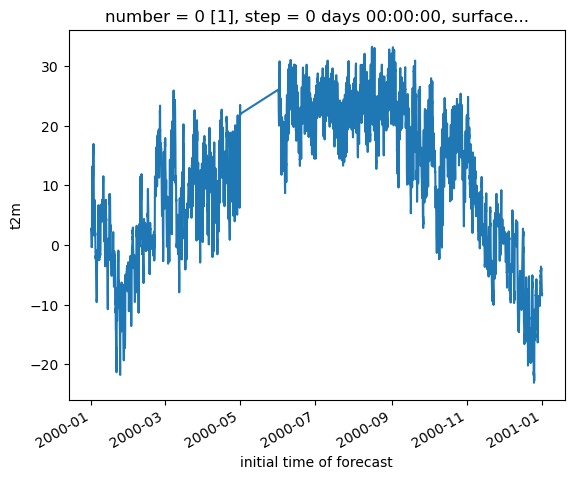

In [29]:
point.plot()